In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install konlpy
!pip install tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.1 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install -y nvidia-utils-460
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/11.4.0/local_installers/cuda-repo-ubuntu2004-11-4-local_11.4.0-470.57.02-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2004-11-4-local_11.4.0-470.57.02-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu2004-11-4-local/7fa2af80.pub
!apt-get update
!apt-get -y install cuda

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import re
import tomotopy as tp
import os
from konlpy.tag import Okt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import MinMaxScaler
import progressbar


plt.rc('font', family='NanumBarunGothic') 


In [ ]:
main_path = '/content/drive/MyDrive/Project/LiveCommerse/'
file_path = main_path + 'Python_Code/Re_zero부터시작하는분석/Total_Data_3.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.columns

Index(['Name', 'Channer_num', 'Sub', 'Vdo_num', 'Total_Video', 'Video_View',
       'Like_Number', 'Video_Time', 'Item_Name', 'Item_Price', 'Total_Chat',
       'Chat_User', 'Chat_Num_per_user', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'No_Event_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'Dict_Positive', 'Dict_Negative',
       'Dict_Neutral', 'Dict_Positive_Rate', 'Dict_Negative_Rate',
       'Dict_Neutral_Rate', 'Dict_Score_Average', 'GPT_Positive',
       'GPT_Negative', 'GPT_Neutral', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
       'GPT_Neutral_Rate', 'GPT_Score_Average', 'KoBERT_Positive',
       'KoBERT_Negative', 'KoBERT_Neutral', 'KoBERT_Positive_Rate',
       'KoBERT_Negative_Rate', 'KoBERT_Neutral_Rate', 'KoBERT_Score_Average',
       'Tour_only', 'words'],
      dtype='object')

In [ ]:
df_1 = df[['Sub', 'Video_View',
       'Like_Number', 'Chat_Num_per_user', 'Question_Rate', 'GPT_Score_Average', 'words']]
df_1.dropna(inplace=True)

<ipython-input-4-9664a9eae5a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(inplace=True)


In [ ]:
Sub_max = df_1.Sub.max()
Sub_min = df_1.Sub.min()
Video_View_max = df_1.Video_View.max()
Video_View_min = df_1.Video_View.min()
Like_Number_max = df_1.Like_Number.max()
Like_Number_min = df_1.Like_Number.min()
Chat_Num_per_user_max = df_1.Chat_Num_per_user.max()
Chat_Num_per_user_min = df_1.Chat_Num_per_user.min()
Question_Rate_max = df_1.Question_Rate.max()
Question_Rate_min = df_1.Question_Rate.min()

for i in range(len(df_1)):
  sub = df_1.loc[i, 'Sub']
  question_rate = df_1.loc[i, 'Question_Rate']
  cacn = df_1.loc[i, 'Chat_Num_per_user']
  view = df_1.loc[i, 'Video_View']
  like = df_1.loc[i, 'Like_Number']
  df_1.loc[i, 'Norm_Sub'] = (sub - Sub_min) / (Sub_max - Sub_min)
  df_1.loc[i, 'Norm_Question_rate'] = (question_rate - Question_Rate_min) / (Question_Rate_max - Question_Rate_min)
  df_1.loc[i, 'Norm_Chatperuser'] = (cacn - Chat_Num_per_user_min) / (Chat_Num_per_user_max - Chat_Num_per_user_min)
  df_1.loc[i, 'Norm_Video_View'] = (view - Video_View_min) / (Video_View_max - Video_View_min)
  df_1.loc[i, 'Norm_Like_Number'] = (like - Video_View_min) / (Like_Number_max - Video_View_min)

<ipython-input-5-334f877e28d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[i, 'Norm_Sub'] = (sub - Sub_min) / (Sub_max - Sub_min)
<ipython-input-5-334f877e28d4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[i, 'Norm_Question_rate'] = (question_rate - Question_Rate_min) / (Question_Rate_max - Question_Rate_min)
<ipython-input-5-334f877e28d4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
Channel_Total_Chat_max = df_1.Total_Chat.max()
Channel_Total_Chat_min = df_1.Total_Chat.min()
Channel_Chat_User_max = df_1.Chat_User.max()
Channel_Chat_User_min = df_1.Chat_User.min()
Channel_Chat_Num_per_user_max = df_1.Chat_Num_per_user.max()
Channel_Chat_Num_per_user_min = df_1.Chat_Num_per_user.min()
Channel_Video_View_max = df_1.Video_View.max()
Channel_Video_View_min = df_1.Video_View.min()
Channel_Like_Number_max = df_1.Like_Number.max()
Channel_Like_Number_min = df_1.Like_Number.min()

for i in range(len(df_1)):
  to_chat = df_1.loc[i, 'Total_Chat']
  chat_user = df_1.loc[i, 'Chat_User']
  cacn = df_1.loc[i, 'Chat_Num_per_user']
  view = df_1.loc[i, 'Video_View']
  like = df_1.loc[i, 'Like_Number']
  df_1.loc[i, 'Norm_Total_Chat'] = (to_chat - Channel_Total_Chat_min) / (Channel_Total_Chat_max - Channel_Total_Chat_min)
  df_1.loc[i, 'Norm_Chat_User'] = (chat_user - Channel_Chat_User_min) / (Channel_Chat_User_max - Channel_Chat_User_min)
  df_1.loc[i, 'Norm_Average_Chat'] = (cacn - Channel_Chat_Num_per_user_min) / (Channel_Chat_Num_per_user_max - Channel_Chat_Num_per_user_min)
  df_1.loc[i, 'Norm_Video_View'] = (view - Channel_Video_View_min) / (Channel_Video_View_max - Channel_Video_View_min)
  df_1.loc[i, 'Norm_Like_Number'] = (like - Channel_Like_Number_min) / (Channel_Like_Number_max - Channel_Like_Number_min)

In [ ]:
class ExpNormalize(clr.Normalize):
    def __init__(self, scale):
        super().__init__()
        self.scale = scale

    def __call__(self, value, clip=None):
        if clip is None:
            clip = self.clip

        result, is_scalar = self.process_value(value)

        self.autoscale_None(result)
        (vmin,), _ = self.process_value(self.vmin)
        (vmax,), _ = self.process_value(self.vmax)
        if vmin == vmax:
            result.fill(0)
        elif vmin > vmax:
            raise ValueError("minvalue must be less than or equal to maxvalue")
        else:
            if clip:
                mask = np.ma.getmask(result)
                result = np.ma.array(np.clip(result.filled(vmax), vmin, vmax),
                                    mask=mask)
            resdat = result.data
            resdat = 1 - np.exp(-2 * resdat / self.scale)
            result = np.ma.array(resdat, mask=result.mask, copy=False)
        if is_scalar:
            result = result[0]
        return result

heat = clr.LinearSegmentedColormap.from_list('heat', 
    [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 0, 0), (1, 1, 1)],
    N=1024
)

<ipython-input-7-316ea28cb4bb>:35: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-7-316ea28cb4bb>:44: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(20)


Num docs:674, Num Vocabs:3413, Total Words:845873
Iteration: 0000 LL per word: -9.262
Iteration: 0020 LL per word: -7.368
Iteration: 0040 LL per word: -7.258
Iteration: 0060 LL per word: -7.221
Iteration: 0080 LL per word: -7.202
Iteration: 0100 LL per word: -7.181
Iteration: 0120 LL per word: -7.176
Iteration: 0140 LL per word: -7.172
Iteration: 0160 LL per word: -7.17
Iteration: 0180 LL per word: -7.168
Iteration: 0200 LL per word: -7.173
<Basic Info>
| GDMRModel (current version: 0.12.4)
| 674 docs, 845873 words
| Total Vocabs: 29879, Used Vocabs: 3413
| Entropy of words: 6.96412
| Entropy of term-weighted words: 6.96412
| Removed Vocabs: 좋다 하다 구매 가다 인증 되다 싶다 오다 보다 있다 대박 반갑다 가격 넘다 혜택 기대 같다 완료 안녕하다 아이
| Numeric metadata distribution of docs
|  #0: Range=0.0~1.0, Avg=0.06472, Stdev=0.07809
|  #1: Range=-0.2~1.1818, Avg=0.57333, Stdev=0.20567
|
<Training Info>
| Iterations: 200, Burn-in steps: 0
| Optimization Interval: 20
| Log-likelihood per word: -7.17263
|
<Initial Parameters>
| tw

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


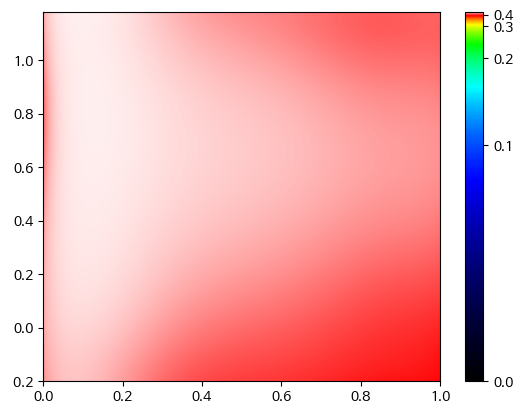

Topic #3 (137786)
스파 이다 당첨 번호 가족 놀다 워터파크 결제 주문 갈다
Lambda: [-5.46480227e+00 -5.67273140e-01  3.82582247e-01 -2.04003081e-01
  1.25752628e-01 -4.63803858e-02  3.86965717e-03  1.26746684e-01
 -7.72837549e-02  4.30832095e-02 -3.72108519e-02  4.65966761e-04
 -9.23755020e-03  4.49753692e-03 -1.25180244e-01  1.08820625e-01
 -3.79307792e-02  6.54427335e-04 -1.50030907e-02 -3.67888948e-04
 -1.99758192e-03 -8.47198442e-02  2.98645608e-02 -5.98726235e-03
 -1.19790919e-02 -1.73011690e-03 -4.54477314e-03 -5.88781293e-03
  5.19974492e-02 -7.13186478e-03  1.92809955e-03 -1.90105988e-04
 -2.25411123e-03 -2.23952765e-03 -8.98978207e-03  5.87353297e-02
 -5.56264073e-04 -4.06102976e-03 -6.93882583e-04  7.04590417e-03
 -5.39638661e-03 -3.46748694e-03 -2.35236697e-02  5.28811384e-03
 -2.33608694e-03 -6.09409763e-03  1.08567365e-02 -4.86667361e-03
 -8.34156480e-03]


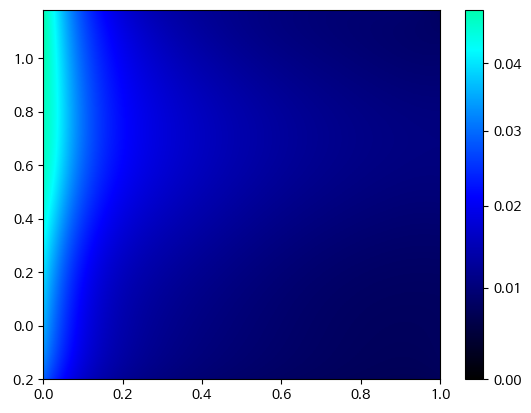

Topic #6 (119129)
예약 가능하다 추가 어떻다 날짜 안되다 이다 없다 가요 객실
Lambda: [-2.41449642e+00 -1.89217195e-01  4.67047840e-02  2.12440100e-02
 -9.65545420e-03  2.63862349e-02 -2.12409012e-02 -3.19027901e-01
  6.45045787e-02 -3.65056321e-02  4.31511216e-02 -1.18789300e-02
  8.67616944e-03  4.99367574e-03 -5.68904690e-02  8.78210925e-03
  1.12731680e-02 -8.01262539e-03  1.01886941e-02  1.82285300e-03
  1.38526480e-03  1.30901355e-02 -1.75911970e-02  1.69862229e-02
  6.26535621e-03  3.09433904e-04 -1.52612117e-03  7.84472376e-03
  4.93801162e-02 -2.57889112e-03 -3.14481353e-04 -3.03935283e-03
  8.76572728e-03  7.29958853e-03  1.60340071e-02 -1.92892738e-02
  7.26630725e-03 -6.42484613e-03  2.98316544e-03 -5.67744579e-03
 -5.56229101e-03  1.66931353e-03 -3.44731361e-02  7.26446277e-03
 -3.52889765e-03 -2.44260766e-03 -2.21037073e-03 -8.04801099e-03
 -2.36353534e-03]


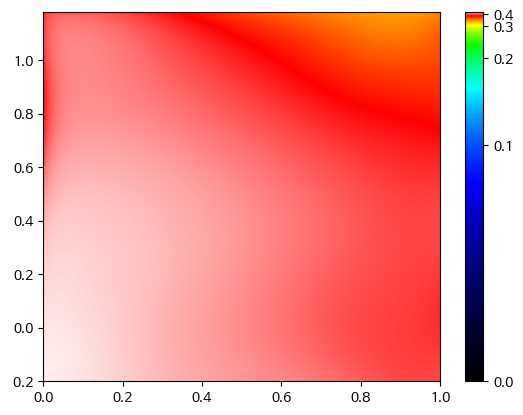

Topic #2 (100132)
에버랜드 랜드 월드 롯데 이월드 놀다 츄러스 당첨 서울 재밌다
Lambda: [-5.3553810e+00 -2.8744826e-01  1.6316997e-01 -7.8304179e-02
  3.6846526e-02  6.2478408e-03 -3.6539208e-02  2.2059071e-01
 -1.9076955e-02  4.5435876e-03 -2.9121357e-04  8.7691620e-03
 -6.9463467e-03 -2.0517977e-03 -8.5357510e-02  5.3142317e-02
 -2.8020062e-02  7.4405763e-03 -1.3654361e-02 -5.4763691e-03
  4.2181932e-03 -2.2485521e-02  1.4797929e-03 -4.1599958e-03
 -1.1664119e-02  5.9056515e-04  1.8347888e-03 -6.0489429e-03
  3.6073424e-02 -6.3247727e-03 -1.0589937e-02 -9.2283334e-04
 -6.8808720e-03 -1.3408269e-03  3.5636781e-03  1.1294701e-02
 -6.6260900e-03  6.9304029e-03 -5.6353630e-03  1.8685901e-03
 -2.1745933e-03 -5.3691273e-03 -2.7744036e-02 -1.5936151e-02
 -6.1453283e-03  2.1589303e-03 -7.5192089e-05  6.3223415e-05
  5.3494563e-03]


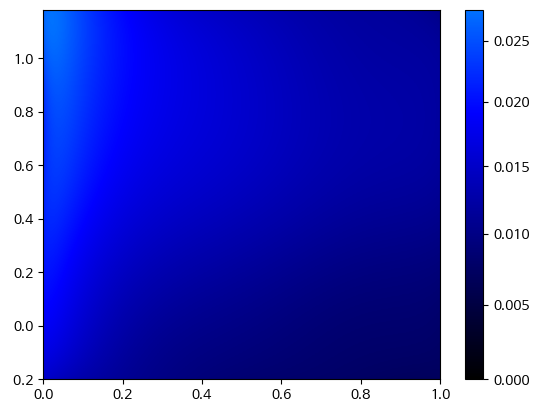

Topic #4 (96980)
여행 가보다 놀다 보이다 정말 방송 구성 멋지다 자다 할인
Lambda: [-5.5331740e+00 -1.1058199e+00  8.2739633e-01 -5.2669311e-01
  3.4422064e-01 -1.7699866e-01  9.5335223e-02  2.7725151e-01
 -2.1736889e-01  1.3479711e-01 -6.0461201e-02  3.4720823e-02
  5.2245557e-03 -3.6630081e-04 -3.4011763e-01  1.9226664e-01
 -6.7798294e-02  8.6324029e-03  1.5340722e-03  3.3866573e-04
 -5.1426031e-03 -2.2776145e-01  9.1774099e-02 -1.3318237e-02
  7.3176026e-03 -6.1969007e-03  1.0788259e-02 -5.5203715e-04
  4.6746563e-02 -1.6486024e-02  1.6945854e-03 -2.0179486e-04
  1.0701276e-03 -3.3204111e-03 -6.7684719e-05  9.9331431e-02
 -1.3104468e-02  1.3581399e-04 -7.9406807e-03  7.8268247e-03
 -9.8347086e-03 -1.6410306e-02  2.3827955e-02 -1.5954990e-02
  4.1340292e-03 -2.0915139e-03 -1.5823994e-03  4.1170344e-03
  8.6513720e-03]


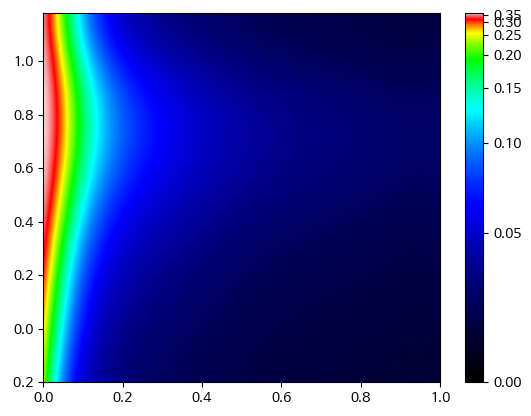

Topic #5 (81674)
호캉스 호텔 보이다 진짜 분위기 정말 조식 가보다 멋지다 구성
Lambda: [-4.69636488e+00 -4.42642927e-01  3.12702239e-01 -2.28585318e-01
  1.18226118e-01 -5.59456013e-02 -1.10588977e-02  1.16184950e-01
 -1.24070704e-01  5.17998263e-02 -1.50681650e-02  1.42076965e-02
  4.52287961e-03 -3.43776122e-03 -1.00663200e-01  9.50457826e-02
 -2.73040980e-02  3.20031960e-03  4.18220740e-03 -7.72252330e-04
 -2.90416181e-04 -9.70059559e-02  3.79921161e-02  9.86447558e-04
 -6.59080828e-03 -3.97935975e-04  3.11582582e-04  6.63470756e-03
  2.89113633e-02 -6.42174110e-03 -2.11604498e-03  8.41645407e-04
 -8.70372169e-03  3.47101176e-03 -6.80274144e-03  4.56717536e-02
 -9.79748555e-03  3.21984221e-03  3.66273220e-03 -2.09302729e-04
 -1.15445573e-02 -1.46555454e-02  1.27884690e-02 -9.64229647e-03
  4.20170743e-03 -9.55253548e-04  1.31420158e-02  3.30061349e-03
  7.85936788e-03]


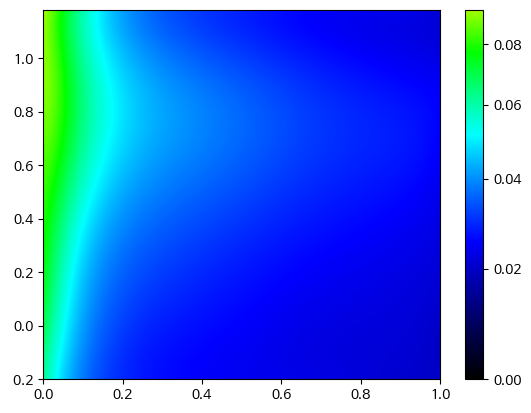

Topic #8 (61806)
유심 개통 모바일 금제 방송 없다 받다 쓰다 가입 데이터
Lambda: [-6.1939282e+00 -1.5952557e-01  1.5272917e-01 -5.9025329e-02
 -1.0746090e-03  1.6529657e-02 -3.4775924e-02  9.1846578e-02
  2.9364955e-02 -1.0514222e-03 -6.0306601e-03 -5.3766151e-03
 -1.9034138e-05 -8.7931212e-03 -4.3839794e-02  1.9784115e-02
 -6.2160911e-03 -4.3079965e-03  2.6457630e-02 -2.6000312e-03
  1.2823778e-03  9.5207319e-03 -9.9985097e-03  6.1318371e-03
  6.8957666e-03  1.4594719e-03  8.8125709e-03  1.7320942e-04
  8.3421413e-03 -1.4633150e-04 -1.6329784e-03  1.2637530e-03
  3.8693980e-03  4.2222003e-03 -5.9485515e-03 -5.0708149e-03
  2.9144278e-03  3.3276326e-03  5.2762069e-03 -7.3606451e-04
 -2.2335283e-03  4.3338155e-03 -1.3248107e-03 -5.0437497e-04
 -2.1282570e-03  5.2453680e-03  1.0310240e-02 -4.8360219e-03
 -2.8753798e-03]


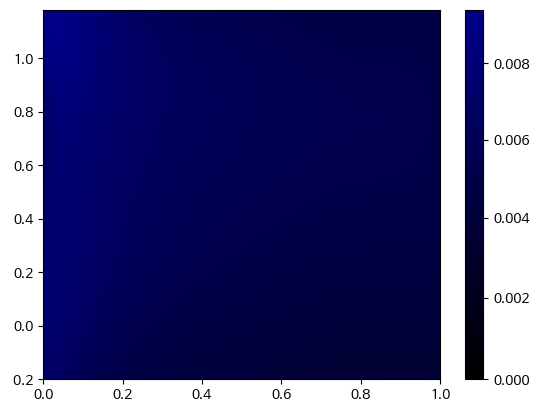

Topic #1 (51361)
재밌다 물놀이 놀다 보이다 시원하다 여름 진짜 워터 정말 방송
Lambda: [-2.9005837e+00  5.4271996e-01 -2.8038412e-01  1.4516450e-01
 -6.0132679e-02 -1.7912555e-03  2.2700347e-02 -1.8159564e-01
  1.8258326e-02  2.0101387e-04 -4.2996318e-03  6.9942335e-03
 -1.1550102e-02  1.5360050e-02  1.5284336e-01 -8.4728599e-02
 -6.9340952e-03  2.4810201e-02 -1.0982803e-02 -1.8364615e-03
  4.2292471e-03  7.5634941e-04  1.5556767e-02 -2.0633003e-02
 -3.0873660e-03 -1.9831571e-03 -2.7427466e-03  3.4491514e-04
 -4.6851426e-02 -5.5352915e-03  2.9657599e-02 -1.2337875e-03
  2.0079252e-03 -9.8625303e-04 -2.5659461e-02  2.1013726e-02
 -1.2529360e-02  7.8337882e-03  3.5701706e-03  6.1299079e-03
 -8.3305398e-03  5.8966838e-03  5.8830655e-03 -1.9389402e-02
  1.5952035e-03 -2.0359187e-04  1.6891165e-02 -2.8115280e-03
 -1.7725473e-03]


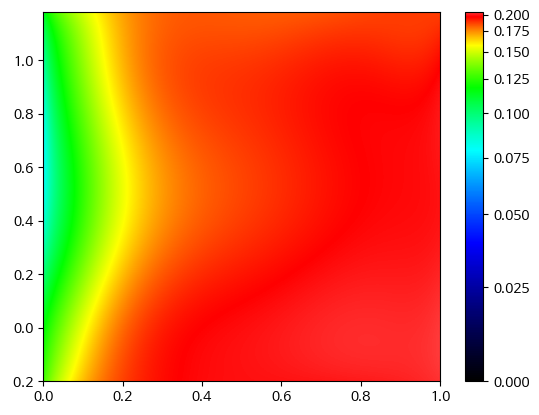

Topic #7 (47765)
파크 경주월드 비발디 써다 경주 놀다 오션월드 가족 타다 이다
Lambda: [-2.6996031e+00  1.3068613e+00 -7.5935030e-01  3.8373300e-01
 -1.7850320e-01  3.4110438e-02 -3.8902853e-03 -9.0625405e-02
  1.2837154e-01 -5.4646842e-02 -2.8014135e-02  3.5371773e-02
 -2.5669891e-02  1.1740515e-02  4.6731839e-01 -1.2914899e-01
 -6.4070188e-02  6.8798006e-02 -3.1036573e-02 -7.5032604e-03
 -3.9491970e-03  1.2712356e-01  9.6888505e-03 -5.6200467e-02
  8.8686990e-03  1.6265882e-02 -7.5863637e-03  9.6340561e-03
 -6.1926827e-02 -2.4182325e-02  1.3990519e-02  3.9844271e-03
  3.6647808e-04  1.3829903e-03 -3.0788823e-03 -2.6167344e-02
 -3.5788991e-02  2.8789286e-03  9.5032835e-03  4.9669240e-03
 -7.0468889e-04  1.8609013e-02 -1.2337889e-02 -2.2694125e-04
 -3.5602166e-03  1.3155380e-03  1.0850426e-02  1.7927331e-03
  2.7803071e-03]


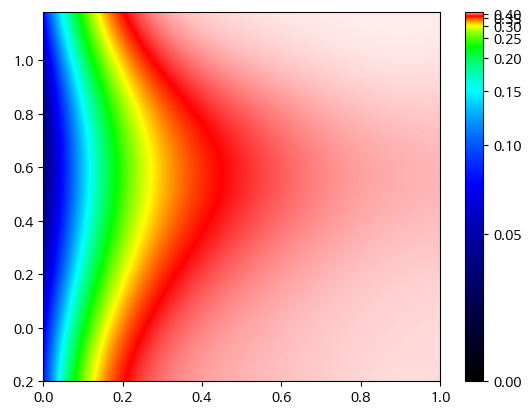

In [ ]:
# select metadata [sub_rank, Chat_Num_rank, Chat_User_rank]
# 이게 지금 시도하고 있는 것.
# Corpus 형성. 

corpus = tp.utils.Corpus()
for i in range(len(df_1)):
  try:
    data = df_1.loc[i, 'words']
    Norm_Sub = df_1.loc[i, 'Norm_Sub']
    Norm_Average_Chat = df_1.loc[i, 'Norm_Chatperuser']
    Norm_Video_View = df_1.loc[i, 'Norm_Video_View']
    Norm_Like_Number = df_1.loc[i, 'Norm_Like_Number']
    Norm_question_rate = df_1.loc[i, 'Norm_Question_rate']
    GPT_Score = df_1.loc[i, 'GPT_Score_Average']
    corpus.add_doc(data.split(), numeric_metadata = [float(Norm_Average_Chat), float(GPT_Score)])
  except:
    continue

# 하이퍼파라미터 설정.
mdl = tp.GDMRModel(tw=tp.TermWeight.ONE, k=9, degrees=[6, 6], 
    alpha=1e-2, sigma=0.25, min_cf = 20, min_df=10, rm_top = 20, sigma0=3.0, decay=1.0,
    eta = 1, seed=42,
    metadata_range=[(0,1), (min(df_1.GPT_Score_Average),max(df_1.GPT_Score_Average))], corpus=corpus
)

# mdl = tp.GDMRModel(tw=tp.TermWeight.ONE, k=9, degrees=[6, 6], 
#     alpha=1e-2, sigma=0.25, min_cf = 0, min_df=0, rm_top = 0, sigma0=3.0, decay=1.0,
#     eta = 1, seed=42,
#     metadata_range=[(0,1), (0,1)], corpus=corpus
# )
# 모델 학습 및 출력.

mdl.optim_interval = 20

mdl.train(0)

print('Num docs:{}, Num Vocabs:{}, Total Words:{}'.format(
    len(mdl.docs), len(mdl.used_vocabs), mdl.num_words
))

# Let's train the model
for i in range(0, 200, 20):
    print('Iteration: {:04} LL per word: {:.4}'.format(i, mdl.ll_per_word))
    mdl.train(20)
print('Iteration: {:04} LL per word: {:.4}'.format(200, mdl.ll_per_word))

mdl.summary(topic_word_top_n = 30)

# Let's visualize the result
topic_counts = mdl.get_count_by_topics()
lambdas = mdl.lambdas

md_range = mdl.metadata_range
# Our topic distribution map has 
# 400 pixels for the first axis and 
# 200 pixels for the second axis.
r = mdl.tdf_linspace(
    [md_range[0][0], md_range[1][0]], 
    [md_range[0][1], md_range[1][1]], 
    [400, 200]
)

for k in (-topic_counts).argsort():
    print('Topic #{} ({})'.format(k, topic_counts[k]))
    print(*(w for w, _ in mdl.get_topic_words(k)))
    print('Lambda:', lambdas[k])

    imgplot = plt.imshow(r[:, :, k].transpose(), clim=(0.0, r[:, :, k].max()), 
        origin='lower', cmap=heat, norm=ExpNormalize(scale=0.2),
        extent=[*md_range[0], *md_range[1]],
        aspect='auto'
    )
    plt.colorbar()
    plt.show()

In [ ]:
|len(range(10,31))

21

In [ ]:
coherence_list_umass = []
coherence_list_cuci = []
coherence_list_cnpmi = []
coherence_list_cv = []
score_df = pd.DataFrame()
score_df['K_Num'] = 0
score_df['Remove_Top'] = 0
score_df['Min_Df'] = 0
score_df['Min_Cf'] = 0
score_df['C_S_Umass'] = 0
score_df['C_S_Cuci'] = 0
score_df['C_S_Cnpmi'] = 0
score_df['C_S_Cv'] = 0

bar = progressbar.ProgressBar(maxval = 21*6*5*5).start()

index_num = 0
for i in range(10,31):
  k_num = i
  score_df.to_excel('/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Coherence_Score_DF_2.xlsx', index =False)
  for j in [0,5,10,15,20,25]:
    rm_num = j
    for k in [0,5,10,15,20]:
      min_df_num = k
      for kk in [0,5,10,15,20]:
        min_cf_num = kk
        
        mdl = tp.GDMRModel(tw=tp.TermWeight.ONE, k=k_num, degrees=[1,1], 
            alpha=1e-2, sigma=0.25, min_cf = min_cf_num, min_df=min_df_num, rm_top = rm_num, sigma0=3.0, decay=1.0,
            eta = 1, seed=42,
            metadata_range=[(0,1), (0,1)], corpus=corpus
        )

        mdl.optim_interval = 20
        mdl.burn_in = 200

        mdl.train(0)

        # Let's train the model
        for i in range(0, 50, 10):
            mdl.train(10)

        coh_umass = tp.coherence.Coherence(mdl, coherence='u_mass')
        average_coherence_umass = coh_umass.get_score()
        coherence_list_umass.append(average_coherence_umass)

        coh_cuci = tp.coherence.Coherence(mdl, coherence='c_uci', window_size = 10)
        average_coherence_cuci = coh_cuci.get_score()
        coherence_list_cuci.append(average_coherence_cuci)

        coh_cnpmi = tp.coherence.Coherence(mdl, coherence='c_npmi', window_size = 10)
        average_coherence_cnpmi = coh_cnpmi.get_score()
        coherence_list_cnpmi.append(average_coherence_cnpmi)

        coh_cv = tp.coherence.Coherence(mdl, coherence='c_v', window_size = 110)
        average_coherence_cv = coh_cv.get_score()
        coherence_list_cv.append(average_coherence_cv)

        print(k_num, rm_num, min_df_num, min_cf_num, average_coherence_umass, average_coherence_cuci, average_coherence_cnpmi, average_coherence_cv)

        score_df.loc[index_num, 'K_Num'] = k_num
        score_df.loc[index_num, 'Remove_Top'] = rm_num
        score_df.loc[index_num, 'Min_Df'] = min_df_num
        score_df.loc[index_num, 'Min_Cf'] = min_cf_num
        score_df.loc[index_num, 'C_S_Umass'] = average_coherence_umass
        score_df.loc[index_num, 'C_S_Cuci'] = average_coherence_cuci
        score_df.loc[index_num, 'C_S_Cnpmi'] = average_coherence_cnpmi
        score_df.loc[index_num, 'C_S_Cv'] = average_coherence_cv
        bar.update(index_num)

        index_num = index_num+1

bar.finish()
score_df.to_excel('/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Coherence_Score_DF_2.xlsx', index =False)

  0% (0 of 3150) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (0 of 3150) |                       | Elapsed Time: 0:00:13 ETA:  --:--:--

10 0 0 0 -7.830860028213193 -3.6884991679193604 -0.08536916602891051 0.6802379817515612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (1 of 3150) |                       | Elapsed Time: 0:00:36 ETA:  20:46:30

10 0 0 5 -1.5677460767660905 -0.6588063738520901 -0.005840590147985694 0.46938376862555736


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (2 of 3150) |                       | Elapsed Time: 0:00:58 ETA:  19:17:33

10 0 0 10 -0.41806198700063757 0.07558580288587755 0.017034167982534282 0.44979593824595215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (3 of 3150) |                       | Elapsed Time: 0:01:19 ETA:  17:41:14

10 0 0 15 -0.5341243625785871 0.08428644880250848 0.017780305561435977 0.4464686692319811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (4 of 3150) |                       | Elapsed Time: 0:01:36 ETA:  14:57:30

10 0 0 20 -0.5929788662901884 -0.015919915535486454 0.0036129860705179234 0.4195194629766047


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (5 of 3150) |                       | Elapsed Time: 0:01:58 ETA:  18:58:30

10 0 5 0 -0.4671372866205593 0.05059874604838802 0.024165331758589762 0.4625929994881153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (6 of 3150) |                       | Elapsed Time: 0:02:20 ETA:  20:01:42

10 0 5 5 -0.4671372866205593 0.05059874604838802 0.024165331758589762 0.4625929994881153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (7 of 3150) |                       | Elapsed Time: 0:02:39 ETA:  16:31:12

10 0 5 10 -0.6049329127125905 0.026864833051060976 0.014366356395761276 0.43713241379708057


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (8 of 3150) |                       | Elapsed Time: 0:03:04 ETA:  21:53:43

10 0 5 15 -0.464600816210465 0.10298473356191204 0.023518119767706853 0.45995913658291104


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (9 of 3150) |                       | Elapsed Time: 0:03:26 ETA:  19:11:09

10 0 5 20 -0.42416625971082206 0.08783105879541628 0.01855511350026951 0.45451555132865906


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (10 of 3150) |                      | Elapsed Time: 0:03:46 ETA:  17:10:56

10 0 10 0 -0.4879296208869695 0.030043885078976484 0.012478514795396349 0.44339653275907037


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (11 of 3150) |                      | Elapsed Time: 0:04:08 ETA:  19:24:49

10 0 10 5 -0.4879296208869695 0.030043885078976484 0.012478514795396349 0.44339653275907037


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (12 of 3150) |                      | Elapsed Time: 0:04:28 ETA:  17:14:44

10 0 10 10 -0.4879296208869695 0.030043885078976484 0.012478514795396349 0.44339653275907037


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (13 of 3150) |                      | Elapsed Time: 0:04:49 ETA:  18:24:14

10 0 10 15 -0.5924881454099834 0.05885824637468538 0.023644126701282745 0.4697645530663431


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (14 of 3150) |                      | Elapsed Time: 0:05:08 ETA:  16:26:37

10 0 10 20 -0.5895450598789038 0.031130310002342752 0.006369079919467287 0.4395355963893235


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (15 of 3150) |                      | Elapsed Time: 0:05:33 ETA:  21:27:38

10 0 15 0 -0.6075146046400196 0.014305959225473303 0.016847563150339136 0.44732188934460276


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (16 of 3150) |                      | Elapsed Time: 0:06:00 ETA:  23:26:03

10 0 15 5 -0.6075146046400196 0.014305959225473303 0.016847563150339136 0.44732188934460276


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (17 of 3150) |                      | Elapsed Time: 0:06:25 ETA:  22:03:45

10 0 15 10 -0.6075146046400196 0.014305959225473303 0.016847563150339136 0.44732188934460276


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (18 of 3150) |                      | Elapsed Time: 0:06:51 ETA:  22:08:04

10 0 15 15 -0.6075146046400196 0.014305959225473303 0.016847563150339136 0.44732188934460276


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (19 of 3150) |                      | Elapsed Time: 0:07:08 ETA:  15:30:59

10 0 15 20 -0.387741178997442 0.027889560022938343 0.007408063182498587 0.4289297257736326


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (20 of 3150) |                | Elapsed Time: 0:07:36 ETA:  1 day, 0:04:15

10 0 20 0 -0.4506349312002177 0.08170616646264679 0.0188656510880849 0.4581042332947255


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (21 of 3150) |                | Elapsed Time: 0:08:07 ETA:  1 day, 3:08:40

10 0 20 5 -0.4506349312002177 0.08170616646264679 0.0188656510880849 0.4581042332947255


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (22 of 3150) |                      | Elapsed Time: 0:08:34 ETA:  23:10:13

10 0 20 10 -0.4506349312002177 0.08170616646264679 0.0188656510880849 0.4581042332947255


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (23 of 3150) |                      | Elapsed Time: 0:09:00 ETA:  22:25:11

10 0 20 15 -0.4506349312002177 0.08170616646264679 0.0188656510880849 0.4581042332947255


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (24 of 3150) |                | Elapsed Time: 0:09:28 ETA:  1 day, 0:10:00

10 0 20 20 -0.4506349312002177 0.08170616646264679 0.0188656510880849 0.4581042332947255


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (25 of 3150) |                      | Elapsed Time: 0:09:35 ETA:   6:38:49

10 5 0 0 -6.2068522315465575 -3.868958369980379 -0.08553563682497467 0.6255475275218487


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (26 of 3150) |                      | Elapsed Time: 0:09:46 ETA:   9:05:40

10 5 0 5 -0.7092682394726367 0.06050542649030277 0.02432646557780195 0.4744827852770686


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (27 of 3150) |                      | Elapsed Time: 0:09:57 ETA:   9:24:08

10 5 0 10 -0.35702815950742706 0.0916845145852225 0.0186866721220563 0.46823195479810237


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (28 of 3150) |                      | Elapsed Time: 0:10:06 ETA:   8:06:34

10 5 0 15 -0.5398445055716642 -0.07468483459956796 0.015063071355650584 0.46478378487750893


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (29 of 3150) |                      | Elapsed Time: 0:10:17 ETA:   9:54:19

10 5 0 20 -0.4534874443083722 0.0375745369247159 0.017587216726181198 0.45979940451681617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (30 of 3150) |                      | Elapsed Time: 0:10:29 ETA:  10:23:49

10 5 5 0 -1.0334384409272328 -0.5406307678294106 0.005459497769102235 0.4905162234604359


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  0% (31 of 3150) |                      | Elapsed Time: 0:10:40 ETA:   9:22:15

10 5 5 5 -1.0334384409272328 -0.5406307678294106 0.005459497769102235 0.4905162234604359


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (32 of 3150) |                      | Elapsed Time: 0:10:50 ETA:   8:48:41

10 5 5 10 -0.7748388971697253 -0.22003859930468753 0.003995698425944813 0.4504605090804398


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (33 of 3150) |                      | Elapsed Time: 0:11:01 ETA:   9:10:47

10 5 5 15 -0.46517731796877015 -0.011821109385288856 0.012443312409272265 0.4620640848577023


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (34 of 3150) |                      | Elapsed Time: 0:11:13 ETA:  10:08:24

10 5 5 20 -0.3605132194198197 0.06390577742436734 0.01377795415750207 0.4508274408057332


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (35 of 3150) |                      | Elapsed Time: 0:11:24 ETA:   9:40:31

10 5 10 0 -0.5474329871428415 -0.10497309046796784 0.017439867587839372 0.48050125036388636


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (36 of 3150) |                      | Elapsed Time: 0:11:35 ETA:   9:15:18

10 5 10 5 -0.5474329871428415 -0.10497309046796784 0.017439867587839372 0.48050125036388636


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (37 of 3150) |                      | Elapsed Time: 0:11:47 ETA:  10:38:37

10 5 10 10 -0.5474329871428415 -0.10497309046796784 0.017439867587839372 0.48050125036388636


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (38 of 3150) |                      | Elapsed Time: 0:11:58 ETA:   9:28:59

10 5 10 15 -0.504409760429406 -0.07461853573680614 0.01626753908607017 0.4641735054552556


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (39 of 3150) |                      | Elapsed Time: 0:12:12 ETA:  12:15:18

10 5 10 20 -0.7731303105329943 -0.14791163468361804 0.015874957048578737 0.47766928032040595


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (40 of 3150) |                      | Elapsed Time: 0:12:23 ETA:   9:51:10

10 5 15 0 -0.3950013424057987 0.04929372761376642 0.01949254842667334 0.4701624382287265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (41 of 3150) |                      | Elapsed Time: 0:12:37 ETA:  11:37:44

10 5 15 5 -0.3950013424057987 0.04929372761376642 0.01949254842667334 0.4701624382287265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (42 of 3150) |                      | Elapsed Time: 0:12:49 ETA:  10:08:26

10 5 15 10 -0.3950013424057987 0.04929372761376642 0.01949254842667334 0.4701624382287265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (43 of 3150) |                      | Elapsed Time: 0:13:00 ETA:   9:41:06

10 5 15 15 -0.3950013424057987 0.04929372761376642 0.01949254842667334 0.4701624382287265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (44 of 3150) |                      | Elapsed Time: 0:13:11 ETA:   9:37:01

10 5 15 20 -0.4532858346006936 -0.0758883896290156 0.0099274576006687 0.4535265858843923


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (45 of 3150) |                      | Elapsed Time: 0:13:26 ETA:  12:55:37

10 5 20 0 -0.3510323616865803 0.13292124556023316 0.0257238295192474 0.47390112057328226


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (46 of 3150) |                      | Elapsed Time: 0:13:40 ETA:  11:59:02

10 5 20 5 -0.3510323616865803 0.13292124556023316 0.0257238295192474 0.47390112057328226


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (47 of 3150) |                      | Elapsed Time: 0:13:54 ETA:  12:26:11

10 5 20 10 -0.3510323616865803 0.13292124556023316 0.0257238295192474 0.47390112057328226


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (48 of 3150) |                      | Elapsed Time: 0:14:08 ETA:  11:41:49

10 5 20 15 -0.3510323616865803 0.13292124556023316 0.0257238295192474 0.47390112057328226


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (49 of 3150) |                      | Elapsed Time: 0:14:22 ETA:  12:20:34

10 5 20 20 -0.3510323616865803 0.13292124556023316 0.0257238295192474 0.47390112057328226


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (50 of 3150) |                      | Elapsed Time: 0:14:32 ETA:   8:37:29

10 10 0 0 -4.116203296437607 -1.1313377551311552 0.059264166562608 0.7048125415295362


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (51 of 3150) |                      | Elapsed Time: 0:14:47 ETA:  12:28:51

10 10 0 5 -1.741172969522292 -0.7386096480820858 0.002296561352145341 0.5554015950439497


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (52 of 3150) |                      | Elapsed Time: 0:14:58 ETA:   9:41:24

10 10 0 10 -0.8282743646496297 -0.07199101374845968 0.030531900021836894 0.5398023920692504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (53 of 3150) |                      | Elapsed Time: 0:15:13 ETA:  13:13:12

10 10 0 15 -0.6392697038766413 0.17253448680388786 0.037854546480832106 0.5477630023658275


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (54 of 3150) |                      | Elapsed Time: 0:15:27 ETA:  12:02:33

10 10 0 20 -0.6408049904482296 0.16616297634213 0.03234470395340252 0.531554941907525


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (55 of 3150) |                      | Elapsed Time: 0:15:39 ETA:   9:38:12

10 10 5 0 -0.6988414211869103 -0.2240285076420962 0.016241641928226185 0.5154143081442453


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (56 of 3150) |                      | Elapsed Time: 0:15:49 ETA:   8:45:48

10 10 5 5 -0.6988414211869103 -0.2240285076420962 0.016241641928226185 0.5154143081442453


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (57 of 3150) |                      | Elapsed Time: 0:16:01 ETA:  10:24:06

10 10 5 10 -0.49392867730122403 0.12462292827344672 0.03457430333389948 0.5267691797763108


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (58 of 3150) |                      | Elapsed Time: 0:16:14 ETA:  10:58:02

10 10 5 15 -0.4858090254846529 0.2110985173308335 0.042130313822684916 0.5234364365413785


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (59 of 3150) |                      | Elapsed Time: 0:16:29 ETA:  13:20:48

10 10 5 20 -0.47254504989694646 0.1550630610030216 0.03376113535342619 0.5203688433393837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (60 of 3150) |                      | Elapsed Time: 0:16:42 ETA:  10:47:44

10 10 10 0 -0.8285209664421765 0.05319650525283439 0.036903566506291216 0.527816215083003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (61 of 3150) |                      | Elapsed Time: 0:16:53 ETA:   9:27:31

10 10 10 5 -0.8285209664421765 0.05319650525283439 0.036903566506291216 0.527816215083003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  1% (62 of 3150) |                      | Elapsed Time: 0:17:07 ETA:  12:29:16

10 10 10 10 -0.8285209664421765 0.05319650525283439 0.036903566506291216 0.527816215083003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (63 of 3150) |                      | Elapsed Time: 0:17:22 ETA:  12:29:39

10 10 10 15 -0.49913222937446317 -0.10253663035210488 0.023505277889829007 0.5404081403836608


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (64 of 3150) |                      | Elapsed Time: 0:17:33 ETA:   9:29:58

10 10 10 20 -0.5957905180133549 0.06180166373125123 0.029737404843953513 0.5306707092933357


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (65 of 3150) |                      | Elapsed Time: 0:17:48 ETA:  12:30:53

10 10 15 0 -0.35870915200451714 0.05545026040429377 0.029916276804939433 0.5281611049099593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (66 of 3150) |                      | Elapsed Time: 0:18:02 ETA:  12:40:39

10 10 15 5 -0.35870915200451714 0.05545026040429377 0.029916276804939433 0.5281611049099593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (67 of 3150) |                      | Elapsed Time: 0:18:16 ETA:  11:35:28

10 10 15 10 -0.35870915200451714 0.05545026040429377 0.029916276804939433 0.5281611049099593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (68 of 3150) |                      | Elapsed Time: 0:18:30 ETA:  12:26:20

10 10 15 15 -0.35870915200451714 0.05545026040429377 0.029916276804939433 0.5281611049099593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (69 of 3150) |                      | Elapsed Time: 0:18:43 ETA:  11:03:59

10 10 15 20 -0.5579969419632531 0.14964878121799677 0.0374340149660187 0.5500575157813727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (70 of 3150) |                      | Elapsed Time: 0:18:57 ETA:  11:31:42

10 10 20 0 -0.3871485780142565 0.1978696529566681 0.03302827854345252 0.5277537453174592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (71 of 3150) |                      | Elapsed Time: 0:19:11 ETA:  11:51:53

10 10 20 5 -0.3871485780142565 0.1978696529566681 0.03302827854345252 0.5277537453174592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (72 of 3150) |                      | Elapsed Time: 0:19:23 ETA:  10:35:24

10 10 20 10 -0.3871485780142565 0.1978696529566681 0.03302827854345252 0.5277537453174592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (73 of 3150) |                      | Elapsed Time: 0:19:36 ETA:  11:13:25

10 10 20 15 -0.3871485780142565 0.1978696529566681 0.03302827854345252 0.5277537453174592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (74 of 3150) |                      | Elapsed Time: 0:19:49 ETA:  10:51:09

10 10 20 20 -0.3871485780142565 0.1978696529566681 0.03302827854345252 0.5277537453174592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (75 of 3150) |                      | Elapsed Time: 0:19:54 ETA:   4:17:39

10 15 0 0 -5.831376526771978 -2.3685118248852426 -0.011480393916522488 0.719981054365635


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (76 of 3150) |                      | Elapsed Time: 0:20:03 ETA:   7:37:14

10 15 0 5 -0.9585295484220178 -0.027940725431608793 0.037530605373200694 0.5604154767468571


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (77 of 3150) |                      | Elapsed Time: 0:20:15 ETA:  10:17:02

10 15 0 10 -0.6540274900579599 0.07902192886440837 0.03701915389740658 0.5684088643267751


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (78 of 3150) |                      | Elapsed Time: 0:20:25 ETA:   8:15:21

10 15 0 15 -0.5366735775301111 0.22544144271521144 0.038587669019922166 0.5590406350791455


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (79 of 3150) |                      | Elapsed Time: 0:20:33 ETA:   7:08:49

10 15 0 20 -0.6795559003677305 0.017302044944959506 0.03400184710449392 0.5674531720578669


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (80 of 3150) |                      | Elapsed Time: 0:20:42 ETA:   7:35:10

10 15 5 0 -0.7184136395296543 0.06769462055957438 0.03662433796816174 0.557997232042253


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (81 of 3150) |                      | Elapsed Time: 0:20:50 ETA:   7:13:59

10 15 5 5 -0.7184136395296543 0.06769462055957438 0.03662433796816174 0.557997232042253


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (82 of 3150) |                      | Elapsed Time: 0:20:58 ETA:   6:45:11

10 15 5 10 -1.0191120292670388 -0.35192866293556024 0.02375399040474745 0.5736994840204716


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (83 of 3150) |                      | Elapsed Time: 0:21:08 ETA:   8:17:30

10 15 5 15 -1.127009507105122 -0.3694847214022035 0.024111086677251238 0.5791886061057447


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (84 of 3150) |                      | Elapsed Time: 0:21:16 ETA:   7:06:13

10 15 5 20 -0.6303115927967528 0.13903763184427226 0.03460198793882134 0.5630407607182859


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (85 of 3150) |                      | Elapsed Time: 0:21:26 ETA:   8:14:39

10 15 10 0 -1.0540205284487194 -0.11069040879724694 0.024705308533371242 0.5467485147900879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (86 of 3150) |                      | Elapsed Time: 0:21:36 ETA:   8:01:59

10 15 10 5 -1.0540205284487194 -0.11069040879724694 0.024705308533371242 0.5467485147900879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (87 of 3150) |                      | Elapsed Time: 0:21:45 ETA:   7:41:08

10 15 10 10 -1.0540205284487194 -0.11069040879724694 0.024705308533371242 0.5467485147900879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (88 of 3150) |                      | Elapsed Time: 0:21:55 ETA:   8:42:45

10 15 10 15 -0.46197030431372277 0.21861140888898428 0.037813077688457125 0.5372203955799341


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (89 of 3150) |                      | Elapsed Time: 0:22:04 ETA:   7:53:21

10 15 10 20 -0.723202684354574 -0.09022418534778384 0.024075505342947376 0.5391537533514201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (90 of 3150) |                      | Elapsed Time: 0:22:17 ETA:  11:14:45

10 15 15 0 -0.6483397406745158 0.06279614897568928 0.04082467296484898 0.5630824512988328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (91 of 3150) |                      | Elapsed Time: 0:22:29 ETA:  10:12:49

10 15 15 5 -0.6483397406745158 0.06279614897568928 0.04082467296484898 0.5630824512988328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (92 of 3150) |                      | Elapsed Time: 0:22:41 ETA:  10:05:11

10 15 15 10 -0.6483397406745158 0.06279614897568928 0.04082467296484898 0.5630824512988328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (93 of 3150) |                      | Elapsed Time: 0:22:52 ETA:   8:57:46

10 15 15 15 -0.6483397406745158 0.06279614897568928 0.04082467296484898 0.5630824512988328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  2% (94 of 3150) |                      | Elapsed Time: 0:23:01 ETA:   7:52:35

10 15 15 20 -0.5592490278377732 0.06205395663829135 0.03375410790241293 0.5533455326408148


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (95 of 3150) |                      | Elapsed Time: 0:23:12 ETA:   9:29:39

10 15 20 0 -0.5399515843182872 0.19496775506800126 0.03608696617719754 0.5517670686542988


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (96 of 3150) |                      | Elapsed Time: 0:23:22 ETA:   8:14:06

10 15 20 5 -0.5399515843182872 0.19496775506800126 0.03608696617719754 0.5517670686542988


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (97 of 3150) |                      | Elapsed Time: 0:23:34 ETA:  10:09:16

10 15 20 10 -0.5399515843182872 0.19496775506800126 0.03608696617719754 0.5517670686542988


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (98 of 3150) |                      | Elapsed Time: 0:23:44 ETA:   8:55:49

10 15 20 15 -0.5399515843182872 0.19496775506800126 0.03608696617719754 0.5517670686542988


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (99 of 3150) |                      | Elapsed Time: 0:23:55 ETA:   8:50:43

10 15 20 20 -0.5399515843182872 0.19496775506800126 0.03608696617719754 0.5517670686542988


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (100 of 3150) |                     | Elapsed Time: 0:24:02 ETA:   6:22:16

10 20 0 0 -4.1349107707073545 -1.5972081189499139 0.009431839357454697 0.6899154486507177


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (101 of 3150) |                     | Elapsed Time: 0:24:10 ETA:   6:27:56

10 20 0 5 -1.2176726136787372 -0.2364043440676503 0.025963139981822175 0.5576172908954322


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (102 of 3150) |                     | Elapsed Time: 0:24:18 ETA:   7:01:09

10 20 0 10 -0.9592924242035409 0.09962601102048314 0.03499252917644834 0.5426837565249297


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (103 of 3150) |                     | Elapsed Time: 0:24:27 ETA:   7:30:04

10 20 0 15 -0.760976131836334 0.08876954147941754 0.03775047557282689 0.5614356112480163


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (104 of 3150) |                     | Elapsed Time: 0:24:37 ETA:   8:23:53

10 20 0 20 -0.8272204593923883 -0.049511839621954004 0.03243965217155811 0.5500189706683158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (105 of 3150) |                     | Elapsed Time: 0:24:46 ETA:   7:36:52

10 20 5 0 -0.7068510890208359 -0.022945847455294675 0.036441004581899375 0.5719038210669531


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (106 of 3150) |                     | Elapsed Time: 0:24:55 ETA:   7:15:43

10 20 5 5 -0.7068510890208359 -0.022945847455294675 0.036441004581899375 0.5719038210669531


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (107 of 3150) |                     | Elapsed Time: 0:25:02 ETA:   6:24:05

10 20 5 10 -0.5868518326493347 0.22194851126383136 0.045252749190815844 0.567415591776371


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (108 of 3150) |                     | Elapsed Time: 0:25:10 ETA:   6:32:38

10 20 5 15 -0.5430761262812409 0.1824486566816488 0.0443982077891826 0.5756096389703453


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (109 of 3150) |                     | Elapsed Time: 0:25:19 ETA:   7:31:07

10 20 5 20 -0.5595720990419483 0.16254054611794744 0.04142558859111326 0.5594837531726807


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (110 of 3150) |                     | Elapsed Time: 0:25:27 ETA:   6:49:19

10 20 10 0 -0.5243837610768539 0.17488955941311501 0.03820048200097327 0.5533635327965021


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (111 of 3150) |                     | Elapsed Time: 0:25:37 ETA:   8:05:26

10 20 10 5 -0.5243837610768539 0.17488955941311501 0.03820048200097327 0.5533635327965021


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (112 of 3150) |                     | Elapsed Time: 0:25:45 ETA:   7:16:03

10 20 10 10 -0.5243837610768539 0.17488955941311501 0.03820048200097327 0.5533635327965021


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (113 of 3150) |                     | Elapsed Time: 0:25:55 ETA:   8:36:04

10 20 10 15 -0.5977861429144683 0.23167673173548767 0.05112622837019541 0.5809063567221165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (114 of 3150) |                     | Elapsed Time: 0:26:06 ETA:   9:03:15

10 20 10 20 -0.8597185053469506 -0.1473477697534829 0.03781667226783904 0.5736998884566128


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (115 of 3150) |                     | Elapsed Time: 0:26:17 ETA:   9:18:38

10 20 15 0 -0.6148270320490083 0.2803111450625304 0.047721991294197116 0.5662045064393897


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (116 of 3150) |                     | Elapsed Time: 0:26:26 ETA:   7:38:19

10 20 15 5 -0.6148270320490083 0.2803111450625304 0.047721991294197116 0.5662045064393897


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (117 of 3150) |                     | Elapsed Time: 0:26:36 ETA:   7:55:22

10 20 15 10 -0.6148270320490083 0.2803111450625304 0.047721991294197116 0.5662045064393897


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (118 of 3150) |                     | Elapsed Time: 0:26:43 ETA:   6:31:47

10 20 15 15 -0.6148270320490083 0.2803111450625304 0.047721991294197116 0.5662045064393897


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (119 of 3150) |                     | Elapsed Time: 0:26:54 ETA:   8:58:58

10 20 15 20 -0.6992531156768186 0.25078381699427454 0.049800404242896334 0.567763601988554


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (120 of 3150) |                     | Elapsed Time: 0:27:03 ETA:   7:31:46

10 20 20 0 -0.5654609350990351 0.34489851464577714 0.0563310410787779 0.5711186841875315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (121 of 3150) |                     | Elapsed Time: 0:27:13 ETA:   8:20:01

10 20 20 5 -0.5654609350990351 0.34489851464577714 0.0563310410787779 0.5711186841875315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (122 of 3150) |                     | Elapsed Time: 0:27:22 ETA:   7:36:10

10 20 20 10 -0.5654609350990351 0.34489851464577714 0.0563310410787779 0.5711186841875315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (123 of 3150) |                     | Elapsed Time: 0:27:30 ETA:   6:44:39

10 20 20 15 -0.5654609350990351 0.34489851464577714 0.0563310410787779 0.5711186841875315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (124 of 3150) |                     | Elapsed Time: 0:27:39 ETA:   7:44:30

10 20 20 20 -0.5654609350990351 0.34489851464577714 0.0563310410787779 0.5711186841875315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  3% (125 of 3150) |                     | Elapsed Time: 0:27:44 ETA:   3:41:57

10 25 0 0 -4.199011866703208 -2.5523114970918668 -0.02760886464451241 0.7031979828327894


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (126 of 3150) |                     | Elapsed Time: 0:27:51 ETA:   6:23:19

10 25 0 5 -0.704458819468438 0.28062951442189943 0.06124554753432473 0.5951160861179232


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (127 of 3150) |                     | Elapsed Time: 0:27:59 ETA:   6:56:14

10 25 0 10 -0.9705355943673137 -0.12585383061323535 0.04166640854477266 0.5634982437826693


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (128 of 3150) |                     | Elapsed Time: 0:28:07 ETA:   6:12:19

10 25 0 15 -0.8403426185032397 0.2338146502207147 0.06641905114922006 0.6042564010806382


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (129 of 3150) |                     | Elapsed Time: 0:28:15 ETA:   6:34:50

10 25 0 20 -0.5837844579355532 0.3877292284417494 0.06631939740893503 0.5947938856761903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (130 of 3150) |                     | Elapsed Time: 0:28:23 ETA:   6:57:55

10 25 5 0 -0.891034567035692 0.17399186396834426 0.053367602689491665 0.5963742242008447


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (131 of 3150) |                     | Elapsed Time: 0:28:31 ETA:   6:47:32

10 25 5 5 -0.891034567035692 0.17399186396834426 0.053367602689491665 0.5963742242008447


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (132 of 3150) |                     | Elapsed Time: 0:28:41 ETA:   8:07:25

10 25 5 10 -0.7917314759797458 0.14460370772390824 0.05623888610450907 0.5747565252706408


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (133 of 3150) |                     | Elapsed Time: 0:28:48 ETA:   5:55:21

10 25 5 15 -0.7541970728226729 -0.04974207238407114 0.04434170474769418 0.5790729999914765


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (134 of 3150) |                     | Elapsed Time: 0:28:56 ETA:   7:02:11

10 25 5 20 -0.9512740132587231 0.09209489007825669 0.05018879934863013 0.5689582646638155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (135 of 3150) |                     | Elapsed Time: 0:29:03 ETA:   5:34:27

10 25 10 0 -0.7098097494953267 0.308084447718958 0.058860717822406004 0.5897292807884515


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (136 of 3150) |                     | Elapsed Time: 0:29:11 ETA:   6:44:28

10 25 10 5 -0.7098097494953267 0.308084447718958 0.058860717822406004 0.5897292807884515


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (137 of 3150) |                     | Elapsed Time: 0:29:18 ETA:   6:00:35

10 25 10 10 -0.7098097494953267 0.308084447718958 0.058860717822406004 0.5897292807884515


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (138 of 3150) |                     | Elapsed Time: 0:29:26 ETA:   6:20:55

10 25 10 15 -0.7314468294959804 0.2522344874052856 0.057944333553168706 0.5923149295896293


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (139 of 3150) |                     | Elapsed Time: 0:29:34 ETA:   6:37:28

10 25 10 20 -0.6208853668019796 0.15552211446406217 0.04706148136744442 0.577413739413023


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (140 of 3150) |                     | Elapsed Time: 0:29:47 ETA:  10:47:24

10 25 15 0 -0.5854647615358978 0.298559979918568 0.053164671056123255 0.5838711319118739


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (141 of 3150) |                     | Elapsed Time: 0:29:58 ETA:   9:57:58

10 25 15 5 -0.5854647615358978 0.298559979918568 0.053164671056123255 0.5838711319118739


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (142 of 3150) |                     | Elapsed Time: 0:30:10 ETA:   9:53:10

10 25 15 10 -0.5854647615358978 0.298559979918568 0.053164671056123255 0.5838711319118739


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (143 of 3150) |                     | Elapsed Time: 0:30:24 ETA:  11:37:21

10 25 15 15 -0.5854647615358978 0.298559979918568 0.053164671056123255 0.5838711319118739


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (144 of 3150) |                     | Elapsed Time: 0:30:37 ETA:  10:26:28

10 25 15 20 -0.7996262984532897 0.15887652131294913 0.05647348674461179 0.5867058885842562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (145 of 3150) |                     | Elapsed Time: 0:30:48 ETA:   9:03:12

10 25 20 0 -0.5117380596990782 0.3247038334245123 0.0628502014143156 0.5996002434194089


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (146 of 3150) |                     | Elapsed Time: 0:30:59 ETA:   9:27:27

10 25 20 5 -0.5117380596990782 0.3247038334245123 0.0628502014143156 0.5996002434194089


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (147 of 3150) |                     | Elapsed Time: 0:31:08 ETA:   7:59:34

10 25 20 10 -0.5117380596990782 0.3247038334245123 0.0628502014143156 0.5996002434194089


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (148 of 3150) |                     | Elapsed Time: 0:31:19 ETA:   8:49:51

10 25 20 15 -0.5117380596990782 0.3247038334245123 0.0628502014143156 0.5996002434194089


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (149 of 3150) |                     | Elapsed Time: 0:31:29 ETA:   8:28:41

10 25 20 20 -0.5117380596990782 0.3247038334245123 0.0628502014143156 0.5996002434194089


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (150 of 3150) |#                    | Elapsed Time: 0:31:44 ETA:  12:05:51

11 0 0 0 -7.775254996473039 -4.058960364004175 -0.09358308918772856 0.675410027598793


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (151 of 3150) |#                    | Elapsed Time: 0:32:07 ETA:  19:24:24

11 0 0 5 -0.5715126345344257 0.0011633927283278367 0.013145852197712481 0.44915558241985065


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (152 of 3150) |#                    | Elapsed Time: 0:32:27 ETA:  16:38:56

11 0 0 10 -0.8511834119999303 -0.14862483767602228 0.009145071598773563 0.43986722600476985


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (153 of 3150) |#                    | Elapsed Time: 0:32:47 ETA:  16:27:36

11 0 0 15 -0.49543482984603543 0.05232940401031049 0.01201108639103029 0.4390077289447866


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (154 of 3150) |#                    | Elapsed Time: 0:33:08 ETA:  17:25:14

11 0 0 20 -0.58562594202634 -0.01577600921115273 0.008870954451833089 0.42624409191987733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (155 of 3150) |#                    | Elapsed Time: 0:33:27 ETA:  16:16:42

11 0 5 0 -0.5945429779324642 0.06981580010532214 0.013877257885100443 0.44544834623282603


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (156 of 3150) |#                    | Elapsed Time: 0:33:47 ETA:  16:41:36

11 0 5 5 -0.5945429779324642 0.06981580010532214 0.013877257885100443 0.44544834623282603


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  4% (157 of 3150) |#                    | Elapsed Time: 0:34:07 ETA:  16:40:49

11 0 5 10 -0.529119298286505 0.05949847416556489 0.01165130548783651 0.43867379365996884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (158 of 3150) |#                    | Elapsed Time: 0:34:29 ETA:  17:35:02

11 0 5 15 -0.396882000240189 0.09684070059840687 0.021355457760526383 0.46147192442281687


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (159 of 3150) |#                    | Elapsed Time: 0:34:53 ETA:  20:33:46

11 0 5 20 -0.7188932651142804 0.0010675038130066568 0.013276509106914657 0.44241037622771484


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (160 of 3150) |#                    | Elapsed Time: 0:35:17 ETA:  19:42:00

11 0 10 0 -0.5301794753756434 0.049362893536402705 0.0205469139234226 0.4583184060555967


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (161 of 3150) |#                    | Elapsed Time: 0:35:45 ETA:  23:12:49

11 0 10 5 -0.5301794753756434 0.049362893536402705 0.0205469139234226 0.4583184060555967


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (162 of 3150) |#                    | Elapsed Time: 0:36:11 ETA:  21:46:12

11 0 10 10 -0.5301794753756434 0.049362893536402705 0.0205469139234226 0.4583184060555967


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (163 of 3150) |#                    | Elapsed Time: 0:36:33 ETA:  18:16:58

11 0 10 15 -0.6971367670517574 0.017421804483784963 0.018170547183272507 0.45788020809943025


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (164 of 3150) |#                    | Elapsed Time: 0:36:52 ETA:  15:53:09

11 0 10 20 -0.5345054705063911 0.04743127285461188 0.019542628708119333 0.453994367170063


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (165 of 3150) |               | Elapsed Time: 0:37:23 ETA:  1 day, 1:09:57

11 0 15 0 -0.4414740666726755 0.06820503701882843 0.013909888984257475 0.4433817800811745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (166 of 3150) |               | Elapsed Time: 0:37:52 ETA:  1 day, 0:04:50

11 0 15 5 -0.4414740666726755 0.06820503701882843 0.013909888984257475 0.4433817800811745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (167 of 3150) |               | Elapsed Time: 0:38:22 ETA:  1 day, 1:03:54

11 0 15 10 -0.4414740666726755 0.06820503701882843 0.013909888984257475 0.4433817800811745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (168 of 3150) |#                    | Elapsed Time: 0:38:50 ETA:  23:30:06

11 0 15 15 -0.4414740666726755 0.06820503701882843 0.013909888984257475 0.4433817800811745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (169 of 3150) |#                    | Elapsed Time: 0:39:12 ETA:  18:05:47

11 0 15 20 -0.4964613549315672 0.10463625978420836 0.022563235916192262 0.46024018454958093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (170 of 3150) |#                    | Elapsed Time: 0:39:37 ETA:  20:43:36

11 0 20 0 -0.4100633530200333 0.08979534017430789 0.017079041569981915 0.44168981521983036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (171 of 3150) |#                    | Elapsed Time: 0:40:01 ETA:  19:16:06

11 0 20 5 -0.4100633530200333 0.08979534017430789 0.017079041569981915 0.44168981521983036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (172 of 3150) |#                    | Elapsed Time: 0:40:29 ETA:  23:25:22

11 0 20 10 -0.4100633530200333 0.08979534017430789 0.017079041569981915 0.44168981521983036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (173 of 3150) |#                    | Elapsed Time: 0:40:53 ETA:  19:49:31

11 0 20 15 -0.4100633530200333 0.08979534017430789 0.017079041569981915 0.44168981521983036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (174 of 3150) |#                    | Elapsed Time: 0:41:17 ETA:  20:10:24

11 0 20 20 -0.4100633530200333 0.08979534017430789 0.017079041569981915 0.44168981521983036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (175 of 3150) |#                    | Elapsed Time: 0:41:29 ETA:   9:32:28

11 5 0 0 -3.8103213737150243 -1.812204082855921 0.0012196108775404742 0.6616140920330178


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (176 of 3150) |#                    | Elapsed Time: 0:41:40 ETA:   9:07:58

11 5 0 5 -2.552914590332944 -1.32333469970639 -0.026674008420055365 0.48169495265253565


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (177 of 3150) |#                    | Elapsed Time: 0:41:54 ETA:  11:46:49

11 5 0 10 -0.6205317374079576 -0.03703308730727104 0.011216761560378936 0.45960492051460533


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (178 of 3150) |#                    | Elapsed Time: 0:42:06 ETA:  10:00:25

11 5 0 15 -0.6352599442938689 -0.07697584009251358 0.008578189094360889 0.4459735092706978


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (179 of 3150) |#                    | Elapsed Time: 0:42:18 ETA:   9:38:54

11 5 0 20 -0.8448410001266883 -0.3279837453993396 0.00108642558734652 0.456803198158741


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (180 of 3150) |#                    | Elapsed Time: 0:42:30 ETA:   9:33:46

11 5 5 0 -0.5058041177110012 0.06488316715833846 0.02108048859566788 0.45374544912271886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (181 of 3150) |#                    | Elapsed Time: 0:42:41 ETA:   9:15:09

11 5 5 5 -0.5058041177110012 0.06488316715833846 0.02108048859566788 0.45374544912271886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (182 of 3150) |#                    | Elapsed Time: 0:42:54 ETA:  10:56:23

11 5 5 10 -0.4415263180440196 0.013577120679019122 0.011998190612494608 0.44080131382427434


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (183 of 3150) |#                    | Elapsed Time: 0:43:08 ETA:  11:17:56

11 5 5 15 -0.535820554657064 0.0972936242619788 0.020835981025873765 0.47217946889048273


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (184 of 3150) |#                    | Elapsed Time: 0:43:22 ETA:  11:38:39

11 5 5 20 -0.942206751848136 -0.41993276644355926 -0.0020604888558563867 0.44232963997532015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (185 of 3150) |#                    | Elapsed Time: 0:43:35 ETA:  10:54:40

11 5 10 0 -0.32982860962746724 0.03210007101497956 0.01884082974356864 0.47035272915593596


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (186 of 3150) |#                    | Elapsed Time: 0:43:48 ETA:  10:13:39

11 5 10 5 -0.32982860962746724 0.03210007101497956 0.01884082974356864 0.47035272915593596


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (187 of 3150) |#                    | Elapsed Time: 0:44:00 ETA:  10:28:35

11 5 10 10 -0.32982860962746724 0.03210007101497956 0.01884082974356864 0.47035272915593596


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  5% (188 of 3150) |#                    | Elapsed Time: 0:44:18 ETA:  14:18:20

11 5 10 15 -0.4956333047973558 0.009156386227062887 0.019491257098460512 0.47582755220884626


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (189 of 3150) |#                    | Elapsed Time: 0:44:30 ETA:  10:08:35

11 5 10 20 -0.46511490016568685 0.03288003272379989 0.013022887360691545 0.46272655572743543


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (190 of 3150) |#                    | Elapsed Time: 0:44:45 ETA:  12:05:14

11 5 15 0 -0.5791045030556863 0.058166467562727676 0.018328933373877823 0.4721217636230655


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (191 of 3150) |#                    | Elapsed Time: 0:45:02 ETA:  13:46:06

11 5 15 5 -0.5791045030556863 0.058166467562727676 0.018328933373877823 0.4721217636230655


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (192 of 3150) |#                    | Elapsed Time: 0:45:16 ETA:  12:17:12

11 5 15 10 -0.5791045030556863 0.058166467562727676 0.018328933373877823 0.4721217636230655


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (193 of 3150) |#                    | Elapsed Time: 0:45:31 ETA:  12:06:28

11 5 15 15 -0.5791045030556863 0.058166467562727676 0.018328933373877823 0.4721217636230655


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (194 of 3150) |#                    | Elapsed Time: 0:45:47 ETA:  12:49:47

11 5 15 20 -0.31799876054991877 0.0697562947915784 0.015505845713747577 0.4592864495109428


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (195 of 3150) |#                    | Elapsed Time: 0:46:06 ETA:  15:28:53

11 5 20 0 -0.4894471467162198 -0.007349618389038869 0.020660614120231253 0.4850489630279215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (196 of 3150) |#                    | Elapsed Time: 0:46:23 ETA:  14:30:14

11 5 20 5 -0.4894471467162198 -0.007349618389038869 0.020660614120231253 0.4850489630279215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (197 of 3150) |#                    | Elapsed Time: 0:46:42 ETA:  15:17:39

11 5 20 10 -0.4894471467162198 -0.007349618389038869 0.020660614120231253 0.4850489630279215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (198 of 3150) |#                    | Elapsed Time: 0:46:58 ETA:  13:29:59

11 5 20 15 -0.4894471467162198 -0.007349618389038869 0.020660614120231253 0.4850489630279215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (199 of 3150) |#                    | Elapsed Time: 0:47:15 ETA:  13:39:05

11 5 20 20 -0.4894471467162198 -0.007349618389038869 0.020660614120231253 0.4850489630279215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (200 of 3150) |#                    | Elapsed Time: 0:47:23 ETA:   6:09:45

11 10 0 0 -6.954190811896702 -3.7181711483666393 -0.06754941909195628 0.7233732755211265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (201 of 3150) |#                    | Elapsed Time: 0:47:38 ETA:  12:38:03

11 10 0 5 -0.6657757026931092 -0.24095693617925293 0.02071113557553975 0.5398538344624368


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (202 of 3150) |#                    | Elapsed Time: 0:47:51 ETA:  10:14:57

11 10 0 10 -0.5023764778485146 0.14035436986511582 0.03242840834363672 0.5428389131345532


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (203 of 3150) |#                    | Elapsed Time: 0:48:04 ETA:  11:19:08

11 10 0 15 -0.4229167807290329 0.19137806908538507 0.04094735692617483 0.5528888259421695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (204 of 3150) |#                    | Elapsed Time: 0:48:15 ETA:   8:45:01

11 10 0 20 -0.7256845293840755 0.04773401647320009 0.03107661448323976 0.5407480678436432


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (205 of 3150) |#                    | Elapsed Time: 0:48:27 ETA:  10:03:17

11 10 5 0 -0.7204420388304734 0.1316411761560338 0.03547438075373186 0.5307673595919783


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (206 of 3150) |#                    | Elapsed Time: 0:48:42 ETA:  12:02:04

11 10 5 5 -0.7204420388304734 0.1316411761560338 0.03547438075373186 0.5307673595919783


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (207 of 3150) |#                    | Elapsed Time: 0:48:56 ETA:  11:40:35

11 10 5 10 -0.9236209491854342 -0.10804874459956461 0.031339383241935755 0.5356582319194619


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (208 of 3150) |#                    | Elapsed Time: 0:49:11 ETA:  11:56:04

11 10 5 15 -0.7105827169640581 -0.03938101933538531 0.02888045182347452 0.5356342455118217


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (209 of 3150) |#                    | Elapsed Time: 0:49:25 ETA:  11:39:15

11 10 5 20 -0.5495872179493028 0.0350727652774299 0.03618153390203588 0.5407385339791125


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (210 of 3150) |#                    | Elapsed Time: 0:49:41 ETA:  12:58:54

11 10 10 0 -0.4756181881643192 0.22673384594455886 0.03949825045096697 0.5433420994827016


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (211 of 3150) |#                    | Elapsed Time: 0:49:55 ETA:  11:28:42

11 10 10 5 -0.4756181881643192 0.22673384594455886 0.03949825045096697 0.5433420994827016


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (212 of 3150) |#                    | Elapsed Time: 0:50:08 ETA:  10:30:28

11 10 10 10 -0.4756181881643192 0.22673384594455886 0.03949825045096697 0.5433420994827016


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (213 of 3150) |#                    | Elapsed Time: 0:50:21 ETA:  10:48:08

11 10 10 15 -0.9052298080277886 -0.15968269462115037 0.02319022337061407 0.5533661858602004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (214 of 3150) |#                    | Elapsed Time: 0:50:37 ETA:  13:03:37

11 10 10 20 -0.564890614010828 0.16435317723582085 0.0339697529429861 0.5289246462962844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (215 of 3150) |#                    | Elapsed Time: 0:50:50 ETA:  10:04:24

11 10 15 0 -0.6300008742735691 -0.07623958382668722 0.03860791365013929 0.5674270959317007


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (216 of 3150) |#                    | Elapsed Time: 0:51:04 ETA:  11:31:49

11 10 15 5 -0.6300008742735691 -0.07623958382668722 0.03860791365013929 0.5674270959317007


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (217 of 3150) |#                    | Elapsed Time: 0:51:18 ETA:  11:06:00

11 10 15 10 -0.6300008742735691 -0.07623958382668722 0.03860791365013929 0.5674270959317007


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (218 of 3150) |#                    | Elapsed Time: 0:51:31 ETA:  11:15:50

11 10 15 15 -0.6300008742735691 -0.07623958382668722 0.03860791365013929 0.5674270959317007


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (219 of 3150) |#                    | Elapsed Time: 0:51:48 ETA:  13:18:30

11 10 15 20 -0.6211525477409393 0.19276100140002467 0.040672205035958385 0.5370452156629075


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  6% (220 of 3150) |#                    | Elapsed Time: 0:52:02 ETA:  11:43:26

11 10 20 0 -0.5425436675809606 0.18519801385929668 0.035459175599742564 0.5232535121115771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (221 of 3150) |#                    | Elapsed Time: 0:52:17 ETA:  12:21:00

11 10 20 5 -0.5425436675809606 0.18519801385929668 0.035459175599742564 0.5232535121115771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (222 of 3150) |#                    | Elapsed Time: 0:52:35 ETA:  14:21:37

11 10 20 10 -0.5425436675809606 0.18519801385929668 0.035459175599742564 0.5232535121115771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (223 of 3150) |#                    | Elapsed Time: 0:52:50 ETA:  11:56:42

11 10 20 15 -0.5425436675809606 0.18519801385929668 0.035459175599742564 0.5232535121115771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (224 of 3150) |#                    | Elapsed Time: 0:53:05 ETA:  12:25:12

11 10 20 20 -0.5425436675809606 0.18519801385929668 0.035459175599742564 0.5232535121115771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (225 of 3150) |#                    | Elapsed Time: 0:53:11 ETA:   4:55:44

11 15 0 0 -6.694068906893722 -2.8886283661221075 -0.033343431666971866 0.6897215057672426


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (226 of 3150) |#                    | Elapsed Time: 0:53:20 ETA:   7:30:11

11 15 0 5 -1.539428622468445 -0.3812585557891124 0.027891896168436712 0.5815001256128943


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (227 of 3150) |#                    | Elapsed Time: 0:53:31 ETA:   8:42:53

11 15 0 10 -0.6876346437721031 0.07560386218798297 0.03045951236137109 0.5292791093276304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (228 of 3150) |#                    | Elapsed Time: 0:53:40 ETA:   7:19:04

11 15 0 15 -1.0467123490518964 -0.08313329925643112 0.02478769063239479 0.5463751907714388


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (229 of 3150) |#                    | Elapsed Time: 0:53:51 ETA:   8:47:31

11 15 0 20 -0.5978229414586408 0.24160575213728644 0.04099214827413293 0.5630206024104898


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (230 of 3150) |#                    | Elapsed Time: 0:54:01 ETA:   8:05:58

11 15 5 0 -0.5257015852775279 0.2681654801908248 0.041539832655205035 0.5496781406077471


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (231 of 3150) |#                    | Elapsed Time: 0:54:10 ETA:   7:33:44

11 15 5 5 -0.5257015852775279 0.2681654801908248 0.041539832655205035 0.5496781406077471


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (232 of 3150) |#                    | Elapsed Time: 0:54:21 ETA:   9:10:11

11 15 5 10 -0.5192963742133686 0.14625884491338628 0.03999513153323489 0.5583866659551858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (233 of 3150) |#                    | Elapsed Time: 0:54:34 ETA:   9:49:46

11 15 5 15 -0.5408208777716964 0.2231083097543597 0.04086497793297708 0.5516257507049225


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (234 of 3150) |#                    | Elapsed Time: 0:54:42 ETA:   6:27:15

11 15 5 20 -0.7429510436975306 0.29496829460216367 0.049263282621531165 0.5766982335624395


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (235 of 3150) |#                    | Elapsed Time: 0:54:51 ETA:   7:39:53

11 15 10 0 -0.6857016894567718 0.061617160394167377 0.027135273464362997 0.5426772918890823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (236 of 3150) |#                    | Elapsed Time: 0:54:59 ETA:   6:24:28

11 15 10 5 -0.6857016894567718 0.061617160394167377 0.027135273464362997 0.5426772918890823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (237 of 3150) |#                    | Elapsed Time: 0:55:09 ETA:   8:00:23

11 15 10 10 -0.6857016894567718 0.061617160394167377 0.027135273464362997 0.5426772918890823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (238 of 3150) |#                    | Elapsed Time: 0:55:18 ETA:   7:10:05

11 15 10 15 -0.49898227687607605 0.17973969991581254 0.034941818008493865 0.547832385619933


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (239 of 3150) |#                    | Elapsed Time: 0:55:28 ETA:   8:43:14

11 15 10 20 -0.5085805755774958 0.1327894329599294 0.02907174245585212 0.5456820602444085


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (240 of 3150) |#                    | Elapsed Time: 0:55:40 ETA:   9:07:22

11 15 15 0 -0.5827150349252861 0.251902268051037 0.0454017294904521 0.5751657215370373


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (241 of 3150) |#                    | Elapsed Time: 0:55:51 ETA:   9:28:07

11 15 15 5 -0.5827150349252861 0.251902268051037 0.0454017294904521 0.5751657215370373


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (242 of 3150) |#                    | Elapsed Time: 0:56:02 ETA:   8:46:37

11 15 15 10 -0.5827150349252861 0.251902268051037 0.0454017294904521 0.5751657215370373


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (243 of 3150) |#                    | Elapsed Time: 0:56:14 ETA:   9:02:33

11 15 15 15 -0.5827150349252861 0.251902268051037 0.0454017294904521 0.5751657215370373


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (244 of 3150) |#                    | Elapsed Time: 0:56:28 ETA:  11:29:29

11 15 15 20 -0.6527480087995088 0.11232321124928416 0.04131776893106467 0.5753028421916745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (245 of 3150) |#                    | Elapsed Time: 0:56:42 ETA:  11:44:32

11 15 20 0 -0.6332238717388659 0.299457655433799 0.050021072570632735 0.5877009798179973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (246 of 3150) |#                    | Elapsed Time: 0:56:56 ETA:  10:58:15

11 15 20 5 -0.6332238717388659 0.299457655433799 0.050021072570632735 0.5877009798179973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (247 of 3150) |#                    | Elapsed Time: 0:57:08 ETA:   9:48:58

11 15 20 10 -0.6332238717388659 0.299457655433799 0.050021072570632735 0.5877009798179973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (248 of 3150) |#                    | Elapsed Time: 0:57:21 ETA:  10:33:42

11 15 20 15 -0.6332238717388659 0.299457655433799 0.050021072570632735 0.5877009798179973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (249 of 3150) |#                    | Elapsed Time: 0:57:35 ETA:  11:13:28

11 15 20 20 -0.6332238717388659 0.299457655433799 0.050021072570632735 0.5877009798179973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (250 of 3150) |#                    | Elapsed Time: 0:57:42 ETA:   5:33:52

11 20 0 0 -6.003758209492663 -3.2957642946383348 -0.054601253595478585 0.7183519551699811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  7% (251 of 3150) |#                    | Elapsed Time: 0:57:50 ETA:   6:23:25

11 20 0 5 -0.974372832025556 -0.11072890835933125 0.032624708496165604 0.5391897959465332


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (252 of 3150) |#                    | Elapsed Time: 0:58:00 ETA:   8:15:49

11 20 0 10 -0.8545459341280214 0.10824131633251972 0.04258766668600808 0.5700796564532952


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (253 of 3150) |#                    | Elapsed Time: 0:58:13 ETA:  10:16:08

11 20 0 15 -0.7807006740571947 0.01407167190363201 0.040188968835709354 0.5813712890175257


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (254 of 3150) |#                    | Elapsed Time: 0:58:21 ETA:   6:43:41

11 20 0 20 -0.7652718007989298 -0.012927181183639032 0.03617210254365368 0.5513772155750881


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (255 of 3150) |#                    | Elapsed Time: 0:58:33 ETA:   9:26:59

11 20 5 0 -0.9482816142755678 -0.1770575710195493 0.03014364580303175 0.5652041191065853


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (256 of 3150) |#                    | Elapsed Time: 0:58:44 ETA:   9:04:07

11 20 5 5 -0.9482816142755678 -0.1770575710195493 0.03014364580303175 0.5652041191065853


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (257 of 3150) |#                    | Elapsed Time: 0:58:52 ETA:   6:03:15

11 20 5 10 -0.6135609517964243 0.27413042685918715 0.047399313682258894 0.5667890913107179


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (258 of 3150) |#                    | Elapsed Time: 0:59:09 ETA:  13:30:28

11 20 5 15 -0.6557242912939789 0.03754804726420496 0.03490881292442394 0.5448705218563026


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (259 of 3150) |#                    | Elapsed Time: 0:59:19 ETA:   8:21:39

11 20 5 20 -0.7483188738617457 0.16752591806200343 0.039692864989763425 0.5768892511894758


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (260 of 3150) |#                    | Elapsed Time: 0:59:31 ETA:   9:49:42

11 20 10 0 -0.6522376679475993 0.25426424764163513 0.0488510687731561 0.5724120401861993


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (261 of 3150) |#                    | Elapsed Time: 0:59:43 ETA:   9:31:00

11 20 10 5 -0.6522376679475993 0.25426424764163513 0.0488510687731561 0.5724120401861993


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (262 of 3150) |#                    | Elapsed Time: 0:59:56 ETA:  10:32:35

11 20 10 10 -0.6522376679475993 0.25426424764163513 0.0488510687731561 0.5724120401861993


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (263 of 3150) |#                    | Elapsed Time: 1:00:06 ETA:   7:33:21

11 20 10 15 -0.6695774052540457 0.11992501335048815 0.03640620382609036 0.5350105049003931


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (264 of 3150) |#                    | Elapsed Time: 1:00:16 ETA:   8:25:41

11 20 10 20 -0.6607750231537385 0.1343931765305175 0.0415974476641763 0.5497169511562044


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (265 of 3150) |#                    | Elapsed Time: 1:00:27 ETA:   8:12:49

11 20 15 0 -0.534761272690793 0.2248821610499535 0.04288588909534733 0.5398085314272479


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (266 of 3150) |#                    | Elapsed Time: 1:00:37 ETA:   8:18:06

11 20 15 5 -0.534761272690793 0.2248821610499535 0.04288588909534733 0.5398085314272479


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (267 of 3150) |#                    | Elapsed Time: 1:00:46 ETA:   7:24:25

11 20 15 10 -0.534761272690793 0.2248821610499535 0.04288588909534733 0.5398085314272479


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (268 of 3150) |#                    | Elapsed Time: 1:00:57 ETA:   8:42:18

11 20 15 15 -0.534761272690793 0.2248821610499535 0.04288588909534733 0.5398085314272479


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (269 of 3150) |#                    | Elapsed Time: 1:01:07 ETA:   7:34:55

11 20 15 20 -0.8808171104439508 -0.21880359026097815 0.029424008647901078 0.5506399842995134


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (270 of 3150) |#                    | Elapsed Time: 1:01:16 ETA:   7:36:32

11 20 20 0 -0.517632389398876 0.16643995315111867 0.041062399364719664 0.5466063709675589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (271 of 3150) |#                    | Elapsed Time: 1:01:27 ETA:   8:26:27

11 20 20 5 -0.517632389398876 0.16643995315111867 0.041062399364719664 0.5466063709675589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (272 of 3150) |#                    | Elapsed Time: 1:01:36 ETA:   7:26:09

11 20 20 10 -0.517632389398876 0.16643995315111867 0.041062399364719664 0.5466063709675589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (273 of 3150) |#                    | Elapsed Time: 1:01:46 ETA:   7:57:48

11 20 20 15 -0.517632389398876 0.16643995315111867 0.041062399364719664 0.5466063709675589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (274 of 3150) |#                    | Elapsed Time: 1:01:57 ETA:   8:47:14

11 20 20 20 -0.517632389398876 0.16643995315111867 0.041062399364719664 0.5466063709675589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (275 of 3150) |#                    | Elapsed Time: 1:02:06 ETA:   7:12:00

11 25 0 0 -4.347710179583696 -1.5525164065062165 0.010370858285583871 0.721334142136303


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (276 of 3150) |#                    | Elapsed Time: 1:02:16 ETA:   8:09:54

11 25 0 5 -0.9682717988710678 -0.2311692648811613 0.045326453958992055 0.6012385658919812


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (277 of 3150) |#                    | Elapsed Time: 1:02:25 ETA:   6:54:06

11 25 0 10 -0.990605208084489 -0.18853960519984064 0.03124854338864016 0.5558933404104954


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (278 of 3150) |#                    | Elapsed Time: 1:02:33 ETA:   6:41:17

11 25 0 15 -1.385624761967314 -0.13694216216957045 0.04410607986075482 0.5782129838385365


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (279 of 3150) |#                    | Elapsed Time: 1:02:45 ETA:   9:13:07

11 25 0 20 -0.4959895263208656 0.3184459941005335 0.05470870744151236 0.572801069221036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (280 of 3150) |#                    | Elapsed Time: 1:02:52 ETA:   6:03:09

11 25 5 0 -1.0745061043850535 -0.19405182950789948 0.043990664605772146 0.6018983193080534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (281 of 3150) |#                    | Elapsed Time: 1:03:02 ETA:   7:46:31

11 25 5 5 -1.0745061043850535 -0.19405182950789948 0.043990664605772146 0.6018983193080534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (282 of 3150) |#                    | Elapsed Time: 1:03:12 ETA:   7:50:40

11 25 5 10 -0.7671864582630483 -0.024984077729325257 0.041835972571962296 0.5675955874337391


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  8% (283 of 3150) |#                    | Elapsed Time: 1:03:22 ETA:   8:19:25

11 25 5 15 -0.751223178822778 0.14641648900715876 0.05358701241174157 0.5853693416172807


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (284 of 3150) |#                    | Elapsed Time: 1:03:31 ETA:   7:10:55

11 25 5 20 -0.7237135753902734 0.15199240498147312 0.05479482732312967 0.5793778573924845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (285 of 3150) |#                    | Elapsed Time: 1:03:40 ETA:   6:52:41

11 25 10 0 -0.7711782390764587 0.10645091466597215 0.0536991280869149 0.5952302879897284


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (286 of 3150) |#                    | Elapsed Time: 1:03:52 ETA:   9:42:00

11 25 10 5 -0.7711782390764587 0.10645091466597215 0.0536991280869149 0.5952302879897284


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (287 of 3150) |#                    | Elapsed Time: 1:04:01 ETA:   6:40:50

11 25 10 10 -0.7711782390764587 0.10645091466597215 0.0536991280869149 0.5952302879897284


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (288 of 3150) |#                    | Elapsed Time: 1:04:10 ETA:   7:31:54

11 25 10 15 -0.5542185679986465 0.40889728531380043 0.06260527868519716 0.5823948146352037


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (289 of 3150) |#                    | Elapsed Time: 1:04:22 ETA:   9:48:47

11 25 10 20 -0.6161118560374041 0.3132938067351462 0.06348560814193703 0.6053379155018113


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (290 of 3150) |#                    | Elapsed Time: 1:04:31 ETA:   7:09:03

11 25 15 0 -0.8310611988519948 -0.012993517456423883 0.04312564844843775 0.5952562099280343


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (291 of 3150) |#                    | Elapsed Time: 1:04:42 ETA:   8:29:02

11 25 15 5 -0.8310611988519948 -0.012993517456423883 0.04312564844843775 0.5952562099280343


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (292 of 3150) |#                    | Elapsed Time: 1:04:52 ETA:   7:39:56

11 25 15 10 -0.8310611988519948 -0.012993517456423883 0.04312564844843775 0.5952562099280343


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (293 of 3150) |#                    | Elapsed Time: 1:05:00 ETA:   6:37:20

11 25 15 15 -0.8310611988519948 -0.012993517456423883 0.04312564844843775 0.5952562099280343


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (294 of 3150) |#                    | Elapsed Time: 1:05:11 ETA:   8:41:27

11 25 15 20 -0.5801391565692234 0.29212682338090146 0.05774820611293441 0.5802826648408718


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (295 of 3150) |#                    | Elapsed Time: 1:05:21 ETA:   7:45:54

11 25 20 0 -0.5925555253599728 0.2659382022612821 0.04888896045840762 0.5757052554325623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (296 of 3150) |#                    | Elapsed Time: 1:05:30 ETA:   7:07:32

11 25 20 5 -0.5925555253599728 0.2659382022612821 0.04888896045840762 0.5757052554325623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (297 of 3150) |#                    | Elapsed Time: 1:05:39 ETA:   7:31:58

11 25 20 10 -0.5925555253599728 0.2659382022612821 0.04888896045840762 0.5757052554325623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (298 of 3150) |#                    | Elapsed Time: 1:05:48 ETA:   6:29:52

11 25 20 15 -0.5925555253599728 0.2659382022612821 0.04888896045840762 0.5757052554325623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (299 of 3150) |#                    | Elapsed Time: 1:05:59 ETA:   8:41:58

11 25 20 20 -0.5925555253599728 0.2659382022612821 0.04888896045840762 0.5757052554325623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (300 of 3150) |##                   | Elapsed Time: 1:06:14 ETA:  11:59:41

12 0 0 0 -7.522117836299981 -3.5955736496478194 -0.06994900526185725 0.6949314896017315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (301 of 3150) |##                   | Elapsed Time: 1:06:42 ETA:  22:41:48

12 0 0 5 -0.8472500791786901 -0.26312667270780493 0.0036674461076081698 0.4616514539113268


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (302 of 3150) |##                   | Elapsed Time: 1:07:12 ETA:  23:38:11

12 0 0 10 -0.7928403418442086 -0.2868733283600358 0.009765319708001511 0.439630396446834


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (303 of 3150) |##                   | Elapsed Time: 1:07:35 ETA:  17:50:51

12 0 0 15 -0.5454869893087105 -0.0032599511647465698 0.01503040459853265 0.45018926149544614


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (304 of 3150) |##                   | Elapsed Time: 1:07:56 ETA:  17:01:17

12 0 0 20 -0.8721043370618494 -0.21078889921732213 -0.0019846353743052277 0.41998802209272984


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (305 of 3150) |##                   | Elapsed Time: 1:08:19 ETA:  17:31:50

12 0 5 0 -0.5661461902962213 -0.05022666441080032 0.009371881047302966 0.4261743587752183


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (306 of 3150) |##                   | Elapsed Time: 1:08:42 ETA:  18:31:48

12 0 5 5 -0.5661461902962213 -0.05022666441080032 0.009371881047302966 0.4261743587752183


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (307 of 3150) |##                   | Elapsed Time: 1:09:09 ETA:  21:24:55

12 0 5 10 -0.7239212076043052 -0.04892799499356207 0.018471594948803943 0.45802414499533667


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (308 of 3150) |##                   | Elapsed Time: 1:09:34 ETA:  19:45:36

12 0 5 15 -0.676317979197593 -0.1275058705868196 0.016315429763417075 0.4646355959965149


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (309 of 3150) |##                   | Elapsed Time: 1:09:55 ETA:  16:15:57

12 0 5 20 -0.5649414965728662 0.11738394665025577 0.02212105469396072 0.4461636103224009


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (310 of 3150) |##                   | Elapsed Time: 1:10:16 ETA:  16:26:10

12 0 10 0 -0.4821151973502488 0.04670201408591363 0.01605582285322837 0.4468674836680293


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (311 of 3150) |##                   | Elapsed Time: 1:10:40 ETA:  19:35:22

12 0 10 5 -0.4821151973502488 0.04670201408591363 0.01605582285322837 0.4468674836680293


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (312 of 3150) |##                   | Elapsed Time: 1:11:01 ETA:  16:14:42

12 0 10 10 -0.4821151973502488 0.04670201408591363 0.01605582285322837 0.4468674836680293


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (313 of 3150) |##                   | Elapsed Time: 1:11:24 ETA:  18:20:56

12 0 10 15 -0.6864688318987282 0.04395687016345733 0.018704004977829897 0.4612258822036286


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
  9% (314 of 3150) |##                   | Elapsed Time: 1:11:48 ETA:  18:32:34

12 0 10 20 -0.6121172154892703 0.015534159765385533 0.015267375010394333 0.44437267567651967


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (315 of 3150) |##                   | Elapsed Time: 1:12:14 ETA:  20:39:13

12 0 15 0 -0.5605481333960537 0.1934244327719521 0.0328494922455134 0.4597867238645752


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (316 of 3150) |##                   | Elapsed Time: 1:12:41 ETA:  21:28:29

12 0 15 5 -0.5605481333960537 0.1934244327719521 0.0328494922455134 0.4597867238645752


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (317 of 3150) |##                   | Elapsed Time: 1:13:05 ETA:  18:46:53

12 0 15 10 -0.5605481333960537 0.1934244327719521 0.0328494922455134 0.4597867238645752


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (318 of 3150) |##                   | Elapsed Time: 1:13:34 ETA:  22:32:28

12 0 15 15 -0.5605481333960537 0.1934244327719521 0.0328494922455134 0.4597867238645752


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (319 of 3150) |##                   | Elapsed Time: 1:14:01 ETA:  21:25:12

12 0 15 20 -0.510747160856854 0.05880830270396162 0.019144435156747828 0.4554710549302399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (320 of 3150) |##                   | Elapsed Time: 1:14:27 ETA:  20:24:11

12 0 20 0 -0.4276278750851064 0.09169667263234653 0.018491117465219146 0.45688225791479153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (321 of 3150) |##                   | Elapsed Time: 1:14:53 ETA:  20:40:48

12 0 20 5 -0.4276278750851064 0.09169667263234653 0.018491117465219146 0.45688225791479153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (322 of 3150) |##                   | Elapsed Time: 1:15:21 ETA:  21:29:02

12 0 20 10 -0.4276278750851064 0.09169667263234653 0.018491117465219146 0.45688225791479153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (323 of 3150) |##                   | Elapsed Time: 1:15:48 ETA:  21:17:52

12 0 20 15 -0.4276278750851064 0.09169667263234653 0.018491117465219146 0.45688225791479153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (324 of 3150) |##                   | Elapsed Time: 1:16:14 ETA:  20:37:46

12 0 20 20 -0.4276278750851064 0.09169667263234653 0.018491117465219146 0.45688225791479153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (325 of 3150) |##                   | Elapsed Time: 1:16:25 ETA:   8:21:07

12 5 0 0 -6.0020524526209975 -2.795991449797892 -0.02917009303814562 0.6869326245039701


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (326 of 3150) |##                   | Elapsed Time: 1:16:38 ETA:  10:27:37

12 5 0 5 -2.2767247706186517 -0.6692364863635251 0.002389659300421406 0.4988777004182339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (327 of 3150) |##                   | Elapsed Time: 1:16:53 ETA:  11:36:32

12 5 0 10 -0.8076087781532126 -0.16150104062514029 0.01657581210664075 0.4726449410431088


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (328 of 3150) |##                   | Elapsed Time: 1:17:04 ETA:   9:01:34

12 5 0 15 -0.5530113664614941 -0.0645908159795102 0.009385006666354676 0.4496717031734685


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (329 of 3150) |##                   | Elapsed Time: 1:17:18 ETA:  10:19:14

12 5 0 20 -0.3913828759997621 0.10418091642254472 0.020303791348531317 0.4641943703095118


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (330 of 3150) |##                   | Elapsed Time: 1:17:33 ETA:  12:20:23

12 5 5 0 -1.4934863025757654 -0.8245461850914807 -0.0062104145946486645 0.48472262433109187


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (331 of 3150) |##                   | Elapsed Time: 1:17:49 ETA:  11:53:27

12 5 5 5 -1.4934863025757654 -0.8245461850914807 -0.0062104145946486645 0.48472262433109187


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (332 of 3150) |##                   | Elapsed Time: 1:18:06 ETA:  13:41:35

12 5 5 10 -0.45965329818503853 0.05746175369960096 0.01926441705438092 0.46914972722685583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (333 of 3150) |##                   | Elapsed Time: 1:18:19 ETA:  10:26:26

12 5 5 15 -0.8207188237769806 -0.15396061277380588 0.013857734306313896 0.46432484394754275


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (334 of 3150) |##                   | Elapsed Time: 1:18:34 ETA:  11:46:57

12 5 5 20 -0.5471440159630357 0.02522849174328924 0.01537528712541332 0.4547515307863554


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (335 of 3150) |##                   | Elapsed Time: 1:18:57 ETA:  17:17:30

12 5 10 0 -0.4829376668269913 -0.08444156934840123 0.013480333896689138 0.457038039372613


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (336 of 3150) |##                   | Elapsed Time: 1:19:17 ETA:  16:15:08

12 5 10 5 -0.4829376668269913 -0.08444156934840123 0.013480333896689138 0.457038039372613


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (337 of 3150) |##                   | Elapsed Time: 1:19:37 ETA:  15:09:46

12 5 10 10 -0.4829376668269913 -0.08444156934840123 0.013480333896689138 0.457038039372613


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (338 of 3150) |##                   | Elapsed Time: 1:19:53 ETA:  12:22:16

12 5 10 15 -0.4098183540288183 0.0735959248359322 0.024971406551475936 0.4884915049769916


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (339 of 3150) |##                   | Elapsed Time: 1:20:08 ETA:  12:18:54

12 5 10 20 -0.464889731327833 0.059421576106009004 0.020265369068826363 0.46256032734333224


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (340 of 3150) |##                   | Elapsed Time: 1:20:25 ETA:  12:53:00

12 5 15 0 -0.7059848498594669 -0.21616703415957214 0.013043248817261946 0.4753660084990164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (341 of 3150) |##                   | Elapsed Time: 1:20:45 ETA:  15:49:46

12 5 15 5 -0.7059848498594669 -0.21616703415957214 0.013043248817261946 0.4753660084990164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (342 of 3150) |##                   | Elapsed Time: 1:21:00 ETA:  11:29:36

12 5 15 10 -0.7059848498594669 -0.21616703415957214 0.013043248817261946 0.4753660084990164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (343 of 3150) |##                   | Elapsed Time: 1:21:15 ETA:  11:42:41

12 5 15 15 -0.7059848498594669 -0.21616703415957214 0.013043248817261946 0.4753660084990164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (344 of 3150) |##                   | Elapsed Time: 1:21:31 ETA:  12:10:11

12 5 15 20 -0.5757613513902812 0.025197409273611294 0.021560511200604603 0.4752793358018001


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (345 of 3150) |##                   | Elapsed Time: 1:21:46 ETA:  12:24:57

12 5 20 0 -0.31574006240542124 0.06349097310829377 0.01953782688314679 0.4604621096048504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 10% (346 of 3150) |##                   | Elapsed Time: 1:22:01 ETA:  11:33:45

12 5 20 5 -0.31574006240542124 0.06349097310829377 0.01953782688314679 0.4604621096048504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (347 of 3150) |##                   | Elapsed Time: 1:22:17 ETA:  12:09:12

12 5 20 10 -0.31574006240542124 0.06349097310829377 0.01953782688314679 0.4604621096048504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (348 of 3150) |##                   | Elapsed Time: 1:22:33 ETA:  12:38:51

12 5 20 15 -0.31574006240542124 0.06349097310829377 0.01953782688314679 0.4604621096048504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (349 of 3150) |##                   | Elapsed Time: 1:22:50 ETA:  12:45:07

12 5 20 20 -0.31574006240542124 0.06349097310829377 0.01953782688314679 0.4604621096048504


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (350 of 3150) |##                   | Elapsed Time: 1:23:01 ETA:   8:51:11

12 10 0 0 -6.047710349059972 -2.802809303589095 -0.021590731779665955 0.7437993336468934


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (351 of 3150) |##                   | Elapsed Time: 1:23:14 ETA:  10:01:06

12 10 0 5 -1.3909476071197897 -0.7287120671163386 -3.5128393851641885e-05 0.528441297650958


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (352 of 3150) |##                   | Elapsed Time: 1:23:30 ETA:  12:50:08

12 10 0 10 -0.47671500377683534 -0.007225885795208634 0.026772242309966523 0.5260248729183028


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (353 of 3150) |##                   | Elapsed Time: 1:23:44 ETA:  10:31:07

12 10 0 15 -0.9553242691428395 0.05798861952409054 0.03151263441646695 0.5644661372527481


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (354 of 3150) |##                   | Elapsed Time: 1:23:58 ETA:  10:54:57

12 10 0 20 -0.8634032430410161 -0.011989449181425506 0.034732281714151485 0.54748772016416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (355 of 3150) |##                   | Elapsed Time: 1:24:13 ETA:  11:21:07

12 10 5 0 -0.5876855499900785 -0.024373714683102097 0.028093804006697833 0.5226411203543345


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (356 of 3150) |##                   | Elapsed Time: 1:24:26 ETA:  10:29:53

12 10 5 5 -0.5876855499900785 -0.024373714683102097 0.028093804006697833 0.5226411203543345


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (357 of 3150) |##                   | Elapsed Time: 1:24:44 ETA:  14:12:04

12 10 5 10 -0.5365259572944012 -0.05593915813754935 0.029699582284141598 0.5274636470402281


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (358 of 3150) |##                   | Elapsed Time: 1:24:59 ETA:  11:00:01

12 10 5 15 -0.7366276520199123 -0.03271486532429434 0.035607707873637526 0.5539851032507916


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (359 of 3150) |##                   | Elapsed Time: 1:25:11 ETA:   9:58:38

12 10 5 20 -0.7412683116864747 -0.0013899079368268248 0.03573544526996016 0.5353620501856008


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (360 of 3150) |##                   | Elapsed Time: 1:25:28 ETA:  12:31:28

12 10 10 0 -0.9216418382563257 -0.2990310675384895 0.02484276050951875 0.5434655564061055


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (361 of 3150) |##                   | Elapsed Time: 1:25:44 ETA:  12:32:39

12 10 10 5 -0.9216418382563257 -0.2990310675384895 0.02484276050951875 0.5434655564061055


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (362 of 3150) |##                   | Elapsed Time: 1:26:00 ETA:  12:18:22

12 10 10 10 -0.9216418382563257 -0.2990310675384895 0.02484276050951875 0.5434655564061055


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (363 of 3150) |##                   | Elapsed Time: 1:26:15 ETA:  11:41:41

12 10 10 15 -0.7641956940443074 0.039971138105321595 0.037158617078502466 0.5473947781448564


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (364 of 3150) |##                   | Elapsed Time: 1:26:29 ETA:  10:47:32

12 10 10 20 -0.6305321056217607 -0.14441423542914475 0.026835317353275545 0.5402574681366482


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (365 of 3150) |##                   | Elapsed Time: 1:26:47 ETA:  14:00:49

12 10 15 0 -0.6708057286323851 -0.1995608784314863 0.023913305036162597 0.5457758046686648


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (366 of 3150) |##                   | Elapsed Time: 1:27:06 ETA:  15:02:46

12 10 15 5 -0.6708057286323851 -0.1995608784314863 0.023913305036162597 0.5457758046686648


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (367 of 3150) |##                   | Elapsed Time: 1:27:23 ETA:  12:52:39

12 10 15 10 -0.6708057286323851 -0.1995608784314863 0.023913305036162597 0.5457758046686648


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (368 of 3150) |##                   | Elapsed Time: 1:27:41 ETA:  13:56:32

12 10 15 15 -0.6708057286323851 -0.1995608784314863 0.023913305036162597 0.5457758046686648


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (369 of 3150) |##                   | Elapsed Time: 1:27:55 ETA:  11:06:49

12 10 15 20 -0.46250754325257937 0.13085126712525844 0.03579448822589757 0.5275408866815269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (370 of 3150) |##                   | Elapsed Time: 1:28:12 ETA:  12:54:53

12 10 20 0 -0.372412114911854 0.14843613563626185 0.028670582165214255 0.5037532154470682


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (371 of 3150) |##                   | Elapsed Time: 1:28:27 ETA:  11:19:46

12 10 20 5 -0.372412114911854 0.14843613563626185 0.028670582165214255 0.5037532154470682


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (372 of 3150) |##                   | Elapsed Time: 1:28:42 ETA:  12:02:15

12 10 20 10 -0.372412114911854 0.14843613563626185 0.028670582165214255 0.5037532154470682


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (373 of 3150) |##                   | Elapsed Time: 1:28:58 ETA:  11:55:03

12 10 20 15 -0.372412114911854 0.14843613563626185 0.028670582165214255 0.5037532154470682


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (374 of 3150) |##                   | Elapsed Time: 1:29:14 ETA:  12:45:11

12 10 20 20 -0.372412114911854 0.14843613563626185 0.028670582165214255 0.5037532154470682


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (375 of 3150) |##                   | Elapsed Time: 1:29:21 ETA:   4:56:01

12 15 0 0 -5.989609994252356 -3.1613283670406838 -0.039687589760027314 0.7102757000403169


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (376 of 3150) |##                   | Elapsed Time: 1:29:33 ETA:   9:41:29

12 15 0 5 -1.2264457721762503 -0.3387123582371239 0.026050470534259244 0.5599628989274302


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 11% (377 of 3150) |##                   | Elapsed Time: 1:29:43 ETA:   7:37:27

12 15 0 10 -0.9640226461154425 -0.08060971989063152 0.02851394317944807 0.5434131228365003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (378 of 3150) |##                   | Elapsed Time: 1:29:53 ETA:   7:13:16

12 15 0 15 -0.5348119208925022 0.053826189184308516 0.029611587845669227 0.5325823778597017


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (379 of 3150) |##                   | Elapsed Time: 1:30:04 ETA:   8:33:47

12 15 0 20 -0.6957244297797986 0.04691035463258194 0.0338502157131053 0.5483896474286061


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (380 of 3150) |##                   | Elapsed Time: 1:30:16 ETA:   9:11:57

12 15 5 0 -0.8193951597426926 0.033012607357546665 0.04040635152477911 0.5607382161542774


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (381 of 3150) |##                   | Elapsed Time: 1:30:26 ETA:   8:17:34

12 15 5 5 -0.8193951597426926 0.033012607357546665 0.04040635152477911 0.5607382161542774


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (382 of 3150) |##                   | Elapsed Time: 1:30:36 ETA:   7:32:10

12 15 5 10 -0.7939515596315042 -0.19914548460829465 0.021597356467636553 0.5455123530079921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (383 of 3150) |##                   | Elapsed Time: 1:30:49 ETA:   9:55:35

12 15 5 15 -0.990667670998208 -0.11005795924073532 0.027544621068658976 0.5477075953036546


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (384 of 3150) |##                   | Elapsed Time: 1:30:59 ETA:   7:29:12

12 15 5 20 -0.78466482323099 0.09197078952797451 0.03753221629955825 0.5686783176109506


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (385 of 3150) |##                   | Elapsed Time: 1:31:10 ETA:   8:28:10

12 15 10 0 -0.7238722144872735 0.11820512529717114 0.04090852998772402 0.564529789580653


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (386 of 3150) |##                   | Elapsed Time: 1:31:23 ETA:   9:43:05

12 15 10 5 -0.7238722144872735 0.11820512529717114 0.04090852998772402 0.564529789580653


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (387 of 3150) |##                   | Elapsed Time: 1:31:35 ETA:   9:40:07

12 15 10 10 -0.7238722144872735 0.11820512529717114 0.04090852998772402 0.564529789580653


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (388 of 3150) |##                   | Elapsed Time: 1:31:45 ETA:   7:31:05

12 15 10 15 -0.7903518701899727 0.024281361148060635 0.037512201524663905 0.5620763660098116


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (389 of 3150) |##                   | Elapsed Time: 1:31:57 ETA:   9:27:35

12 15 10 20 -0.6370913200063681 0.22382341981103862 0.037232891109969184 0.563019449232767


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (390 of 3150) |##                   | Elapsed Time: 1:32:11 ETA:  10:41:54

12 15 15 0 -0.5216128459403485 0.25149021927115445 0.04441006407009084 0.5758527979254723


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (391 of 3150) |##                   | Elapsed Time: 1:32:24 ETA:   9:27:09

12 15 15 5 -0.5216128459403485 0.25149021927115445 0.04441006407009084 0.5758527979254723


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (392 of 3150) |##                   | Elapsed Time: 1:32:39 ETA:  11:39:25

12 15 15 10 -0.5216128459403485 0.25149021927115445 0.04441006407009084 0.5758527979254723


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (393 of 3150) |##                   | Elapsed Time: 1:32:57 ETA:  13:35:16

12 15 15 15 -0.5216128459403485 0.25149021927115445 0.04441006407009084 0.5758527979254723


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (394 of 3150) |##                   | Elapsed Time: 1:33:06 ETA:   7:34:19

12 15 15 20 -0.5845838251468115 0.3087217622552002 0.04703661698937381 0.5690669309231452


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (395 of 3150) |##                   | Elapsed Time: 1:33:20 ETA:  10:32:48

12 15 20 0 -0.5798763927956251 0.2036325151497739 0.0412401497875118 0.5595782849316796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (396 of 3150) |##                   | Elapsed Time: 1:33:33 ETA:   9:26:02

12 15 20 5 -0.5798763927956251 0.2036325151497739 0.0412401497875118 0.5595782849316796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (397 of 3150) |##                   | Elapsed Time: 1:33:46 ETA:  10:22:14

12 15 20 10 -0.5798763927956251 0.2036325151497739 0.0412401497875118 0.5595782849316796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (398 of 3150) |##                   | Elapsed Time: 1:34:00 ETA:  10:20:47

12 15 20 15 -0.5798763927956251 0.2036325151497739 0.0412401497875118 0.5595782849316796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (399 of 3150) |##                   | Elapsed Time: 1:34:11 ETA:   8:44:32

12 15 20 20 -0.5798763927956251 0.2036325151497739 0.0412401497875118 0.5595782849316796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (400 of 3150) |##                   | Elapsed Time: 1:34:19 ETA:   6:02:00

12 20 0 0 -5.323560992386751 -2.412962815017933 -0.0068390648596235795 0.7270737486891448


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (401 of 3150) |##                   | Elapsed Time: 1:34:31 ETA:   8:54:19

12 20 0 5 -0.748321287007523 0.10861477534634267 0.04376862535199655 0.560194440294678


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (402 of 3150) |##                   | Elapsed Time: 1:34:47 ETA:  12:24:58

12 20 0 10 -1.1673008333469819 -0.08456956747700657 0.03908112828417857 0.5724471945005157


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (403 of 3150) |##                   | Elapsed Time: 1:34:56 ETA:   6:44:39

12 20 0 15 -0.6255476099769891 0.1948085657467006 0.043136628828750495 0.5506794873004158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (404 of 3150) |##                   | Elapsed Time: 1:35:07 ETA:   8:14:20

12 20 0 20 -0.8300822134272963 -0.00853757247334643 0.035996028975945865 0.5330469157546759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (405 of 3150) |##                   | Elapsed Time: 1:35:21 ETA:  10:36:52

12 20 5 0 -1.2045663958126136 -0.16844249365798725 0.034305155029906526 0.5717274122095356


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (406 of 3150) |##                   | Elapsed Time: 1:35:34 ETA:  10:39:01

12 20 5 5 -1.2045663958126136 -0.16844249365798725 0.034305155029906526 0.5717274122095356


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (407 of 3150) |##                   | Elapsed Time: 1:35:43 ETA:   6:23:46

12 20 5 10 -0.7207129016399101 0.15841981509823375 0.044631843982150095 0.561334286814478


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (408 of 3150) |##                   | Elapsed Time: 1:35:54 ETA:   8:25:21

12 20 5 15 -0.6925258560205552 0.20615234881131062 0.05403024030891562 0.5718320477132995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 12% (409 of 3150) |##                   | Elapsed Time: 1:36:06 ETA:   9:29:05

12 20 5 20 -0.9720983398304961 -0.07041383609747422 0.028768078037414546 0.540620502779105


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (410 of 3150) |##                   | Elapsed Time: 1:36:17 ETA:   8:10:54

12 20 10 0 -0.7329988507838504 0.14858220719972834 0.038891418628240866 0.5508017699544628


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (411 of 3150) |##                   | Elapsed Time: 1:36:29 ETA:   8:54:34

12 20 10 5 -0.7329988507838504 0.14858220719972834 0.038891418628240866 0.5508017699544628


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (412 of 3150) |##                   | Elapsed Time: 1:36:41 ETA:   9:10:15

12 20 10 10 -0.7329988507838504 0.14858220719972834 0.038891418628240866 0.5508017699544628


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (413 of 3150) |##                   | Elapsed Time: 1:36:51 ETA:   7:45:08

12 20 10 15 -0.9655925858949868 -0.1518455697540401 0.03697732444437756 0.5781030718858043


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (414 of 3150) |##                   | Elapsed Time: 1:37:02 ETA:   7:57:34

12 20 10 20 -0.5413031681597336 0.3237217289145263 0.058985441902229284 0.5920242817917217


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (415 of 3150) |##                   | Elapsed Time: 1:37:14 ETA:   9:21:48

12 20 15 0 -0.5575237309473563 0.331601910864099 0.05043579256156953 0.5452016874138886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (416 of 3150) |##                   | Elapsed Time: 1:37:27 ETA:  10:16:39

12 20 15 5 -0.5575237309473563 0.331601910864099 0.05043579256156953 0.5452016874138886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (417 of 3150) |##                   | Elapsed Time: 1:37:39 ETA:   8:35:34

12 20 15 10 -0.5575237309473563 0.331601910864099 0.05043579256156953 0.5452016874138886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (418 of 3150) |##                   | Elapsed Time: 1:37:50 ETA:   8:08:46

12 20 15 15 -0.5575237309473563 0.331601910864099 0.05043579256156953 0.5452016874138886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (419 of 3150) |##                   | Elapsed Time: 1:38:01 ETA:   8:51:19

12 20 15 20 -0.696124193803814 0.10884064740783612 0.0403547813602392 0.5687973766898117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (420 of 3150) |##                   | Elapsed Time: 1:38:14 ETA:   9:43:51

12 20 20 0 -0.6235823798433343 0.2575105462750148 0.04783719644893517 0.5642616977604727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (421 of 3150) |##                   | Elapsed Time: 1:38:29 ETA:  11:22:34

12 20 20 5 -0.6235823798433343 0.2575105462750148 0.04783719644893517 0.5642616977604727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (422 of 3150) |##                   | Elapsed Time: 1:38:44 ETA:  11:20:47

12 20 20 10 -0.6235823798433343 0.2575105462750148 0.04783719644893517 0.5642616977604727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (423 of 3150) |##                   | Elapsed Time: 1:38:57 ETA:   9:46:00

12 20 20 15 -0.6235823798433343 0.2575105462750148 0.04783719644893517 0.5642616977604727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (424 of 3150) |##                   | Elapsed Time: 1:39:09 ETA:   9:11:51

12 20 20 20 -0.6235823798433343 0.2575105462750148 0.04783719644893517 0.5642616977604727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (425 of 3150) |##                   | Elapsed Time: 1:39:15 ETA:   4:39:12

12 25 0 0 -6.907391745405897 -2.3770089210063188 -0.004653486053464012 0.7624983260252823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (426 of 3150) |##                   | Elapsed Time: 1:39:29 ETA:  10:42:39

12 25 0 5 -1.3696230586485454 -0.5188674046046821 0.0328771492625072 0.5999497678751747


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (427 of 3150) |##                   | Elapsed Time: 1:39:39 ETA:   6:58:30

12 25 0 10 -1.4767325667713493 -0.4546829502902998 0.030844187857115568 0.5825625281625738


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (428 of 3150) |##                   | Elapsed Time: 1:39:50 ETA:   8:41:32

12 25 0 15 -0.7589547144006578 0.2183247217959923 0.05584605907784059 0.5806955189754565


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (429 of 3150) |##                   | Elapsed Time: 1:40:00 ETA:   7:26:37

12 25 0 20 -0.9509427458235714 -0.003265723981608996 0.04531307660376582 0.5832263306869815


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (430 of 3150) |##                   | Elapsed Time: 1:40:09 ETA:   6:55:46

12 25 5 0 -0.7577121456769048 0.03721802331507196 0.04511082653608822 0.5679089002932111


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (431 of 3150) |##                   | Elapsed Time: 1:40:20 ETA:   8:26:43

12 25 5 5 -0.7577121456769048 0.03721802331507196 0.04511082653608822 0.5679089002932111


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (432 of 3150) |##                   | Elapsed Time: 1:40:30 ETA:   7:32:13

12 25 5 10 -0.798165811524428 0.10825599910316402 0.05831833092582092 0.5916425770148634


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (433 of 3150) |##                   | Elapsed Time: 1:40:43 ETA:   9:39:23

12 25 5 15 -1.0981128991348845 -0.13724273689542288 0.04130465452870436 0.5723443269884835


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (434 of 3150) |##                   | Elapsed Time: 1:40:56 ETA:   9:49:34

12 25 5 20 -0.6648871777857018 0.2555749910693386 0.05736889276857219 0.59556198916398


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (435 of 3150) |##                   | Elapsed Time: 1:41:06 ETA:   7:46:46

12 25 10 0 -0.849763764153833 0.21546344607145537 0.0562196470472667 0.5926784146111458


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (436 of 3150) |##                   | Elapsed Time: 1:41:16 ETA:   7:01:19

12 25 10 5 -0.849763764153833 0.21546344607145537 0.0562196470472667 0.5926784146111458


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (437 of 3150) |##                   | Elapsed Time: 1:41:25 ETA:   6:42:42

12 25 10 10 -0.849763764153833 0.21546344607145537 0.0562196470472667 0.5926784146111458


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (438 of 3150) |##                   | Elapsed Time: 1:41:39 ETA:  11:01:33

12 25 10 15 -0.8775119873715558 0.23653878247775084 0.056187566850533555 0.5871627648516248


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (439 of 3150) |##                   | Elapsed Time: 1:41:51 ETA:   8:32:40

12 25 10 20 -0.6081429333122774 0.2766438116569661 0.061831568263654914 0.5967221484209101


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 13% (440 of 3150) |##                   | Elapsed Time: 1:42:03 ETA:   9:18:08

12 25 15 0 -0.9425737360233017 -0.0030570456955790978 0.05316760631883081 0.5992986059126754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (441 of 3150) |##                   | Elapsed Time: 1:42:17 ETA:  10:15:35

12 25 15 5 -0.9425737360233017 -0.0030570456955790978 0.05316760631883081 0.5992986059126754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (442 of 3150) |##                   | Elapsed Time: 1:42:34 ETA:  13:28:48

12 25 15 10 -0.9425737360233017 -0.0030570456955790978 0.05316760631883081 0.5992986059126754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (443 of 3150) |##                   | Elapsed Time: 1:42:52 ETA:  13:08:42

12 25 15 15 -0.9425737360233017 -0.0030570456955790978 0.05316760631883081 0.5992986059126754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (444 of 3150) |##                   | Elapsed Time: 1:43:09 ETA:  12:33:01

12 25 15 20 -0.7482859720749877 0.17507958305478336 0.05289411195400929 0.5893321605282836


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (445 of 3150) |##                   | Elapsed Time: 1:43:21 ETA:   9:37:14

12 25 20 0 -0.7398479739218997 0.11823122861704444 0.04631327402365443 0.5756832304100196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (446 of 3150) |##                   | Elapsed Time: 1:43:34 ETA:   9:39:58

12 25 20 5 -0.7398479739218997 0.11823122861704444 0.04631327402365443 0.5756832304100196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (447 of 3150) |##                   | Elapsed Time: 1:43:46 ETA:   8:59:58

12 25 20 10 -0.7398479739218997 0.11823122861704444 0.04631327402365443 0.5756832304100196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (448 of 3150) |##                   | Elapsed Time: 1:43:57 ETA:   8:07:51

12 25 20 15 -0.7398479739218997 0.11823122861704444 0.04631327402365443 0.5756832304100196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (449 of 3150) |##                   | Elapsed Time: 1:44:08 ETA:   7:59:28

12 25 20 20 -0.7398479739218997 0.11823122861704444 0.04631327402365443 0.5756832304100196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (450 of 3150) |###                  | Elapsed Time: 1:44:25 ETA:  12:36:59

13 0 0 0 -5.782046920646102 -3.0430148423586734 -0.04443558880295839 0.7014587905831061


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (451 of 3150) |###                  | Elapsed Time: 1:44:51 ETA:  20:00:05

13 0 0 5 -0.9686476957409228 -0.22563419434351484 0.008784250674106018 0.4573231006112809


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (452 of 3150) |###                  | Elapsed Time: 1:45:22 ETA:  22:45:09

13 0 0 10 -0.6337581030858297 -0.08847809599899772 0.011426437359789505 0.4413080184505536


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (453 of 3150) |###                  | Elapsed Time: 1:45:48 ETA:  19:55:16

13 0 0 15 -0.701373702900786 -0.025215520272512677 0.014739242214331736 0.4574444162587708


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (454 of 3150) |###                  | Elapsed Time: 1:46:14 ETA:  19:12:18

13 0 0 20 -0.7080405679701962 -0.10516461913874128 0.004195574530289386 0.4292502111540391


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (455 of 3150) |###                  | Elapsed Time: 1:46:39 ETA:  18:36:45

13 0 5 0 -0.7207585923484865 -0.19288559566265562 0.010177742077353773 0.4488173882369525


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (456 of 3150) |###                  | Elapsed Time: 1:47:03 ETA:  18:13:20

13 0 5 5 -0.7207585923484865 -0.19288559566265562 0.010177742077353773 0.4488173882369525


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (457 of 3150) |###                  | Elapsed Time: 1:47:33 ETA:  22:30:31

13 0 5 10 -0.5738261468275951 0.016232190383425552 0.01913808090350576 0.46160854438606364


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (458 of 3150) |###                  | Elapsed Time: 1:48:02 ETA:  21:16:39

13 0 5 15 -0.383446075390954 0.003344141971269041 0.016220586735161146 0.4456832663227732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (459 of 3150) |###                  | Elapsed Time: 1:48:32 ETA:  22:23:38

13 0 5 20 -0.5034640897131368 0.12109998700505845 0.026766917999437197 0.4635961905981486


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (460 of 3150) |###                  | Elapsed Time: 1:48:57 ETA:  18:59:46

13 0 10 0 -0.7296009343742879 -0.11826279702035042 0.005574271782424705 0.4236948754208592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (461 of 3150) |###                  | Elapsed Time: 1:49:19 ETA:  16:42:57

13 0 10 5 -0.7296009343742879 -0.11826279702035042 0.005574271782424705 0.4236948754208592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (462 of 3150) |###                  | Elapsed Time: 1:49:45 ETA:  19:28:16

13 0 10 10 -0.7296009343742879 -0.11826279702035042 0.005574271782424705 0.4236948754208592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (463 of 3150) |##             | Elapsed Time: 1:50:19 ETA:  1 day, 0:42:29

13 0 10 15 -0.6691916118548671 0.07732229795595859 0.02136906398259873 0.45970199441967097


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (464 of 3150) |##             | Elapsed Time: 1:50:52 ETA:  1 day, 1:09:47

13 0 10 20 -0.6477616223390091 0.05165581357171701 0.022185802059332325 0.4654594148580845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (465 of 3150) |###                  | Elapsed Time: 1:51:19 ETA:  20:15:00

13 0 15 0 -0.5735447914099944 0.04039049538537991 0.01643224307091021 0.4451575768824953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (466 of 3150) |###                  | Elapsed Time: 1:51:44 ETA:  18:04:41

13 0 15 5 -0.5735447914099944 0.04039049538537991 0.01643224307091021 0.4451575768824953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (467 of 3150) |###                  | Elapsed Time: 1:52:11 ETA:  20:12:17

13 0 15 10 -0.5735447914099944 0.04039049538537991 0.01643224307091021 0.4451575768824953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (468 of 3150) |###                  | Elapsed Time: 1:52:39 ETA:  20:40:56

13 0 15 15 -0.5735447914099944 0.04039049538537991 0.01643224307091021 0.4451575768824953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (469 of 3150) |###                  | Elapsed Time: 1:53:07 ETA:  21:18:35

13 0 15 20 -0.5158438388222335 0.1192654808709573 0.025775279683970163 0.45907583738892116


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (470 of 3150) |###                  | Elapsed Time: 1:53:38 ETA:  23:13:06

13 0 20 0 -0.3947162057022853 0.09575208567381173 0.018305398482484456 0.4456380278731768


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (471 of 3150) |###                  | Elapsed Time: 1:54:09 ETA:  22:48:12<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)


13 0 20 5 -0.3947162057022853 0.09575208567381173 0.018305398482484456 0.4456380278731768


<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 14% (472 of 3150) |###                  | Elapsed Time: 1:54:41 ETA:  23:50:59

13 0 20 10 -0.3947162057022853 0.09575208567381173 0.018305398482484456 0.4456380278731768


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (473 of 3150) |###                  | Elapsed Time: 1:55:10 ETA:  21:24:01

13 0 20 15 -0.3947162057022853 0.09575208567381173 0.018305398482484456 0.4456380278731768


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (474 of 3150) |###                  | Elapsed Time: 1:55:41 ETA:  23:12:15

13 0 20 20 -0.3947162057022853 0.09575208567381173 0.018305398482484456 0.4456380278731768


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (475 of 3150) |###                  | Elapsed Time: 1:55:50 ETA:   6:29:38

13 5 0 0 -5.10198848186116 -2.3583922883639272 -0.009473673608560105 0.7538654682727961


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (476 of 3150) |###                  | Elapsed Time: 1:56:04 ETA:  10:48:42

13 5 0 5 -1.2775484455476882 -0.5201903043401027 0.017395178750173945 0.5182637048025543


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (477 of 3150) |###                  | Elapsed Time: 1:56:19 ETA:  10:28:42

13 5 0 10 -1.7685856892245861 -1.0790090681847189 -0.01370974562753295 0.5075972085388807


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (478 of 3150) |###                  | Elapsed Time: 1:56:34 ETA:  11:12:49

13 5 0 15 -0.7302899625140447 -0.09852561488480033 0.014666513886345399 0.46089273183964763


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (479 of 3150) |###                  | Elapsed Time: 1:56:47 ETA:   9:40:00

13 5 0 20 -0.6592486496153854 0.05474599141828169 0.019352632558272978 0.462558766712363


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (480 of 3150) |###                  | Elapsed Time: 1:57:03 ETA:  12:22:37

13 5 5 0 -0.4915675012968799 0.09210565598798025 0.020850433882893725 0.450683968886733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (481 of 3150) |###                  | Elapsed Time: 1:57:19 ETA:  11:45:28

13 5 5 5 -0.4915675012968799 0.09210565598798025 0.020850433882893725 0.450683968886733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (482 of 3150) |###                  | Elapsed Time: 1:57:34 ETA:  10:55:16

13 5 5 10 -0.549671139091631 -0.16691802530530392 0.007420152393848748 0.45321686904017733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (483 of 3150) |###                  | Elapsed Time: 1:57:52 ETA:  13:23:28

13 5 5 15 -1.138140222985496 -0.466875132664297 0.0031559770684066414 0.47831356541719294


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (484 of 3150) |###                  | Elapsed Time: 1:58:09 ETA:  12:21:19

13 5 5 20 -0.5932404781839054 -0.030243890730736443 0.0156768802154636 0.4609475580832133


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (485 of 3150) |###                  | Elapsed Time: 1:58:26 ETA:  13:04:27

13 5 10 0 -0.599992873445608 -0.13093441395652272 0.01639671621068569 0.4642370245204521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (486 of 3150) |###                  | Elapsed Time: 1:58:43 ETA:  12:19:31

13 5 10 5 -0.599992873445608 -0.13093441395652272 0.01639671621068569 0.4642370245204521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (487 of 3150) |###                  | Elapsed Time: 1:59:01 ETA:  13:06:42

13 5 10 10 -0.599992873445608 -0.13093441395652272 0.01639671621068569 0.4642370245204521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (488 of 3150) |###                  | Elapsed Time: 1:59:21 ETA:  14:46:49

13 5 10 15 -0.6809990051232978 -0.0696616337302432 0.01737422576542855 0.4647579990613918


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (489 of 3150) |###                  | Elapsed Time: 1:59:39 ETA:  13:29:25

13 5 10 20 -0.4288163513717948 0.03649315886598551 0.01584303259907859 0.4724552117861235


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (490 of 3150) |###                  | Elapsed Time: 1:59:59 ETA:  15:05:58

13 5 15 0 -0.8160968189323117 -0.06867664640969565 0.01890322747323033 0.46922566641408664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (491 of 3150) |###                  | Elapsed Time: 2:00:22 ETA:  16:40:17

13 5 15 5 -0.8160968189323117 -0.06867664640969565 0.01890322747323033 0.46922566641408664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (492 of 3150) |###                  | Elapsed Time: 2:00:43 ETA:  15:20:41

13 5 15 10 -0.8160968189323117 -0.06867664640969565 0.01890322747323033 0.46922566641408664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (493 of 3150) |###                  | Elapsed Time: 2:01:03 ETA:  15:10:22

13 5 15 15 -0.8160968189323117 -0.06867664640969565 0.01890322747323033 0.46922566641408664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (494 of 3150) |###                  | Elapsed Time: 2:01:22 ETA:  13:33:58

13 5 15 20 -0.6732389698386132 0.1208356373559544 0.027083109985635907 0.47992344182790614


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (495 of 3150) |###                  | Elapsed Time: 2:01:45 ETA:  16:55:13

13 5 20 0 -0.36385812204146045 0.08555158086599467 0.017753297378189932 0.4526649292701712


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (496 of 3150) |###                  | Elapsed Time: 2:02:08 ETA:  17:11:10

13 5 20 5 -0.36385812204146045 0.08555158086599467 0.017753297378189932 0.4526649292701712


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (497 of 3150) |###                  | Elapsed Time: 2:02:33 ETA:  18:46:44

13 5 20 10 -0.36385812204146045 0.08555158086599467 0.017753297378189932 0.4526649292701712


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (498 of 3150) |###                  | Elapsed Time: 2:02:57 ETA:  17:15:40

13 5 20 15 -0.36385812204146045 0.08555158086599467 0.017753297378189932 0.4526649292701712


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (499 of 3150) |###                  | Elapsed Time: 2:03:21 ETA:  17:39:40

13 5 20 20 -0.36385812204146045 0.08555158086599467 0.017753297378189932 0.4526649292701712


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (500 of 3150) |###                  | Elapsed Time: 2:03:28 ETA:   5:32:19

13 10 0 0 -8.047322926969084 -4.246671783263182 -0.07451212600929874 0.7517942957580088


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (501 of 3150) |###                  | Elapsed Time: 2:03:45 ETA:  12:03:56

13 10 0 5 -1.8337804914723665 -0.8764186011555547 -0.0032891881993214146 0.5427857827932502


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (502 of 3150) |###                  | Elapsed Time: 2:04:00 ETA:  11:16:54

13 10 0 10 -0.7747930134655127 -0.09118650132698788 0.026089483034261878 0.5173236401232246


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 15% (503 of 3150) |###                  | Elapsed Time: 2:04:14 ETA:  10:31:12

13 10 0 15 -0.5927373129287477 0.14471612927398017 0.036451993702323875 0.5347980097652628


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (504 of 3150) |###                  | Elapsed Time: 2:04:31 ETA:  12:32:00

13 10 0 20 -1.7571449349789507 -0.5337255878820273 0.016928671270346536 0.5489400378786601


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (505 of 3150) |###                  | Elapsed Time: 2:04:49 ETA:  13:11:33

13 10 5 0 -0.9791368093486733 -0.05890035404052155 0.0326103408422512 0.5351829428512317


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (506 of 3150) |###                  | Elapsed Time: 2:05:09 ETA:  14:02:03

13 10 5 5 -0.9791368093486733 -0.05890035404052155 0.0326103408422512 0.5351829428512317


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (507 of 3150) |###                  | Elapsed Time: 2:05:26 ETA:  12:46:08

13 10 5 10 -0.8024882649991343 0.13396502518152675 0.04174370582942059 0.5611494929995386


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (508 of 3150) |###                  | Elapsed Time: 2:05:43 ETA:  12:41:30

13 10 5 15 -0.6362440945472655 0.03693655439119536 0.031673814049965825 0.5228023948004612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (509 of 3150) |###                  | Elapsed Time: 2:05:59 ETA:  11:55:32

13 10 5 20 -0.6684038392107768 0.09035257790496128 0.03213394927753652 0.5219373819919734


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (510 of 3150) |###                  | Elapsed Time: 2:06:19 ETA:  14:24:09

13 10 10 0 -0.5921220528535843 0.10075343029040007 0.03764765594407018 0.5388032558947229


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (511 of 3150) |###                  | Elapsed Time: 2:06:38 ETA:  13:41:36

13 10 10 5 -0.5921220528535843 0.10075343029040007 0.03764765594407018 0.5388032558947229


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (512 of 3150) |###                  | Elapsed Time: 2:06:57 ETA:  13:58:35

13 10 10 10 -0.5921220528535843 0.10075343029040007 0.03764765594407018 0.5388032558947229


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (513 of 3150) |###                  | Elapsed Time: 2:07:13 ETA:  11:50:37

13 10 10 15 -0.9226183561134005 -0.27278066834613124 0.02620862956377767 0.5328069887482203


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (514 of 3150) |###                  | Elapsed Time: 2:07:37 ETA:  17:19:34

13 10 10 20 -0.6046320133930739 -0.04188321367659591 0.030410330213693045 0.5544478780231796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (515 of 3150) |###                  | Elapsed Time: 2:07:54 ETA:  12:36:21

13 10 15 0 -0.6832159963227239 0.08707579224535661 0.03987091926846362 0.5461938563161172


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (516 of 3150) |###                  | Elapsed Time: 2:08:17 ETA:  17:13:09

13 10 15 5 -0.6832159963227239 0.08707579224535661 0.03987091926846362 0.5461938563161172


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (517 of 3150) |###                  | Elapsed Time: 2:08:36 ETA:  13:21:57

13 10 15 10 -0.6832159963227239 0.08707579224535661 0.03987091926846362 0.5461938563161172


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (518 of 3150) |###                  | Elapsed Time: 2:08:52 ETA:  11:42:58

13 10 15 15 -0.6832159963227239 0.08707579224535661 0.03987091926846362 0.5461938563161172


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (519 of 3150) |###                  | Elapsed Time: 2:09:12 ETA:  14:59:21

13 10 15 20 -0.5939306947252786 -0.0507138534290709 0.030001902607068698 0.5317100845850431


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (520 of 3150) |###                  | Elapsed Time: 2:09:31 ETA:  13:38:23

13 10 20 0 -0.45331630015332675 0.129900154350835 0.03628983535477489 0.5403640259343844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (521 of 3150) |###                  | Elapsed Time: 2:09:51 ETA:  14:49:37

13 10 20 5 -0.45331630015332675 0.129900154350835 0.03628983535477489 0.5403640259343844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (522 of 3150) |###                  | Elapsed Time: 2:10:08 ETA:  12:15:53

13 10 20 10 -0.45331630015332675 0.129900154350835 0.03628983535477489 0.5403640259343844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (523 of 3150) |###                  | Elapsed Time: 2:10:24 ETA:  11:48:46

13 10 20 15 -0.45331630015332675 0.129900154350835 0.03628983535477489 0.5403640259343844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (524 of 3150) |###                  | Elapsed Time: 2:10:42 ETA:  12:42:02

13 10 20 20 -0.45331630015332675 0.129900154350835 0.03628983535477489 0.5403640259343844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (525 of 3150) |###                  | Elapsed Time: 2:10:48 ETA:   4:32:48

13 15 0 0 -6.635268364240572 -2.6545280169971806 -0.007827493259190276 0.7472407642751933


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (526 of 3150) |###                  | Elapsed Time: 2:10:58 ETA:   7:37:47

13 15 0 5 -2.5087674211283395 -1.2220240189903064 -0.0091673214164658 0.5484708397434308


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (527 of 3150) |###                  | Elapsed Time: 2:11:10 ETA:   8:08:47

13 15 0 10 -0.9657594549157076 -0.3625521563020151 0.019983407409038475 0.5406929358839989


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (528 of 3150) |###                  | Elapsed Time: 2:11:21 ETA:   8:22:57

13 15 0 15 -0.8690966691824117 -0.050340327380306096 0.02664495578395524 0.5477230790715951


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (529 of 3150) |###                  | Elapsed Time: 2:11:38 ETA:  12:26:40

13 15 0 20 -1.0046173007681585 0.03405803990058949 0.04478308140126286 0.5803288280390775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (530 of 3150) |###                  | Elapsed Time: 2:11:55 ETA:  12:20:49

13 15 5 0 -1.0610575846773023 -0.20180361750449569 0.03246742286405248 0.5652669845292201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (531 of 3150) |###                  | Elapsed Time: 2:12:12 ETA:  12:22:52

13 15 5 5 -1.0610575846773023 -0.20180361750449569 0.03246742286405248 0.5652669845292201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (532 of 3150) |###                  | Elapsed Time: 2:12:26 ETA:  10:18:50

13 15 5 10 -1.2392096379071396 -0.17971993692030638 0.028081410018747498 0.5610138419603643


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (533 of 3150) |###                  | Elapsed Time: 2:12:41 ETA:  10:34:33

13 15 5 15 -0.8408843011687429 -0.06494441601057815 0.027820603856066044 0.5270884939111197


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (534 of 3150) |###                  | Elapsed Time: 2:12:56 ETA:  10:54:05

13 15 5 20 -0.6664211033574017 0.10623569104636266 0.04064300809994688 0.5631898731709672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 16% (535 of 3150) |###                  | Elapsed Time: 2:13:08 ETA:   9:09:42

13 15 10 0 -0.7860711430871544 0.1297473388977958 0.050367775983565115 0.6055086790225827


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (536 of 3150) |###                  | Elapsed Time: 2:13:22 ETA:   9:47:43

13 15 10 5 -0.7860711430871544 0.1297473388977958 0.050367775983565115 0.6055086790225827


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (537 of 3150) |###                  | Elapsed Time: 2:13:36 ETA:  10:14:08

13 15 10 10 -0.7860711430871544 0.1297473388977958 0.050367775983565115 0.6055086790225827


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (538 of 3150) |###                  | Elapsed Time: 2:13:53 ETA:  12:28:33

13 15 10 15 -0.5958474890605144 0.10916451861104674 0.033818033150425426 0.5407888032209415


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (539 of 3150) |###                  | Elapsed Time: 2:14:05 ETA:   8:26:15

13 15 10 20 -0.5417810846277546 0.1761647724070626 0.0367523424808107 0.53589777019448


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (540 of 3150) |###                  | Elapsed Time: 2:14:20 ETA:  11:08:33

13 15 15 0 -0.6370430314017295 0.27227844649452754 0.055337491198840794 0.5656961013204777


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (541 of 3150) |###                  | Elapsed Time: 2:14:34 ETA:  10:10:11

13 15 15 5 -0.6370430314017295 0.27227844649452754 0.055337491198840794 0.5656961013204777


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (542 of 3150) |###                  | Elapsed Time: 2:14:51 ETA:  12:05:29

13 15 15 10 -0.6370430314017295 0.27227844649452754 0.055337491198840794 0.5656961013204777


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (543 of 3150) |###                  | Elapsed Time: 2:15:08 ETA:  12:07:08

13 15 15 15 -0.6370430314017295 0.27227844649452754 0.055337491198840794 0.5656961013204777


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (544 of 3150) |###                  | Elapsed Time: 2:15:20 ETA:   9:02:07

13 15 15 20 -0.5331545008086795 0.19985971546441503 0.04107950885235581 0.5778266392075099


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (545 of 3150) |###                  | Elapsed Time: 2:15:43 ETA:  16:14:45

13 15 20 0 -0.6151424036137553 0.20771600483450495 0.04495242966482084 0.5683097493476593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (546 of 3150) |###                  | Elapsed Time: 2:16:01 ETA:  13:04:55

13 15 20 5 -0.6151424036137553 0.20771600483450495 0.04495242966482084 0.5683097493476593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (547 of 3150) |###                  | Elapsed Time: 2:16:20 ETA:  14:09:13

13 15 20 10 -0.6151424036137553 0.20771600483450495 0.04495242966482084 0.5683097493476593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (548 of 3150) |###                  | Elapsed Time: 2:16:42 ETA:  15:24:48

13 15 20 15 -0.6151424036137553 0.20771600483450495 0.04495242966482084 0.5683097493476593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (549 of 3150) |###                  | Elapsed Time: 2:17:02 ETA:  14:26:41

13 15 20 20 -0.6151424036137553 0.20771600483450495 0.04495242966482084 0.5683097493476593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (550 of 3150) |###                  | Elapsed Time: 2:17:09 ETA:   5:15:33

13 20 0 0 -4.169752213664515 -1.6156248203281705 0.02117927920272406 0.7121205807305299


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (551 of 3150) |###                  | Elapsed Time: 2:17:22 ETA:   9:23:51

13 20 0 5 -1.651365234388912 -0.9079429088303974 0.012817028590231056 0.5836600767305264


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (552 of 3150) |###                  | Elapsed Time: 2:17:34 ETA:   8:47:13

13 20 0 10 -0.8751469640495224 0.09478748280176894 0.045247177812072645 0.5755338175365557


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (553 of 3150) |###                  | Elapsed Time: 2:17:45 ETA:   7:42:58

13 20 0 15 -1.6884801736005537 -0.7608342329172645 0.006881075712431426 0.5738641735954354


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (554 of 3150) |###                  | Elapsed Time: 2:17:57 ETA:   8:56:15

13 20 0 20 -0.6634065153474258 0.20641904559710048 0.04665768675090264 0.5636570642988843


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (555 of 3150) |###                  | Elapsed Time: 2:18:09 ETA:   8:51:16

13 20 5 0 -1.5141922720175858 -0.6780058671641225 0.018180096069731776 0.5743718094120804


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (556 of 3150) |###                  | Elapsed Time: 2:18:22 ETA:   8:44:34

13 20 5 5 -1.5141922720175858 -0.6780058671641225 0.018180096069731776 0.5743718094120804


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (557 of 3150) |###                  | Elapsed Time: 2:18:36 ETA:  10:09:06

13 20 5 10 -0.7856489962887234 0.1358703302136745 0.04709581691546243 0.5678682234424811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (558 of 3150) |###                  | Elapsed Time: 2:18:48 ETA:   8:37:17

13 20 5 15 -0.5601808772316774 0.26252783002024704 0.04817987511805569 0.5614426234020636


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (559 of 3150) |###                  | Elapsed Time: 2:19:00 ETA:   9:00:51

13 20 5 20 -0.7214954664977771 0.11401333377208288 0.04339811262220003 0.5560804236751908


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (560 of 3150) |###                  | Elapsed Time: 2:19:15 ETA:  10:58:39

13 20 10 0 -0.6077418754884591 0.0783984169909479 0.036743235074451666 0.5533279968497271


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (561 of 3150) |###                  | Elapsed Time: 2:19:31 ETA:  11:04:43

13 20 10 5 -0.6077418754884591 0.0783984169909479 0.036743235074451666 0.5533279968497271


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (562 of 3150) |###                  | Elapsed Time: 2:19:45 ETA:   9:49:36

13 20 10 10 -0.6077418754884591 0.0783984169909479 0.036743235074451666 0.5533279968497271


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (563 of 3150) |###                  | Elapsed Time: 2:19:59 ETA:  10:12:58

13 20 10 15 -1.041934814198038 -0.13052431297365114 0.03525001104334054 0.5632313024037733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (564 of 3150) |###                  | Elapsed Time: 2:20:15 ETA:  11:31:59

13 20 10 20 -0.8205128368459673 -0.08857405267720947 0.03985337287428451 0.561899373680353


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (565 of 3150) |###                  | Elapsed Time: 2:20:29 ETA:  10:12:00

13 20 15 0 -0.5688016677578784 0.1869000234930705 0.04237101553566404 0.5616777365382473


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 17% (566 of 3150) |###                  | Elapsed Time: 2:20:43 ETA:  10:04:40

13 20 15 5 -0.5688016677578784 0.1869000234930705 0.04237101553566404 0.5616777365382473


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (567 of 3150) |###                  | Elapsed Time: 2:20:57 ETA:  10:09:05

13 20 15 10 -0.5688016677578784 0.1869000234930705 0.04237101553566404 0.5616777365382473


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (568 of 3150) |###                  | Elapsed Time: 2:21:10 ETA:   9:03:18

13 20 15 15 -0.5688016677578784 0.1869000234930705 0.04237101553566404 0.5616777365382473


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (569 of 3150) |###                  | Elapsed Time: 2:21:26 ETA:  11:18:26

13 20 15 20 -0.5319813549009385 0.03754342297308962 0.03770979649989479 0.5661811191015518


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (570 of 3150) |###                  | Elapsed Time: 2:21:42 ETA:  11:49:17

13 20 20 0 -0.5962487711070376 0.0698771999694774 0.03876207746745263 0.5496990573520845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (571 of 3150) |###                  | Elapsed Time: 2:21:55 ETA:   9:31:57

13 20 20 5 -0.5962487711070376 0.0698771999694774 0.03876207746745263 0.5496990573520845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (572 of 3150) |###                  | Elapsed Time: 2:22:10 ETA:  10:38:43

13 20 20 10 -0.5962487711070376 0.0698771999694774 0.03876207746745263 0.5496990573520845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (573 of 3150) |###                  | Elapsed Time: 2:22:28 ETA:  12:51:35

13 20 20 15 -0.5962487711070376 0.0698771999694774 0.03876207746745263 0.5496990573520845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (574 of 3150) |###                  | Elapsed Time: 2:22:42 ETA:  10:11:32

13 20 20 20 -0.5962487711070376 0.0698771999694774 0.03876207746745263 0.5496990573520845


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (575 of 3150) |###                  | Elapsed Time: 2:22:49 ETA:   4:42:37

13 25 0 0 -7.474617201169817 -3.2912743330259966 -0.0516435363797643 0.7625146452050942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (576 of 3150) |###                  | Elapsed Time: 2:23:02 ETA:   9:22:32

13 25 0 5 -1.3295328066184262 0.02078618293442489 0.05330668103499981 0.5705352659981984


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (577 of 3150) |###                  | Elapsed Time: 2:23:10 ETA:   5:52:17

13 25 0 10 -1.3816321163092016 -0.15420726927056772 0.04836816083290664 0.6023566797089119


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (578 of 3150) |###                  | Elapsed Time: 2:23:23 ETA:   8:53:13

13 25 0 15 -0.9336054510931624 0.09256378522308194 0.051079289831436316 0.5803602720682438


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (579 of 3150) |###                  | Elapsed Time: 2:23:35 ETA:   8:42:13

13 25 0 20 -0.779058192180213 0.26642083598704436 0.05528562943413064 0.589807127473446


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (580 of 3150) |###                  | Elapsed Time: 2:23:48 ETA:   9:35:36

13 25 5 0 -1.2962746140612988 -0.21713401694816795 0.04071997193258739 0.568793814514692


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (581 of 3150) |###                  | Elapsed Time: 2:24:04 ETA:  11:00:26

13 25 5 5 -1.2962746140612988 -0.21713401694816795 0.04071997193258739 0.568793814514692


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (582 of 3150) |###                  | Elapsed Time: 2:24:14 ETA:   7:33:39

13 25 5 10 -0.9184142255627783 0.03583266980092737 0.051820429357192034 0.5846977445082023


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (583 of 3150) |###                  | Elapsed Time: 2:24:29 ETA:  10:03:19

13 25 5 15 -0.7344853524459971 0.16901265927014453 0.05226940491514453 0.554075636026951


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (584 of 3150) |###                  | Elapsed Time: 2:24:43 ETA:   9:56:36

13 25 5 20 -0.9735873218593187 -0.08255668910959921 0.0435129589306872 0.5794738564586553


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (585 of 3150) |###                  | Elapsed Time: 2:24:56 ETA:   9:41:42

13 25 10 0 -1.0335893832882073 -0.21724288968376818 0.04260025688176001 0.5821533911503278


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (586 of 3150) |###                  | Elapsed Time: 2:25:10 ETA:   9:40:03

13 25 10 5 -1.0335893832882073 -0.21724288968376818 0.04260025688176001 0.5821533911503278


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (587 of 3150) |###                  | Elapsed Time: 2:25:23 ETA:   9:34:29

13 25 10 10 -1.0335893832882073 -0.21724288968376818 0.04260025688176001 0.5821533911503278


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (588 of 3150) |###                  | Elapsed Time: 2:25:36 ETA:   8:58:12

13 25 10 15 -0.6385717513468132 0.3663124236174639 0.06019254566808345 0.5768295242522771


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (589 of 3150) |###                  | Elapsed Time: 2:25:51 ETA:  11:05:28

13 25 10 20 -0.838061255549949 0.07443573217106893 0.0487411412933258 0.5750666613189075


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (590 of 3150) |###                  | Elapsed Time: 2:26:13 ETA:  15:16:56

13 25 15 0 -0.4781762039812047 0.4901449952432332 0.07113057516661729 0.6030754050383201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (591 of 3150) |###                  | Elapsed Time: 2:26:33 ETA:  14:23:51

13 25 15 5 -0.4781762039812047 0.4901449952432332 0.07113057516661729 0.6030754050383201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (592 of 3150) |###                  | Elapsed Time: 2:26:53 ETA:  14:20:32

13 25 15 10 -0.4781762039812047 0.4901449952432332 0.07113057516661729 0.6030754050383201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (593 of 3150) |###                  | Elapsed Time: 2:27:12 ETA:  13:27:37

13 25 15 15 -0.4781762039812047 0.4901449952432332 0.07113057516661729 0.6030754050383201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (594 of 3150) |###                  | Elapsed Time: 2:27:28 ETA:  11:08:02

13 25 15 20 -0.8298941691306327 -0.03957323891137917 0.04580944221869823 0.5880790826076499


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (595 of 3150) |###                  | Elapsed Time: 2:27:44 ETA:  11:30:16

13 25 20 0 -0.6404463620883883 0.28203617972669787 0.05852903511052367 0.5823250518753551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (596 of 3150) |###                  | Elapsed Time: 2:28:00 ETA:  11:17:27

13 25 20 5 -0.6404463620883883 0.28203617972669787 0.05852903511052367 0.5823250518753551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (597 of 3150) |###                  | Elapsed Time: 2:28:21 ETA:  14:34:31

13 25 20 10 -0.6404463620883883 0.28203617972669787 0.05852903511052367 0.5823250518753551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 18% (598 of 3150) |###                  | Elapsed Time: 2:28:37 ETA:  11:53:08

13 25 20 15 -0.6404463620883883 0.28203617972669787 0.05852903511052367 0.5823250518753551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (599 of 3150) |###                  | Elapsed Time: 2:28:55 ETA:  12:09:29

13 25 20 20 -0.6404463620883883 0.28203617972669787 0.05852903511052367 0.5823250518753551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (600 of 3150) |####                 | Elapsed Time: 2:29:12 ETA:  12:28:41

14 0 0 0 -6.6822431937597 -3.5597660222132865 -0.06112533095599925 0.7131299157759973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (601 of 3150) |####                 | Elapsed Time: 2:29:37 ETA:  17:51:59

14 0 0 5 -3.3385567498441966 -1.6394534657594377 -0.040364151655523574 0.5011588003486395


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (602 of 3150) |##             | Elapsed Time: 2:30:15 ETA:  1 day, 2:29:55

14 0 0 10 -0.8803561511025215 -0.015649193656190906 0.02071125847129358 0.4632090082458619


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (603 of 3150) |##             | Elapsed Time: 2:30:52 ETA:  1 day, 2:11:41

14 0 0 15 -0.43571812220641915 0.06989423294528416 0.016523603961626186 0.4427303742085184


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (604 of 3150) |####                 | Elapsed Time: 2:31:16 ETA:  16:58:46

14 0 0 20 -0.7513946364768308 0.010575779634357152 0.01673291251224939 0.4435507256271583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (605 of 3150) |##             | Elapsed Time: 2:31:55 ETA:  1 day, 3:56:09

14 0 5 0 -1.6365157812788567 -0.6684770723573774 0.010576029873896355 0.5113234257458575


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (606 of 3150) |##             | Elapsed Time: 2:32:33 ETA:  1 day, 2:27:10

14 0 5 5 -1.6365157812788567 -0.6684770723573774 0.010576029873896355 0.5113234257458575


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (607 of 3150) |####                 | Elapsed Time: 2:32:59 ETA:  18:28:48

14 0 5 10 -0.7233814948826379 -0.08320123471842522 0.01135899086470467 0.45218299387654826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (608 of 3150) |####                 | Elapsed Time: 2:33:28 ETA:  20:32:27

14 0 5 15 -0.6427823640099534 0.011627678311029885 0.013565719208879948 0.4385951330885291


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (609 of 3150) |####                 | Elapsed Time: 2:34:00 ETA:  22:17:55

14 0 5 20 -0.6534001018720174 0.03562408921257785 0.01868154718961425 0.43887441510887587


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (610 of 3150) |####                 | Elapsed Time: 2:34:31 ETA:  21:56:26

14 0 10 0 -0.5339342537432695 0.08991885126563856 0.022865161672627293 0.4490382237384828


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (611 of 3150) |####                 | Elapsed Time: 2:35:02 ETA:  22:23:53

14 0 10 5 -0.5339342537432695 0.08991885126563856 0.022865161672627293 0.4490382237384828


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (612 of 3150) |####                 | Elapsed Time: 2:35:34 ETA:  22:03:56

14 0 10 10 -0.5339342537432695 0.08991885126563856 0.022865161672627293 0.4490382237384828


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (613 of 3150) |####                 | Elapsed Time: 2:36:00 ETA:  18:12:00

14 0 10 15 -0.8278283752405075 -0.17812540197340643 0.011671580866757736 0.4502762935523475


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (614 of 3150) |####                 | Elapsed Time: 2:36:27 ETA:  18:58:49

14 0 10 20 -0.6416859635955949 0.07178392930712844 0.017781634669269315 0.45508796367794274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (615 of 3150) |####                 | Elapsed Time: 2:37:00 ETA:  23:39:05

14 0 15 0 -0.7354298710601522 0.09302131027927765 0.02305872570449666 0.4420838986390403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (616 of 3150) |####                 | Elapsed Time: 2:37:34 ETA:  23:39:26

14 0 15 5 -0.7354298710601522 0.09302131027927765 0.02305872570449666 0.4420838986390403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (617 of 3150) |####                 | Elapsed Time: 2:38:03 ETA:  20:21:42

14 0 15 10 -0.7354298710601522 0.09302131027927765 0.02305872570449666 0.4420838986390403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (618 of 3150) |####                 | Elapsed Time: 2:38:37 ETA:  23:55:31

14 0 15 15 -0.7354298710601522 0.09302131027927765 0.02305872570449666 0.4420838986390403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (619 of 3150) |##             | Elapsed Time: 2:39:14 ETA:  1 day, 2:30:05

14 0 15 20 -0.47234350908919215 0.04007177720238169 0.01872365774393392 0.4438698222860694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (620 of 3150) |####                 | Elapsed Time: 2:39:46 ETA:  22:29:28

14 0 20 0 -0.46546161020971816 0.04273375302249653 0.014659737591788362 0.44376071950620305


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (621 of 3150) |####                 | Elapsed Time: 2:40:19 ETA:  22:56:42

14 0 20 5 -0.46546161020971816 0.04273375302249653 0.014659737591788362 0.44376071950620305


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (622 of 3150) |##             | Elapsed Time: 2:40:54 ETA:  1 day, 0:28:23

14 0 20 10 -0.46546161020971816 0.04273375302249653 0.014659737591788362 0.44376071950620305


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (623 of 3150) |####                 | Elapsed Time: 2:41:24 ETA:  21:27:09

14 0 20 15 -0.46546161020971816 0.04273375302249653 0.014659737591788362 0.44376071950620305


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (624 of 3150) |####                 | Elapsed Time: 2:41:57 ETA:  22:43:48

14 0 20 20 -0.46546161020971816 0.04273375302249653 0.014659737591788362 0.44376071950620305


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (625 of 3150) |####                 | Elapsed Time: 2:42:05 ETA:   5:47:32

14 5 0 0 -6.098072298925085 -2.548228531158706 -0.010847142448147357 0.7429961487800548


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (626 of 3150) |####                 | Elapsed Time: 2:42:19 ETA:  10:00:55

14 5 0 5 -4.491351931321671 -2.8827518208518716 -0.07133929224905569 0.5706374315544962


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (627 of 3150) |####                 | Elapsed Time: 2:42:35 ETA:  11:00:30

14 5 0 10 -1.83150159547011 -0.9749385278875004 -0.012308850764554749 0.4913176766995873


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (628 of 3150) |####                 | Elapsed Time: 2:42:53 ETA:  12:12:39

14 5 0 15 -0.4572183769094912 0.006749458540091578 0.015631420530527587 0.45955339997474626


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 19% (629 of 3150) |####                 | Elapsed Time: 2:43:11 ETA:  13:01:47

14 5 0 20 -0.7599405255778338 -0.09747678617303043 0.014588531223598442 0.46391668543219566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (630 of 3150) |####                 | Elapsed Time: 2:43:27 ETA:  10:45:38

14 5 5 0 -1.077779402143454 -0.2359067788547693 0.01768739737917886 0.48643338185335905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (631 of 3150) |####                 | Elapsed Time: 2:43:43 ETA:  11:16:09

14 5 5 5 -1.077779402143454 -0.2359067788547693 0.01768739737917886 0.48643338185335905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (632 of 3150) |####                 | Elapsed Time: 2:43:58 ETA:  10:43:14

14 5 5 10 -0.6885839688168398 -0.10791168551556451 0.012521512304018795 0.4593939457886985


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (633 of 3150) |####                 | Elapsed Time: 2:44:13 ETA:  10:19:17

14 5 5 15 -0.6648238977877758 -0.11411709731236234 0.01883285678220434 0.4790786910669079


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (634 of 3150) |####                 | Elapsed Time: 2:44:30 ETA:  12:00:36

14 5 5 20 -0.7780715666350113 -0.10866102290465925 0.009946301830096649 0.4446717306372842


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (635 of 3150) |####                 | Elapsed Time: 2:44:49 ETA:  13:38:18

14 5 10 0 -0.5283150835746683 -0.00316412651918221 0.015340330683196126 0.4630362786419158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (636 of 3150) |####                 | Elapsed Time: 2:45:07 ETA:  12:32:00

14 5 10 5 -0.5283150835746683 -0.00316412651918221 0.015340330683196126 0.4630362786419158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (637 of 3150) |####                 | Elapsed Time: 2:45:26 ETA:  12:47:54

14 5 10 10 -0.5283150835746683 -0.00316412651918221 0.015340330683196126 0.4630362786419158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (638 of 3150) |####                 | Elapsed Time: 2:45:45 ETA:  13:29:27

14 5 10 15 -0.49349530456105883 -0.0519451952125104 0.015734608137624843 0.46533703775743823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (639 of 3150) |####                 | Elapsed Time: 2:46:08 ETA:  16:06:43

14 5 10 20 -0.6471953502703259 0.0656779434234485 0.024077618716263433 0.47952444428311936


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (640 of 3150) |####                 | Elapsed Time: 2:46:30 ETA:  14:58:53

14 5 15 0 -0.49113820580673384 0.09293116636558911 0.02480742650872525 0.471404708476205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (641 of 3150) |####                 | Elapsed Time: 2:46:51 ETA:  14:43:32

14 5 15 5 -0.49113820580673384 0.09293116636558911 0.02480742650872525 0.471404708476205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (642 of 3150) |####                 | Elapsed Time: 2:47:11 ETA:  13:48:44

14 5 15 10 -0.49113820580673384 0.09293116636558911 0.02480742650872525 0.471404708476205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (643 of 3150) |####                 | Elapsed Time: 2:47:33 ETA:  15:34:56

14 5 15 15 -0.49113820580673384 0.09293116636558911 0.02480742650872525 0.471404708476205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (644 of 3150) |####                 | Elapsed Time: 2:47:52 ETA:  13:28:54

14 5 15 20 -0.5608170874128385 -0.004874307944419105 0.022256497002713874 0.48075176848630824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (645 of 3150) |####                 | Elapsed Time: 2:48:15 ETA:  15:50:20

14 5 20 0 -0.5566575858585511 -0.05520386988028151 0.018826554612551605 0.4619874506041274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (646 of 3150) |####                 | Elapsed Time: 2:48:37 ETA:  15:32:57

14 5 20 5 -0.5566575858585511 -0.05520386988028151 0.018826554612551605 0.4619874506041274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (647 of 3150) |####                 | Elapsed Time: 2:49:01 ETA:  16:39:39

14 5 20 10 -0.5566575858585511 -0.05520386988028151 0.018826554612551605 0.4619874506041274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (648 of 3150) |####                 | Elapsed Time: 2:49:22 ETA:  14:03:10

14 5 20 15 -0.5566575858585511 -0.05520386988028151 0.018826554612551605 0.4619874506041274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (649 of 3150) |####                 | Elapsed Time: 2:49:44 ETA:  15:42:57

14 5 20 20 -0.5566575858585511 -0.05520386988028151 0.018826554612551605 0.4619874506041274


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (650 of 3150) |####                 | Elapsed Time: 2:49:54 ETA:   6:46:50

14 10 0 0 -6.3688964118852045 -3.5155770804518767 -0.045335404818968625 0.7744922786684973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (651 of 3150) |####                 | Elapsed Time: 2:50:12 ETA:  12:16:03

14 10 0 5 -0.7046487365918035 -0.08307811008943378 0.02569814131684436 0.5341213607295815


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (652 of 3150) |####                 | Elapsed Time: 2:50:29 ETA:  12:06:05

14 10 0 10 -0.6526934225436664 -0.0383514429476408 0.028194782151422598 0.5431550754965947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (653 of 3150) |####                 | Elapsed Time: 2:50:46 ETA:  11:49:29

14 10 0 15 -1.1773161252558604 -0.27397869959073706 0.02420004816294963 0.5314434654278947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (654 of 3150) |####                 | Elapsed Time: 2:51:00 ETA:   9:35:47

14 10 0 20 -1.2077052305675244 -0.40084593794091117 0.018803974431857013 0.5202346987756236


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (655 of 3150) |####                 | Elapsed Time: 2:51:20 ETA:  14:05:41

14 10 5 0 -1.9595169114302184 -1.3586924442867034 -0.005670324942410639 0.5732647012387003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (656 of 3150) |####                 | Elapsed Time: 2:51:43 ETA:  15:43:00

14 10 5 5 -1.9595169114302184 -1.3586924442867034 -0.005670324942410639 0.5732647012387003


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (657 of 3150) |####                 | Elapsed Time: 2:52:05 ETA:  15:10:37

14 10 5 10 -0.8901268188968862 -0.27164640025495573 0.024998488516181642 0.5467764738414969


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (658 of 3150) |####                 | Elapsed Time: 2:52:28 ETA:  15:54:51

14 10 5 15 -0.5520757386100885 0.10302804501283146 0.03984669111071193 0.5463551830500363


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (659 of 3150) |####                 | Elapsed Time: 2:52:48 ETA:  14:01:23

14 10 5 20 -0.45416375811025844 0.05223926797862223 0.028810788126707815 0.5368277957130757


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (660 of 3150) |####                 | Elapsed Time: 2:53:04 ETA:  10:46:18

14 10 10 0 -0.7210407516327646 0.06989040218186518 0.029944440936931348 0.5109780758087125


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 20% (661 of 3150) |####                 | Elapsed Time: 2:53:18 ETA:   9:38:57

14 10 10 5 -0.7210407516327646 0.06989040218186518 0.029944440936931348 0.5109780758087125


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (662 of 3150) |####                 | Elapsed Time: 2:53:32 ETA:   9:47:54

14 10 10 10 -0.7210407516327646 0.06989040218186518 0.029944440936931348 0.5109780758087125


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (663 of 3150) |####                 | Elapsed Time: 2:53:54 ETA:  15:25:05

14 10 10 15 -0.6079136953164149 0.09082096612594914 0.04044869251678067 0.5414006387814879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (664 of 3150) |####                 | Elapsed Time: 2:54:12 ETA:  12:07:36

14 10 10 20 -0.5553342977571081 0.10913844873950666 0.03255899482732825 0.5414433510308819


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (665 of 3150) |####                 | Elapsed Time: 2:54:38 ETA:  18:12:41

14 10 15 0 -0.4868109454363866 0.21086252975677272 0.041299519495867895 0.5416211141007288


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (666 of 3150) |####                 | Elapsed Time: 2:55:06 ETA:  19:10:43

14 10 15 5 -0.4868109454363866 0.21086252975677272 0.041299519495867895 0.5416211141007288


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (667 of 3150) |####                 | Elapsed Time: 2:55:29 ETA:  15:38:32

14 10 15 10 -0.4868109454363866 0.21086252975677272 0.041299519495867895 0.5416211141007288


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (668 of 3150) |####                 | Elapsed Time: 2:55:53 ETA:  16:54:12

14 10 15 15 -0.4868109454363866 0.21086252975677272 0.041299519495867895 0.5416211141007288


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (669 of 3150) |####                 | Elapsed Time: 2:56:23 ETA:  20:29:35

14 10 15 20 -0.4609277481887629 0.17657914444048198 0.041198846086833205 0.5484393569906907


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (670 of 3150) |####                 | Elapsed Time: 2:56:48 ETA:  17:04:09

14 10 20 0 -0.40042867974881385 0.062115639001189646 0.02429473393852944 0.5071207749258194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (671 of 3150) |####                 | Elapsed Time: 2:57:11 ETA:  15:43:35

14 10 20 5 -0.40042867974881385 0.062115639001189646 0.02429473393852944 0.5071207749258194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (672 of 3150) |####                 | Elapsed Time: 2:57:33 ETA:  15:17:18

14 10 20 10 -0.40042867974881385 0.062115639001189646 0.02429473393852944 0.5071207749258194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (673 of 3150) |####                 | Elapsed Time: 2:57:54 ETA:  14:57:16

14 10 20 15 -0.40042867974881385 0.062115639001189646 0.02429473393852944 0.5071207749258194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (674 of 3150) |####                 | Elapsed Time: 2:58:19 ETA:  16:42:11

14 10 20 20 -0.40042867974881385 0.062115639001189646 0.02429473393852944 0.5071207749258194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (675 of 3150) |####                 | Elapsed Time: 2:58:26 ETA:   4:48:48

14 15 0 0 -7.402008177374257 -3.8884607278920478 -0.0645888781250423 0.7666529016835347


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (676 of 3150) |####                 | Elapsed Time: 2:58:39 ETA:   9:01:39

14 15 0 5 -1.1969681682378155 -0.30430767961931976 0.02736769137727012 0.5873720057840858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (677 of 3150) |####                 | Elapsed Time: 2:58:55 ETA:  11:10:08

14 15 0 10 -0.5246328620707381 0.1623447191069233 0.0351293463736195 0.5603362795098552


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (678 of 3150) |####                 | Elapsed Time: 2:59:12 ETA:  11:38:48

14 15 0 15 -0.624535383008734 0.10085650493051841 0.033217989090965405 0.5463444346295935


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (679 of 3150) |####                 | Elapsed Time: 2:59:26 ETA:   9:47:03

14 15 0 20 -1.096267642534999 -0.3104769251393426 0.0199344710735917 0.5368768786678888


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (680 of 3150) |####                 | Elapsed Time: 2:59:40 ETA:   9:18:44

14 15 5 0 -1.1291410941610087 -0.3206243422172617 0.028691946156675096 0.571694023960403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (681 of 3150) |####                 | Elapsed Time: 2:59:54 ETA:   9:49:53

14 15 5 5 -1.1291410941610087 -0.3206243422172617 0.028691946156675096 0.571694023960403


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (682 of 3150) |####                 | Elapsed Time: 3:00:09 ETA:   9:52:21

14 15 5 10 -1.0879399111780892 -0.30076258826288166 0.02038948575400295 0.5501180854226861


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (683 of 3150) |####                 | Elapsed Time: 3:00:24 ETA:  10:13:42

14 15 5 15 -0.9161851801167672 0.05580856982057923 0.037192039909499895 0.5610950732337577


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (684 of 3150) |####                 | Elapsed Time: 3:00:37 ETA:   9:26:46

14 15 5 20 -0.9776650038195992 -0.1345378899791523 0.02635847626110246 0.5528940240786011


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (685 of 3150) |####                 | Elapsed Time: 3:00:52 ETA:   9:41:39

14 15 10 0 -0.9382234470152063 0.08419263067746308 0.047116852344884816 0.5814779648158168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (686 of 3150) |####                 | Elapsed Time: 3:01:05 ETA:   9:29:14

14 15 10 5 -0.9382234470152063 0.08419263067746308 0.047116852344884816 0.5814779648158168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (687 of 3150) |####                 | Elapsed Time: 3:01:20 ETA:   9:57:38

14 15 10 10 -0.9382234470152063 0.08419263067746308 0.047116852344884816 0.5814779648158168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (688 of 3150) |####                 | Elapsed Time: 3:01:42 ETA:  15:11:01

14 15 10 15 -0.5684328954950623 0.23059529878320134 0.04378638075543515 0.5671675335083689


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (689 of 3150) |####                 | Elapsed Time: 3:02:00 ETA:  11:54:40

14 15 10 20 -0.5854388408855613 0.19066738770342942 0.038265708641883465 0.5446678660809995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (690 of 3150) |####                 | Elapsed Time: 3:02:15 ETA:  10:15:58

14 15 15 0 -0.6309279080941451 0.021445059210139308 0.03616457527293077 0.5415593106499208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (691 of 3150) |####                 | Elapsed Time: 3:02:30 ETA:  10:34:06

14 15 15 5 -0.6309279080941451 0.021445059210139308 0.03616457527293077 0.5415593106499208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 21% (692 of 3150) |####                 | Elapsed Time: 3:02:45 ETA:  10:03:24

14 15 15 10 -0.6309279080941451 0.021445059210139308 0.03616457527293077 0.5415593106499208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (693 of 3150) |####                 | Elapsed Time: 3:03:00 ETA:  10:38:22

14 15 15 15 -0.6309279080941451 0.021445059210139308 0.03616457527293077 0.5415593106499208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (694 of 3150) |####                 | Elapsed Time: 3:03:16 ETA:  10:54:12

14 15 15 20 -0.5327085637129799 0.1766982500138085 0.04067437417622694 0.541974143787021


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (695 of 3150) |####                 | Elapsed Time: 3:03:33 ETA:  11:05:34

14 15 20 0 -0.471689012293237 0.27602821129636484 0.04760635428692711 0.5629486685618759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (696 of 3150) |####                 | Elapsed Time: 3:03:50 ETA:  11:32:54

14 15 20 5 -0.471689012293237 0.27602821129636484 0.04760635428692711 0.5629486685618759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (697 of 3150) |####                 | Elapsed Time: 3:04:05 ETA:  10:45:55

14 15 20 10 -0.471689012293237 0.27602821129636484 0.04760635428692711 0.5629486685618759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (698 of 3150) |####                 | Elapsed Time: 3:04:23 ETA:  11:49:07

14 15 20 15 -0.471689012293237 0.27602821129636484 0.04760635428692711 0.5629486685618759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (699 of 3150) |####                 | Elapsed Time: 3:04:40 ETA:  11:34:02

14 15 20 20 -0.471689012293237 0.27602821129636484 0.04760635428692711 0.5629486685618759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (700 of 3150) |####                 | Elapsed Time: 3:04:45 ETA:   3:47:10

14 20 0 0 -5.12020865760479 -2.115175353015284 0.021223868959972747 0.7528454675206117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (701 of 3150) |####                 | Elapsed Time: 3:04:58 ETA:   8:57:07

14 20 0 5 -2.906312630533546 -1.3861081641331139 -0.000945852573984928 0.6058649925248965


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (702 of 3150) |####                 | Elapsed Time: 3:05:12 ETA:   9:13:49

14 20 0 10 -1.0253688769202884 -0.29550464009015986 0.02498529218231213 0.5479619237328215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (703 of 3150) |####                 | Elapsed Time: 3:05:27 ETA:  10:04:02

14 20 0 15 -0.8753167458668087 -0.07504825879022084 0.027475186954571244 0.5412391973526349


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (704 of 3150) |####                 | Elapsed Time: 3:05:40 ETA:   9:12:14

14 20 0 20 -0.6912415771341385 0.06554393414364754 0.04364358171035583 0.5632213120481797


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (705 of 3150) |####                 | Elapsed Time: 3:05:53 ETA:   8:30:54

14 20 5 0 -1.7150376074126932 -1.042924587159289 0.005457154821902292 0.5859903502677167


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (706 of 3150) |####                 | Elapsed Time: 3:06:07 ETA:   9:28:15

14 20 5 5 -1.7150376074126932 -1.042924587159289 0.005457154821902292 0.5859903502677167


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (707 of 3150) |####                 | Elapsed Time: 3:06:18 ETA:   7:31:30

14 20 5 10 -0.7292815991597568 0.1002718842385986 0.03443821258540978 0.537626155545669


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (708 of 3150) |####                 | Elapsed Time: 3:06:33 ETA:  10:17:14

14 20 5 15 -0.8143699577156245 0.11161924797806022 0.0524821484807057 0.5775653665885329


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (709 of 3150) |####                 | Elapsed Time: 3:06:53 ETA:  13:32:06

14 20 5 20 -0.6838515667204375 0.21368792369454886 0.04593577939864219 0.5624600362099176


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (710 of 3150) |####                 | Elapsed Time: 3:07:11 ETA:  11:50:15

14 20 10 0 -0.5615245494749003 0.26820795809093795 0.04949058518255219 0.561887990437182


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (711 of 3150) |####                 | Elapsed Time: 3:07:32 ETA:  14:16:49

14 20 10 5 -0.5615245494749003 0.26820795809093795 0.04949058518255219 0.561887990437182


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (712 of 3150) |####                 | Elapsed Time: 3:07:52 ETA:  13:39:43

14 20 10 10 -0.5615245494749003 0.26820795809093795 0.04949058518255219 0.561887990437182


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (713 of 3150) |####                 | Elapsed Time: 3:08:06 ETA:   9:42:31

14 20 10 15 -0.6792263838629653 0.34664768447928 0.06419057590615425 0.5883515370211432


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (714 of 3150) |####                 | Elapsed Time: 3:08:23 ETA:  11:08:19

14 20 10 20 -0.6777404993071939 0.0963280022380489 0.03871178210797827 0.5564634901537959


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (715 of 3150) |####                 | Elapsed Time: 3:08:38 ETA:  10:10:23

14 20 15 0 -0.5661061877283877 0.3286770787079945 0.053398775371763234 0.5635836327223972


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (716 of 3150) |####                 | Elapsed Time: 3:08:52 ETA:   9:25:15

14 20 15 5 -0.5661061877283877 0.3286770787079945 0.053398775371763234 0.5635836327223972


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (717 of 3150) |####                 | Elapsed Time: 3:09:09 ETA:  11:56:26

14 20 15 10 -0.5661061877283877 0.3286770787079945 0.053398775371763234 0.5635836327223972


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (718 of 3150) |####                 | Elapsed Time: 3:09:23 ETA:   9:34:24

14 20 15 15 -0.5661061877283877 0.3286770787079945 0.053398775371763234 0.5635836327223972


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (719 of 3150) |####                 | Elapsed Time: 3:09:39 ETA:  10:13:56

14 20 15 20 -1.0745308641478113 -0.22333849336156228 0.03176019572276709 0.5630838229187897


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (720 of 3150) |####                 | Elapsed Time: 3:09:55 ETA:  11:13:07

14 20 20 0 -0.512517632002784 0.32577220082542147 0.05248420737809939 0.5593827680418534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (721 of 3150) |####                 | Elapsed Time: 3:10:13 ETA:  11:48:44

14 20 20 5 -0.512517632002784 0.32577220082542147 0.05248420737809939 0.5593827680418534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (722 of 3150) |####                 | Elapsed Time: 3:10:32 ETA:  12:50:02

14 20 20 10 -0.512517632002784 0.32577220082542147 0.05248420737809939 0.5593827680418534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (723 of 3150) |####                 | Elapsed Time: 3:10:49 ETA:  11:28:01

14 20 20 15 -0.512517632002784 0.32577220082542147 0.05248420737809939 0.5593827680418534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 22% (724 of 3150) |####                 | Elapsed Time: 3:11:06 ETA:  11:26:38

14 20 20 20 -0.512517632002784 0.32577220082542147 0.05248420737809939 0.5593827680418534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (725 of 3150) |####                 | Elapsed Time: 3:11:11 ETA:   3:50:37

14 25 0 0 -5.706632857420521 -2.4541243015677137 -0.015317150547331878 0.7677362156765801


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (726 of 3150) |####                 | Elapsed Time: 3:11:23 ETA:   7:57:58

14 25 0 5 -2.8768176487721493 -1.160532050974178 0.006212646141703074 0.6233920748212507


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (727 of 3150) |####                 | Elapsed Time: 3:11:42 ETA:  12:38:42

14 25 0 10 -1.1171999593811657 -0.30302702866055037 0.03295151818260319 0.5604548438319139


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (728 of 3150) |####                 | Elapsed Time: 3:11:57 ETA:  10:06:07

14 25 0 15 -1.0668857447107183 -0.02400239742821475 0.05103680213229061 0.5748594378121198


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (729 of 3150) |####                 | Elapsed Time: 3:12:12 ETA:   9:53:51

14 25 0 20 -1.0820972443182004 -0.11511496998121322 0.0385110163835949 0.5677832785395107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (730 of 3150) |####                 | Elapsed Time: 3:12:27 ETA:   9:58:46

14 25 5 0 -1.4934025241664612 -0.5625707105335992 0.02767724623520468 0.5829576842486859


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (731 of 3150) |####                 | Elapsed Time: 3:12:42 ETA:  10:11:16

14 25 5 5 -1.4934025241664612 -0.5625707105335992 0.02767724623520468 0.5829576842486859


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (732 of 3150) |####                 | Elapsed Time: 3:12:57 ETA:   9:54:47

14 25 5 10 -1.9999489031878492 -0.5704633177121889 0.030340654687969367 0.5692939330557627


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (733 of 3150) |####                 | Elapsed Time: 3:13:13 ETA:  11:13:25

14 25 5 15 -1.1194164263198867 -0.07903791505634103 0.05129542710238041 0.5774992070959082


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (734 of 3150) |####                 | Elapsed Time: 3:13:31 ETA:  11:42:42

14 25 5 20 -0.7545504063309825 0.3676391615303488 0.06888799991552737 0.5992003891084875


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (735 of 3150) |####                 | Elapsed Time: 3:13:49 ETA:  12:29:24

14 25 10 0 -0.6309944000142343 0.23349530513634906 0.053644594597101865 0.5709665985777975


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (736 of 3150) |####                 | Elapsed Time: 3:14:06 ETA:  11:00:38

14 25 10 5 -0.6309944000142343 0.23349530513634906 0.053644594597101865 0.5709665985777975


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (737 of 3150) |####                 | Elapsed Time: 3:14:21 ETA:   9:54:01

14 25 10 10 -0.6309944000142343 0.23349530513634906 0.053644594597101865 0.5709665985777975


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (738 of 3150) |####                 | Elapsed Time: 3:14:37 ETA:  10:59:03

14 25 10 15 -0.8925360030714214 0.1364600255702569 0.058743176079817064 0.5794110227908407


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (739 of 3150) |####                 | Elapsed Time: 3:14:56 ETA:  12:38:04

14 25 10 20 -0.7771969408714582 0.3480914231159334 0.0673500348211504 0.5946381941703814


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (740 of 3150) |####                 | Elapsed Time: 3:15:11 ETA:  10:22:20

14 25 15 0 -0.7297070795586588 0.3255892563063844 0.060561508447329424 0.5866322336868117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (741 of 3150) |####                 | Elapsed Time: 3:15:25 ETA:   8:59:53

14 25 15 5 -0.7297070795586588 0.3255892563063844 0.060561508447329424 0.5866322336868117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (742 of 3150) |####                 | Elapsed Time: 3:15:38 ETA:   8:44:46

14 25 15 10 -0.7297070795586588 0.3255892563063844 0.060561508447329424 0.5866322336868117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (743 of 3150) |####                 | Elapsed Time: 3:15:52 ETA:   9:34:11

14 25 15 15 -0.7297070795586588 0.3255892563063844 0.060561508447329424 0.5866322336868117


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (744 of 3150) |####                 | Elapsed Time: 3:16:11 ETA:  12:25:57

14 25 15 20 -0.6222834667625147 0.20231997787132275 0.056556836934844125 0.5868192050406443


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (745 of 3150) |####                 | Elapsed Time: 3:16:27 ETA:  10:53:32

14 25 20 0 -0.6224006880614156 0.22338755777068184 0.05406404235099854 0.5934081426954695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (746 of 3150) |####                 | Elapsed Time: 3:16:45 ETA:  12:08:59

14 25 20 5 -0.6224006880614156 0.22338755777068184 0.05406404235099854 0.5934081426954695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (747 of 3150) |####                 | Elapsed Time: 3:17:02 ETA:  11:01:56

14 25 20 10 -0.6224006880614156 0.22338755777068184 0.05406404235099854 0.5934081426954695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (748 of 3150) |####                 | Elapsed Time: 3:17:19 ETA:  11:15:49

14 25 20 15 -0.6224006880614156 0.22338755777068184 0.05406404235099854 0.5934081426954695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (749 of 3150) |####                 | Elapsed Time: 3:17:40 ETA:  13:53:51

14 25 20 20 -0.6224006880614156 0.22338755777068184 0.05406404235099854 0.5934081426954695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (750 of 3150) |#####                | Elapsed Time: 3:17:54 ETA:   9:53:23

15 0 0 0 -7.689045626014632 -3.896331129447628 -0.07273535405823346 0.7444067007054885


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (751 of 3150) |###            | Elapsed Time: 3:18:31 ETA:  1 day, 0:21:38

15 0 0 5 -2.4215978417013657 -1.0516077405222997 0.009711570946766723 0.5833351575893658


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (752 of 3150) |#####                | Elapsed Time: 3:18:59 ETA:  18:38:14

15 0 0 10 -0.9856106629335392 -0.456683037796582 -0.00017959166623292915 0.4417927643082416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (753 of 3150) |#####                | Elapsed Time: 3:19:26 ETA:  17:51:07

15 0 0 15 -0.917485368315872 -0.10381503608604405 0.01183794858683684 0.4477382227778435


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (754 of 3150) |#####                | Elapsed Time: 3:19:58 ETA:  21:37:52

15 0 0 20 -1.0588678002683056 -0.15744562577019008 0.011606546413253331 0.4491011592621605


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 23% (755 of 3150) |#####                | Elapsed Time: 3:20:31 ETA:  21:45:00

15 0 5 0 -1.1191609203236015 -0.32495916215605336 0.03158435303954846 0.5157146706059575


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (756 of 3150) |#####                | Elapsed Time: 3:21:01 ETA:  19:59:32

15 0 5 5 -1.1191609203236015 -0.32495916215605336 0.03158435303954846 0.5157146706059575


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (757 of 3150) |###            | Elapsed Time: 3:21:40 ETA:  1 day, 1:40:03

15 0 5 10 -0.5480791209544866 0.06668697462077375 0.01974628802889479 0.45840149347980813


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (758 of 3150) |###            | Elapsed Time: 3:22:19 ETA:  1 day, 2:11:58

15 0 5 15 -0.9233563374036472 -0.2005273467976964 0.01716922918057938 0.4656083757554491


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (759 of 3150) |###            | Elapsed Time: 3:22:59 ETA:  1 day, 2:15:51

15 0 5 20 -0.7280785782708662 0.026481583402912602 0.019441195718737304 0.45394677730898064


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (760 of 3150) |#####                | Elapsed Time: 3:23:30 ETA:  20:39:56

15 0 10 0 -0.8340744511041093 -0.2116580998922578 0.013575251143733418 0.47766950940092406


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (761 of 3150) |#####                | Elapsed Time: 3:24:03 ETA:  21:53:05

15 0 10 5 -0.8340744511041093 -0.2116580998922578 0.013575251143733418 0.47766950940092406


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (762 of 3150) |#####                | Elapsed Time: 3:24:35 ETA:  21:28:51

15 0 10 10 -0.8340744511041093 -0.2116580998922578 0.013575251143733418 0.47766950940092406


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (763 of 3150) |#####                | Elapsed Time: 3:25:10 ETA:  23:22:05

15 0 10 15 -0.5006884892090413 0.0612641873558295 0.01983050484490924 0.4549811138088505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (764 of 3150) |#####                | Elapsed Time: 3:25:38 ETA:  18:31:28

15 0 10 20 -0.5627074137976781 0.038918148886104134 0.013805526709812508 0.43737546468774463


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (765 of 3150) |#####                | Elapsed Time: 3:26:14 ETA:  23:52:09

15 0 15 0 -0.5372447934045955 0.05493982414913935 0.013740752340219358 0.4390203900076449


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (766 of 3150) |#####                | Elapsed Time: 3:26:48 ETA:  22:19:08

15 0 15 5 -0.5372447934045955 0.05493982414913935 0.013740752340219358 0.4390203900076449


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (767 of 3150) |#####                | Elapsed Time: 3:27:22 ETA:  22:31:50

15 0 15 10 -0.5372447934045955 0.05493982414913935 0.013740752340219358 0.4390203900076449


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (768 of 3150) |###            | Elapsed Time: 3:27:58 ETA:  1 day, 0:05:29

15 0 15 15 -0.5372447934045955 0.05493982414913935 0.013740752340219358 0.4390203900076449


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (769 of 3150) |#####                | Elapsed Time: 3:28:27 ETA:  19:00:00

15 0 15 20 -0.7380748368703021 -0.04083025164081784 0.015065306492830676 0.4454985714207093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (770 of 3150) |###            | Elapsed Time: 3:29:09 ETA:  1 day, 3:57:52

15 0 20 0 -0.4704663994380885 0.059850626502285606 0.01354066019082186 0.4358887926737468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (771 of 3150) |###            | Elapsed Time: 3:29:51 ETA:  1 day, 3:27:58

15 0 20 5 -0.4704663994380885 0.059850626502285606 0.01354066019082186 0.4358887926737468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (772 of 3150) |###            | Elapsed Time: 3:30:30 ETA:  1 day, 1:33:37

15 0 20 10 -0.4704663994380885 0.059850626502285606 0.01354066019082186 0.4358887926737468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (773 of 3150) |###            | Elapsed Time: 3:31:12 ETA:  1 day, 3:59:58

15 0 20 15 -0.4704663994380885 0.059850626502285606 0.01354066019082186 0.4358887926737468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (774 of 3150) |###            | Elapsed Time: 3:31:55 ETA:  1 day, 4:14:29

15 0 20 20 -0.4704663994380885 0.059850626502285606 0.01354066019082186 0.4358887926737468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (775 of 3150) |#####                | Elapsed Time: 3:32:04 ETA:   5:55:50

15 5 0 0 -7.9188033019215025 -4.045781091830673 -0.07156466560904856 0.7749647949139277


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (776 of 3150) |#####                | Elapsed Time: 3:32:20 ETA:  10:20:23

15 5 0 5 -2.0963821224918373 -1.3728843498092722 -0.022731338925457777 0.5014603180562457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (777 of 3150) |#####                | Elapsed Time: 3:32:37 ETA:  11:30:21

15 5 0 10 -0.9507588575427509 -0.15810750108704866 0.020891810318649926 0.49103256166524567


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (778 of 3150) |#####                | Elapsed Time: 3:32:58 ETA:  13:50:52

15 5 0 15 -0.4166010062529107 0.1266540356617592 0.025949908046122922 0.475954373938342


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (779 of 3150) |#####                | Elapsed Time: 3:33:20 ETA:  14:24:24

15 5 0 20 -0.7875201143662267 -0.03374645021846024 0.0223768352321207 0.4769323404257496


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (780 of 3150) |#####                | Elapsed Time: 3:33:38 ETA:  11:39:28

15 5 5 0 -1.8161105250171812 -1.0162083371054909 -0.000498536123743987 0.5424261408671737


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (781 of 3150) |#####                | Elapsed Time: 3:33:56 ETA:  12:25:16

15 5 5 5 -1.8161105250171812 -1.0162083371054909 -0.000498536123743987 0.5424261408671737


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (782 of 3150) |#####                | Elapsed Time: 3:34:14 ETA:  11:46:06

15 5 5 10 -0.5836724732421996 0.03660993441077594 0.020629924217051693 0.4574367103974025


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (783 of 3150) |#####                | Elapsed Time: 3:34:32 ETA:  11:52:33

15 5 5 15 -0.5352765883954891 0.08734200710960646 0.019059543018392945 0.460775812578698


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (784 of 3150) |#####                | Elapsed Time: 3:34:53 ETA:  13:30:00

15 5 5 20 -0.6037964277347385 -0.04409217477152859 0.017808942679005322 0.46039478359123076


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (785 of 3150) |#####                | Elapsed Time: 3:35:10 ETA:  11:02:39

15 5 10 0 -0.7454106365962025 -0.12194904393814981 0.01813563362247331 0.4733114961550261


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (786 of 3150) |#####                | Elapsed Time: 3:35:27 ETA:  11:31:52

15 5 10 5 -0.7454106365962025 -0.12194904393814981 0.01813563362247331 0.4733114961550261


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 24% (787 of 3150) |#####                | Elapsed Time: 3:35:43 ETA:  10:23:57

15 5 10 10 -0.7454106365962025 -0.12194904393814981 0.01813563362247331 0.4733114961550261


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (788 of 3150) |#####                | Elapsed Time: 3:36:05 ETA:  14:01:36

15 5 10 15 -0.862069506791102 -0.3451595426223656 0.010022251600291987 0.47630918721357973


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (789 of 3150) |#####                | Elapsed Time: 3:36:26 ETA:  13:57:31

15 5 10 20 -0.5266165238081605 -0.02225474173240783 0.015085018793400929 0.4654341596613328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (790 of 3150) |#####                | Elapsed Time: 3:36:45 ETA:  12:26:29

15 5 15 0 -0.451461731635539 0.05812777463983063 0.02684318968817088 0.48417556830060976


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (791 of 3150) |#####                | Elapsed Time: 3:37:06 ETA:  14:04:01

15 5 15 5 -0.451461731635539 0.05812777463983063 0.02684318968817088 0.48417556830060976


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (792 of 3150) |#####                | Elapsed Time: 3:37:27 ETA:  13:18:51

15 5 15 10 -0.451461731635539 0.05812777463983063 0.02684318968817088 0.48417556830060976


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (793 of 3150) |#####                | Elapsed Time: 3:37:45 ETA:  12:20:13

15 5 15 15 -0.451461731635539 0.05812777463983063 0.02684318968817088 0.48417556830060976


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (794 of 3150) |#####                | Elapsed Time: 3:38:10 ETA:  16:04:01

15 5 15 20 -0.5693615891719958 0.026453484198303987 0.025168692070289902 0.47667279426629344


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (795 of 3150) |#####                | Elapsed Time: 3:38:29 ETA:  12:12:22

15 5 20 0 -0.4919960170181692 0.08066541694162503 0.0251815807980302 0.4702237521546583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (796 of 3150) |#####                | Elapsed Time: 3:38:48 ETA:  12:25:41

15 5 20 5 -0.4919960170181692 0.08066541694162503 0.0251815807980302 0.4702237521546583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (797 of 3150) |#####                | Elapsed Time: 3:39:08 ETA:  12:58:50

15 5 20 10 -0.4919960170181692 0.08066541694162503 0.0251815807980302 0.4702237521546583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (798 of 3150) |#####                | Elapsed Time: 3:39:26 ETA:  12:06:57

15 5 20 15 -0.4919960170181692 0.08066541694162503 0.0251815807980302 0.4702237521546583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (799 of 3150) |#####                | Elapsed Time: 3:39:43 ETA:  11:19:19

15 5 20 20 -0.4919960170181692 0.08066541694162503 0.0251815807980302 0.4702237521546583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (800 of 3150) |#####                | Elapsed Time: 3:39:52 ETA:   5:54:33

15 10 0 0 -7.560573788103836 -3.349459538997431 -0.03236521317539009 0.7821283725152414


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (801 of 3150) |#####                | Elapsed Time: 3:40:10 ETA:  11:26:24

15 10 0 5 -2.8563978649465636 -1.168965251972147 -0.001712961886192127 0.5934625210457791


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (802 of 3150) |#####                | Elapsed Time: 3:40:28 ETA:  11:27:33

15 10 0 10 -1.8977783738293685 -0.854293165140041 0.003572802420086751 0.5328377540906271


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (803 of 3150) |#####                | Elapsed Time: 3:40:51 ETA:  15:30:32

15 10 0 15 -0.44687428701480475 0.03582338515289585 0.02950091389258509 0.5120468889176846


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (804 of 3150) |#####                | Elapsed Time: 3:41:11 ETA:  12:34:46

15 10 0 20 -0.6382441164358248 0.015071953726823939 0.03451863424287498 0.5235582227508228


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (805 of 3150) |#####                | Elapsed Time: 3:41:32 ETA:  13:40:46

15 10 5 0 -1.5587536051966733 -0.7922074528327319 0.009365174635490834 0.5615390748096009


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (806 of 3150) |#####                | Elapsed Time: 3:41:57 ETA:  16:13:00

15 10 5 5 -1.5587536051966733 -0.7922074528327319 0.009365174635490834 0.5615390748096009


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (807 of 3150) |#####                | Elapsed Time: 3:42:17 ETA:  13:33:53

15 10 5 10 -1.2945698071679153 -0.3163091150789496 0.02842675017056171 0.5576515324910482


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (808 of 3150) |#####                | Elapsed Time: 3:42:42 ETA:  15:47:06

15 10 5 15 -0.8880724979828588 -0.21486189809078476 0.03597381555299414 0.5521038844250142


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (809 of 3150) |#####                | Elapsed Time: 3:43:03 ETA:  14:10:20

15 10 5 20 -0.5976935705297037 0.13183204179977995 0.043474848259277686 0.5403200061557193


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (810 of 3150) |#####                | Elapsed Time: 3:43:21 ETA:  11:34:33

15 10 10 0 -0.46599564384282155 0.10855349379278985 0.036007209727867126 0.5573197887217005


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (811 of 3150) |#####                | Elapsed Time: 3:43:36 ETA:   9:33:20

15 10 10 5 -0.46599564384282155 0.10855349379278985 0.036007209727867126 0.5573197887217005


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (812 of 3150) |#####                | Elapsed Time: 3:43:53 ETA:  10:49:52

15 10 10 10 -0.46599564384282155 0.10855349379278985 0.036007209727867126 0.5573197887217005


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (813 of 3150) |#####                | Elapsed Time: 3:44:14 ETA:  13:56:07

15 10 10 15 -0.6229805743796937 -0.0758591226245466 0.023242363672639575 0.5030986012890935


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (814 of 3150) |#####                | Elapsed Time: 3:44:34 ETA:  13:03:23

15 10 10 20 -0.8351696660509165 -0.1715518355989957 0.030017524896225063 0.5370888098080953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (815 of 3150) |#####                | Elapsed Time: 3:44:59 ETA:  15:55:14

15 10 15 0 -0.4731627097406884 0.14383518145005694 0.04232552475079519 0.5553311212609212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (816 of 3150) |###            | Elapsed Time: 3:45:36 ETA:  1 day, 0:18:40

15 10 15 5 -0.4731627097406884 0.14383518145005694 0.04232552475079519 0.5553311212609212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (817 of 3150) |#####                | Elapsed Time: 3:46:01 ETA:  15:47:53

15 10 15 10 -0.4731627097406884 0.14383518145005694 0.04232552475079519 0.5553311212609212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 25% (818 of 3150) |#####                | Elapsed Time: 3:46:37 ETA:  23:28:54

15 10 15 15 -0.4731627097406884 0.14383518145005694 0.04232552475079519 0.5553311212609212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (819 of 3150) |#####                | Elapsed Time: 3:46:55 ETA:  11:34:15

15 10 15 20 -0.7693868730591887 -0.04776817032888817 0.030076436797232365 0.5365712989370028


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (820 of 3150) |#####                | Elapsed Time: 3:47:18 ETA:  14:50:26

15 10 20 0 -0.4382833525248723 0.21537765087049673 0.038732166999464135 0.5446167876633505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (821 of 3150) |#####                | Elapsed Time: 3:47:46 ETA:  18:30:58

15 10 20 5 -0.4382833525248723 0.21537765087049673 0.038732166999464135 0.5446167876633505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (822 of 3150) |#####                | Elapsed Time: 3:48:10 ETA:  15:11:58

15 10 20 10 -0.4382833525248723 0.21537765087049673 0.038732166999464135 0.5446167876633505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (823 of 3150) |#####                | Elapsed Time: 3:48:34 ETA:  15:31:23

15 10 20 15 -0.4382833525248723 0.21537765087049673 0.038732166999464135 0.5446167876633505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (824 of 3150) |#####                | Elapsed Time: 3:48:57 ETA:  14:47:12

15 10 20 20 -0.4382833525248723 0.21537765087049673 0.038732166999464135 0.5446167876633505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (825 of 3150) |#####                | Elapsed Time: 3:49:06 ETA:   6:00:16

15 15 0 0 -5.388853956795338 -2.432666149191792 0.003942444683895011 0.7839173621715357


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (826 of 3150) |#####                | Elapsed Time: 3:49:20 ETA:   8:46:51

15 15 0 5 -2.77148018900117 -1.274546840202588 0.008763123565499268 0.6377656605343024


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (827 of 3150) |#####                | Elapsed Time: 3:49:32 ETA:   7:53:38

15 15 0 10 -1.2323654197328653 -0.44303580850716 0.013321968438565875 0.541375144124031


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (828 of 3150) |#####                | Elapsed Time: 3:49:51 ETA:  12:12:08

15 15 0 15 -1.135280824875316 -0.2678278769653687 0.02655897207951234 0.5681150220582882


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (829 of 3150) |#####                | Elapsed Time: 3:50:05 ETA:   9:06:35

15 15 0 20 -0.7630154690340832 -0.011933589508159415 0.03460809678138752 0.554200503130754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (830 of 3150) |#####                | Elapsed Time: 3:50:21 ETA:  10:03:50

15 15 5 0 -0.7068902820560935 0.18807916608086508 0.045839198477776864 0.5492610597486297


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (831 of 3150) |#####                | Elapsed Time: 3:50:39 ETA:  11:49:32

15 15 5 5 -0.7068902820560935 0.18807916608086508 0.045839198477776864 0.5492610597486297


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (832 of 3150) |#####                | Elapsed Time: 3:50:57 ETA:  11:31:53

15 15 5 10 -1.6763146630665038 -0.49291570015177893 0.024703218091380295 0.5706726602713267


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (833 of 3150) |#####                | Elapsed Time: 3:51:16 ETA:  12:16:36

15 15 5 15 -0.7087090483292972 0.10280176446840718 0.036896367019661584 0.551993699427694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (834 of 3150) |#####                | Elapsed Time: 3:51:36 ETA:  12:36:39

15 15 5 20 -1.0644694557958254 -0.09065911486140725 0.03663521464839999 0.5520182822644711


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (835 of 3150) |#####                | Elapsed Time: 3:51:54 ETA:  11:57:41

15 15 10 0 -0.7437217024696434 0.22810443491279014 0.04499622838778082 0.5496525553489725


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (836 of 3150) |#####                | Elapsed Time: 3:52:12 ETA:  11:39:08

15 15 10 5 -0.7437217024696434 0.22810443491279014 0.04499622838778082 0.5496525553489725


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (837 of 3150) |#####                | Elapsed Time: 3:52:33 ETA:  13:10:06

15 15 10 10 -0.7437217024696434 0.22810443491279014 0.04499622838778082 0.5496525553489725


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (838 of 3150) |#####                | Elapsed Time: 3:52:51 ETA:  11:32:18

15 15 10 15 -0.6127863144185685 0.19226646426630545 0.04135776701542596 0.554392518873016


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (839 of 3150) |#####                | Elapsed Time: 3:53:13 ETA:  14:14:36

15 15 10 20 -0.9032858099944517 -0.08441575986993445 0.03337811667504446 0.5548698616027833


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (840 of 3150) |#####                | Elapsed Time: 3:53:34 ETA:  13:26:25

15 15 15 0 -0.6177988167447155 0.21469976642794375 0.04755477676802084 0.5689426880081494


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (841 of 3150) |#####                | Elapsed Time: 3:53:54 ETA:  13:13:41

15 15 15 5 -0.6177988167447155 0.21469976642794375 0.04755477676802084 0.5689426880081494


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (842 of 3150) |#####                | Elapsed Time: 3:54:20 ETA:  16:41:06

15 15 15 10 -0.6177988167447155 0.21469976642794375 0.04755477676802084 0.5689426880081494


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (843 of 3150) |#####                | Elapsed Time: 3:54:42 ETA:  13:57:31

15 15 15 15 -0.6177988167447155 0.21469976642794375 0.04755477676802084 0.5689426880081494


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (844 of 3150) |#####                | Elapsed Time: 3:55:02 ETA:  12:41:39

15 15 15 20 -0.6458956809994155 -0.048293119406470034 0.030956322044247565 0.5355328466525922


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (845 of 3150) |#####                | Elapsed Time: 3:55:19 ETA:  10:52:34

15 15 20 0 -0.7147969972987097 0.11661185160821182 0.04034074383137151 0.5705953761935233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (846 of 3150) |#####                | Elapsed Time: 3:55:38 ETA:  12:12:40

15 15 20 5 -0.7147969972987097 0.11661185160821182 0.04034074383137151 0.5705953761935233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (847 of 3150) |#####                | Elapsed Time: 3:55:58 ETA:  12:45:14

15 15 20 10 -0.7147969972987097 0.11661185160821182 0.04034074383137151 0.5705953761935233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (848 of 3150) |#####                | Elapsed Time: 3:56:16 ETA:  11:10:11

15 15 20 15 -0.7147969972987097 0.11661185160821182 0.04034074383137151 0.5705953761935233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (849 of 3150) |#####                | Elapsed Time: 3:56:34 ETA:  11:46:43

15 15 20 20 -0.7147969972987097 0.11661185160821182 0.04034074383137151 0.5705953761935233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 26% (850 of 3150) |#####                | Elapsed Time: 3:56:41 ETA:   4:27:23

15 20 0 0 -5.341710878373506 -2.462021520633096 -0.0034633962657571256 0.771351242363453


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (851 of 3150) |#####                | Elapsed Time: 3:56:57 ETA:  10:29:27

15 20 0 5 -2.0063620595403973 -0.6672037481759266 0.020086522790049365 0.5849292501807213


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (852 of 3150) |#####                | Elapsed Time: 3:57:11 ETA:   8:48:56

15 20 0 10 -0.9528541052594879 -0.01916973039556004 0.043123534492493815 0.560272996276617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (853 of 3150) |#####                | Elapsed Time: 3:57:25 ETA:   8:47:02

15 20 0 15 -1.8434852273340516 -0.8168504800638502 0.008540531571438574 0.5686502480933753


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (854 of 3150) |#####                | Elapsed Time: 3:57:39 ETA:   8:45:51

15 20 0 20 -0.7702514324448663 -0.14700653584136378 0.030718154785877676 0.5382900263617436


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (855 of 3150) |#####                | Elapsed Time: 3:58:00 ETA:  13:37:40

15 20 5 0 -1.235121210686983 -0.014845678761647033 0.0569637602821621 0.5935263674954573


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (856 of 3150) |#####                | Elapsed Time: 3:58:18 ETA:  11:21:56

15 20 5 5 -1.235121210686983 -0.014845678761647033 0.0569637602821621 0.5935263674954573


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (857 of 3150) |#####                | Elapsed Time: 3:58:35 ETA:  10:43:05

15 20 5 10 -1.5008141364448035 -0.36449015303085525 0.02976555100408115 0.5593061969103292


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (858 of 3150) |#####                | Elapsed Time: 3:59:05 ETA:  19:06:33

15 20 5 15 -0.953883680628716 -0.12577823422723677 0.03444884389890549 0.5505848914633196


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (859 of 3150) |#####                | Elapsed Time: 3:59:20 ETA:   9:59:51

15 20 5 20 -1.0783160987083475 -0.22885721713881882 0.025562878109161486 0.5475264267126718


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (860 of 3150) |#####                | Elapsed Time: 3:59:41 ETA:  13:11:54

15 20 10 0 -0.5922414466140667 0.16911885134321145 0.042837491878144125 0.547612415154775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (861 of 3150) |#####                | Elapsed Time: 4:00:06 ETA:  15:31:48

15 20 10 5 -0.5922414466140667 0.16911885134321145 0.042837491878144125 0.547612415154775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (862 of 3150) |#####                | Elapsed Time: 4:00:29 ETA:  14:41:24

15 20 10 10 -0.5922414466140667 0.16911885134321145 0.042837491878144125 0.547612415154775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (863 of 3150) |#####                | Elapsed Time: 4:00:45 ETA:  10:15:10

15 20 10 15 -0.9851973969692503 -0.07697631863401908 0.040606365077232684 0.5687655853355924


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (864 of 3150) |#####                | Elapsed Time: 4:01:05 ETA:  12:39:46

15 20 10 20 -0.6331661239550017 0.2573312607258413 0.05080710077737425 0.5602574923634529


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (865 of 3150) |#####                | Elapsed Time: 4:01:24 ETA:  12:02:01

15 20 15 0 -0.7900011420564651 0.033219874079583885 0.03640998087539929 0.5471838176871339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (866 of 3150) |#####                | Elapsed Time: 4:01:40 ETA:  10:15:08

15 20 15 5 -0.7900011420564651 0.033219874079583885 0.03640998087539929 0.5471838176871339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (867 of 3150) |#####                | Elapsed Time: 4:01:57 ETA:  10:53:35

15 20 15 10 -0.7900011420564651 0.033219874079583885 0.03640998087539929 0.5471838176871339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (868 of 3150) |#####                | Elapsed Time: 4:02:13 ETA:  10:14:31

15 20 15 15 -0.7900011420564651 0.033219874079583885 0.03640998087539929 0.5471838176871339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (869 of 3150) |#####                | Elapsed Time: 4:02:38 ETA:  15:38:49

15 20 15 20 -0.6381361937056417 0.16176350269137735 0.04602355386873538 0.5623265305906534


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (870 of 3150) |#####                | Elapsed Time: 4:02:58 ETA:  12:33:33

15 20 20 0 -0.7963512883679804 -0.07359509227027798 0.03385578133071636 0.5461402878289422


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (871 of 3150) |#####                | Elapsed Time: 4:03:15 ETA:  10:49:44

15 20 20 5 -0.7963512883679804 -0.07359509227027798 0.03385578133071636 0.5461402878289422


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (872 of 3150) |#####                | Elapsed Time: 4:03:33 ETA:  11:28:35

15 20 20 10 -0.7963512883679804 -0.07359509227027798 0.03385578133071636 0.5461402878289422


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (873 of 3150) |#####                | Elapsed Time: 4:03:52 ETA:  11:45:58

15 20 20 15 -0.7963512883679804 -0.07359509227027798 0.03385578133071636 0.5461402878289422


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (874 of 3150) |#####                | Elapsed Time: 4:04:10 ETA:  11:35:14

15 20 20 20 -0.7963512883679804 -0.07359509227027798 0.03385578133071636 0.5461402878289422


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (875 of 3150) |#####                | Elapsed Time: 4:04:16 ETA:   3:34:52

15 25 0 0 -8.142167812010012 -3.361093023637232 -0.04707527818084682 0.7938492174943288


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (876 of 3150) |#####                | Elapsed Time: 4:04:26 ETA:   6:16:23

15 25 0 5 -2.3220181329798337 -0.8076470660548377 0.03035459550324908 0.6522769114871819


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (877 of 3150) |#####                | Elapsed Time: 4:04:40 ETA:   9:06:51

15 25 0 10 -1.4674942602056913 -0.5994046388574463 0.023551471259861734 0.5792662258446216


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (878 of 3150) |#####                | Elapsed Time: 4:04:57 ETA:  10:45:15

15 25 0 15 -1.1686964910958868 -0.13741025522184053 0.044859698119320744 0.5811134971678257


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (879 of 3150) |#####                | Elapsed Time: 4:05:16 ETA:  11:40:07

15 25 0 20 -0.7640147472754434 0.23804342762488376 0.055677616127241425 0.5884730439633131


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (880 of 3150) |#####                | Elapsed Time: 4:05:31 ETA:   9:52:58

15 25 5 0 -1.2388385343060426 -0.37948655985007423 0.029471732414993235 0.562333468645811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 27% (881 of 3150) |#####                | Elapsed Time: 4:05:45 ETA:   8:45:13

15 25 5 5 -1.2388385343060426 -0.37948655985007423 0.029471732414993235 0.562333468645811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (882 of 3150) |#####                | Elapsed Time: 4:06:00 ETA:   9:04:31

15 25 5 10 -1.7267881784835966 -0.4543991256216 0.03526606816393098 0.588259828214844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (883 of 3150) |#####                | Elapsed Time: 4:06:19 ETA:  12:18:47

15 25 5 15 -1.3861624332577662 -0.5024851041521068 0.026614558082515043 0.5702948897083602


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (884 of 3150) |#####                | Elapsed Time: 4:06:38 ETA:  11:48:12

15 25 5 20 -0.7233489550411215 0.33135138436541534 0.06667347703926194 0.587911283771197


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (885 of 3150) |#####                | Elapsed Time: 4:06:56 ETA:  11:39:48

15 25 10 0 -0.8143732667546445 0.0726332087382641 0.05142192959128257 0.5856925835460423


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (886 of 3150) |#####                | Elapsed Time: 4:07:19 ETA:  14:06:05

15 25 10 5 -0.8143732667546445 0.0726332087382641 0.05142192959128257 0.5856925835460423


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (887 of 3150) |#####                | Elapsed Time: 4:07:35 ETA:  10:28:13

15 25 10 10 -0.8143732667546445 0.0726332087382641 0.05142192959128257 0.5856925835460423


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (888 of 3150) |#####                | Elapsed Time: 4:07:57 ETA:  13:32:50

15 25 10 15 -0.9091595043268497 0.06186608977011175 0.05042165994989742 0.5678091556330521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (889 of 3150) |#####                | Elapsed Time: 4:08:16 ETA:  11:52:13

15 25 10 20 -0.7273873558679479 0.20322206376885918 0.0576618155257905 0.5730993327405304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (890 of 3150) |#####                | Elapsed Time: 4:08:40 ETA:  15:23:21

15 25 15 0 -0.5491199503576389 0.38834039830487677 0.06467767556420992 0.5906206803179036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (891 of 3150) |#####                | Elapsed Time: 4:09:08 ETA:  17:30:05

15 25 15 5 -0.5491199503576389 0.38834039830487677 0.06467767556420992 0.5906206803179036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (892 of 3150) |#####                | Elapsed Time: 4:09:34 ETA:  15:53:24

15 25 15 10 -0.5491199503576389 0.38834039830487677 0.06467767556420992 0.5906206803179036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (893 of 3150) |#####                | Elapsed Time: 4:10:02 ETA:  17:48:28

15 25 15 15 -0.5491199503576389 0.38834039830487677 0.06467767556420992 0.5906206803179036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (894 of 3150) |#####                | Elapsed Time: 4:10:21 ETA:  11:49:37

15 25 15 20 -0.8251281971944898 0.05554432194316716 0.051221989556116024 0.5890283173074324


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (895 of 3150) |#####                | Elapsed Time: 4:10:43 ETA:  14:00:21

15 25 20 0 -0.49475854406180647 0.30411808744229973 0.05775669149548907 0.582972195946301


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (896 of 3150) |#####                | Elapsed Time: 4:11:06 ETA:  14:10:28

15 25 20 5 -0.49475854406180647 0.30411808744229973 0.05775669149548907 0.582972195946301


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (897 of 3150) |#####                | Elapsed Time: 4:11:26 ETA:  12:47:27

15 25 20 10 -0.49475854406180647 0.30411808744229973 0.05775669149548907 0.582972195946301


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (898 of 3150) |#####                | Elapsed Time: 4:11:45 ETA:  11:31:13

15 25 20 15 -0.49475854406180647 0.30411808744229973 0.05775669149548907 0.582972195946301


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (899 of 3150) |#####                | Elapsed Time: 4:12:09 ETA:  14:59:37

15 25 20 20 -0.49475854406180647 0.30411808744229973 0.05775669149548907 0.582972195946301


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (900 of 3150) |######               | Elapsed Time: 4:12:25 ETA:  10:07:46

16 0 0 0 -7.03201684320744 -3.904168550118214 -0.05274496028183215 0.7813110986258833


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (901 of 3150) |######               | Elapsed Time: 4:13:01 ETA:  22:24:44

16 0 0 5 -1.8262605406417967 -1.0530989532568524 -0.0019294133433139697 0.5275210448773577


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (902 of 3150) |######               | Elapsed Time: 4:13:37 ETA:  22:29:08

16 0 0 10 -0.864036599037356 -0.20727063131566442 0.013721314611814686 0.4732442993612494


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (903 of 3150) |######               | Elapsed Time: 4:14:14 ETA:  23:23:33

16 0 0 15 -0.8582475519065105 -0.08069975791017092 0.017537726782893226 0.4471004700055346


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (904 of 3150) |######               | Elapsed Time: 4:14:44 ETA:  18:34:48

16 0 0 20 -1.5310105300185137 -0.45396926477278565 0.006012115309684921 0.46414365808013824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (905 of 3150) |######               | Elapsed Time: 4:15:17 ETA:  20:14:40

16 0 5 0 -2.616434515213115 -1.5295329033972331 -0.025251503634300607 0.5272934722830541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (906 of 3150) |######               | Elapsed Time: 4:15:54 ETA:  23:36:52

16 0 5 5 -2.616434515213115 -1.5295329033972331 -0.025251503634300607 0.5272934722830541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (907 of 3150) |######               | Elapsed Time: 4:16:26 ETA:  19:57:22

16 0 5 10 -0.942745476157055 -0.26475323652675437 0.006516438213632273 0.4594954142346978


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (908 of 3150) |######               | Elapsed Time: 4:16:58 ETA:  19:41:30

16 0 5 15 -0.680252861602829 0.03819941519442026 0.023437768105592574 0.4563298467546701


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (909 of 3150) |######               | Elapsed Time: 4:17:36 ETA:  23:48:54

16 0 5 20 -0.8761100862042243 -0.34101061357850726 0.008118621111050488 0.45385581426962746


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (910 of 3150) |####           | Elapsed Time: 4:18:24 ETA:  1 day, 5:46:45

16 0 10 0 -0.9121726244095424 -0.08138317071183387 0.03558320809228732 0.5148679445730522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (911 of 3150) |####           | Elapsed Time: 4:19:16 ETA:  1 day, 8:20:34

16 0 10 5 -0.9121726244095424 -0.08138317071183387 0.03558320809228732 0.5148679445730522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (912 of 3150) |####           | Elapsed Time: 4:20:02 ETA:  1 day, 4:15:27

16 0 10 10 -0.9121726244095424 -0.08138317071183387 0.03558320809228732 0.5148679445730522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 28% (913 of 3150) |######               | Elapsed Time: 4:20:38 ETA:  22:43:24

16 0 10 15 -0.5281712214909107 0.06955221258149176 0.018076466305530985 0.4478080366272479


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (914 of 3150) |######               | Elapsed Time: 4:21:15 ETA:  22:58:08

16 0 10 20 -0.6041196877040431 -0.14172248376095792 0.002698061630221931 0.4307773559819908


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (915 of 3150) |######               | Elapsed Time: 4:21:46 ETA:  19:11:22

16 0 15 0 -0.5012811357076012 0.0726732927123285 0.018219970711233078 0.44505305031780157


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (916 of 3150) |######               | Elapsed Time: 4:22:20 ETA:  21:17:23

16 0 15 5 -0.5012811357076012 0.0726732927123285 0.018219970711233078 0.44505305031780157


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (917 of 3150) |######               | Elapsed Time: 4:22:56 ETA:  22:14:41

16 0 15 10 -0.5012811357076012 0.0726732927123285 0.018219970711233078 0.44505305031780157


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (918 of 3150) |######               | Elapsed Time: 4:23:28 ETA:  19:23:28

16 0 15 15 -0.5012811357076012 0.0726732927123285 0.018219970711233078 0.44505305031780157


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (919 of 3150) |######               | Elapsed Time: 4:24:04 ETA:  22:23:26

16 0 15 20 -0.7332692048931193 -0.17861791481724848 0.010750959448181024 0.4411717238894198


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (920 of 3150) |####           | Elapsed Time: 4:24:49 ETA:  1 day, 4:06:34

16 0 20 0 -0.41281657999047466 0.09179696618014839 0.017169872606869644 0.44198803219478583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (921 of 3150) |####           | Elapsed Time: 4:25:40 ETA:  1 day, 7:41:45

16 0 20 5 -0.41281657999047466 0.09179696618014839 0.017169872606869644 0.44198803219478583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (922 of 3150) |####           | Elapsed Time: 4:26:30 ETA:  1 day, 6:29:58

16 0 20 10 -0.41281657999047466 0.09179696618014839 0.017169872606869644 0.44198803219478583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (923 of 3150) |####           | Elapsed Time: 4:27:15 ETA:  1 day, 4:16:12

16 0 20 15 -0.41281657999047466 0.09179696618014839 0.017169872606869644 0.44198803219478583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (924 of 3150) |####           | Elapsed Time: 4:28:09 ETA:  1 day, 9:29:00

16 0 20 20 -0.41281657999047466 0.09179696618014839 0.017169872606869644 0.44198803219478583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (925 of 3150) |######               | Elapsed Time: 4:28:19 ETA:   5:42:14

16 5 0 0 -6.269584335872628 -3.008185242189202 -0.021445474754921423 0.7618766555562616


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (926 of 3150) |######               | Elapsed Time: 4:28:42 ETA:  14:29:36

16 5 0 5 -1.7551597450963714 -0.9173385560265928 -0.008463540175806965 0.4849804939469322


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (927 of 3150) |######               | Elapsed Time: 4:29:00 ETA:  10:47:38

16 5 0 10 -2.067092891945389 -1.0610459728440416 -0.007175400782359786 0.5953458935488015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (928 of 3150) |######               | Elapsed Time: 4:29:20 ETA:  12:19:56

16 5 0 15 -0.8428093484703674 -0.2839451987752202 0.013569100289473439 0.4886431998340413


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (929 of 3150) |######               | Elapsed Time: 4:29:38 ETA:  11:30:16

16 5 0 20 -1.670437225568657 -0.7311582945044873 -0.006213809503965945 0.4830825516721234


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (930 of 3150) |######               | Elapsed Time: 4:29:56 ETA:  11:05:18

16 5 5 0 -1.461101012252703 -0.7684487081123189 0.007806307411176204 0.5059684471925721


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (931 of 3150) |######               | Elapsed Time: 4:30:13 ETA:  10:18:19

16 5 5 5 -1.461101012252703 -0.7684487081123189 0.007806307411176204 0.5059684471925721


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (932 of 3150) |######               | Elapsed Time: 4:30:38 ETA:  15:17:00

16 5 5 10 -0.5953644165112372 -0.01538888648340778 0.021647359996773682 0.4693193392362445


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (933 of 3150) |######               | Elapsed Time: 4:30:58 ETA:  12:25:02

16 5 5 15 -0.806896754152975 -0.12416414499002962 0.019475944817069154 0.48902749217813823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (934 of 3150) |######               | Elapsed Time: 4:31:21 ETA:  14:03:19

16 5 5 20 -0.7129052912634029 -0.03889519680383294 0.016668358655918328 0.4687298398814164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (935 of 3150) |######               | Elapsed Time: 4:31:43 ETA:  13:27:14

16 5 10 0 -0.5909002946739907 0.06696597121445143 0.030510481776357096 0.49920769945019855


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (936 of 3150) |######               | Elapsed Time: 4:32:03 ETA:  12:33:23

16 5 10 5 -0.5909002946739907 0.06696597121445143 0.030510481776357096 0.49920769945019855


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (937 of 3150) |######               | Elapsed Time: 4:32:24 ETA:  12:49:03

16 5 10 10 -0.5909002946739907 0.06696597121445143 0.030510481776357096 0.49920769945019855


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (938 of 3150) |######               | Elapsed Time: 4:32:51 ETA:  16:22:59

16 5 10 15 -0.7973251690174147 -0.31578453692948616 0.01128503468089891 0.47817213936941694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (939 of 3150) |######               | Elapsed Time: 4:33:18 ETA:  17:04:20

16 5 10 20 -0.448923352102244 0.13827419877222227 0.02943956174994795 0.4740580903977388


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (940 of 3150) |######               | Elapsed Time: 4:33:43 ETA:  15:01:55

16 5 15 0 -0.42800413677539734 0.08059558422290453 0.02462400329199264 0.4749837239935004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (941 of 3150) |######               | Elapsed Time: 4:34:05 ETA:  13:25:26

16 5 15 5 -0.42800413677539734 0.08059558422290453 0.02462400329199264 0.4749837239935004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (942 of 3150) |######               | Elapsed Time: 4:34:28 ETA:  14:24:28

16 5 15 10 -0.42800413677539734 0.08059558422290453 0.02462400329199264 0.4749837239935004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (943 of 3150) |######               | Elapsed Time: 4:34:52 ETA:  14:21:00

16 5 15 15 -0.42800413677539734 0.08059558422290453 0.02462400329199264 0.4749837239935004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 29% (944 of 3150) |######               | Elapsed Time: 4:35:12 ETA:  12:14:48

16 5 15 20 -0.5026097435786906 0.15030774993611765 0.036429336724604355 0.5046389712020755


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (945 of 3150) |######               | Elapsed Time: 4:35:37 ETA:  15:18:31

16 5 20 0 -0.5228908651682258 0.1901676273049872 0.03488366268731214 0.48902368139824826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (946 of 3150) |######               | Elapsed Time: 4:36:00 ETA:  14:06:42

16 5 20 5 -0.5228908651682258 0.1901676273049872 0.03488366268731214 0.48902368139824826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (947 of 3150) |######               | Elapsed Time: 4:36:24 ETA:  14:52:39

16 5 20 10 -0.5228908651682258 0.1901676273049872 0.03488366268731214 0.48902368139824826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (948 of 3150) |######               | Elapsed Time: 4:36:49 ETA:  15:02:22

16 5 20 15 -0.5228908651682258 0.1901676273049872 0.03488366268731214 0.48902368139824826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (949 of 3150) |######               | Elapsed Time: 4:37:19 ETA:  18:50:10

16 5 20 20 -0.5228908651682258 0.1901676273049872 0.03488366268731214 0.48902368139824826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (950 of 3150) |######               | Elapsed Time: 4:37:28 ETA:   5:24:10

16 10 0 0 -7.352364417274197 -3.8999922451076237 -0.053782239342291524 0.7906874390318989


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (951 of 3150) |######               | Elapsed Time: 4:37:43 ETA:   8:51:42

16 10 0 5 -3.133485377912956 -1.4763083059676587 0.0005368223326342805 0.6170450618024915


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (952 of 3150) |######               | Elapsed Time: 4:37:59 ETA:   9:44:24

16 10 0 10 -1.35956910866431 -0.40078765061226385 0.016083079807919173 0.551904772000853


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (953 of 3150) |######               | Elapsed Time: 4:38:16 ETA:  10:42:47

16 10 0 15 -0.93740952522126 -0.10602534642159755 0.03141427301807183 0.5480047484801617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (954 of 3150) |######               | Elapsed Time: 4:38:36 ETA:  12:00:42

16 10 0 20 -0.7798860530315306 -0.17169442325405296 0.02193102445832525 0.5290090582100675


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (955 of 3150) |######               | Elapsed Time: 4:39:03 ETA:  16:38:43

16 10 5 0 -1.5648799802732045 -0.6732189650621406 0.03072896723881325 0.5935502131818793


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (956 of 3150) |######               | Elapsed Time: 4:39:33 ETA:  18:17:49

16 10 5 5 -1.5648799802732045 -0.6732189650621406 0.03072896723881325 0.5935502131818793


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (957 of 3150) |######               | Elapsed Time: 4:39:59 ETA:  15:40:15

16 10 5 10 -0.8327421404802465 -0.09693664242232636 0.035576507575984725 0.5452497571241111


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (958 of 3150) |######               | Elapsed Time: 4:40:22 ETA:  14:16:34

16 10 5 15 -0.7874974339564187 -0.04068216633700149 0.0376878600442344 0.5458997531648493


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (959 of 3150) |######               | Elapsed Time: 4:40:44 ETA:  13:21:37

16 10 5 20 -0.8994271660745968 -0.30949624823007343 0.02107559829957091 0.5325671591795981


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (960 of 3150) |######               | Elapsed Time: 4:41:11 ETA:  16:24:53

16 10 10 0 -1.1675202574861425 -0.25945870616997385 0.03149314419223814 0.5468857234576718


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (961 of 3150) |######               | Elapsed Time: 4:41:35 ETA:  14:20:19

16 10 10 5 -1.1675202574861425 -0.25945870616997385 0.03149314419223814 0.5468857234576718


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (962 of 3150) |######               | Elapsed Time: 4:41:57 ETA:  13:44:22

16 10 10 10 -1.1675202574861425 -0.25945870616997385 0.03149314419223814 0.5468857234576718


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (963 of 3150) |######               | Elapsed Time: 4:42:19 ETA:  13:15:26

16 10 10 15 -0.5687216604006612 0.1536580122622661 0.042762213238252314 0.5332257276866587


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (964 of 3150) |######               | Elapsed Time: 4:42:47 ETA:  17:02:07

16 10 10 20 -0.5827207637976628 0.05577994408143063 0.031506350666914124 0.5357859465526417


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (965 of 3150) |######               | Elapsed Time: 4:43:12 ETA:  15:00:41

16 10 15 0 -0.5453690301460765 0.08004677941946052 0.030013289980774138 0.5184277336113154


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (966 of 3150) |######               | Elapsed Time: 4:43:34 ETA:  13:06:40

16 10 15 5 -0.5453690301460765 0.08004677941946052 0.030013289980774138 0.5184277336113154


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (967 of 3150) |######               | Elapsed Time: 4:43:59 ETA:  15:24:10

16 10 15 10 -0.5453690301460765 0.08004677941946052 0.030013289980774138 0.5184277336113154


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (968 of 3150) |######               | Elapsed Time: 4:44:24 ETA:  14:58:49

16 10 15 15 -0.5453690301460765 0.08004677941946052 0.030013289980774138 0.5184277336113154


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (969 of 3150) |######               | Elapsed Time: 4:44:52 ETA:  16:52:05

16 10 15 20 -0.5748651325216634 0.17319479961043074 0.04225174647594043 0.5492110252147541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (970 of 3150) |######               | Elapsed Time: 4:45:20 ETA:  17:14:54

16 10 20 0 -0.5200859320451153 0.22776778092459266 0.042005684800831 0.5402979257283732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (971 of 3150) |######               | Elapsed Time: 4:45:50 ETA:  17:55:45

16 10 20 5 -0.5200859320451153 0.22776778092459266 0.042005684800831 0.5402979257283732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (972 of 3150) |######               | Elapsed Time: 4:46:19 ETA:  17:50:07

16 10 20 10 -0.5200859320451153 0.22776778092459266 0.042005684800831 0.5402979257283732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (973 of 3150) |######               | Elapsed Time: 4:46:49 ETA:  17:55:07

16 10 20 15 -0.5200859320451153 0.22776778092459266 0.042005684800831 0.5402979257283732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (974 of 3150) |######               | Elapsed Time: 4:47:17 ETA:  17:09:58

16 10 20 20 -0.5200859320451153 0.22776778092459266 0.042005684800831 0.5402979257283732


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (975 of 3150) |######               | Elapsed Time: 4:47:26 ETA:   5:20:58

16 15 0 0 -7.369731286930128 -3.5497431880618655 -0.05730179871092625 0.7816572189331055


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 30% (976 of 3150) |######               | Elapsed Time: 4:47:40 ETA:   8:31:25

16 15 0 5 -1.4491125124030904 -0.5965626803614738 0.022432415970031674 0.5854814148275183


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (977 of 3150) |######               | Elapsed Time: 4:47:53 ETA:   7:59:37

16 15 0 10 -1.3141909713267694 -0.33966307578023713 0.027469510855484804 0.5742731492267922


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (978 of 3150) |######               | Elapsed Time: 4:48:08 ETA:   8:33:17

16 15 0 15 -1.8135934022746567 -0.8093702737563503 0.0077936725411177 0.5717021484742872


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (979 of 3150) |######               | Elapsed Time: 4:48:28 ETA:  12:05:16

16 15 0 20 -1.2761881568661746 -0.3265201428802777 0.01952253406707052 0.5490107103716583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (980 of 3150) |######               | Elapsed Time: 4:48:41 ETA:   8:01:46

16 15 5 0 -2.3031968117115498 -1.1500977928812772 -0.0008177418620053034 0.5734518737794133


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (981 of 3150) |######               | Elapsed Time: 4:48:55 ETA:   8:26:06

16 15 5 5 -2.3031968117115498 -1.1500977928812772 -0.0008177418620053034 0.5734518737794133


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (982 of 3150) |######               | Elapsed Time: 4:49:12 ETA:  10:11:05

16 15 5 10 -1.2344703072474912 -0.3848210961399691 0.02786226385314842 0.5557014053454623


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (983 of 3150) |######               | Elapsed Time: 4:49:28 ETA:   9:40:35

16 15 5 15 -1.2783638382850715 -0.6753727917005878 0.00865713891571625 0.5569317517336457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (984 of 3150) |######               | Elapsed Time: 4:49:46 ETA:  10:42:15

16 15 5 20 -0.9527117752025868 -0.032426264364292204 0.03254195068782016 0.537347012385726


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (985 of 3150) |######               | Elapsed Time: 4:50:14 ETA:  16:39:09

16 15 10 0 -0.5417927304200798 0.23923504373634916 0.04786684184513643 0.5602990784682335


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (986 of 3150) |######               | Elapsed Time: 4:50:40 ETA:  15:53:53

16 15 10 5 -0.5417927304200798 0.23923504373634916 0.04786684184513643 0.5602990784682335


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (987 of 3150) |######               | Elapsed Time: 4:51:07 ETA:  15:58:02

16 15 10 10 -0.5417927304200798 0.23923504373634916 0.04786684184513643 0.5602990784682335


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (988 of 3150) |######               | Elapsed Time: 4:51:27 ETA:  12:00:17

16 15 10 15 -0.808774483769516 0.03697586704341614 0.03928317271880594 0.5669149947818368


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (989 of 3150) |######               | Elapsed Time: 4:51:50 ETA:  13:56:26

16 15 10 20 -0.672038515209658 0.05092982144110397 0.036028557224535615 0.5491394313750788


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (990 of 3150) |######               | Elapsed Time: 4:52:09 ETA:  11:32:42

16 15 15 0 -0.5240658002260261 0.18236228889606101 0.037725060783006 0.5505626720609142


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (991 of 3150) |######               | Elapsed Time: 4:52:29 ETA:  11:50:01

16 15 15 5 -0.5240658002260261 0.18236228889606101 0.037725060783006 0.5505626720609142


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (992 of 3150) |######               | Elapsed Time: 4:52:49 ETA:  12:06:04

16 15 15 10 -0.5240658002260261 0.18236228889606101 0.037725060783006 0.5505626720609142


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (993 of 3150) |######               | Elapsed Time: 4:53:05 ETA:   9:55:11

16 15 15 15 -0.5240658002260261 0.18236228889606101 0.037725060783006 0.5505626720609142


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (994 of 3150) |######               | Elapsed Time: 4:53:27 ETA:  12:57:39

16 15 15 20 -0.5052085029677938 0.22808427565090555 0.04254742233274788 0.5539668913930654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (995 of 3150) |######               | Elapsed Time: 4:53:51 ETA:  14:09:32

16 15 20 0 -0.5294170138020708 0.23954245437782828 0.04376034381658621 0.5424745825817808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (996 of 3150) |######               | Elapsed Time: 4:54:13 ETA:  13:04:02

16 15 20 5 -0.5294170138020708 0.23954245437782828 0.04376034381658621 0.5424745825817808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (997 of 3150) |######               | Elapsed Time: 4:54:32 ETA:  11:33:22

16 15 20 10 -0.5294170138020708 0.23954245437782828 0.04376034381658621 0.5424745825817808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (998 of 3150) |######               | Elapsed Time: 4:54:51 ETA:  11:19:35

16 15 20 15 -0.5294170138020708 0.23954245437782828 0.04376034381658621 0.5424745825817808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (999 of 3150) |######               | Elapsed Time: 4:55:13 ETA:  13:17:14

16 15 20 20 -0.5294170138020708 0.23954245437782828 0.04376034381658621 0.5424745825817808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1000 of 3150) |######              | Elapsed Time: 4:55:21 ETA:   4:44:43

16 20 0 0 -9.341915085061855 -3.8488107871732367 -0.0837195782382421 0.7826860111206773


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1001 of 3150) |######              | Elapsed Time: 4:55:35 ETA:   8:32:32

16 20 0 5 -3.072894293906016 -1.268873865043983 0.010402284479274392 0.6323235273128376


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1002 of 3150) |######              | Elapsed Time: 4:55:51 ETA:   9:10:25

16 20 0 10 -1.1003539003038754 -0.3337913924123805 0.025818365619712055 0.5445320814847946


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1003 of 3150) |######              | Elapsed Time: 4:56:06 ETA:   8:50:39

16 20 0 15 -1.4571818435267585 -0.44232198891004243 0.027801879561779923 0.5751993809186388


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1004 of 3150) |######              | Elapsed Time: 4:56:20 ETA:   8:44:22

16 20 0 20 -0.8319297036901805 0.06192780900734188 0.03784554433875853 0.5361087001743726


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1005 of 3150) |######              | Elapsed Time: 4:56:34 ETA:   8:26:08

16 20 5 0 -1.3319167191732786 -0.24108051958876098 0.046956948210654825 0.5768395232269541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1006 of 3150) |######              | Elapsed Time: 4:56:47 ETA:   7:37:00

16 20 5 5 -1.3319167191732786 -0.24108051958876098 0.046956948210654825 0.5768395232269541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 31% (1007 of 3150) |######              | Elapsed Time: 4:57:03 ETA:   9:31:08

16 20 5 10 -1.2804125317046662 -0.39689403953563973 0.026113494504074634 0.5531083172187209


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1008 of 3150) |######              | Elapsed Time: 4:57:20 ETA:   9:58:42

16 20 5 15 -0.9444727445926097 0.02084378904375779 0.04663331447573229 0.5593875483027659


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1009 of 3150) |######              | Elapsed Time: 4:57:34 ETA:   8:31:34

16 20 5 20 -0.9819111760855167 0.02318410028537309 0.044273008364675515 0.5609355668071657


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1010 of 3150) |######              | Elapsed Time: 4:57:51 ETA:  10:08:17

16 20 10 0 -0.7803290808021669 -0.06881910373091715 0.040663710941684895 0.5692465640371666


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1011 of 3150) |######              | Elapsed Time: 4:58:09 ETA:  10:42:03

16 20 10 5 -0.7803290808021669 -0.06881910373091715 0.040663710941684895 0.5692465640371666


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1012 of 3150) |######              | Elapsed Time: 4:58:29 ETA:  11:24:15

16 20 10 10 -0.7803290808021669 -0.06881910373091715 0.040663710941684895 0.5692465640371666


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1013 of 3150) |######              | Elapsed Time: 4:58:49 ETA:  11:57:28

16 20 10 15 -0.7213126219744597 0.06792602496280663 0.04952994525519944 0.575298355682753


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1014 of 3150) |######              | Elapsed Time: 4:59:03 ETA:   8:13:26

16 20 10 20 -0.8398946800701546 0.19160622668964544 0.044981137891762564 0.5510795179754495


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1015 of 3150) |######              | Elapsed Time: 4:59:22 ETA:  11:22:14

16 20 15 0 -0.47839945263526934 0.31177413996816966 0.047224785774207606 0.5427733342512511


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1016 of 3150) |######              | Elapsed Time: 4:59:47 ETA:  14:52:16

16 20 15 5 -0.47839945263526934 0.31177413996816966 0.047224785774207606 0.5427733342512511


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1017 of 3150) |######              | Elapsed Time: 5:00:08 ETA:  12:43:05

16 20 15 10 -0.47839945263526934 0.31177413996816966 0.047224785774207606 0.5427733342512511


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1018 of 3150) |######              | Elapsed Time: 5:00:28 ETA:  11:46:55

16 20 15 15 -0.47839945263526934 0.31177413996816966 0.047224785774207606 0.5427733342512511


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1019 of 3150) |######              | Elapsed Time: 5:00:47 ETA:  10:57:54

16 20 15 20 -0.5752320741290998 0.40173894578097225 0.05994840793454984 0.5647181701846421


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1020 of 3150) |######              | Elapsed Time: 5:01:11 ETA:  14:08:22

16 20 20 0 -0.5540213517366884 0.289675654202781 0.0492926187468479 0.5599396715406328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1021 of 3150) |######              | Elapsed Time: 5:01:36 ETA:  15:03:46

16 20 20 5 -0.5540213517366884 0.289675654202781 0.0492926187468479 0.5599396715406328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1022 of 3150) |######              | Elapsed Time: 5:01:59 ETA:  13:25:42

16 20 20 10 -0.5540213517366884 0.289675654202781 0.0492926187468479 0.5599396715406328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1023 of 3150) |######              | Elapsed Time: 5:02:22 ETA:  13:38:02

16 20 20 15 -0.5540213517366884 0.289675654202781 0.0492926187468479 0.5599396715406328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1024 of 3150) |######              | Elapsed Time: 5:02:42 ETA:  12:08:25

16 20 20 20 -0.5540213517366884 0.289675654202781 0.0492926187468479 0.5599396715406328


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1025 of 3150) |######              | Elapsed Time: 5:02:48 ETA:   3:25:39

16 25 0 0 -7.661640425025193 -4.487480239558966 -0.08164425111384133 0.7886430762708186


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1026 of 3150) |######              | Elapsed Time: 5:03:02 ETA:   8:14:24

16 25 0 5 -2.249269623268228 -1.1184553456988435 0.020962293912066467 0.6345030073134695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1027 of 3150) |######              | Elapsed Time: 5:03:16 ETA:   8:18:36

16 25 0 10 -1.417666347384874 -0.3102123408780474 0.04049747950687529 0.5910778481629678


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1028 of 3150) |######              | Elapsed Time: 5:03:30 ETA:   7:52:36

16 25 0 15 -2.292577500720536 -1.2401564556630817 0.009111291976481754 0.6428321108222008


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1029 of 3150) |######              | Elapsed Time: 5:03:44 ETA:   8:11:17

16 25 0 20 -1.4054420191610075 -0.2513484305864151 0.040878749707483494 0.5765650777495466


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1030 of 3150) |######              | Elapsed Time: 5:03:58 ETA:   8:34:14

16 25 5 0 -1.8404799750458116 -0.633215095233743 0.036866118134412616 0.6126653313869611


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1031 of 3150) |######              | Elapsed Time: 5:04:16 ETA:  10:27:06

16 25 5 5 -1.8404799750458116 -0.633215095233743 0.036866118134412616 0.6126653313869611


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1032 of 3150) |######              | Elapsed Time: 5:04:30 ETA:   8:16:02

16 25 5 10 -1.8148718645145228 -0.6668578460944369 0.02793816581587328 0.5948327991645783


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1033 of 3150) |######              | Elapsed Time: 5:04:51 ETA:  12:14:37

16 25 5 15 -1.5626040351798172 -0.33735892104639414 0.03952322845147206 0.5931252103298903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1034 of 3150) |######              | Elapsed Time: 5:05:07 ETA:   9:17:52

16 25 5 20 -0.970951944170728 0.01148867543712858 0.05108773347671903 0.5776270121743436


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1035 of 3150) |######              | Elapsed Time: 5:05:25 ETA:  10:45:35

16 25 10 0 -1.0276563230711326 -0.010610537775794432 0.047802170613088085 0.5679829686458107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1036 of 3150) |######              | Elapsed Time: 5:05:47 ETA:  12:57:07

16 25 10 5 -1.0276563230711326 -0.010610537775794432 0.047802170613088085 0.5679829686458107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1037 of 3150) |######              | Elapsed Time: 5:06:09 ETA:  12:58:20

16 25 10 10 -1.0276563230711326 -0.010610537775794432 0.047802170613088085 0.5679829686458107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1038 of 3150) |######              | Elapsed Time: 5:06:25 ETA:   9:08:29

16 25 10 15 -0.9044958088568152 0.16376309519336513 0.06026901739925432 0.5765914846910163


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 32% (1039 of 3150) |######              | Elapsed Time: 5:06:43 ETA:  10:49:32

16 25 10 20 -0.7497803999070143 0.20549189057552256 0.0590677508251365 0.5809087933041155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1040 of 3150) |######              | Elapsed Time: 5:07:07 ETA:  14:02:03

16 25 15 0 -0.9117845132217451 0.08656488166067947 0.05644737922002234 0.5867279786849394


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1041 of 3150) |######              | Elapsed Time: 5:07:27 ETA:  11:54:50

16 25 15 5 -0.9117845132217451 0.08656488166067947 0.05644737922002234 0.5867279786849394


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1042 of 3150) |######              | Elapsed Time: 5:07:52 ETA:  14:15:14

16 25 15 10 -0.9117845132217451 0.08656488166067947 0.05644737922002234 0.5867279786849394


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1043 of 3150) |######              | Elapsed Time: 5:08:09 ETA:  10:04:33

16 25 15 15 -0.9117845132217451 0.08656488166067947 0.05644737922002234 0.5867279786849394


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1044 of 3150) |######              | Elapsed Time: 5:08:32 ETA:  13:42:11

16 25 15 20 -0.6768607706862061 0.45732078465765014 0.07093063465861274 0.5764566868077964


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1045 of 3150) |######              | Elapsed Time: 5:09:02 ETA:  17:13:15

16 25 20 0 -0.6568567288702024 0.2571939790998248 0.05830744098156262 0.5873285498353654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1046 of 3150) |######              | Elapsed Time: 5:09:26 ETA:  14:12:28

16 25 20 5 -0.6568567288702024 0.2571939790998248 0.05830744098156262 0.5873285498353654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1047 of 3150) |######              | Elapsed Time: 5:09:55 ETA:  16:46:02

16 25 20 10 -0.6568567288702024 0.2571939790998248 0.05830744098156262 0.5873285498353654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1048 of 3150) |######              | Elapsed Time: 5:10:20 ETA:  14:41:07

16 25 20 15 -0.6568567288702024 0.2571939790998248 0.05830744098156262 0.5873285498353654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1049 of 3150) |######              | Elapsed Time: 5:10:45 ETA:  14:33:54

16 25 20 20 -0.6568567288702024 0.2571939790998248 0.05830744098156262 0.5873285498353654


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1050 of 3150) |######              | Elapsed Time: 5:11:04 ETA:  11:00:59

17 0 0 0 -8.632813788912753 -4.224461999223602 -0.06901593895129776 0.7752558893770635


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1051 of 3150) |######              | Elapsed Time: 5:11:37 ETA:  19:19:51

17 0 0 5 -2.6115125006715694 -1.6312501078114703 -0.02000884788624717 0.5516110382316741


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1052 of 3150) |####          | Elapsed Time: 5:12:26 ETA:  1 day, 4:40:31

17 0 0 10 -1.0347962845377447 -0.3521895211677813 0.010160236875098254 0.4749752146356246


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1053 of 3150) |####          | Elapsed Time: 5:13:07 ETA:  1 day, 0:00:18

17 0 0 15 -0.8652029950251272 -0.13856054133160173 0.013115738097366514 0.45980481837383086


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1054 of 3150) |######              | Elapsed Time: 5:13:41 ETA:  19:48:16

17 0 0 20 -1.100640825132519 -0.3571633841495449 0.003323492310093902 0.4582321938209455


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1055 of 3150) |######              | Elapsed Time: 5:14:10 ETA:  16:50:28

17 0 5 0 -2.659703842677211 -1.6348333632922258 -0.020678726293649627 0.5472290095051421


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1056 of 3150) |######              | Elapsed Time: 5:14:37 ETA:  15:25:53

17 0 5 5 -2.659703842677211 -1.6348333632922258 -0.020678726293649627 0.5472290095051421


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1057 of 3150) |####          | Elapsed Time: 5:15:24 ETA:  1 day, 3:30:35

17 0 5 10 -0.8636280874157852 0.0028741835592040145 0.027261600648215298 0.48682645726948987


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1058 of 3150) |######              | Elapsed Time: 5:15:58 ETA:  19:44:50

17 0 5 15 -0.9748878323628603 -0.24152867291029245 0.012647245689410391 0.457268351547913


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1059 of 3150) |######              | Elapsed Time: 5:16:35 ETA:  21:29:45

17 0 5 20 -0.6340163919726667 -0.031160727138845174 0.018484894012753186 0.4532632234999363


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1060 of 3150) |######              | Elapsed Time: 5:17:10 ETA:  20:00:55

17 0 10 0 -0.5700935401770085 0.11173960802729715 0.025187166197929836 0.4602964603725602


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1061 of 3150) |######              | Elapsed Time: 5:17:49 ETA:  22:47:53

17 0 10 5 -0.5700935401770085 0.11173960802729715 0.025187166197929836 0.4602964603725602


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1062 of 3150) |######              | Elapsed Time: 5:18:28 ETA:  22:32:43

17 0 10 10 -0.5700935401770085 0.11173960802729715 0.025187166197929836 0.4602964603725602


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1063 of 3150) |######              | Elapsed Time: 5:19:05 ETA:  21:49:27

17 0 10 15 -1.0010842385864671 -0.3967006571236506 0.007023754917807436 0.46960641340736087


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1064 of 3150) |######              | Elapsed Time: 5:19:44 ETA:  22:23:29

17 0 10 20 -0.7911595089967907 -0.09638840305159517 0.014600216782018484 0.450326731757206


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1065 of 3150) |######              | Elapsed Time: 5:20:25 ETA:  23:53:43

17 0 15 0 -0.7650885913027965 -0.08550101625892378 0.018429308599601894 0.46367028642391017


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1066 of 3150) |####          | Elapsed Time: 5:21:13 ETA:  1 day, 3:27:59

17 0 15 5 -0.7650885913027965 -0.08550101625892378 0.018429308599601894 0.46367028642391017


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1067 of 3150) |####          | Elapsed Time: 5:21:58 ETA:  1 day, 1:58:51

17 0 15 10 -0.7650885913027965 -0.08550101625892378 0.018429308599601894 0.46367028642391017


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1068 of 3150) |######              | Elapsed Time: 5:22:38 ETA:  23:17:48

17 0 15 15 -0.7650885913027965 -0.08550101625892378 0.018429308599601894 0.46367028642391017


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1069 of 3150) |######              | Elapsed Time: 5:23:11 ETA:  18:59:57

17 0 15 20 -0.8602481909471721 -0.2732105883988114 0.012536363110746199 0.4723896004916991


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 33% (1070 of 3150) |######              | Elapsed Time: 5:23:43 ETA:  18:41:44

17 0 20 0 -0.4784154022436668 0.030979982832411636 0.012826979853530348 0.4364000915001858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1071 of 3150) |######              | Elapsed Time: 5:24:17 ETA:  19:22:41

17 0 20 5 -0.4784154022436668 0.030979982832411636 0.012826979853530348 0.4364000915001858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1072 of 3150) |######              | Elapsed Time: 5:24:49 ETA:  18:44:09

17 0 20 10 -0.4784154022436668 0.030979982832411636 0.012826979853530348 0.4364000915001858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1073 of 3150) |######              | Elapsed Time: 5:25:19 ETA:  17:00:12

17 0 20 15 -0.4784154022436668 0.030979982832411636 0.012826979853530348 0.4364000915001858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1074 of 3150) |######              | Elapsed Time: 5:25:51 ETA:  18:40:47

17 0 20 20 -0.4784154022436668 0.030979982832411636 0.012826979853530348 0.4364000915001858


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1075 of 3150) |######              | Elapsed Time: 5:26:02 ETA:   6:19:45

17 5 0 0 -6.235132102171646 -3.447390470393655 -0.040232350174693336 0.7852646984598215


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1076 of 3150) |######              | Elapsed Time: 5:26:24 ETA:  12:48:59

17 5 0 5 -2.319794007664237 -1.2084526854254127 0.0109269213310769 0.589335268341443


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1077 of 3150) |######              | Elapsed Time: 5:26:48 ETA:  13:39:05

17 5 0 10 -1.9280680633776404 -0.9641103381582716 -0.007238684541647381 0.5025477379779605


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1078 of 3150) |######              | Elapsed Time: 5:27:07 ETA:  10:46:16

17 5 0 15 -0.6132249441671885 0.12494572711569658 0.033352345324844115 0.48118812099975694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1079 of 3150) |######              | Elapsed Time: 5:27:31 ETA:  14:02:34

17 5 0 20 -0.669961426337826 -0.07226660309334984 0.021481322809746267 0.48486048706314144


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1080 of 3150) |######              | Elapsed Time: 5:27:49 ETA:  10:11:48

17 5 5 0 -0.8516317843549537 0.12197721060167155 0.04701491835337096 0.526464915308444


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1081 of 3150) |######              | Elapsed Time: 5:28:08 ETA:  11:01:04

17 5 5 5 -0.8516317843549537 0.12197721060167155 0.04701491835337096 0.526464915308444


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1082 of 3150) |######              | Elapsed Time: 5:28:35 ETA:  15:28:53

17 5 5 10 -0.9502718431850821 -0.35494926120226145 0.006374629002419006 0.4617915250799235


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1083 of 3150) |######              | Elapsed Time: 5:28:58 ETA:  13:07:25

17 5 5 15 -0.8528465695827441 -0.25347938162032135 0.010697095635121175 0.4642976403565091


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1084 of 3150) |######              | Elapsed Time: 5:29:15 ETA:  10:02:17

17 5 5 20 -0.7889538318025516 -0.16070754022390085 0.014987179203100123 0.47008340861648323


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1085 of 3150) |######              | Elapsed Time: 5:29:40 ETA:  14:26:04

17 5 10 0 -0.7256723841129233 0.030502621071742043 0.030161664974129886 0.4946459912366289


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1086 of 3150) |######              | Elapsed Time: 5:30:04 ETA:  13:13:32

17 5 10 5 -0.7256723841129233 0.030502621071742043 0.030161664974129886 0.4946459912366289


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1087 of 3150) |######              | Elapsed Time: 5:30:29 ETA:  14:38:47

17 5 10 10 -0.7256723841129233 0.030502621071742043 0.030161664974129886 0.4946459912366289


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1088 of 3150) |######              | Elapsed Time: 5:30:54 ETA:  14:19:07

17 5 10 15 -0.6546240443536173 0.09373289125925022 0.029422490898203323 0.48783134231891695


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1089 of 3150) |######              | Elapsed Time: 5:31:22 ETA:  15:43:30

17 5 10 20 -0.4575251041657873 0.03861921712842918 0.02401995295795938 0.4765588225303765


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1090 of 3150) |######              | Elapsed Time: 5:31:44 ETA:  12:35:46

17 5 15 0 -0.5551981152395128 0.0196235071918717 0.027346885414432785 0.48676531731205824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1091 of 3150) |######              | Elapsed Time: 5:32:08 ETA:  13:51:45

17 5 15 5 -0.5551981152395128 0.0196235071918717 0.027346885414432785 0.48676531731205824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1092 of 3150) |######              | Elapsed Time: 5:32:30 ETA:  12:48:23

17 5 15 10 -0.5551981152395128 0.0196235071918717 0.027346885414432785 0.48676531731205824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1093 of 3150) |######              | Elapsed Time: 5:32:53 ETA:  13:07:37

17 5 15 15 -0.5551981152395128 0.0196235071918717 0.027346885414432785 0.48676531731205824


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1094 of 3150) |######              | Elapsed Time: 5:33:19 ETA:  14:28:52

17 5 15 20 -0.5895908035208113 -0.04172782799786498 0.01745352492645316 0.4713224819868201


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1095 of 3150) |######              | Elapsed Time: 5:33:53 ETA:  19:38:37

17 5 20 0 -0.4104529885135581 0.13008317113232376 0.023386282778342243 0.4772420630625942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1096 of 3150) |######              | Elapsed Time: 5:34:24 ETA:  17:29:02

17 5 20 5 -0.4104529885135581 0.13008317113232376 0.023386282778342243 0.4772420630625942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1097 of 3150) |######              | Elapsed Time: 5:34:55 ETA:  17:53:05

17 5 20 10 -0.4104529885135581 0.13008317113232376 0.023386282778342243 0.4772420630625942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1098 of 3150) |######              | Elapsed Time: 5:35:23 ETA:  15:44:20

17 5 20 15 -0.4104529885135581 0.13008317113232376 0.023386282778342243 0.4772420630625942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1099 of 3150) |######              | Elapsed Time: 5:35:52 ETA:  16:31:31

17 5 20 20 -0.4104529885135581 0.13008317113232376 0.023386282778342243 0.4772420630625942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1100 of 3150) |######              | Elapsed Time: 5:36:04 ETA:   6:52:41

17 10 0 0 -6.871671119141219 -2.825921434488458 -0.011564626212170722 0.8111672052565743


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1101 of 3150) |######              | Elapsed Time: 5:36:30 ETA:  14:56:30

17 10 0 5 -2.171690054356488 -0.9640579232233335 0.013880795025142296 0.5955604491426664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 34% (1102 of 3150) |######              | Elapsed Time: 5:36:52 ETA:  12:21:43

17 10 0 10 -0.9601563627403142 -0.08010495521459925 0.03186842083021806 0.530485737279934


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1103 of 3150) |#######             | Elapsed Time: 5:37:10 ETA:  10:15:39

17 10 0 15 -1.054263344792437 -0.3235139657187305 0.0215140257236964 0.5234750566538423


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1104 of 3150) |#######             | Elapsed Time: 5:37:39 ETA:  16:52:16

17 10 0 20 -0.9541880658660759 -0.31517857175470904 0.020884422991898962 0.542476254920749


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1105 of 3150) |#######             | Elapsed Time: 5:37:58 ETA:  10:35:07

17 10 5 0 -2.3566905802129914 -1.6322926785890293 -0.00622003256861488 0.6064827082349974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1106 of 3150) |#######             | Elapsed Time: 5:38:15 ETA:   9:45:23

17 10 5 5 -2.3566905802129914 -1.6322926785890293 -0.00622003256861488 0.6064827082349974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1107 of 3150) |#######             | Elapsed Time: 5:38:35 ETA:  11:15:05

17 10 5 10 -1.15307886397686 -0.33328454743528785 0.028319630904422584 0.5638447894112151


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1108 of 3150) |#######             | Elapsed Time: 5:39:10 ETA:  19:34:30

17 10 5 15 -0.9137760253536368 -0.019346028952078893 0.03890774344547242 0.5616599914343917


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1109 of 3150) |#######             | Elapsed Time: 5:39:29 ETA:  10:45:11

17 10 5 20 -1.0389660743976155 -0.3500087301160777 0.018137109949567805 0.5452271845383461


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1110 of 3150) |#######             | Elapsed Time: 5:40:02 ETA:  18:58:05

17 10 10 0 -1.1731794518470364 -0.24554572492201854 0.02956007461462323 0.5604471552897903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1111 of 3150) |#######             | Elapsed Time: 5:40:31 ETA:  16:28:55

17 10 10 5 -1.1731794518470364 -0.24554572492201854 0.02956007461462323 0.5604471552897903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1112 of 3150) |#######             | Elapsed Time: 5:40:58 ETA:  14:57:03

17 10 10 10 -1.1731794518470364 -0.24554572492201854 0.02956007461462323 0.5604471552897903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1113 of 3150) |#######             | Elapsed Time: 5:41:26 ETA:  16:18:43

17 10 10 15 -0.6712066246465342 0.10189263750629486 0.03803198496206699 0.5454158336526769


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1114 of 3150) |#######             | Elapsed Time: 5:41:42 ETA:   9:07:03

17 10 10 20 -0.6275571051930271 0.17117756226748335 0.04294786144738368 0.5449792295694351


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1115 of 3150) |#######             | Elapsed Time: 5:42:12 ETA:  16:51:09

17 10 15 0 -0.4749091561397164 0.21268187890962467 0.044808920590524645 0.5470378739430624


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1116 of 3150) |#######             | Elapsed Time: 5:42:41 ETA:  16:11:09

17 10 15 5 -0.4749091561397164 0.21268187890962467 0.044808920590524645 0.5470378739430624


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1117 of 3150) |#######             | Elapsed Time: 5:43:09 ETA:  15:35:42

17 10 15 10 -0.4749091561397164 0.21268187890962467 0.044808920590524645 0.5470378739430624


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1118 of 3150) |#######             | Elapsed Time: 5:43:42 ETA:  19:01:57

17 10 15 15 -0.4749091561397164 0.21268187890962467 0.044808920590524645 0.5470378739430624


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1119 of 3150) |#######             | Elapsed Time: 5:44:07 ETA:  14:06:05

17 10 15 20 -0.41903670319804914 0.23227134635195684 0.038532799292005725 0.5333121153799928


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1120 of 3150) |#######             | Elapsed Time: 5:44:28 ETA:  11:42:47

17 10 20 0 -0.5852871875484178 0.1890341759049858 0.04266809766309384 0.5445946333875112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1121 of 3150) |#######             | Elapsed Time: 5:44:52 ETA:  13:43:33

17 10 20 5 -0.5852871875484178 0.1890341759049858 0.04266809766309384 0.5445946333875112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1122 of 3150) |#######             | Elapsed Time: 5:45:14 ETA:  11:58:01

17 10 20 10 -0.5852871875484178 0.1890341759049858 0.04266809766309384 0.5445946333875112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1123 of 3150) |#######             | Elapsed Time: 5:45:36 ETA:  12:30:49

17 10 20 15 -0.5852871875484178 0.1890341759049858 0.04266809766309384 0.5445946333875112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1124 of 3150) |#######             | Elapsed Time: 5:45:57 ETA:  12:10:16

17 10 20 20 -0.5852871875484178 0.1890341759049858 0.04266809766309384 0.5445946333875112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1125 of 3150) |#######             | Elapsed Time: 5:46:05 ETA:   4:25:37

17 15 0 0 -8.066470307656077 -3.4273332697774763 -0.04660262259881516 0.8183276492006639


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1126 of 3150) |#######             | Elapsed Time: 5:46:20 ETA:   8:09:56

17 15 0 5 -3.448679826190271 -1.5358528435911243 0.0029848388105729907 0.6235606062938185


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1127 of 3150) |#######             | Elapsed Time: 5:46:33 ETA:   7:34:33

17 15 0 10 -2.191051976479516 -1.066072910210401 -0.0002728983144973756 0.5933154735275928


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1128 of 3150) |#######             | Elapsed Time: 5:46:51 ETA:  10:00:56

17 15 0 15 -1.6993461358122335 -0.6608357405735268 0.011147429389253394 0.5627383823342184


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1129 of 3150) |#######             | Elapsed Time: 5:47:05 ETA:   7:54:43

17 15 0 20 -1.7270673250710573 -0.5309188795914779 0.020868870144074618 0.5592872047410793


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1130 of 3150) |#######             | Elapsed Time: 5:47:20 ETA:   8:14:33

17 15 5 0 -2.1041847325776133 -0.8538914798530857 0.011011707411350692 0.5922276918283282


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1131 of 3150) |#######             | Elapsed Time: 5:47:34 ETA:   8:01:19

17 15 5 5 -2.1041847325776133 -0.8538914798530857 0.011011707411350692 0.5922276918283282


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1132 of 3150) |#######             | Elapsed Time: 5:47:52 ETA:  10:11:50

17 15 5 10 -1.3383293350020704 -0.19857434971570684 0.03611032668536621 0.5601785324513913


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 35% (1133 of 3150) |#######             | Elapsed Time: 5:48:18 ETA:  14:21:52

17 15 5 15 -1.0343296130770265 -0.13587390800528648 0.03189148874629691 0.5756330822758814


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1134 of 3150) |#######             | Elapsed Time: 5:48:36 ETA:   9:49:23

17 15 5 20 -1.1657072876450252 -0.23233141966282855 0.026501766659705474 0.5521005671471357


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1135 of 3150) |#######             | Elapsed Time: 5:49:00 ETA:  13:55:03

17 15 10 0 -1.1563008142705415 -0.38146091132741683 0.028861655538431365 0.5729237443822273


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1136 of 3150) |#######             | Elapsed Time: 5:49:28 ETA:  15:25:09

17 15 10 5 -1.1563008142705415 -0.38146091132741683 0.028861655538431365 0.5729237443822273


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1137 of 3150) |#######             | Elapsed Time: 5:49:49 ETA:  11:56:40

17 15 10 10 -1.1563008142705415 -0.38146091132741683 0.028861655538431365 0.5729237443822273


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1138 of 3150) |#######             | Elapsed Time: 5:50:09 ETA:  10:59:43

17 15 10 15 -0.6260374443589282 0.2074231135186964 0.04528197626607906 0.5466864922248266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1139 of 3150) |#######             | Elapsed Time: 5:50:29 ETA:  11:01:33

17 15 10 20 -0.8549595084443842 -0.018801748999720123 0.034472398948610795 0.5337178560740807


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1140 of 3150) |#######             | Elapsed Time: 5:50:53 ETA:  13:40:46

17 15 15 0 -1.0029964969661975 -0.14245480857656334 0.04329186314687146 0.5857182224445484


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1141 of 3150) |#######             | Elapsed Time: 5:51:18 ETA:  13:40:21

17 15 15 5 -1.0029964969661975 -0.14245480857656334 0.04329186314687146 0.5857182224445484


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1142 of 3150) |#######             | Elapsed Time: 5:51:40 ETA:  12:20:24

17 15 15 10 -1.0029964969661975 -0.14245480857656334 0.04329186314687146 0.5857182224445484


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1143 of 3150) |#######             | Elapsed Time: 5:52:00 ETA:  11:09:43

17 15 15 15 -1.0029964969661975 -0.14245480857656334 0.04329186314687146 0.5857182224445484


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1144 of 3150) |#######             | Elapsed Time: 5:52:19 ETA:  10:32:08

17 15 15 20 -0.7239794770135076 0.11032969735863526 0.041043686382160056 0.5423633852644879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1145 of 3150) |#######             | Elapsed Time: 5:52:43 ETA:  13:12:20

17 15 20 0 -0.7488372005330504 -0.17901243128293884 0.02616134190604577 0.5490354847710799


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1146 of 3150) |#######             | Elapsed Time: 5:53:06 ETA:  13:18:02

17 15 20 5 -0.7488372005330504 -0.17901243128293884 0.02616134190604577 0.5490354847710799


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1147 of 3150) |#######             | Elapsed Time: 5:53:32 ETA:  14:00:44

17 15 20 10 -0.7488372005330504 -0.17901243128293884 0.02616134190604577 0.5490354847710799


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1148 of 3150) |#######             | Elapsed Time: 5:53:57 ETA:  14:03:18

17 15 20 15 -0.7488372005330504 -0.17901243128293884 0.02616134190604577 0.5490354847710799


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1149 of 3150) |#######             | Elapsed Time: 5:54:22 ETA:  14:04:46

17 15 20 20 -0.7488372005330504 -0.17901243128293884 0.02616134190604577 0.5490354847710799


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1150 of 3150) |#######             | Elapsed Time: 5:54:27 ETA:   2:51:05

17 20 0 0 -6.74444835445208 -3.1066267854773644 -0.019441505169046865 0.8134225542054457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1151 of 3150) |#######             | Elapsed Time: 5:54:45 ETA:   9:33:26

17 20 0 5 -1.7807939759609133 -1.0164046615440494 0.01894927124514417 0.6215815382626128


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1152 of 3150) |#######             | Elapsed Time: 5:55:06 ETA:  11:42:39

17 20 0 10 -1.2937775354098486 -0.2315010736502717 0.03978995475102873 0.5747669402729062


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1153 of 3150) |#######             | Elapsed Time: 5:55:20 ETA:   8:06:17

17 20 0 15 -1.2946164229845782 -0.45090608706628604 0.032258837911318505 0.5829249872880823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1154 of 3150) |#######             | Elapsed Time: 5:55:37 ETA:   9:21:50

17 20 0 20 -1.8689347374674126 -0.5464228366878637 0.026752097748693443 0.592889514346333


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1155 of 3150) |#######             | Elapsed Time: 5:55:55 ETA:   9:50:54

17 20 5 0 -1.396047955130372 -0.24450037776466563 0.03772262221220544 0.5640581819228829


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1156 of 3150) |#######             | Elapsed Time: 5:56:15 ETA:  11:10:41

17 20 5 5 -1.396047955130372 -0.24450037776466563 0.03772262221220544 0.5640581819228829


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1157 of 3150) |#######             | Elapsed Time: 5:56:28 ETA:   7:21:51

17 20 5 10 -1.4278274860656124 -0.3070326977418117 0.03382649739369438 0.5601221581975766


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1158 of 3150) |#######             | Elapsed Time: 5:56:46 ETA:   9:44:03

17 20 5 15 -1.226870607368367 -0.06785484695162294 0.045668315389122166 0.5752406982047591


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1159 of 3150) |#######             | Elapsed Time: 5:57:07 ETA:  11:42:39

17 20 5 20 -0.8127971322690989 -0.04874199535111535 0.04014962145082059 0.5566199142650208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1160 of 3150) |#######             | Elapsed Time: 5:57:27 ETA:  10:55:40

17 20 10 0 -0.669199190984572 0.20008657903493218 0.05153124660868223 0.5735292750465519


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1161 of 3150) |#######             | Elapsed Time: 5:57:46 ETA:  10:37:55

17 20 10 5 -0.669199190984572 0.20008657903493218 0.05153124660868223 0.5735292750465519


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1162 of 3150) |#######             | Elapsed Time: 5:58:05 ETA:  10:30:36

17 20 10 10 -0.669199190984572 0.20008657903493218 0.05153124660868223 0.5735292750465519


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1163 of 3150) |#######             | Elapsed Time: 5:58:26 ETA:  11:28:11

17 20 10 15 -0.8026075272563297 0.11588766641842 0.042580606928658477 0.5468835299286772


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1164 of 3150) |#######             | Elapsed Time: 5:58:43 ETA:   9:22:58

17 20 10 20 -0.8659616833015235 -0.09693507877882877 0.039737562598467134 0.5765046015600949


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 36% (1165 of 3150) |#######             | Elapsed Time: 5:59:01 ETA:   9:37:25

17 20 15 0 -0.9546322847386198 -0.08255233566251585 0.038178341970287535 0.5562661160769709


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1166 of 3150) |#######             | Elapsed Time: 5:59:16 ETA:   8:42:44

17 20 15 5 -0.9546322847386198 -0.08255233566251585 0.038178341970287535 0.5562661160769709


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1167 of 3150) |#######             | Elapsed Time: 5:59:33 ETA:   9:25:09

17 20 15 10 -0.9546322847386198 -0.08255233566251585 0.038178341970287535 0.5562661160769709


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1168 of 3150) |#######             | Elapsed Time: 5:59:50 ETA:   9:16:13

17 20 15 15 -0.9546322847386198 -0.08255233566251585 0.038178341970287535 0.5562661160769709


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1169 of 3150) |#######             | Elapsed Time: 6:00:10 ETA:  10:46:33

17 20 15 20 -1.0586966679279077 0.05747961665037904 0.04680214038851651 0.5582441650550155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1170 of 3150) |#######             | Elapsed Time: 6:00:32 ETA:  12:12:06

17 20 20 0 -0.6001632964756648 0.27024011223633204 0.05280213474317856 0.5563588170005995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1171 of 3150) |#######             | Elapsed Time: 6:01:00 ETA:  15:14:36

17 20 20 5 -0.6001632964756648 0.27024011223633204 0.05280213474317856 0.5563588170005995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1172 of 3150) |#######             | Elapsed Time: 6:01:25 ETA:  13:57:50

17 20 20 10 -0.6001632964756648 0.27024011223633204 0.05280213474317856 0.5563588170005995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1173 of 3150) |#######             | Elapsed Time: 6:01:52 ETA:  14:35:37

17 20 20 15 -0.6001632964756648 0.27024011223633204 0.05280213474317856 0.5563588170005995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1174 of 3150) |#######             | Elapsed Time: 6:02:22 ETA:  16:38:01

17 20 20 20 -0.6001632964756648 0.27024011223633204 0.05280213474317856 0.5563588170005995


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1175 of 3150) |#######             | Elapsed Time: 6:02:27 ETA:   2:55:40

17 25 0 0 -6.60429946623905 -2.736188885814388 0.005434247720711658 0.8074846172157455


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1176 of 3150) |#######             | Elapsed Time: 6:02:43 ETA:   8:20:57

17 25 0 5 -2.568288470565809 -1.1870280011033558 0.015366130709440687 0.627022563929067


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1177 of 3150) |#######             | Elapsed Time: 6:02:58 ETA:   8:12:39

17 25 0 10 -2.7202716749177123 -1.2020405939313135 0.006312604862344658 0.5956476333934595


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1178 of 3150) |#######             | Elapsed Time: 6:03:16 ETA:   9:50:53

17 25 0 15 -1.3195595817044339 -0.13326829036473195 0.04588891651099579 0.5804587762364571


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1179 of 3150) |#######             | Elapsed Time: 6:03:31 ETA:   8:22:44

17 25 0 20 -1.7435912139301923 -0.6915767851400602 0.020422261894214838 0.6045286264051409


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1180 of 3150) |#######             | Elapsed Time: 6:03:51 ETA:  11:08:02

17 25 5 0 -1.3823328511269901 -0.2667010169461215 0.04396738308174381 0.5938824555453133


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1181 of 3150) |#######             | Elapsed Time: 6:04:13 ETA:  11:55:08

17 25 5 5 -1.3823328511269901 -0.2667010169461215 0.04396738308174381 0.5938824555453133


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1182 of 3150) |#######             | Elapsed Time: 6:04:32 ETA:  10:07:22

17 25 5 10 -1.6277853644200722 -0.21070821871975778 0.04869501996185136 0.5964533491827108


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1183 of 3150) |#######             | Elapsed Time: 6:04:53 ETA:  11:32:29

17 25 5 15 -0.89614362826665 0.23538251660049023 0.05625762913552128 0.5735985330579911


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1184 of 3150) |#######             | Elapsed Time: 6:05:12 ETA:  10:41:01

17 25 5 20 -1.2116768014643027 -0.06330623493455097 0.0498529189335746 0.5859132018707254


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1185 of 3150) |#######             | Elapsed Time: 6:05:33 ETA:  11:04:03

17 25 10 0 -1.1714246979079896 -0.06730663404795051 0.050222742748306924 0.5809836930540555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1186 of 3150) |#######             | Elapsed Time: 6:05:53 ETA:  11:14:52

17 25 10 5 -1.1714246979079896 -0.06730663404795051 0.050222742748306924 0.5809836930540555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1187 of 3150) |#######             | Elapsed Time: 6:06:14 ETA:  11:17:19

17 25 10 10 -1.1714246979079896 -0.06730663404795051 0.050222742748306924 0.5809836930540555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1188 of 3150) |#######             | Elapsed Time: 6:06:34 ETA:  10:43:55

17 25 10 15 -0.7873954452428787 0.09678408404280921 0.05108861421695602 0.5513031545478632


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1189 of 3150) |#######             | Elapsed Time: 6:06:52 ETA:  10:07:44

17 25 10 20 -0.8391128496274936 0.260999549914414 0.06303315782374297 0.5859517024802592


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1190 of 3150) |#######             | Elapsed Time: 6:07:19 ETA:  14:21:50

17 25 15 0 -0.6055237611823636 0.3874158276142309 0.06780691152125856 0.5860645579831566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1191 of 3150) |#######             | Elapsed Time: 6:07:45 ETA:  14:15:43

17 25 15 5 -0.6055237611823636 0.3874158276142309 0.06780691152125856 0.5860645579831566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1192 of 3150) |#######             | Elapsed Time: 6:08:17 ETA:  17:35:46

17 25 15 10 -0.6055237611823636 0.3874158276142309 0.06780691152125856 0.5860645579831566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1193 of 3150) |#######             | Elapsed Time: 6:08:43 ETA:  14:09:43

17 25 15 15 -0.6055237611823636 0.3874158276142309 0.06780691152125856 0.5860645579831566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1194 of 3150) |#######             | Elapsed Time: 6:09:06 ETA:  12:19:19

17 25 15 20 -0.6543446468089458 0.2618480130093845 0.056989483921863 0.5726722381570759


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1195 of 3150) |#######             | Elapsed Time: 6:09:31 ETA:  13:31:34

17 25 20 0 -0.6786713991524952 0.14362824696733506 0.052095538995978484 0.5732184562393848


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 37% (1196 of 3150) |#######             | Elapsed Time: 6:09:51 ETA:  11:07:31

17 25 20 5 -0.6786713991524952 0.14362824696733506 0.052095538995978484 0.5732184562393848


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1197 of 3150) |#######             | Elapsed Time: 6:10:15 ETA:  12:47:39

17 25 20 10 -0.6786713991524952 0.14362824696733506 0.052095538995978484 0.5732184562393848


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1198 of 3150) |#######             | Elapsed Time: 6:10:34 ETA:  10:16:29

17 25 20 15 -0.6786713991524952 0.14362824696733506 0.052095538995978484 0.5732184562393848


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1199 of 3150) |#######             | Elapsed Time: 6:10:55 ETA:  11:29:59

17 25 20 20 -0.6786713991524952 0.14362824696733506 0.052095538995978484 0.5732184562393848


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1200 of 3150) |#######             | Elapsed Time: 6:11:14 ETA:  10:09:17

18 0 0 0 -7.018783291637135 -2.839374368154223 -0.024359709131424025 0.7506923039288571


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1201 of 3150) |#######             | Elapsed Time: 6:11:55 ETA:  22:20:44

18 0 0 5 -1.9688562599473143 -0.8969039057384948 0.010068359662347355 0.55497820135206


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1202 of 3150) |#######             | Elapsed Time: 6:12:27 ETA:  17:34:47

18 0 0 10 -2.489309152665393 -1.0737700455509283 -0.008831253689056351 0.519325147046604


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1203 of 3150) |#######             | Elapsed Time: 6:13:01 ETA:  18:15:13

18 0 0 15 -1.2980968958173 -0.32142944608651014 0.017020484963346138 0.4815114626453983


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1204 of 3150) |#######             | Elapsed Time: 6:13:44 ETA:  23:09:41

18 0 0 20 -0.8374902072811135 -0.08885616826663731 0.013269793473883847 0.45235287024536075


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1205 of 3150) |#######             | Elapsed Time: 6:14:27 ETA:  23:20:02

18 0 5 0 -2.4257043487345604 -1.4687786025143692 -0.014534798884772862 0.5472692049367147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1206 of 3150) |#######             | Elapsed Time: 6:15:08 ETA:  21:59:49

18 0 5 5 -2.4257043487345604 -1.4687786025143692 -0.014534798884772862 0.5472692049367147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1207 of 3150) |#####         | Elapsed Time: 6:15:54 ETA:  1 day, 1:05:49

18 0 5 10 -1.798038030205616 -0.7754293741746034 0.01858422274548048 0.5420484013286315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1208 of 3150) |#######             | Elapsed Time: 6:16:28 ETA:  18:01:36

18 0 5 15 -0.7051827634293936 -0.08197969244900621 0.014132855116369969 0.45741676298591


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1209 of 3150) |#####         | Elapsed Time: 6:17:13 ETA:  1 day, 0:10:27

18 0 5 20 -0.9756101480637951 -0.21961807639106573 0.020703129033357748 0.46724775696380266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1210 of 3150) |#####         | Elapsed Time: 6:18:01 ETA:  1 day, 2:07:16

18 0 10 0 -0.8068167892690512 -0.08846889533720972 0.022831109179158537 0.4637125572008597


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1211 of 3150) |#####         | Elapsed Time: 6:18:50 ETA:  1 day, 2:28:33

18 0 10 5 -0.8068167892690512 -0.08846889533720972 0.022831109179158537 0.4637125572008597


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1212 of 3150) |#####         | Elapsed Time: 6:19:39 ETA:  1 day, 1:59:49

18 0 10 10 -0.8068167892690512 -0.08846889533720972 0.022831109179158537 0.4637125572008597


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1213 of 3150) |#######             | Elapsed Time: 6:20:19 ETA:  21:50:55

18 0 10 15 -1.0673585285361624 -0.3738267246065884 0.007818099460482744 0.4628497678320854


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1214 of 3150) |#######             | Elapsed Time: 6:21:00 ETA:  22:07:23

18 0 10 20 -0.8257154397139126 -0.17337837762995478 0.011739022800687166 0.4574756614863872


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1215 of 3150) |#####         | Elapsed Time: 6:21:55 ETA:  1 day, 5:11:28

18 0 15 0 -0.5027283841926381 -0.02714848121855356 0.015388263803748461 0.4476978879266728


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1216 of 3150) |#####         | Elapsed Time: 6:22:42 ETA:  1 day, 1:09:36

18 0 15 5 -0.5027283841926381 -0.02714848121855356 0.015388263803748461 0.4476978879266728


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1217 of 3150) |#####         | Elapsed Time: 6:23:40 ETA:  1 day, 7:09:49

18 0 15 10 -0.5027283841926381 -0.02714848121855356 0.015388263803748461 0.4476978879266728


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1218 of 3150) |#####         | Elapsed Time: 6:24:35 ETA:  1 day, 5:32:17

18 0 15 15 -0.5027283841926381 -0.02714848121855356 0.015388263803748461 0.4476978879266728


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1219 of 3150) |#####         | Elapsed Time: 6:25:24 ETA:  1 day, 2:40:47

18 0 15 20 -0.7006436647428702 -0.10602464201498267 0.01595441192701677 0.45148692405265234


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1220 of 3150) |#######             | Elapsed Time: 6:26:07 ETA:  23:02:02

18 0 20 0 -0.4548158126741229 0.03378089025395468 0.01791465773358679 0.4488690406704942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1221 of 3150) |#######             | Elapsed Time: 6:26:51 ETA:  23:13:19

18 0 20 5 -0.4548158126741229 0.03378089025395468 0.01791465773358679 0.4488690406704942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1222 of 3150) |#####         | Elapsed Time: 6:27:41 ETA:  1 day, 3:11:40

18 0 20 10 -0.4548158126741229 0.03378089025395468 0.01791465773358679 0.4488690406704942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1223 of 3150) |#####         | Elapsed Time: 6:28:27 ETA:  1 day, 0:19:26

18 0 20 15 -0.4548158126741229 0.03378089025395468 0.01791465773358679 0.4488690406704942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1224 of 3150) |#####         | Elapsed Time: 6:29:18 ETA:  1 day, 3:19:49

18 0 20 20 -0.4548158126741229 0.03378089025395468 0.01791465773358679 0.4488690406704942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1225 of 3150) |#######             | Elapsed Time: 6:29:30 ETA:   6:39:40

18 5 0 0 -6.753697929626295 -3.208847200726732 -0.019217293612884056 0.8046188369393349


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1226 of 3150) |#######             | Elapsed Time: 6:29:46 ETA:   8:22:07

18 5 0 5 -3.2611792781011415 -1.668966299557389 -0.02100368587246803 0.5886446073237394


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1227 of 3150) |#######             | Elapsed Time: 6:30:09 ETA:  12:18:31

18 5 0 10 -1.8819948227594838 -0.7358026192674606 0.006450314716661911 0.5157034493361912


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 38% (1228 of 3150) |#######             | Elapsed Time: 6:30:37 ETA:  15:02:08

18 5 0 15 -1.3347165232373914 -0.4210923018558411 0.016212233385301214 0.5076680775524842


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1229 of 3150) |#######             | Elapsed Time: 6:30:57 ETA:  10:23:38

18 5 0 20 -1.5644614355422932 -0.5153442290840675 0.002187497323144208 0.5457761357434923


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1230 of 3150) |#######             | Elapsed Time: 6:31:26 ETA:  15:40:52

18 5 5 0 -1.2953595288880908 -0.24055943056797935 0.036542075900102555 0.5401708912518289


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1231 of 3150) |#######             | Elapsed Time: 6:32:01 ETA:  18:19:11

18 5 5 5 -1.2953595288880908 -0.24055943056797935 0.036542075900102555 0.5401708912518289


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1232 of 3150) |#######             | Elapsed Time: 6:32:34 ETA:  17:47:12

18 5 5 10 -0.5244363693412053 0.04127453769741632 0.021103978705538026 0.4766336267193158


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1233 of 3150) |#######             | Elapsed Time: 6:33:10 ETA:  19:20:13

18 5 5 15 -1.2573923301611296 -0.3345611113889709 0.013263296391491708 0.48778313636074827


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1234 of 3150) |#######             | Elapsed Time: 6:33:39 ETA:  15:10:09

18 5 5 20 -0.7063190834196518 -0.07504887093278048 0.028879299100237583 0.49360023525853947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1235 of 3150) |#######             | Elapsed Time: 6:34:00 ETA:  11:12:06

18 5 10 0 -0.48155969506441143 0.0209775149705247 0.02188060954555831 0.46572813526727264


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1236 of 3150) |#######             | Elapsed Time: 6:34:21 ETA:  11:06:32

18 5 10 5 -0.48155969506441143 0.0209775149705247 0.02188060954555831 0.46572813526727264


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1237 of 3150) |#######             | Elapsed Time: 6:34:40 ETA:  10:18:01

18 5 10 10 -0.48155969506441143 0.0209775149705247 0.02188060954555831 0.46572813526727264


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1238 of 3150) |#######             | Elapsed Time: 6:35:08 ETA:  14:42:41

18 5 10 15 -0.5628669844931342 0.10507671929035682 0.03176638911974957 0.4946591771544061


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1239 of 3150) |#######             | Elapsed Time: 6:35:35 ETA:  14:32:32

18 5 10 20 -0.5973757904228058 -0.11768416491810146 0.019711480543876985 0.47649153007401357


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1240 of 3150) |#######             | Elapsed Time: 6:36:04 ETA:  15:15:14

18 5 15 0 -0.49225382806284546 0.10641087803711659 0.02845329745144181 0.49330936811553944


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1241 of 3150) |#######             | Elapsed Time: 6:36:39 ETA:  18:32:51

18 5 15 5 -0.49225382806284546 0.10641087803711659 0.02845329745144181 0.49330936811553944


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1242 of 3150) |#######             | Elapsed Time: 6:37:10 ETA:  16:43:25

18 5 15 10 -0.49225382806284546 0.10641087803711659 0.02845329745144181 0.49330936811553944


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1243 of 3150) |#######             | Elapsed Time: 6:37:40 ETA:  15:53:32

18 5 15 15 -0.49225382806284546 0.10641087803711659 0.02845329745144181 0.49330936811553944


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1244 of 3150) |#######             | Elapsed Time: 6:38:12 ETA:  16:47:18

18 5 15 20 -0.5603176261214723 0.08543796734789827 0.026437450946292646 0.482741025255786


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1245 of 3150) |#######             | Elapsed Time: 6:38:50 ETA:  19:50:49

18 5 20 0 -0.5705175774628728 0.11562378150677098 0.03163204771308582 0.5086613595323999


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1246 of 3150) |#######             | Elapsed Time: 6:39:27 ETA:  19:43:29

18 5 20 5 -0.5705175774628728 0.11562378150677098 0.03163204771308582 0.5086613595323999


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1247 of 3150) |#######             | Elapsed Time: 6:40:04 ETA:  19:34:14

18 5 20 10 -0.5705175774628728 0.11562378150677098 0.03163204771308582 0.5086613595323999


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1248 of 3150) |#######             | Elapsed Time: 6:40:32 ETA:  14:55:51

18 5 20 15 -0.5705175774628728 0.11562378150677098 0.03163204771308582 0.5086613595323999


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1249 of 3150) |#######             | Elapsed Time: 6:41:07 ETA:  18:12:47

18 5 20 20 -0.5705175774628728 0.11562378150677098 0.03163204771308582 0.5086613595323999


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1250 of 3150) |#######             | Elapsed Time: 6:41:16 ETA:   4:58:44

18 10 0 0 -6.625731296859799 -2.538675661917025 0.0015250483248196599 0.8175095461308958


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1251 of 3150) |#######             | Elapsed Time: 6:41:42 ETA:  13:52:02

18 10 0 5 -3.024057760723341 -1.6725899608528514 -0.005399994137820469 0.6245555243351393


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1252 of 3150) |#######             | Elapsed Time: 6:42:01 ETA:  10:01:38

18 10 0 10 -2.327928654283173 -0.9478319937265434 0.0037300201666761487 0.572571989834412


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1253 of 3150) |#######             | Elapsed Time: 6:42:29 ETA:  14:33:41

18 10 0 15 -1.80097637635546 -0.6090702117040938 0.019251009152181205 0.5683310716671662


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1254 of 3150) |#######             | Elapsed Time: 6:42:51 ETA:  11:45:37

18 10 0 20 -0.9892254716304545 -0.014049960465862741 0.02898542050343573 0.5283847255939489


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1255 of 3150) |#######             | Elapsed Time: 6:43:23 ETA:  16:45:50

18 10 5 0 -2.7167861293538995 -0.9981747202292532 0.023551025264182027 0.615325468716522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1256 of 3150) |#######             | Elapsed Time: 6:43:51 ETA:  14:19:54

18 10 5 5 -2.7167861293538995 -0.9981747202292532 0.023551025264182027 0.615325468716522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1257 of 3150) |#######             | Elapsed Time: 6:44:17 ETA:  13:53:32

18 10 5 10 -0.6855617167084284 0.26416344563253935 0.05712062038058173 0.5551113092857931


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1258 of 3150) |#######             | Elapsed Time: 6:44:41 ETA:  12:52:32

18 10 5 15 -1.0735216758975332 -0.3385459281510361 0.02644758795962214 0.5355682614155941


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 39% (1259 of 3150) |#######             | Elapsed Time: 6:45:05 ETA:  12:20:05

18 10 5 20 -1.003665354519716 -0.05292897273684449 0.040072626444079586 0.5561646652356205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1260 of 3150) |########            | Elapsed Time: 6:45:39 ETA:  18:01:46

18 10 10 0 -0.7285426908286683 0.01644088380708152 0.040325325024934564 0.5481031903272702


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1261 of 3150) |########            | Elapsed Time: 6:46:12 ETA:  17:07:55

18 10 10 5 -0.7285426908286683 0.01644088380708152 0.040325325024934564 0.5481031903272702


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1262 of 3150) |########            | Elapsed Time: 6:46:38 ETA:  13:53:16

18 10 10 10 -0.7285426908286683 0.01644088380708152 0.040325325024934564 0.5481031903272702


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1263 of 3150) |########            | Elapsed Time: 6:47:08 ETA:  15:43:44

18 10 10 15 -0.6323224509940162 0.22069465203202682 0.044406108073839524 0.524913056070606


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1264 of 3150) |########            | Elapsed Time: 6:47:45 ETA:  19:09:06

18 10 10 20 -0.5419191671937355 0.28842468366869084 0.050254482268764944 0.541110069056352


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1265 of 3150) |########            | Elapsed Time: 6:48:17 ETA:  16:33:13

18 10 15 0 -0.6793049415867095 -0.10875148029510856 0.03042611337222602 0.5419638129675555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1266 of 3150) |########            | Elapsed Time: 6:48:47 ETA:  15:51:35

18 10 15 5 -0.6793049415867095 -0.10875148029510856 0.03042611337222602 0.5419638129675555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1267 of 3150) |########            | Elapsed Time: 6:49:23 ETA:  19:06:51

18 10 15 10 -0.6793049415867095 -0.10875148029510856 0.03042611337222602 0.5419638129675555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1268 of 3150) |########            | Elapsed Time: 6:49:54 ETA:  15:57:58

18 10 15 15 -0.6793049415867095 -0.10875148029510856 0.03042611337222602 0.5419638129675555


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1269 of 3150) |########            | Elapsed Time: 6:50:27 ETA:  17:04:13

18 10 15 20 -0.8843166164780113 -0.07019300940693513 0.02934864528157794 0.5298777206593916


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1270 of 3150) |########            | Elapsed Time: 6:51:08 ETA:  21:39:51

18 10 20 0 -0.4781896511292883 0.2133031742339981 0.04007175457043763 0.539205963195612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1271 of 3150) |########            | Elapsed Time: 6:51:51 ETA:  22:32:34

18 10 20 5 -0.4781896511292883 0.2133031742339981 0.04007175457043763 0.539205963195612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1272 of 3150) |########            | Elapsed Time: 6:52:30 ETA:  20:18:11

18 10 20 10 -0.4781896511292883 0.2133031742339981 0.04007175457043763 0.539205963195612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1273 of 3150) |########            | Elapsed Time: 6:53:13 ETA:  22:15:59

18 10 20 15 -0.4781896511292883 0.2133031742339981 0.04007175457043763 0.539205963195612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1274 of 3150) |########            | Elapsed Time: 6:53:43 ETA:  15:44:10

18 10 20 20 -0.4781896511292883 0.2133031742339981 0.04007175457043763 0.539205963195612


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1275 of 3150) |########            | Elapsed Time: 6:53:50 ETA:   3:27:27

18 15 0 0 -7.788210131511152 -3.556833804900158 -0.03707180991921908 0.8165398758008249


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1276 of 3150) |########            | Elapsed Time: 6:54:05 ETA:   7:47:07

18 15 0 5 -3.4054053401032607 -1.527009198469613 -0.0009680589019166899 0.6355636128948794


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1277 of 3150) |########            | Elapsed Time: 6:54:24 ETA:   9:57:49

18 15 0 10 -1.8134528061962172 -0.5825129329888178 0.02838058616177844 0.6029693218103299


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1278 of 3150) |########            | Elapsed Time: 6:54:45 ETA:  11:07:07

18 15 0 15 -1.6234961004522506 -0.5814926339385802 0.018710294969878992 0.587674928171974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1279 of 3150) |########            | Elapsed Time: 6:55:03 ETA:   9:14:05

18 15 0 20 -1.262405251714429 -0.4498359163125387 0.01657780066547422 0.5552096201934749


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1280 of 3150) |########            | Elapsed Time: 6:55:20 ETA:   8:39:06

18 15 5 0 -1.2512006457565437 -0.23664164242667768 0.037417121700028 0.5784785673255102


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1281 of 3150) |########            | Elapsed Time: 6:55:40 ETA:  10:28:15

18 15 5 5 -1.2512006457565437 -0.23664164242667768 0.037417121700028 0.5784785673255102


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1282 of 3150) |########            | Elapsed Time: 6:55:59 ETA:   9:57:24

18 15 5 10 -1.6088618007974351 -0.5962640807359648 0.023687290927332932 0.5854561456789573


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1283 of 3150) |########            | Elapsed Time: 6:56:20 ETA:  10:37:59

18 15 5 15 -1.1704071008827448 -0.2875672512333673 0.02775220661772303 0.5457250810357638


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1284 of 3150) |########            | Elapsed Time: 6:56:39 ETA:  10:03:55

18 15 5 20 -1.082313132594928 -0.25095607033216544 0.024186275088615913 0.5333220316511061


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1285 of 3150) |########            | Elapsed Time: 6:56:58 ETA:  10:01:55

18 15 10 0 -0.8532179766356698 0.13939794732075886 0.04450487351034415 0.5462540056452982


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1286 of 3150) |########            | Elapsed Time: 6:57:22 ETA:  12:27:03

18 15 10 5 -0.8532179766356698 0.13939794732075886 0.04450487351034415 0.5462540056452982


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1287 of 3150) |########            | Elapsed Time: 6:57:44 ETA:  11:08:10

18 15 10 10 -0.8532179766356698 0.13939794732075886 0.04450487351034415 0.5462540056452982


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1288 of 3150) |########            | Elapsed Time: 6:58:05 ETA:  11:02:21

18 15 10 15 -1.0758538151730601 0.08647124755630917 0.04584308144070001 0.5643525033671823


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1289 of 3150) |########            | Elapsed Time: 6:58:31 ETA:  13:09:12

18 15 10 20 -0.8027762559664079 0.09288021660871001 0.04962685607555081 0.5737492883024969


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1290 of 3150) |########            | Elapsed Time: 6:59:10 ETA:  20:15:45

18 15 15 0 -0.5531991801274285 0.2508552026374986 0.04385096595487799 0.5589539485569629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 40% (1291 of 3150) |########            | Elapsed Time: 6:59:51 ETA:  20:59:21

18 15 15 5 -0.5531991801274285 0.2508552026374986 0.04385096595487799 0.5589539485569629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1292 of 3150) |########            | Elapsed Time: 7:00:32 ETA:  21:16:01

18 15 15 10 -0.5531991801274285 0.2508552026374986 0.04385096595487799 0.5589539485569629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1293 of 3150) |########            | Elapsed Time: 7:00:59 ETA:  14:08:05

18 15 15 15 -0.5531991801274285 0.2508552026374986 0.04385096595487799 0.5589539485569629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1294 of 3150) |########            | Elapsed Time: 7:01:24 ETA:  12:32:10

18 15 15 20 -0.4863257394170599 0.2219717131883513 0.04211766440780359 0.546821029856801


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1295 of 3150) |########            | Elapsed Time: 7:01:55 ETA:  16:11:20

18 15 20 0 -0.4928211423364326 0.30980916696855487 0.04855869262347544 0.5497949270635015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1296 of 3150) |########            | Elapsed Time: 7:02:22 ETA:  14:11:37

18 15 20 5 -0.4928211423364326 0.30980916696855487 0.04855869262347544 0.5497949270635015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1297 of 3150) |########            | Elapsed Time: 7:02:54 ETA:  15:59:26

18 15 20 10 -0.4928211423364326 0.30980916696855487 0.04855869262347544 0.5497949270635015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1298 of 3150) |########            | Elapsed Time: 7:03:22 ETA:  14:49:38

18 15 20 15 -0.4928211423364326 0.30980916696855487 0.04855869262347544 0.5497949270635015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1299 of 3150) |########            | Elapsed Time: 7:03:49 ETA:  13:32:26

18 15 20 20 -0.4928211423364326 0.30980916696855487 0.04855869262347544 0.5497949270635015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1300 of 3150) |########            | Elapsed Time: 7:03:56 ETA:   3:37:58

18 20 0 0 -7.02278084580886 -2.9378359482060135 -0.024912180600374867 0.8034014576839078


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1301 of 3150) |########            | Elapsed Time: 7:04:10 ETA:   7:29:14

18 20 0 5 -2.177350756496527 -1.1294026496592644 0.013013119369136676 0.606618332873202


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1302 of 3150) |########            | Elapsed Time: 7:04:28 ETA:   9:00:07

18 20 0 10 -2.1136322366738436 -0.9801852960508906 0.006249628715689097 0.6036254854355421


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1303 of 3150) |########            | Elapsed Time: 7:04:50 ETA:  11:23:51

18 20 0 15 -1.4276213906104345 -0.518380359639609 0.021731754786049166 0.5585775314726763


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1304 of 3150) |########            | Elapsed Time: 7:05:06 ETA:   8:14:05

18 20 0 20 -0.7418771262726301 0.14316144574764017 0.04368690317568752 0.5493268308747146


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1305 of 3150) |########            | Elapsed Time: 7:05:31 ETA:  12:32:58

18 20 5 0 -1.831605323627464 -0.9072139054140638 0.019370015220648497 0.6029934676571025


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1306 of 3150) |########            | Elapsed Time: 7:05:53 ETA:  11:15:47

18 20 5 5 -1.831605323627464 -0.9072139054140638 0.019370015220648497 0.6029934676571025


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1307 of 3150) |########            | Elapsed Time: 7:06:10 ETA:   9:06:46

18 20 5 10 -0.8104399444903881 -0.07189089085240347 0.03279724473485175 0.5331361068619622


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1308 of 3150) |########            | Elapsed Time: 7:06:35 ETA:  12:31:54

18 20 5 15 -1.3025194654278094 -0.40695803150733567 0.03392421482278066 0.5631293440858524


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1309 of 3150) |########            | Elapsed Time: 7:06:58 ETA:  11:38:24

18 20 5 20 -0.8589825464259672 0.12108922000931943 0.04791614899203675 0.5489709756440586


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1310 of 3150) |########            | Elapsed Time: 7:07:25 ETA:  13:59:17

18 20 10 0 -0.754498743982709 0.1512235451325757 0.04796752011995219 0.5566842317891617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1311 of 3150) |########            | Elapsed Time: 7:08:00 ETA:  17:37:44

18 20 10 5 -0.754498743982709 0.1512235451325757 0.04796752011995219 0.5566842317891617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1312 of 3150) |########            | Elapsed Time: 7:08:32 ETA:  16:31:06

18 20 10 10 -0.754498743982709 0.1512235451325757 0.04796752011995219 0.5566842317891617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1313 of 3150) |########            | Elapsed Time: 7:08:54 ETA:  11:06:39

18 20 10 15 -1.1443215724713955 -0.15144063547266529 0.04114106505382631 0.5770609460680539


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1314 of 3150) |########            | Elapsed Time: 7:09:20 ETA:  13:30:22

18 20 10 20 -0.7823675679494337 0.31642464044641183 0.05901746757689487 0.5842467486108136


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1315 of 3150) |########            | Elapsed Time: 7:09:44 ETA:  12:15:04

18 20 15 0 -0.5899693563558036 0.38864185571482873 0.05993271424559568 0.5638779055534138


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1316 of 3150) |########            | Elapsed Time: 7:10:07 ETA:  11:44:26

18 20 15 5 -0.5899693563558036 0.38864185571482873 0.05993271424559568 0.5638779055534138


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1317 of 3150) |########            | Elapsed Time: 7:10:31 ETA:  11:59:34

18 20 15 10 -0.5899693563558036 0.38864185571482873 0.05993271424559568 0.5638779055534138


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1318 of 3150) |########            | Elapsed Time: 7:10:55 ETA:  12:30:39

18 20 15 15 -0.5899693563558036 0.38864185571482873 0.05993271424559568 0.5638779055534138


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1319 of 3150) |########            | Elapsed Time: 7:11:27 ETA:  15:49:32

18 20 15 20 -0.5485751665445844 0.2631176807207818 0.04961754783109872 0.5491881867663727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1320 of 3150) |########            | Elapsed Time: 7:12:01 ETA:  17:17:52

18 20 20 0 -0.587681801834841 0.2655185680129805 0.04860259323335833 0.5611346657905314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1321 of 3150) |########            | Elapsed Time: 7:12:47 ETA:  23:42:32

18 20 20 5 -0.587681801834841 0.2655185680129805 0.04860259323335833 0.5611346657905314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 41% (1322 of 3150) |########            | Elapsed Time: 7:13:17 ETA:  15:09:19

18 20 20 10 -0.587681801834841 0.2655185680129805 0.04860259323335833 0.5611346657905314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1323 of 3150) |########            | Elapsed Time: 7:14:01 ETA:  22:14:53

18 20 20 15 -0.587681801834841 0.2655185680129805 0.04860259323335833 0.5611346657905314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1324 of 3150) |########            | Elapsed Time: 7:14:44 ETA:  22:03:00

18 20 20 20 -0.587681801834841 0.2655185680129805 0.04860259323335833 0.5611346657905314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1325 of 3150) |########            | Elapsed Time: 7:14:51 ETA:   3:27:40

18 25 0 0 -8.62622394434011 -4.510150957769875 -0.07274699401204049 0.8145738292071554


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1326 of 3150) |########            | Elapsed Time: 7:15:05 ETA:   6:49:10

18 25 0 5 -2.471625217630368 -1.1359792684220025 0.026471272768858616 0.6616874824381537


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1327 of 3150) |########            | Elapsed Time: 7:15:19 ETA:   7:17:51

18 25 0 10 -2.291558863910261 -0.8985119001300581 0.02249304181539878 0.6255610655165381


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1328 of 3150) |########            | Elapsed Time: 7:15:39 ETA:   9:53:14

18 25 0 15 -1.9312286544230228 -0.8543562792429893 0.025967376163778463 0.6124392682065567


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1329 of 3150) |########            | Elapsed Time: 7:15:53 ETA:   7:28:55

18 25 0 20 -2.0980506164298265 -0.7412571877219208 0.026626553030359507 0.6031944995952976


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1330 of 3150) |########            | Elapsed Time: 7:16:08 ETA:   7:15:31

18 25 5 0 -1.6348373727917083 -0.6687882035788565 0.030986346107135188 0.6054567358094372


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1331 of 3150) |########            | Elapsed Time: 7:16:24 ETA:   8:14:42

18 25 5 5 -1.6348373727917083 -0.6687882035788565 0.030986346107135188 0.6054567358094372


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1332 of 3150) |########            | Elapsed Time: 7:16:46 ETA:  11:05:39

18 25 5 10 -1.7162072925394758 -0.6992702528098707 0.01972699198656557 0.5713537764218118


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1333 of 3150) |########            | Elapsed Time: 7:17:15 ETA:  14:38:43

18 25 5 15 -1.1425580781193596 0.03449772732683923 0.05407256054796236 0.5804231423884629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1334 of 3150) |########            | Elapsed Time: 7:17:38 ETA:  11:33:52

18 25 5 20 -1.8421358790345819 -0.6849665903344077 0.031096748580799322 0.5844534358423616


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1335 of 3150) |########            | Elapsed Time: 7:18:02 ETA:  12:08:59

18 25 10 0 -0.718943223013222 0.3774211227663694 0.06753934408687555 0.6046432923525572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1336 of 3150) |########            | Elapsed Time: 7:18:24 ETA:  10:59:54

18 25 10 5 -0.718943223013222 0.3774211227663694 0.06753934408687555 0.6046432923525572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1337 of 3150) |########            | Elapsed Time: 7:18:51 ETA:  13:27:06

18 25 10 10 -0.718943223013222 0.3774211227663694 0.06753934408687555 0.6046432923525572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1338 of 3150) |########            | Elapsed Time: 7:19:07 ETA:   8:26:20

18 25 10 15 -0.9292035898382299 0.08596707965403953 0.05875742608862416 0.5884457612280838


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1339 of 3150) |########            | Elapsed Time: 7:19:36 ETA:  14:28:28

18 25 10 20 -0.6794493446061582 0.39283328983862575 0.06836877844882808 0.5960544439032675


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1340 of 3150) |########            | Elapsed Time: 7:20:10 ETA:  16:50:31

18 25 15 0 -1.2597211961263257 -0.25515850135004947 0.041020585248837914 0.5956189582085547


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1341 of 3150) |########            | Elapsed Time: 7:20:37 ETA:  13:42:54

18 25 15 5 -1.2597211961263257 -0.25515850135004947 0.041020585248837914 0.5956189582085547


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1342 of 3150) |########            | Elapsed Time: 7:21:09 ETA:  16:02:30

18 25 15 10 -1.2597211961263257 -0.25515850135004947 0.041020585248837914 0.5956189582085547


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1343 of 3150) |########            | Elapsed Time: 7:21:36 ETA:  13:37:59

18 25 15 15 -1.2597211961263257 -0.25515850135004947 0.041020585248837914 0.5956189582085547


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1344 of 3150) |########            | Elapsed Time: 7:21:55 ETA:   9:18:32

18 25 15 20 -1.286158458285376 -0.26777824707733383 0.046646609155141155 0.5914584731476176


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1345 of 3150) |########            | Elapsed Time: 7:22:25 ETA:  15:10:19

18 25 20 0 -0.6120394319601208 0.44001983683642265 0.06652833303803758 0.601078646371348


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1346 of 3150) |########            | Elapsed Time: 7:22:50 ETA:  12:27:09

18 25 20 5 -0.6120394319601208 0.44001983683642265 0.06652833303803758 0.601078646371348


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1347 of 3150) |########            | Elapsed Time: 7:23:17 ETA:  13:39:32

18 25 20 10 -0.6120394319601208 0.44001983683642265 0.06652833303803758 0.601078646371348


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1348 of 3150) |########            | Elapsed Time: 7:23:39 ETA:  10:54:10

18 25 20 15 -0.6120394319601208 0.44001983683642265 0.06652833303803758 0.601078646371348


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1349 of 3150) |########            | Elapsed Time: 7:24:03 ETA:  11:52:57

18 25 20 20 -0.6120394319601208 0.44001983683642265 0.06652833303803758 0.601078646371348


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1350 of 3150) |########            | Elapsed Time: 7:24:23 ETA:  10:16:42

19 0 0 0 -8.136513189491017 -2.3429104682184736 0.014605333180356552 0.8143025534325524


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1351 of 3150) |########            | Elapsed Time: 7:25:06 ETA:  21:35:56

19 0 0 5 -4.0340670406131975 -2.0612942622108945 -0.025767354348892272 0.6093086690592923


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1352 of 3150) |########            | Elapsed Time: 7:25:45 ETA:  19:18:26

19 0 0 10 -0.8665501719053542 -0.03545164333930739 0.02323459845749527 0.4614761810933583


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1353 of 3150) |########            | Elapsed Time: 7:26:26 ETA:  20:35:32

19 0 0 15 -1.315828777334359 -0.41406182470393654 0.011763208039036566 0.4706348026955598


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 42% (1354 of 3150) |########            | Elapsed Time: 7:27:10 ETA:  21:41:09

19 0 0 20 -0.8482323266166356 -0.14753914821073755 0.01244987118270868 0.4453101806440635


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1355 of 3150) |######        | Elapsed Time: 7:27:59 ETA:  1 day, 0:31:15

19 0 5 0 -1.6540999364511466 -0.9107356787702577 4.7169227847744925e-05 0.5080273789084075


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1356 of 3150) |######        | Elapsed Time: 7:28:48 ETA:  1 day, 0:17:49

19 0 5 5 -1.6540999364511466 -0.9107356787702577 4.7169227847744925e-05 0.5080273789084075


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1357 of 3150) |######        | Elapsed Time: 7:29:38 ETA:  1 day, 1:13:35

19 0 5 10 -1.5842373380240617 -0.6036990945206329 0.00677776304792263 0.4833741761351887


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1358 of 3150) |########            | Elapsed Time: 7:30:19 ETA:  20:26:07

19 0 5 15 -0.7684680715355335 -0.2696676514503196 0.007834511473104327 0.45193781279223527


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1359 of 3150) |########            | Elapsed Time: 7:31:03 ETA:  21:40:54

19 0 5 20 -0.73876052798348 -0.13828379563209733 0.011609800250615369 0.4600125206989776


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1360 of 3150) |########            | Elapsed Time: 7:31:41 ETA:  18:46:49

19 0 10 0 -0.8228643901896046 -0.08148230524235084 0.019899548202369905 0.466363013146053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1361 of 3150) |########            | Elapsed Time: 7:32:15 ETA:  16:59:51

19 0 10 5 -0.8228643901896046 -0.08148230524235084 0.019899548202369905 0.466363013146053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1362 of 3150) |########            | Elapsed Time: 7:32:50 ETA:  17:13:57

19 0 10 10 -0.8228643901896046 -0.08148230524235084 0.019899548202369905 0.466363013146053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1363 of 3150) |########            | Elapsed Time: 7:33:30 ETA:  20:01:07

19 0 10 15 -0.7803948746542555 -0.03158945536738913 0.024868984208925998 0.46507595024610815


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1364 of 3150) |########            | Elapsed Time: 7:34:15 ETA:  22:12:38

19 0 10 20 -0.7635077249603105 -0.010238610013274084 0.021429545181441308 0.46803992430795927


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1365 of 3150) |########            | Elapsed Time: 7:34:59 ETA:  22:05:11

19 0 15 0 -0.7295388413746768 0.0358869226103592 0.023451323296803668 0.4655578325772168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1366 of 3150) |########            | Elapsed Time: 7:35:39 ETA:  19:38:52

19 0 15 5 -0.7295388413746768 0.0358869226103592 0.023451323296803668 0.4655578325772168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1367 of 3150) |########            | Elapsed Time: 7:36:18 ETA:  19:33:51

19 0 15 10 -0.7295388413746768 0.0358869226103592 0.023451323296803668 0.4655578325772168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1368 of 3150) |########            | Elapsed Time: 7:36:59 ETA:  19:59:04

19 0 15 15 -0.7295388413746768 0.0358869226103592 0.023451323296803668 0.4655578325772168


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1369 of 3150) |########            | Elapsed Time: 7:37:44 ETA:  22:35:47

19 0 15 20 -0.5780567982365006 0.15914069200171874 0.03142482172338874 0.46388197757891914


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1370 of 3150) |######        | Elapsed Time: 7:38:34 ETA:  1 day, 0:30:26

19 0 20 0 -0.45866545982483775 0.027339075574369848 0.015590356379395705 0.44016947412961416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1371 of 3150) |######        | Elapsed Time: 7:39:25 ETA:  1 day, 1:13:45

19 0 20 5 -0.45866545982483775 0.027339075574369848 0.015590356379395705 0.44016947412961416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1372 of 3150) |######        | Elapsed Time: 7:40:20 ETA:  1 day, 3:15:06

19 0 20 10 -0.45866545982483775 0.027339075574369848 0.015590356379395705 0.44016947412961416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1373 of 3150) |######        | Elapsed Time: 7:41:14 ETA:  1 day, 2:22:32

19 0 20 15 -0.45866545982483775 0.027339075574369848 0.015590356379395705 0.44016947412961416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1374 of 3150) |######        | Elapsed Time: 7:42:03 ETA:  1 day, 0:21:39

19 0 20 20 -0.45866545982483775 0.027339075574369848 0.015590356379395705 0.44016947412961416


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1375 of 3150) |########            | Elapsed Time: 7:42:14 ETA:   5:33:01

19 5 0 0 -6.515961565950977 -2.451904975104712 0.01503734037320405 0.817129681612316


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1376 of 3150) |########            | Elapsed Time: 7:42:35 ETA:  10:17:52

19 5 0 5 -3.3278316906962817 -1.696350551733493 -0.0028295465194173018 0.6170918242466685


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1377 of 3150) |########            | Elapsed Time: 7:43:05 ETA:  14:46:58

19 5 0 10 -1.715407108821052 -0.5517512645827293 0.012339533709243001 0.5139021935652156


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1378 of 3150) |########            | Elapsed Time: 7:43:26 ETA:  10:19:09

19 5 0 15 -1.5856881669294602 -0.6932122367282414 0.004715756784094247 0.5116737745653249


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1379 of 3150) |########            | Elapsed Time: 7:43:47 ETA:  10:25:20

19 5 0 20 -1.1855680966367574 -0.3615468491031423 0.015314993262503329 0.49080629703637796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1380 of 3150) |########            | Elapsed Time: 7:44:13 ETA:  12:47:12

19 5 5 0 -2.751978984859153 -1.5242196015415963 -0.010301927906994763 0.5547520516342238


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1381 of 3150) |########            | Elapsed Time: 7:44:43 ETA:  14:21:18

19 5 5 5 -2.751978984859153 -1.5242196015415963 -0.010301927906994763 0.5547520516342238


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1382 of 3150) |########            | Elapsed Time: 7:45:11 ETA:  13:49:51

19 5 5 10 -1.2579958044694508 -0.6205589876562915 0.009052009587866859 0.5080629351793935


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1383 of 3150) |########            | Elapsed Time: 7:45:33 ETA:  10:55:30

19 5 5 15 -0.702413058825084 -0.33450912421433676 0.00696179800633914 0.47609876269768725


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1384 of 3150) |########            | Elapsed Time: 7:45:58 ETA:  12:08:39

19 5 5 20 -0.7172304343233223 -0.1360955146701289 0.018623815851363718 0.4807072711226188


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 43% (1385 of 3150) |########            | Elapsed Time: 7:46:38 ETA:  19:30:25

19 5 10 0 -0.8711668596603026 -0.19087233801494174 0.02862570189333256 0.5195479888861116


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1386 of 3150) |########            | Elapsed Time: 7:47:20 ETA:  20:53:43

19 5 10 5 -0.8711668596603026 -0.19087233801494174 0.02862570189333256 0.5195479888861116


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1387 of 3150) |########            | Elapsed Time: 7:48:02 ETA:  20:16:40

19 5 10 10 -0.8711668596603026 -0.19087233801494174 0.02862570189333256 0.5195479888861116


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1388 of 3150) |########            | Elapsed Time: 7:48:37 ETA:  17:15:40

19 5 10 15 -0.6171158587279819 0.08841865584968749 0.03185838729967428 0.49192387732236004


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1389 of 3150) |########            | Elapsed Time: 7:49:12 ETA:  16:57:06

19 5 10 20 -0.8695148601842907 -0.276502874057811 0.019200830638550367 0.5021684217119687


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1390 of 3150) |########            | Elapsed Time: 7:49:35 ETA:  11:34:21

19 5 15 0 -0.4920540044459317 0.16448668186368468 0.03031433633635694 0.47282946497986195


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1391 of 3150) |########            | Elapsed Time: 7:50:00 ETA:  12:01:07

19 5 15 5 -0.4920540044459317 0.16448668186368468 0.03031433633635694 0.47282946497986195


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1392 of 3150) |########            | Elapsed Time: 7:50:24 ETA:  12:02:38

19 5 15 10 -0.4920540044459317 0.16448668186368468 0.03031433633635694 0.47282946497986195


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1393 of 3150) |########            | Elapsed Time: 7:50:48 ETA:  11:31:13

19 5 15 15 -0.4920540044459317 0.16448668186368468 0.03031433633635694 0.47282946497986195


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1394 of 3150) |########            | Elapsed Time: 7:51:16 ETA:  13:42:02

19 5 15 20 -0.5807576576389146 -0.08421066344765901 0.014620848298813357 0.4474327755797851


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1395 of 3150) |########            | Elapsed Time: 7:51:54 ETA:  18:24:44

19 5 20 0 -0.3630759903129269 0.13855169287577782 0.026959200672669815 0.47381625591140053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1396 of 3150) |########            | Elapsed Time: 7:52:29 ETA:  16:55:47

19 5 20 5 -0.3630759903129269 0.13855169287577782 0.026959200672669815 0.47381625591140053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1397 of 3150) |########            | Elapsed Time: 7:53:03 ETA:  16:30:57

19 5 20 10 -0.3630759903129269 0.13855169287577782 0.026959200672669815 0.47381625591140053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1398 of 3150) |########            | Elapsed Time: 7:53:49 ETA:  22:25:17

19 5 20 15 -0.3630759903129269 0.13855169287577782 0.026959200672669815 0.47381625591140053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1399 of 3150) |########            | Elapsed Time: 7:54:31 ETA:  20:39:10

19 5 20 20 -0.3630759903129269 0.13855169287577782 0.026959200672669815 0.47381625591140053


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1400 of 3150) |########            | Elapsed Time: 7:54:42 ETA:   5:11:09

19 10 0 0 -7.420676625095282 -3.7557003865823093 -0.052915541893523384 0.8155109480807656


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1401 of 3150) |########            | Elapsed Time: 7:55:07 ETA:  12:23:00

19 10 0 5 -2.854344414710616 -1.3689135398499253 -0.002584975478125833 0.6034532837920491


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1402 of 3150) |########            | Elapsed Time: 7:55:39 ETA:  15:22:41

19 10 0 10 -2.206550657025908 -0.954368767140644 0.0056816406101644415 0.5823942749761045


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1403 of 3150) |########            | Elapsed Time: 7:56:11 ETA:  15:23:56

19 10 0 15 -1.4222575472124044 -0.4278280844027867 0.02559114755632914 0.5515866478071794


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1404 of 3150) |########            | Elapsed Time: 7:56:37 ETA:  12:49:48

19 10 0 20 -0.8962556234709492 0.05437530446738072 0.035275250294102854 0.5196964432142283


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1405 of 3150) |########            | Elapsed Time: 7:56:59 ETA:  10:29:45

19 10 5 0 -2.3049187057028195 -1.1865624514650093 0.020342614931409132 0.6366055654852014


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1406 of 3150) |########            | Elapsed Time: 7:57:20 ETA:  10:02:40

19 10 5 5 -2.3049187057028195 -1.1865624514650093 0.020342614931409132 0.6366055654852014


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1407 of 3150) |########            | Elapsed Time: 7:57:41 ETA:  10:36:46

19 10 5 10 -1.1202745643130514 -0.4448919743321135 0.019792984995318633 0.5422718058487302


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1408 of 3150) |########            | Elapsed Time: 7:58:04 ETA:  10:54:59

19 10 5 15 -1.5613430484433009 -0.412621826519539 0.023779905867646934 0.5433030373956027


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1409 of 3150) |########            | Elapsed Time: 7:58:25 ETA:   9:59:40

19 10 5 20 -0.6847446351628087 0.19587051178731468 0.047098676760597744 0.5422271547348876


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1410 of 3150) |########            | Elapsed Time: 7:59:06 ETA:  20:09:51

19 10 10 0 -1.1259231245859247 -0.30981641947869587 0.02889986277157258 0.5494074971366084


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1411 of 3150) |########            | Elapsed Time: 7:59:44 ETA:  18:13:15

19 10 10 5 -1.1259231245859247 -0.30981641947869587 0.02889986277157258 0.5494074971366084


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1412 of 3150) |########            | Elapsed Time: 8:00:19 ETA:  16:38:25

19 10 10 10 -1.1259231245859247 -0.30981641947869587 0.02889986277157258 0.5494074971366084


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1413 of 3150) |########            | Elapsed Time: 8:00:48 ETA:  14:10:53

19 10 10 15 -0.7139086764293645 -0.1040100195505049 0.03687378074890066 0.5489905084826444


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1414 of 3150) |########            | Elapsed Time: 8:01:18 ETA:  14:19:07

19 10 10 20 -0.8025567099600497 0.1102357641997179 0.04279366172920996 0.5517855878527227


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1415 of 3150) |########            | Elapsed Time: 8:01:57 ETA:  19:00:24

19 10 15 0 -0.6366399554877479 0.22973514765349065 0.0485879768853213 0.5504067179661147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1416 of 3150) |########            | Elapsed Time: 8:02:30 ETA:  16:03:44

19 10 15 5 -0.6366399554877479 0.22973514765349065 0.0485879768853213 0.5504067179661147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 44% (1417 of 3150) |########            | Elapsed Time: 8:03:11 ETA:  19:44:33

19 10 15 10 -0.6366399554877479 0.22973514765349065 0.0485879768853213 0.5504067179661147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1418 of 3150) |#########           | Elapsed Time: 8:04:01 ETA:  23:56:52

19 10 15 15 -0.6366399554877479 0.22973514765349065 0.0485879768853213 0.5504067179661147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1419 of 3150) |#########           | Elapsed Time: 8:04:30 ETA:  13:56:56

19 10 15 20 -0.7241500804893418 0.03660160229308121 0.03530536193828606 0.5379210669498302


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1420 of 3150) |#########           | Elapsed Time: 8:05:17 ETA:  22:36:43

19 10 20 0 -0.6200371053273304 0.057893740774345545 0.03765602848789342 0.534585667082942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1421 of 3150) |#########           | Elapsed Time: 8:06:00 ETA:  20:38:56

19 10 20 5 -0.6200371053273304 0.057893740774345545 0.03765602848789342 0.534585667082942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1422 of 3150) |######        | Elapsed Time: 8:06:58 ETA:  1 day, 3:35:23

19 10 20 10 -0.6200371053273304 0.057893740774345545 0.03765602848789342 0.534585667082942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1423 of 3150) |######        | Elapsed Time: 8:07:51 ETA:  1 day, 1:38:22

19 10 20 15 -0.6200371053273304 0.057893740774345545 0.03765602848789342 0.534585667082942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1424 of 3150) |#########           | Elapsed Time: 8:08:33 ETA:  20:03:30

19 10 20 20 -0.6200371053273304 0.057893740774345545 0.03765602848789342 0.534585667082942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1425 of 3150) |#########           | Elapsed Time: 8:08:40 ETA:   3:28:36

19 15 0 0 -7.060411401971287 -2.609903013836974 0.005204493371098251 0.82182731212754


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1426 of 3150) |#########           | Elapsed Time: 8:09:00 ETA:   9:29:43

19 15 0 5 -2.8798022697455026 -1.2489842288653994 0.007977034749185333 0.6480323292315007


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1427 of 3150) |#########           | Elapsed Time: 8:09:21 ETA:   9:49:40

19 15 0 10 -2.2853615594778556 -0.9802057429213447 0.008301638397555941 0.5822849620623809


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1428 of 3150) |#########           | Elapsed Time: 8:09:43 ETA:  10:34:20

19 15 0 15 -1.517513554061408 -0.35860988263708543 0.022142930526608345 0.5615146696175399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1429 of 3150) |#########           | Elapsed Time: 8:10:09 ETA:  12:41:56

19 15 0 20 -1.3271676276159035 -0.3875676478616438 0.023574674516015547 0.5702995289705302


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1430 of 3150) |#########           | Elapsed Time: 8:10:29 ETA:   9:18:39

19 15 5 0 -1.9816462733891342 -1.0210714311160207 0.008928500038846227 0.5788935112472819


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1431 of 3150) |#########           | Elapsed Time: 8:10:46 ETA:   8:19:09

19 15 5 5 -1.9816462733891342 -1.0210714311160207 0.008928500038846227 0.5788935112472819


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1432 of 3150) |#########           | Elapsed Time: 8:11:09 ETA:  10:41:08

19 15 5 10 -1.556243449117155 -0.3070201112328764 0.03943273010326362 0.5936832378569402


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1433 of 3150) |#########           | Elapsed Time: 8:11:33 ETA:  11:36:22

19 15 5 15 -0.677395791167443 0.2021945987717188 0.045777133832469355 0.5474060706794264


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1434 of 3150) |#########           | Elapsed Time: 8:12:00 ETA:  12:57:46

19 15 5 20 -0.9129192311165354 -0.008941595436518615 0.04076439891297784 0.5619529073959904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1435 of 3150) |#########           | Elapsed Time: 8:12:20 ETA:   9:13:09

19 15 10 0 -0.5774761076860837 0.3289678942960473 0.052247313490918657 0.5612243457648315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1436 of 3150) |#########           | Elapsed Time: 8:12:42 ETA:  10:46:23

19 15 10 5 -0.5774761076860837 0.3289678942960473 0.052247313490918657 0.5612243457648315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1437 of 3150) |#########           | Elapsed Time: 8:13:07 ETA:  11:56:25

19 15 10 10 -0.5774761076860837 0.3289678942960473 0.052247313490918657 0.5612243457648315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1438 of 3150) |#########           | Elapsed Time: 8:13:28 ETA:   9:56:30

19 15 10 15 -0.9324043270269109 -0.02938167160701428 0.03157314323297178 0.5411956585232953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1439 of 3150) |#########           | Elapsed Time: 8:13:51 ETA:  10:54:52

19 15 10 20 -0.6635295624696301 0.18728925985104172 0.040272356734209334 0.5416746982912483


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1440 of 3150) |#########           | Elapsed Time: 8:14:21 ETA:  13:58:33

19 15 15 0 -0.5955218602356877 0.23675262371906838 0.04836461882040345 0.5454387966347367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1441 of 3150) |#########           | Elapsed Time: 8:14:50 ETA:  14:03:48

19 15 15 5 -0.5955218602356877 0.23675262371906838 0.04836461882040345 0.5454387966347367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1442 of 3150) |#########           | Elapsed Time: 8:15:21 ETA:  14:43:58

19 15 15 10 -0.5955218602356877 0.23675262371906838 0.04836461882040345 0.5454387966347367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1443 of 3150) |#########           | Elapsed Time: 8:15:51 ETA:  14:09:31

19 15 15 15 -0.5955218602356877 0.23675262371906838 0.04836461882040345 0.5454387966347367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1444 of 3150) |#########           | Elapsed Time: 8:16:21 ETA:  14:19:43

19 15 15 20 -0.5171271039332433 0.05809167133763152 0.032980121253458894 0.5379138929181193


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1445 of 3150) |#########           | Elapsed Time: 8:16:48 ETA:  12:42:58

19 15 20 0 -0.47004776740152215 0.18003521760960686 0.03344337528125154 0.528531549498439


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1446 of 3150) |#########           | Elapsed Time: 8:17:21 ETA:  15:23:50

19 15 20 5 -0.47004776740152215 0.18003521760960686 0.03344337528125154 0.528531549498439


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1447 of 3150) |#########           | Elapsed Time: 8:17:59 ETA:  18:18:57

19 15 20 10 -0.47004776740152215 0.18003521760960686 0.03344337528125154 0.528531549498439


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 45% (1448 of 3150) |#########           | Elapsed Time: 8:18:40 ETA:  19:08:31

19 15 20 15 -0.47004776740152215 0.18003521760960686 0.03344337528125154 0.528531549498439


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1449 of 3150) |#########           | Elapsed Time: 8:19:14 ETA:  16:08:47

19 15 20 20 -0.47004776740152215 0.18003521760960686 0.03344337528125154 0.528531549498439


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1450 of 3150) |#########           | Elapsed Time: 8:19:21 ETA:   3:30:53

19 20 0 0 -8.30499426847427 -3.644143383055508 -0.035152581429155984 0.8258500518767458


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1451 of 3150) |#########           | Elapsed Time: 8:19:46 ETA:  11:24:12

19 20 0 5 -2.97781128405233 -1.3784130188201174 0.008707719029466716 0.6674454741572079


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1452 of 3150) |#########           | Elapsed Time: 8:20:06 ETA:   9:38:50

19 20 0 10 -1.9702597815353546 -0.6173330361276775 0.025461712460241485 0.6127386253915335


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1453 of 3150) |#########           | Elapsed Time: 8:20:26 ETA:   9:32:50

19 20 0 15 -2.102356711973465 -0.9229591886679709 0.0114373877638798 0.6085982672330971


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1454 of 3150) |#########           | Elapsed Time: 8:20:49 ETA:  10:40:56

19 20 0 20 -1.135898724282573 -0.27999216274522076 0.029279828831056492 0.562982979934589


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1455 of 3150) |#########           | Elapsed Time: 8:21:07 ETA:   8:30:45

19 20 5 0 -1.438178088427666 -0.39749407127730474 0.04057608426386445 0.5952081680493919


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1456 of 3150) |#########           | Elapsed Time: 8:21:28 ETA:   9:43:06

19 20 5 5 -1.438178088427666 -0.39749407127730474 0.04057608426386445 0.5952081680493919


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1457 of 3150) |#########           | Elapsed Time: 8:21:53 ETA:  11:52:39

19 20 5 10 -1.8935734590634064 -0.6930478364385474 0.028465021536615075 0.5868612241490108


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1458 of 3150) |#########           | Elapsed Time: 8:22:13 ETA:   9:22:30

19 20 5 15 -0.7796924301757719 0.15300067966512132 0.046805336169154 0.5391540605966982


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1459 of 3150) |#########           | Elapsed Time: 8:22:35 ETA:  10:09:47

19 20 5 20 -0.8244062368874401 0.18689451331977847 0.049023651903333014 0.5476240591789401


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1460 of 3150) |#########           | Elapsed Time: 8:23:02 ETA:  12:55:01

19 20 10 0 -0.729571950262558 0.1862118776420113 0.05077597352518094 0.5588377441426641


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1461 of 3150) |#########           | Elapsed Time: 8:23:25 ETA:  10:47:12

19 20 10 5 -0.729571950262558 0.1862118776420113 0.05077597352518094 0.5588377441426641


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1462 of 3150) |#########           | Elapsed Time: 8:23:54 ETA:  13:38:35

19 20 10 10 -0.729571950262558 0.1862118776420113 0.05077597352518094 0.5588377441426641


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1463 of 3150) |#########           | Elapsed Time: 8:24:31 ETA:  17:25:51

19 20 10 15 -0.8857311407204752 -0.030572008042646252 0.04743547420809222 0.5577876904293111


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1464 of 3150) |#########           | Elapsed Time: 8:24:54 ETA:  10:26:15

19 20 10 20 -0.6973095160551519 0.14305595232716853 0.045819937885216634 0.556141709100063


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1465 of 3150) |#########           | Elapsed Time: 8:25:30 ETA:  16:57:20

19 20 15 0 -0.6732002616486158 0.29134735347457236 0.056645597479637495 0.5615035750020884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1466 of 3150) |#########           | Elapsed Time: 8:26:06 ETA:  16:56:10

19 20 15 5 -0.6732002616486158 0.29134735347457236 0.056645597479637495 0.5615035750020884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1467 of 3150) |#########           | Elapsed Time: 8:26:34 ETA:  13:11:12

19 20 15 10 -0.6732002616486158 0.29134735347457236 0.056645597479637495 0.5615035750020884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1468 of 3150) |#########           | Elapsed Time: 8:27:08 ETA:  15:32:25

19 20 15 15 -0.6732002616486158 0.29134735347457236 0.056645597479637495 0.5615035750020884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1469 of 3150) |#########           | Elapsed Time: 8:27:41 ETA:  15:33:35

19 20 15 20 -0.8851698320987237 -0.05126572350702747 0.04040983438338651 0.5687330274401525


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1470 of 3150) |#########           | Elapsed Time: 8:28:18 ETA:  17:31:03

19 20 20 0 -0.4431838865847076 0.29931913540568017 0.04648634067727661 0.5494267963485694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1471 of 3150) |#########           | Elapsed Time: 8:28:49 ETA:  14:10:27

19 20 20 5 -0.4431838865847076 0.29931913540568017 0.04648634067727661 0.5494267963485694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1472 of 3150) |#########           | Elapsed Time: 8:29:20 ETA:  14:18:32

19 20 20 10 -0.4431838865847076 0.29931913540568017 0.04648634067727661 0.5494267963485694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1473 of 3150) |#########           | Elapsed Time: 8:29:59 ETA:  18:10:37

19 20 20 15 -0.4431838865847076 0.29931913540568017 0.04648634067727661 0.5494267963485694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1474 of 3150) |#########           | Elapsed Time: 8:30:28 ETA:  13:42:34

19 20 20 20 -0.4431838865847076 0.29931913540568017 0.04648634067727661 0.5494267963485694


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1475 of 3150) |#########           | Elapsed Time: 8:30:33 ETA:   2:13:08

19 25 0 0 -9.280681071165342 -4.2160800994147465 -0.06964056743481553 0.8375588283727043


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1476 of 3150) |#########           | Elapsed Time: 8:30:53 ETA:   9:33:38

19 25 0 5 -2.1360284307655135 -0.8480536504279265 0.03814502120821349 0.6350941157262576


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1477 of 3150) |#########           | Elapsed Time: 8:31:17 ETA:  11:01:39

19 25 0 10 -1.797629320084127 -0.25576301102154536 0.05042671973084287 0.6185073997249435


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1478 of 3150) |#########           | Elapsed Time: 8:31:39 ETA:  10:03:34

19 25 0 15 -1.5441468010433406 -0.6072958705181826 0.021303559174301007 0.5751001016138808


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1479 of 3150) |#########           | Elapsed Time: 8:31:58 ETA:   9:06:15

19 25 0 20 -1.8142457147253583 -0.4699730013373684 0.03327620221463132 0.5825835050328783


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 46% (1480 of 3150) |#########           | Elapsed Time: 8:32:16 ETA:   8:17:56

19 25 5 0 -1.2635908523061488 -0.1389694000688374 0.05813526159461185 0.6052189124355974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1481 of 3150) |#########           | Elapsed Time: 8:32:35 ETA:   8:41:34

19 25 5 5 -1.2635908523061488 -0.1389694000688374 0.05813526159461185 0.6052189124355974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1482 of 3150) |#########           | Elapsed Time: 8:32:59 ETA:  10:55:19

19 25 5 10 -1.4468897474230318 -0.8262408422252244 0.019098767433342257 0.5628231266072315


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1483 of 3150) |#########           | Elapsed Time: 8:33:23 ETA:  11:26:15

19 25 5 15 -1.4431750511694066 -0.3851975714723355 0.03879402664102743 0.5879228688482391


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1484 of 3150) |#########           | Elapsed Time: 8:33:45 ETA:   9:58:23

19 25 5 20 -1.1409661943968419 -0.10146364173377859 0.045949567942656186 0.567040429813297


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1485 of 3150) |#########           | Elapsed Time: 8:34:05 ETA:   9:21:31

19 25 10 0 -0.8953735596909513 0.07822378230391709 0.05510383264927593 0.5866471064227978


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1486 of 3150) |#########           | Elapsed Time: 8:34:25 ETA:   9:16:48

19 25 10 5 -0.8953735596909513 0.07822378230391709 0.05510383264927593 0.5866471064227978


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1487 of 3150) |#########           | Elapsed Time: 8:34:50 ETA:  11:36:00

19 25 10 10 -0.8953735596909513 0.07822378230391709 0.05510383264927593 0.5866471064227978


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1488 of 3150) |#########           | Elapsed Time: 8:35:12 ETA:  10:01:15

19 25 10 15 -0.859291681239826 0.16075921991374048 0.05988826806957412 0.58119405709011


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1489 of 3150) |#########           | Elapsed Time: 8:35:32 ETA:   9:21:14

19 25 10 20 -0.8295996701209833 0.13901651399053697 0.051452108725391646 0.5793415617393819


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1490 of 3150) |#########           | Elapsed Time: 8:35:59 ETA:  12:31:55

19 25 15 0 -0.6037861513849725 0.4429809115747415 0.07012912995749734 0.5892527661604904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1491 of 3150) |#########           | Elapsed Time: 8:36:34 ETA:  15:56:08

19 25 15 5 -0.6037861513849725 0.4429809115747415 0.07012912995749734 0.5892527661604904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1492 of 3150) |#########           | Elapsed Time: 8:37:07 ETA:  15:13:39

19 25 15 10 -0.6037861513849725 0.4429809115747415 0.07012912995749734 0.5892527661604904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1493 of 3150) |#########           | Elapsed Time: 8:37:40 ETA:  15:18:34

19 25 15 15 -0.6037861513849725 0.4429809115747415 0.07012912995749734 0.5892527661604904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1494 of 3150) |#########           | Elapsed Time: 8:38:17 ETA:  16:56:31

19 25 15 20 -0.8246811271240719 0.2037849138180782 0.05805221538845768 0.5860776954967726


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1495 of 3150) |#########           | Elapsed Time: 8:38:48 ETA:  14:16:36

19 25 20 0 -0.6822524609889649 0.29967040055796546 0.056292022177535685 0.5833110796042572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1496 of 3150) |#########           | Elapsed Time: 8:39:21 ETA:  15:15:16

19 25 20 5 -0.6822524609889649 0.29967040055796546 0.056292022177535685 0.5833110796042572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1497 of 3150) |#########           | Elapsed Time: 8:39:53 ETA:  14:31:45

19 25 20 10 -0.6822524609889649 0.29967040055796546 0.056292022177535685 0.5833110796042572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1498 of 3150) |#########           | Elapsed Time: 8:40:22 ETA:  13:17:46

19 25 20 15 -0.6822524609889649 0.29967040055796546 0.056292022177535685 0.5833110796042572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1499 of 3150) |#########           | Elapsed Time: 8:41:02 ETA:  18:32:08

19 25 20 20 -0.6822524609889649 0.29967040055796546 0.056292022177535685 0.5833110796042572


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1500 of 3150) |#########           | Elapsed Time: 8:41:25 ETA:  10:29:10

20 0 0 0 -7.8256366333323015 -3.4493717240310438 -0.04774568097223281 0.8054021725058556


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1501 of 3150) |#########           | Elapsed Time: 8:42:09 ETA:  20:00:56

20 0 0 5 -3.796729309094478 -2.098501402271336 -0.027731747440803266 0.6208899458870291


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1502 of 3150) |#########           | Elapsed Time: 8:43:00 ETA:  23:13:22

20 0 0 10 -1.846132072906703 -0.6104483326529332 0.01950112335272117 0.5158385991258546


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1503 of 3150) |#########           | Elapsed Time: 8:43:46 ETA:  21:14:25

20 0 0 15 -1.7736436384124488 -0.711939110082065 0.004756323700303324 0.5313345109671354


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1504 of 3150) |#########           | Elapsed Time: 8:44:31 ETA:  20:27:26

20 0 0 20 -1.7860782893962663 -0.507598777605875 0.006398678168006928 0.4804056887619663


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1505 of 3150) |#########           | Elapsed Time: 8:45:21 ETA:  23:00:16

20 0 5 0 -1.8455671239522242 -0.6290183777257485 0.03487176724153822 0.5784223961830139


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1506 of 3150) |#########           | Elapsed Time: 8:46:09 ETA:  21:53:37

20 0 5 5 -1.8455671239522242 -0.6290183777257485 0.03487176724153822 0.5784223961830139


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1507 of 3150) |######        | Elapsed Time: 8:47:02 ETA:  1 day, 0:00:58

20 0 5 10 -1.5212183951133318 -0.7013946471893525 0.019157315197290824 0.5422788578923792


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1508 of 3150) |#########           | Elapsed Time: 8:47:53 ETA:  23:33:08

20 0 5 15 -0.9832697634970963 -0.24485717558603484 0.02007110677057359 0.4889487727917731


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1509 of 3150) |#########           | Elapsed Time: 8:48:39 ETA:  20:50:40

20 0 5 20 -1.0370791844417133 -0.11381605398290846 0.02588692617352546 0.4736498846951872


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1510 of 3150) |######        | Elapsed Time: 8:49:36 ETA:  1 day, 1:40:52

20 0 10 0 -0.713871234687461 0.12884787619266722 0.030403892972148166 0.4652129762247205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 47% (1511 of 3150) |######        | Elapsed Time: 8:50:31 ETA:  1 day, 1:18:48

20 0 10 5 -0.713871234687461 0.12884787619266722 0.030403892972148166 0.4652129762247205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1512 of 3150) |#########           | Elapsed Time: 8:51:18 ETA:  21:18:40

20 0 10 10 -0.713871234687461 0.12884787619266722 0.030403892972148166 0.4652129762247205


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1513 of 3150) |#########           | Elapsed Time: 8:52:01 ETA:  19:46:38

20 0 10 15 -1.2634368112080336 -0.423894911312353 0.006995845153482974 0.4637087279092521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1514 of 3150) |######        | Elapsed Time: 8:53:00 ETA:  1 day, 2:39:50

20 0 10 20 -0.937172627911482 -0.14348080767288668 0.022779272170237848 0.4666393230832182


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1515 of 3150) |######        | Elapsed Time: 8:54:13 ETA:  1 day, 9:16:13

20 0 15 0 -0.612090143073247 0.1252615710280248 0.024752343362845798 0.4569196674507112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1516 of 3150) |######        | Elapsed Time: 8:55:15 ETA:  1 day, 3:53:16

20 0 15 5 -0.612090143073247 0.1252615710280248 0.024752343362845798 0.4569196674507112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1517 of 3150) |######        | Elapsed Time: 8:56:12 ETA:  1 day, 1:50:06

20 0 15 10 -0.612090143073247 0.1252615710280248 0.024752343362845798 0.4569196674507112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1518 of 3150) |######        | Elapsed Time: 8:57:19 ETA:  1 day, 6:38:17

20 0 15 15 -0.612090143073247 0.1252615710280248 0.024752343362845798 0.4569196674507112


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1519 of 3150) |######        | Elapsed Time: 8:58:21 ETA:  1 day, 3:49:14

20 0 15 20 -0.6036279291454705 -0.0064413744552412975 0.016934117319814895 0.443005447036121


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1520 of 3150) |######        | Elapsed Time: 8:59:28 ETA:  1 day, 6:14:41

20 0 20 0 -0.46409322520621316 0.11172842536351921 0.021540555953507748 0.4451438026898541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1521 of 3150) |#########           | Elapsed Time: 9:00:20 ETA:  23:42:48

20 0 20 5 -0.46409322520621316 0.11172842536351921 0.021540555953507748 0.4451438026898541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1522 of 3150) |######        | Elapsed Time: 9:01:23 ETA:  1 day, 4:41:39

20 0 20 10 -0.46409322520621316 0.11172842536351921 0.021540555953507748 0.4451438026898541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1523 of 3150) |######        | Elapsed Time: 9:02:30 ETA:  1 day, 6:06:05

20 0 20 15 -0.46409322520621316 0.11172842536351921 0.021540555953507748 0.4451438026898541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1524 of 3150) |#########           | Elapsed Time: 9:03:23 ETA:  23:51:46

20 0 20 20 -0.46409322520621316 0.11172842536351921 0.021540555953507748 0.4451438026898541


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1525 of 3150) |#########           | Elapsed Time: 9:03:34 ETA:   4:49:15

20 5 0 0 -7.054130785703694 -3.926691583370924 -0.05827140771091338 0.7990899886190891


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1526 of 3150) |#########           | Elapsed Time: 9:03:58 ETA:  11:06:04

20 5 0 5 -4.570391605887812 -2.196745877117063 -0.020634505485224136 0.6315012503787875


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1527 of 3150) |#########           | Elapsed Time: 9:04:25 ETA:  11:52:19

20 5 0 10 -1.6670860694268703 -0.3963211778028668 0.023480109268559108 0.5334309242852033


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1528 of 3150) |#########           | Elapsed Time: 9:04:46 ETA:   9:37:50

20 5 0 15 -1.5067253543161512 -0.7285851434451446 -0.0020225927354757638 0.4940862789051607


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1529 of 3150) |#########           | Elapsed Time: 9:05:09 ETA:  10:19:51

20 5 0 20 -1.3173241073521107 -0.7328393377923839 0.00030964321199601424 0.486494981527794


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1530 of 3150) |#########           | Elapsed Time: 9:05:42 ETA:  15:00:36

20 5 5 0 -1.6624129589649836 -0.8676744774240687 0.007524993519325796 0.53497226596206


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1531 of 3150) |#########           | Elapsed Time: 9:06:22 ETA:  17:57:37

20 5 5 5 -1.6624129589649836 -0.8676744774240687 0.007524993519325796 0.53497226596206


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1532 of 3150) |#########           | Elapsed Time: 9:06:48 ETA:  11:24:29

20 5 5 10 -1.2498682003880517 -0.2872959797150743 0.020874550018014783 0.5071694981935433


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1533 of 3150) |#########           | Elapsed Time: 9:07:19 ETA:  13:56:21

20 5 5 15 -0.9007534668541769 -0.260201000065214 0.02593028816670346 0.5103558944538236


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1534 of 3150) |#########           | Elapsed Time: 9:07:54 ETA:  15:55:58

20 5 5 20 -1.1101253896454302 -0.347581328260291 0.0067813423262107 0.4718718855455518


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1535 of 3150) |#########           | Elapsed Time: 9:08:26 ETA:  14:13:07

20 5 10 0 -0.8129754991239823 -0.13287867635966094 0.02547682492851631 0.48113716214720637


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1536 of 3150) |#########           | Elapsed Time: 9:09:09 ETA:  19:15:14

20 5 10 5 -0.8129754991239823 -0.13287867635966094 0.02547682492851631 0.48113716214720637


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1537 of 3150) |#########           | Elapsed Time: 9:09:52 ETA:  19:30:53

20 5 10 10 -0.8129754991239823 -0.13287867635966094 0.02547682492851631 0.48113716214720637


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1538 of 3150) |#########           | Elapsed Time: 9:10:40 ETA:  21:28:21

20 5 10 15 -0.6612518461859034 -0.10523538748812458 0.027915527949754958 0.48770974114537247


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1539 of 3150) |#########           | Elapsed Time: 9:11:17 ETA:  16:19:42

20 5 10 20 -1.1083265179975066 -0.24175373465841932 0.024252465696604726 0.49999701268970964


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1540 of 3150) |#########           | Elapsed Time: 9:11:50 ETA:  14:55:11

20 5 15 0 -0.6202436000529079 0.09553469246120358 0.032176206138243874 0.4908575332490727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1541 of 3150) |#########           | Elapsed Time: 9:12:23 ETA:  14:47:04

20 5 15 5 -0.6202436000529079 0.09553469246120358 0.032176206138243874 0.4908575332490727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1542 of 3150) |#########           | Elapsed Time: 9:12:55 ETA:  14:26:56

20 5 15 10 -0.6202436000529079 0.09553469246120358 0.032176206138243874 0.4908575332490727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 48% (1543 of 3150) |#########           | Elapsed Time: 9:13:27 ETA:  14:00:24

20 5 15 15 -0.6202436000529079 0.09553469246120358 0.032176206138243874 0.4908575332490727


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1544 of 3150) |######        | Elapsed Time: 9:14:24 ETA:  1 day, 1:32:55

20 5 15 20 -0.5282285025127234 0.10460298298288191 0.029107919776667622 0.48899322050157934


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1545 of 3150) |#########           | Elapsed Time: 9:15:02 ETA:  17:02:02

20 5 20 0 -0.426276873476386 0.16540819139288399 0.032672627712359036 0.4916391634754837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1546 of 3150) |######        | Elapsed Time: 9:15:58 ETA:  1 day, 0:51:49

20 5 20 5 -0.426276873476386 0.16540819139288399 0.032672627712359036 0.4916391634754837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1547 of 3150) |#########           | Elapsed Time: 9:16:51 ETA:  23:19:44

20 5 20 10 -0.426276873476386 0.16540819139288399 0.032672627712359036 0.4916391634754837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1548 of 3150) |#########           | Elapsed Time: 9:17:33 ETA:  18:42:01

20 5 20 15 -0.426276873476386 0.16540819139288399 0.032672627712359036 0.4916391634754837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1549 of 3150) |#########           | Elapsed Time: 9:18:26 ETA:  23:43:20

20 5 20 20 -0.426276873476386 0.16540819139288399 0.032672627712359036 0.4916391634754837


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1550 of 3150) |#########           | Elapsed Time: 9:18:39 ETA:   5:55:55

20 10 0 0 -7.130743533894934 -2.9266631726133516 -0.0015240876625067755 0.8236218566261233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1551 of 3150) |#########           | Elapsed Time: 9:19:08 ETA:  12:48:43

20 10 0 5 -3.020091411536717 -1.670265015960588 0.00106380904011744 0.6535964472591879


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1552 of 3150) |#########           | Elapsed Time: 9:19:32 ETA:  10:28:16

20 10 0 10 -2.4519431043106446 -1.1741344298663081 0.0027340721698773766 0.6054958662204444


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1553 of 3150) |#########           | Elapsed Time: 9:20:01 ETA:  13:07:15

20 10 0 15 -0.7357757331679673 0.09288379936589462 0.039416215982687464 0.532327868132852


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1554 of 3150) |#########           | Elapsed Time: 9:20:33 ETA:  14:07:44

20 10 0 20 -1.2087770997023493 -0.2595246307760493 0.026796384577359833 0.5524937193794176


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1555 of 3150) |#########           | Elapsed Time: 9:21:08 ETA:  15:31:06

20 10 5 0 -1.7214707480897455 -1.0144490314559655 0.0090451938524855 0.5698933039978147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1556 of 3150) |#########           | Elapsed Time: 9:21:52 ETA:  19:17:39

20 10 5 5 -1.7214707480897455 -1.0144490314559655 0.0090451938524855 0.5698933039978147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1557 of 3150) |#########           | Elapsed Time: 9:22:24 ETA:  14:23:21

20 10 5 10 -1.4665486916545254 -0.28413187348402097 0.03884170953564958 0.5562276460276917


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1558 of 3150) |#########           | Elapsed Time: 9:22:47 ETA:  10:03:32

20 10 5 15 -1.8851857185019878 -0.6816225858810319 0.017696746040771393 0.568918170100078


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1559 of 3150) |#########           | Elapsed Time: 9:23:21 ETA:  15:11:58

20 10 5 20 -0.7710160858781089 0.24736439286604836 0.05796237962557481 0.5613361918739974


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1560 of 3150) |#########           | Elapsed Time: 9:23:48 ETA:  11:33:04

20 10 10 0 -0.8412157891088434 0.09424449562116617 0.04862559711809974 0.5671167304366826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1561 of 3150) |#########           | Elapsed Time: 9:24:13 ETA:  11:13:43

20 10 10 5 -0.8412157891088434 0.09424449562116617 0.04862559711809974 0.5671167304366826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1562 of 3150) |#########           | Elapsed Time: 9:24:41 ETA:  12:14:47

20 10 10 10 -0.8412157891088434 0.09424449562116617 0.04862559711809974 0.5671167304366826


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1563 of 3150) |#########           | Elapsed Time: 9:25:19 ETA:  16:43:52

20 10 10 15 -0.7930563238651958 0.1994004972529526 0.04424156321611118 0.5295710096182302


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1564 of 3150) |#########           | Elapsed Time: 9:25:50 ETA:  13:57:57

20 10 10 20 -0.764239476625495 -0.1423355114159053 0.026166591993172995 0.5169988629338331


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1565 of 3150) |#########           | Elapsed Time: 9:26:39 ETA:  21:22:20

20 10 15 0 -0.45438355095096394 0.1970132044344205 0.04123428870863847 0.5395530759030953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1566 of 3150) |#########           | Elapsed Time: 9:27:27 ETA:  21:16:55

20 10 15 5 -0.45438355095096394 0.1970132044344205 0.04123428870863847 0.5395530759030953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1567 of 3150) |#########           | Elapsed Time: 9:28:10 ETA:  18:55:07

20 10 15 10 -0.45438355095096394 0.1970132044344205 0.04123428870863847 0.5395530759030953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1568 of 3150) |#########           | Elapsed Time: 9:28:49 ETA:  17:03:57

20 10 15 15 -0.45438355095096394 0.1970132044344205 0.04123428870863847 0.5395530759030953


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1569 of 3150) |#########           | Elapsed Time: 9:29:34 ETA:  19:49:46

20 10 15 20 -0.5860965533979356 0.22696412220285672 0.047595134518483836 0.5541958054713906


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1570 of 3150) |#########           | Elapsed Time: 9:30:07 ETA:  14:14:07

20 10 20 0 -0.47613214422089867 0.17945130299785636 0.03755350072725524 0.545547209661454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1571 of 3150) |#########           | Elapsed Time: 9:30:45 ETA:  16:52:57

20 10 20 5 -0.47613214422089867 0.17945130299785636 0.03755350072725524 0.545547209661454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1572 of 3150) |#########           | Elapsed Time: 9:31:34 ETA:  21:26:37

20 10 20 10 -0.47613214422089867 0.17945130299785636 0.03755350072725524 0.545547209661454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1573 of 3150) |#########           | Elapsed Time: 9:32:26 ETA:  22:33:17

20 10 20 15 -0.47613214422089867 0.17945130299785636 0.03755350072725524 0.545547209661454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 49% (1574 of 3150) |#########           | Elapsed Time: 9:33:13 ETA:  20:40:25

20 10 20 20 -0.47613214422089867 0.17945130299785636 0.03755350072725524 0.545547209661454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1575 of 3150) |##########          | Elapsed Time: 9:33:20 ETA:   3:11:11

20 15 0 0 -7.124525584129522 -3.021178688290017 -0.0214589635137631 0.8337848312407733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1576 of 3150) |##########          | Elapsed Time: 9:33:40 ETA:   8:34:08

20 15 0 5 -3.82722463095297 -1.9140766479790283 -0.015030282129667321 0.655288177933544


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1577 of 3150) |##########          | Elapsed Time: 9:34:01 ETA:   9:09:46

20 15 0 10 -1.3025036812350157 -0.2184245570661362 0.03917412440739093 0.5760847241431475


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1578 of 3150) |##########          | Elapsed Time: 9:34:25 ETA:  10:40:05

20 15 0 15 -1.2422587532788811 -0.4654793758107084 0.029374431004886348 0.5851399040780961


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1579 of 3150) |##########          | Elapsed Time: 9:34:53 ETA:  11:59:11

20 15 0 20 -1.1119124964026068 -0.11221392982767006 0.03044046077618918 0.5503259710059502


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1580 of 3150) |##########          | Elapsed Time: 9:35:12 ETA:   8:25:33

20 15 5 0 -1.8370755386308624 -0.7723573831352426 0.011244809845067125 0.5770577258896082


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1581 of 3150) |##########          | Elapsed Time: 9:35:37 ETA:  10:49:19

20 15 5 5 -1.8370755386308624 -0.7723573831352426 0.011244809845067125 0.5770577258896082


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1582 of 3150) |##########          | Elapsed Time: 9:35:57 ETA:   8:50:11

20 15 5 10 -1.9168752883909228 -1.1842771717039633 0.0013070846754045101 0.582711255485192


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1583 of 3150) |##########          | Elapsed Time: 9:36:25 ETA:  12:02:24

20 15 5 15 -0.7542918932496022 0.1251049842615622 0.04265287931494129 0.5546066160127522


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1584 of 3150) |##########          | Elapsed Time: 9:36:50 ETA:  11:09:00

20 15 5 20 -0.8351952474784005 -0.09535162532606914 0.03458823789019507 0.5548599110357464


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1585 of 3150) |##########          | Elapsed Time: 9:37:19 ETA:  12:36:09

20 15 10 0 -0.9891331254598923 0.03841933172026657 0.04359755903892419 0.5516691953502595


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1586 of 3150) |##########          | Elapsed Time: 9:37:49 ETA:  12:40:58

20 15 10 5 -0.9891331254598923 0.03841933172026657 0.04359755903892419 0.5516691953502595


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1587 of 3150) |##########          | Elapsed Time: 9:38:12 ETA:  10:05:01

20 15 10 10 -0.9891331254598923 0.03841933172026657 0.04359755903892419 0.5516691953502595


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1588 of 3150) |##########          | Elapsed Time: 9:38:44 ETA:  14:07:37

20 15 10 15 -1.0553015762719578 -0.05315833480490938 0.04156327263638138 0.5736816070671193


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1589 of 3150) |##########          | Elapsed Time: 9:39:21 ETA:  15:47:14

20 15 10 20 -1.0931593801763255 -0.22500864900945178 0.031417286108591035 0.5609255924914033


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1590 of 3150) |##########          | Elapsed Time: 9:39:57 ETA:  15:51:03

20 15 15 0 -0.5851518961706752 0.1419738470082005 0.03793535228838027 0.5457745308429002


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1591 of 3150) |##########          | Elapsed Time: 9:40:32 ETA:  14:50:32

20 15 15 5 -0.5851518961706752 0.1419738470082005 0.03793535228838027 0.5457745308429002


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1592 of 3150) |##########          | Elapsed Time: 9:41:08 ETA:  15:38:00

20 15 15 10 -0.5851518961706752 0.1419738470082005 0.03793535228838027 0.5457745308429002


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1593 of 3150) |##########          | Elapsed Time: 9:41:43 ETA:  15:08:36

20 15 15 15 -0.5851518961706752 0.1419738470082005 0.03793535228838027 0.5457745308429002


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1594 of 3150) |##########          | Elapsed Time: 9:42:27 ETA:  19:17:34

20 15 15 20 -0.7340479092416378 0.1584148600399704 0.04992047648816257 0.5607589158229531


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1595 of 3150) |##########          | Elapsed Time: 9:43:04 ETA:  15:49:11

20 15 20 0 -0.541202018769079 0.19886387729449723 0.03984743740860839 0.5394958192389457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1596 of 3150) |##########          | Elapsed Time: 9:43:38 ETA:  14:31:38

20 15 20 5 -0.541202018769079 0.19886387729449723 0.03984743740860839 0.5394958192389457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1597 of 3150) |##########          | Elapsed Time: 9:44:09 ETA:  13:43:03

20 15 20 10 -0.541202018769079 0.19886387729449723 0.03984743740860839 0.5394958192389457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1598 of 3150) |##########          | Elapsed Time: 9:44:47 ETA:  16:13:00

20 15 20 15 -0.541202018769079 0.19886387729449723 0.03984743740860839 0.5394958192389457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1599 of 3150) |##########          | Elapsed Time: 9:45:19 ETA:  13:53:09

20 15 20 20 -0.541202018769079 0.19886387729449723 0.03984743740860839 0.5394958192389457


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1600 of 3150) |##########          | Elapsed Time: 9:45:26 ETA:   3:05:44

20 20 0 0 -7.167834960383084 -4.177289538538199 -0.0748989435275268 0.8244080068171022


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1601 of 3150) |##########          | Elapsed Time: 9:45:47 ETA:   8:59:37

20 20 0 5 -2.9676891972274957 -1.236314287518625 0.012317932690468112 0.6228410450927913


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1602 of 3150) |##########          | Elapsed Time: 9:46:17 ETA:  12:56:33

20 20 0 10 -1.6701112660873512 -0.45543057321788494 0.0331376729033154 0.591059420146048


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1603 of 3150) |##########          | Elapsed Time: 9:46:43 ETA:  10:56:40

20 20 0 15 -1.6045229792769509 -0.3829542623454149 0.030429239042431465 0.6225348027050496


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1604 of 3150) |##########          | Elapsed Time: 9:47:03 ETA:   8:45:33

20 20 0 20 -2.1954808447367458 -0.8344894066899631 0.009680987602967966 0.5861277778679506


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1605 of 3150) |##########          | Elapsed Time: 9:47:20 ETA:   7:10:56

20 20 5 0 -1.9113566285222838 -0.563770097308596 0.03694812964055957 0.599370208606124


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 50% (1606 of 3150) |##########          | Elapsed Time: 9:47:37 ETA:   7:15:34

20 20 5 5 -1.9113566285222838 -0.563770097308596 0.03694812964055957 0.599370208606124


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1607 of 3150) |##########          | Elapsed Time: 9:47:56 ETA:   8:19:24

20 20 5 10 -1.5591019777041784 -0.25084529258035737 0.04760047026247682 0.5978174368804321


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1608 of 3150) |##########          | Elapsed Time: 9:48:22 ETA:  11:04:04

20 20 5 15 -1.4656932823545916 -0.34114830054792156 0.0352130556644734 0.5854021445475517


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1609 of 3150) |##########          | Elapsed Time: 9:49:03 ETA:  17:34:18

20 20 5 20 -0.8713050955344945 0.17698613293454374 0.04954148380403849 0.563951053156343


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1610 of 3150) |##########          | Elapsed Time: 9:49:39 ETA:  15:07:27

20 20 10 0 -0.8049923470291664 0.029266102583914176 0.04563722217604368 0.5716987108252943


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1611 of 3150) |##########          | Elapsed Time: 9:50:14 ETA:  14:57:27

20 20 10 5 -0.8049923470291664 0.029266102583914176 0.04563722217604368 0.5716987108252943


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1612 of 3150) |##########          | Elapsed Time: 9:50:50 ETA:  15:37:52

20 20 10 10 -0.8049923470291664 0.029266102583914176 0.04563722217604368 0.5716987108252943


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1613 of 3150) |##########          | Elapsed Time: 9:51:13 ETA:   9:55:21

20 20 10 15 -1.009139803852323 0.04762560018194716 0.05452708286249149 0.5793875628709791


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1614 of 3150) |##########          | Elapsed Time: 9:51:36 ETA:   9:38:42

20 20 10 20 -1.077298940507933 -0.00264359955209405 0.04814196013481201 0.553385200444609


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1615 of 3150) |##########          | Elapsed Time: 9:52:02 ETA:  10:58:59

20 20 15 0 -0.7535579343690412 0.0990073556458521 0.05086542416728547 0.5610371027654947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1616 of 3150) |##########          | Elapsed Time: 9:52:29 ETA:  11:36:41

20 20 15 5 -0.7535579343690412 0.0990073556458521 0.05086542416728547 0.5610371027654947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1617 of 3150) |##########          | Elapsed Time: 9:53:03 ETA:  14:36:01

20 20 15 10 -0.7535579343690412 0.0990073556458521 0.05086542416728547 0.5610371027654947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1618 of 3150) |##########          | Elapsed Time: 9:53:33 ETA:  12:41:45

20 20 15 15 -0.7535579343690412 0.0990073556458521 0.05086542416728547 0.5610371027654947


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1619 of 3150) |##########          | Elapsed Time: 9:54:12 ETA:  16:31:45

20 20 15 20 -0.7562521702326089 0.17892590720498744 0.05154636009072303 0.5877529755048454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1620 of 3150) |##########          | Elapsed Time: 9:54:50 ETA:  15:54:53

20 20 20 0 -0.5179451939818186 0.21985676182590624 0.04766384129402438 0.5603535899519921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1621 of 3150) |##########          | Elapsed Time: 9:55:28 ETA:  16:09:08

20 20 20 5 -0.5179451939818186 0.21985676182590624 0.04766384129402438 0.5603535899519921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1622 of 3150) |##########          | Elapsed Time: 9:55:59 ETA:  13:31:31

20 20 20 10 -0.5179451939818186 0.21985676182590624 0.04766384129402438 0.5603535899519921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1623 of 3150) |##########          | Elapsed Time: 9:56:37 ETA:  15:46:37

20 20 20 15 -0.5179451939818186 0.21985676182590624 0.04766384129402438 0.5603535899519921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1624 of 3150) |##########          | Elapsed Time: 9:57:20 ETA:  18:34:40

20 20 20 20 -0.5179451939818186 0.21985676182590624 0.04766384129402438 0.5603535899519921


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1625 of 3150) |##########          | Elapsed Time: 9:57:25 ETA:   2:00:34

20 25 0 0 -7.99518708750081 -3.8661578185820717 -0.04568817613678886 0.8584450228512287


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1626 of 3150) |##########          | Elapsed Time: 9:57:39 ETA:   5:59:38

20 25 0 5 -3.94722130834532 -1.7857438786316326 -0.000658693009795832 0.6573982299119233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1627 of 3150) |##########          | Elapsed Time: 9:58:06 ETA:  11:24:42

20 25 0 10 -1.7346702397702451 -0.4369384777077608 0.04082662374074271 0.6034965998656114


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1628 of 3150) |##########          | Elapsed Time: 9:58:28 ETA:   9:03:42

20 25 0 15 -2.4866393899948287 -0.9040566923766786 0.025110015798243502 0.617615521675907


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1629 of 3150) |##########          | Elapsed Time: 9:58:52 ETA:  10:25:01

20 25 0 20 -1.790488106331536 -0.5327621546164181 0.03368010465763628 0.5917341439146548


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1630 of 3150) |##########          | Elapsed Time: 9:59:09 ETA:   6:49:32

20 25 5 0 -2.214565071498595 -0.7896024083503839 0.03343110550392151 0.6249161369539796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1631 of 3150) |##########          | Elapsed Time: 9:59:26 ETA:   7:11:18

20 25 5 5 -2.214565071498595 -0.7896024083503839 0.03343110550392151 0.6249161369539796


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1632 of 3150) |##########          | Elapsed Time: 9:59:45 ETA:   8:05:15

20 25 5 10 -1.4494609695506226 -0.5459374671000721 0.04186046311588747 0.6135213511623443


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1633 of 3150) |#########          | Elapsed Time: 10:00:15 ETA:  12:32:35

20 25 5 15 -1.403923019832734 -0.18313763163918723 0.05108263706495728 0.5935380932316184


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1634 of 3150) |#########          | Elapsed Time: 10:00:33 ETA:   7:38:49

20 25 5 20 -0.8024832071088059 0.1847132491292609 0.05918731078051633 0.5765229659271427


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1635 of 3150) |#########          | Elapsed Time: 10:00:58 ETA:  10:47:44

20 25 10 0 -1.0842860289771747 0.030202101831835203 0.054193165843264855 0.5934305112250149


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1636 of 3150) |#########          | Elapsed Time: 10:01:26 ETA:  11:25:43

20 25 10 5 -1.0842860289771747 0.030202101831835203 0.054193165843264855 0.5934305112250149


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 51% (1637 of 3150) |#########          | Elapsed Time: 10:01:51 ETA:  10:38:40

20 25 10 10 -1.0842860289771747 0.030202101831835203 0.054193165843264855 0.5934305112250149


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1638 of 3150) |#########          | Elapsed Time: 10:02:29 ETA:  15:56:41

20 25 10 15 -0.7103850796260612 0.09043736944297957 0.054606941770194574 0.5715169805940241


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1639 of 3150) |#########          | Elapsed Time: 10:02:56 ETA:  11:34:21

20 25 10 20 -0.7855979426780826 0.17296791456692845 0.0600728254681128 0.5893264341168105


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1640 of 3150) |#########          | Elapsed Time: 10:03:33 ETA:  15:20:11

20 25 15 0 -0.6730347608380951 0.33256354065405036 0.05895869880445602 0.580207822471857


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1641 of 3150) |#########          | Elapsed Time: 10:04:05 ETA:  13:37:22

20 25 15 5 -0.6730347608380951 0.33256354065405036 0.05895869880445602 0.580207822471857


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1642 of 3150) |#########          | Elapsed Time: 10:04:33 ETA:  11:24:20

20 25 15 10 -0.6730347608380951 0.33256354065405036 0.05895869880445602 0.580207822471857


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1643 of 3150) |#########          | Elapsed Time: 10:05:03 ETA:  12:32:27

20 25 15 15 -0.6730347608380951 0.33256354065405036 0.05895869880445602 0.580207822471857


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1644 of 3150) |#########          | Elapsed Time: 10:05:27 ETA:  10:15:51

20 25 15 20 -0.8590711684576858 0.019921345515885758 0.048753705577888676 0.5789786171540617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1645 of 3150) |#########          | Elapsed Time: 10:06:11 ETA:  18:13:23

20 25 20 0 -0.6243848001558496 0.15720616816896996 0.0470681796789381 0.5599634747207165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1646 of 3150) |#########          | Elapsed Time: 10:06:49 ETA:  15:55:16

20 25 20 5 -0.6243848001558496 0.15720616816896996 0.0470681796789381 0.5599634747207165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1647 of 3150) |#########          | Elapsed Time: 10:07:24 ETA:  14:41:56

20 25 20 10 -0.6243848001558496 0.15720616816896996 0.0470681796789381 0.5599634747207165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1648 of 3150) |#########          | Elapsed Time: 10:08:10 ETA:  18:57:17

20 25 20 15 -0.6243848001558496 0.15720616816896996 0.0470681796789381 0.5599634747207165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1649 of 3150) |#########          | Elapsed Time: 10:08:50 ETA:  16:55:30

20 25 20 20 -0.6243848001558496 0.15720616816896996 0.0470681796789381 0.5599634747207165


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1650 of 3150) |#########          | Elapsed Time: 10:09:15 ETA:  10:24:25

21 0 0 0 -8.365395511427959 -2.5400025763347918 -0.02255275824359125 0.7915323599108629


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1651 of 3150) |#########          | Elapsed Time: 10:10:02 ETA:  19:38:03

21 0 0 5 -4.633334248486423 -2.4600373271510216 -0.02877516564702048 0.6807088689789884


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1652 of 3150) |#########          | Elapsed Time: 10:10:47 ETA:  18:47:15

21 0 0 10 -3.22628152734416 -1.7581316827633933 -0.029439349652373905 0.5322159786575607


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1653 of 3150) |#########          | Elapsed Time: 10:11:34 ETA:  19:11:34

21 0 0 15 -1.2042912963707988 -0.32615825057109626 0.014225440169018135 0.481105036927121


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1654 of 3150) |#########          | Elapsed Time: 10:12:19 ETA:  18:45:46

21 0 0 20 -1.8241278610256824 -0.7100637919536923 -0.006969757638406399 0.5122314931736106


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1655 of 3150) |#########          | Elapsed Time: 10:12:56 ETA:  15:31:05

21 0 5 0 -2.2362025652131043 -0.8253251095650256 0.015770285408966144 0.5580179344563345


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1656 of 3150) |#########          | Elapsed Time: 10:13:34 ETA:  15:48:12

21 0 5 5 -2.2362025652131043 -0.8253251095650256 0.015770285408966144 0.5580179344563345


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1657 of 3150) |#########          | Elapsed Time: 10:14:20 ETA:  19:04:49

21 0 5 10 -1.655153681739926 -0.8601264391904021 -0.002899271215871926 0.49343912919409505


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1658 of 3150) |##########         | Elapsed Time: 10:15:15 ETA:  22:42:02

21 0 5 15 -1.218124108481031 -0.1675590919164041 0.027936121896034023 0.4939056220331362


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1659 of 3150) |##########         | Elapsed Time: 10:16:09 ETA:  22:28:03

21 0 5 20 -0.8900010988017425 -0.14639576548305705 0.014389951454411415 0.44562752012252094


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1660 of 3150) |##########         | Elapsed Time: 10:17:06 ETA:  23:24:58

21 0 10 0 -0.8462495835974984 0.0563630884758867 0.03208476797663763 0.4820720068977347


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1661 of 3150) |######       | Elapsed Time: 10:18:07 ETA:  1 day, 1:20:27

21 0 10 5 -0.8462495835974984 0.0563630884758867 0.03208476797663763 0.4820720068977347


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1662 of 3150) |##########         | Elapsed Time: 10:19:03 ETA:  23:16:09

21 0 10 10 -0.8462495835974984 0.0563630884758867 0.03208476797663763 0.4820720068977347


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1663 of 3150) |######       | Elapsed Time: 10:20:03 ETA:  1 day, 0:39:09

21 0 10 15 -0.6549881866323543 0.10700593709040294 0.023303297032528297 0.4490477988141633


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1664 of 3150) |##########         | Elapsed Time: 10:20:51 ETA:  19:48:55

21 0 10 20 -0.6725960685448833 0.003964058335416005 0.025234576823744075 0.47001223537538717


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1665 of 3150) |######       | Elapsed Time: 10:21:50 ETA:  1 day, 0:21:41

21 0 15 0 -0.5515289445414968 0.22308794643275728 0.03663524481367179 0.47263879310783175


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1666 of 3150) |######       | Elapsed Time: 10:22:51 ETA:  1 day, 1:16:32

21 0 15 5 -0.5515289445414968 0.22308794643275728 0.03663524481367179 0.47263879310783175


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1667 of 3150) |######       | Elapsed Time: 10:23:58 ETA:  1 day, 3:24:33

21 0 15 10 -0.5515289445414968 0.22308794643275728 0.03663524481367179 0.47263879310783175


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1668 of 3150) |######       | Elapsed Time: 10:25:14 ETA:  1 day, 7:20:40

21 0 15 15 -0.5515289445414968 0.22308794643275728 0.03663524481367179 0.47263879310783175


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 52% (1669 of 3150) |##########         | Elapsed Time: 10:26:08 ETA:  22:02:45

21 0 15 20 -0.7976812272460925 0.04494738467712766 0.02580851964616511 0.47320672080275566


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1670 of 3150) |##########         | Elapsed Time: 10:26:55 ETA:  19:29:15

21 0 20 0 -0.47853361656257787 0.07655425095211368 0.0234241148109336 0.4613234653359367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1671 of 3150) |######       | Elapsed Time: 10:27:55 ETA:  1 day, 0:26:52

21 0 20 5 -0.47853361656257787 0.07655425095211368 0.0234241148109336 0.4613234653359367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1672 of 3150) |##########         | Elapsed Time: 10:28:48 ETA:  21:53:32

21 0 20 10 -0.47853361656257787 0.07655425095211368 0.0234241148109336 0.4613234653359367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1673 of 3150) |##########         | Elapsed Time: 10:29:45 ETA:  23:26:33

21 0 20 15 -0.47853361656257787 0.07655425095211368 0.0234241148109336 0.4613234653359367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1674 of 3150) |##########         | Elapsed Time: 10:30:43 ETA:  23:47:44

21 0 20 20 -0.47853361656257787 0.07655425095211368 0.0234241148109336 0.4613234653359367


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1675 of 3150) |##########         | Elapsed Time: 10:30:53 ETA:   4:03:36

21 5 0 0 -7.710412421121026 -3.0651352591022305 -0.00950539893005988 0.8294976579291478


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1676 of 3150) |##########         | Elapsed Time: 10:31:15 ETA:   8:52:34

21 5 0 5 -4.273711430452951 -2.2794155122173216 -0.021079197124058636 0.6694767019578389


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1677 of 3150) |##########         | Elapsed Time: 10:31:39 ETA:   9:47:31

21 5 0 10 -2.7987476028827105 -1.7338438183197913 -0.029646716841174238 0.5684983190149068


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1678 of 3150) |##########         | Elapsed Time: 10:32:05 ETA:  10:43:01

21 5 0 15 -1.4596391879526784 -0.5922386131039227 0.01009996764764165 0.5647768421896866


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1679 of 3150) |##########         | Elapsed Time: 10:32:35 ETA:  12:09:26

21 5 0 20 -1.9565187186833968 -0.7960952232830225 0.004954580207377882 0.573620168971164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1680 of 3150) |##########         | Elapsed Time: 10:33:03 ETA:  11:40:27

21 5 5 0 -1.5282175758729313 -0.7089504993543903 0.025066930822569493 0.5724755208229735


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1681 of 3150) |##########         | Elapsed Time: 10:33:34 ETA:  12:33:31

21 5 5 5 -1.5282175758729313 -0.7089504993543903 0.025066930822569493 0.5724755208229735


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1682 of 3150) |##########         | Elapsed Time: 10:34:03 ETA:  11:50:56

21 5 5 10 -1.0785714604720698 -0.3617910787609977 0.013968137938592936 0.4820771252509162


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1683 of 3150) |##########         | Elapsed Time: 10:34:33 ETA:  12:03:22

21 5 5 15 -1.06713998823156 -0.4636471335665635 0.009117639305054017 0.4976664092663365


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1684 of 3150) |##########         | Elapsed Time: 10:35:07 ETA:  13:54:04

21 5 5 20 -1.3035836378833794 -0.4052676080265395 0.016986369755052515 0.4937348618941282


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1685 of 3150) |##########         | Elapsed Time: 10:35:43 ETA:  14:38:09

21 5 10 0 -0.8128653999153002 0.0022199375616362435 0.03280320386808613 0.508915216786166


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1686 of 3150) |##########         | Elapsed Time: 10:36:20 ETA:  14:59:18

21 5 10 5 -0.8128653999153002 0.0022199375616362435 0.03280320386808613 0.508915216786166


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1687 of 3150) |##########         | Elapsed Time: 10:37:05 ETA:  18:24:09

21 5 10 10 -0.8128653999153002 0.0022199375616362435 0.03280320386808613 0.508915216786166


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1688 of 3150) |##########         | Elapsed Time: 10:37:36 ETA:  12:33:32

21 5 10 15 -0.6265745213842064 0.042889051006291444 0.028135203493746087 0.48196328459362997


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1689 of 3150) |##########         | Elapsed Time: 10:38:16 ETA:  16:13:26

21 5 10 20 -0.5905118521252195 0.01870952600701841 0.02714352461721499 0.486376428050876


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1690 of 3150) |##########         | Elapsed Time: 10:39:00 ETA:  17:54:00

21 5 15 0 -0.774789313618076 -0.1590801486290484 0.025117764652306113 0.5000658860807085


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1691 of 3150) |##########         | Elapsed Time: 10:39:42 ETA:  17:01:21

21 5 15 5 -0.774789313618076 -0.1590801486290484 0.025117764652306113 0.5000658860807085


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1692 of 3150) |##########         | Elapsed Time: 10:40:34 ETA:  21:06:53

21 5 15 10 -0.774789313618076 -0.1590801486290484 0.025117764652306113 0.5000658860807085


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1693 of 3150) |##########         | Elapsed Time: 10:41:13 ETA:  15:59:18

21 5 15 15 -0.774789313618076 -0.1590801486290484 0.025117764652306113 0.5000658860807085


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1694 of 3150) |##########         | Elapsed Time: 10:41:55 ETA:  16:37:10

21 5 15 20 -0.5639398706020127 -0.08090969125404515 0.024043178924664697 0.4878792827361308


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1695 of 3150) |##########         | Elapsed Time: 10:42:36 ETA:  16:52:14

21 5 20 0 -0.593664715312606 -0.09522089961507854 0.0237780780761059 0.4944989705391761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1696 of 3150) |##########         | Elapsed Time: 10:43:07 ETA:  12:28:33

21 5 20 5 -0.593664715312606 -0.09522089961507854 0.0237780780761059 0.4944989705391761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1697 of 3150) |##########         | Elapsed Time: 10:43:40 ETA:  13:19:16

21 5 20 10 -0.593664715312606 -0.09522089961507854 0.0237780780761059 0.4944989705391761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1698 of 3150) |##########         | Elapsed Time: 10:44:16 ETA:  14:29:16

21 5 20 15 -0.593664715312606 -0.09522089961507854 0.0237780780761059 0.4944989705391761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1699 of 3150) |##########         | Elapsed Time: 10:45:00 ETA:  17:44:42

21 5 20 20 -0.593664715312606 -0.09522089961507854 0.0237780780761059 0.4944989705391761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 53% (1700 of 3150) |##########         | Elapsed Time: 10:45:13 ETA:   5:20:43

21 10 0 0 -5.19421783502012 -2.183420943569212 0.027266159465480822 0.8254150077700615


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1701 of 3150) |##########         | Elapsed Time: 10:45:47 ETA:  13:38:46

21 10 0 5 -3.8240560170055806 -1.8021595434350446 0.0004288265597683618 0.671807440654153


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1702 of 3150) |##########         | Elapsed Time: 10:46:14 ETA:  10:47:59

21 10 0 10 -3.015362845936847 -1.4301803956122632 -0.0024000806824132207 0.6279376757286844


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1703 of 3150) |##########         | Elapsed Time: 10:46:54 ETA:  16:00:20

21 10 0 15 -1.8998784853172563 -0.8454935558410133 0.00934938699123487 0.5644071473340903


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1704 of 3150) |##########         | Elapsed Time: 10:47:18 ETA:   9:45:52

21 10 0 20 -1.7769378881455906 -0.7728770074142995 0.009776188341476725 0.5547222689991551


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1705 of 3150) |##########         | Elapsed Time: 10:47:49 ETA:  12:21:20

21 10 5 0 -2.279303886584402 -1.2189094786792734 0.021401974133974017 0.6214885414178882


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1706 of 3150) |##########         | Elapsed Time: 10:48:16 ETA:  10:39:50

21 10 5 5 -2.279303886584402 -1.2189094786792734 0.021401974133974017 0.6214885414178882


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1707 of 3150) |##########         | Elapsed Time: 10:48:51 ETA:  14:14:05

21 10 5 10 -1.571801479901264 -0.6449318951747722 0.027578013588621716 0.5799595435283015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1708 of 3150) |##########         | Elapsed Time: 10:49:20 ETA:  11:26:12

21 10 5 15 -1.2232193495149362 -0.5522730999002261 0.01783999718798075 0.5457111613558872


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1709 of 3150) |##########         | Elapsed Time: 10:49:45 ETA:  10:04:43

21 10 5 20 -0.7527346766061916 0.1349414998468825 0.047154793242529844 0.5529303800669454


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1710 of 3150) |##########         | Elapsed Time: 10:50:23 ETA:  15:13:43

21 10 10 0 -0.9524086960642855 -0.06634954706815502 0.03465909444140952 0.5567928901030905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1711 of 3150) |##########         | Elapsed Time: 10:51:04 ETA:  16:15:01

21 10 10 5 -0.9524086960642855 -0.06634954706815502 0.03465909444140952 0.5567928901030905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1712 of 3150) |##########         | Elapsed Time: 10:51:35 ETA:  12:34:16

21 10 10 10 -0.9524086960642855 -0.06634954706815502 0.03465909444140952 0.5567928901030905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1713 of 3150) |##########         | Elapsed Time: 10:52:15 ETA:  15:49:09

21 10 10 15 -1.1132860032181466 -0.35410074755416554 0.029830183749217493 0.5552932379323811


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1714 of 3150) |##########         | Elapsed Time: 10:52:57 ETA:  16:50:14

21 10 10 20 -0.7719607120818256 0.028984551910039295 0.036871225110541576 0.534721666186427


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1715 of 3150) |##########         | Elapsed Time: 10:53:31 ETA:  13:23:27

21 10 15 0 -0.6744103703770087 0.1981681637470831 0.05081570383731503 0.5615830275939688


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1716 of 3150) |##########         | Elapsed Time: 10:54:05 ETA:  13:51:06

21 10 15 5 -0.6744103703770087 0.1981681637470831 0.05081570383731503 0.5615830275939688


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1717 of 3150) |##########         | Elapsed Time: 10:54:37 ETA:  12:31:04

21 10 15 10 -0.6744103703770087 0.1981681637470831 0.05081570383731503 0.5615830275939688


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1718 of 3150) |##########         | Elapsed Time: 10:55:15 ETA:  15:16:07

21 10 15 15 -0.6744103703770087 0.1981681637470831 0.05081570383731503 0.5615830275939688


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1719 of 3150) |##########         | Elapsed Time: 10:56:01 ETA:  18:19:02

21 10 15 20 -0.594953320654765 0.017030824473538847 0.036236123736810635 0.535457892990893


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1720 of 3150) |##########         | Elapsed Time: 10:56:52 ETA:  20:18:44

21 10 20 0 -0.48520354953946604 0.1494080843629988 0.041450665669711444 0.5403264370702562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1721 of 3150) |#######      | Elapsed Time: 10:58:04 ETA:  1 day, 4:16:13

21 10 20 5 -0.48520354953946604 0.1494080843629988 0.041450665669711444 0.5403264370702562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1722 of 3150) |#######      | Elapsed Time: 10:59:19 ETA:  1 day, 5:50:03

21 10 20 10 -0.48520354953946604 0.1494080843629988 0.041450665669711444 0.5403264370702562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1723 of 3150) |#######      | Elapsed Time: 11:00:37 ETA:  1 day, 7:08:11

21 10 20 15 -0.48520354953946604 0.1494080843629988 0.041450665669711444 0.5403264370702562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1724 of 3150) |##########         | Elapsed Time: 11:01:31 ETA:  21:10:52

21 10 20 20 -0.48520354953946604 0.1494080843629988 0.041450665669711444 0.5403264370702562


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1725 of 3150) |##########         | Elapsed Time: 11:01:38 ETA:   2:54:38

21 15 0 0 -8.793863227493114 -2.783213938472003 -0.01155335167801609 0.8468617049001511


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1726 of 3150) |##########         | Elapsed Time: 11:02:03 ETA:   9:51:43

21 15 0 5 -4.650057957419839 -2.1373638357686966 -0.021393325460694446 0.6517708315336634


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1727 of 3150) |##########         | Elapsed Time: 11:02:27 ETA:   9:19:59

21 15 0 10 -2.0619174329283205 -0.7923328110168584 0.022582114782259435 0.6182401267900354


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1728 of 3150) |##########         | Elapsed Time: 11:02:49 ETA:   8:44:31

21 15 0 15 -1.4311135887224202 -0.3847488986070696 0.02260927873509696 0.5952126763406254


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1729 of 3150) |##########         | Elapsed Time: 11:03:10 ETA:   8:20:48

21 15 0 20 -1.7493652641068185 -0.6861277818917678 0.017161966567668493 0.5698132989662034


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1730 of 3150) |##########         | Elapsed Time: 11:03:51 ETA:  16:08:08

21 15 5 0 -1.8951815955687787 -0.8623327578145682 0.02555648372510743 0.6058621065868509


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1731 of 3150) |##########         | Elapsed Time: 11:04:22 ETA:  12:14:49

21 15 5 5 -1.8951815955687787 -0.8623327578145682 0.02555648372510743 0.6058621065868509


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 54% (1732 of 3150) |##########         | Elapsed Time: 11:04:51 ETA:  11:14:42

21 15 5 10 -1.568113036716389 -0.658957443960586 0.02139924740200515 0.5812100444698618


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1733 of 3150) |##########         | Elapsed Time: 11:05:15 ETA:   9:37:00

21 15 5 15 -1.7923848421236936 -0.9372083542639617 0.010125947110225192 0.5647253751399971


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1734 of 3150) |##########         | Elapsed Time: 11:05:40 ETA:   9:40:29

21 15 5 20 -0.7855877929721935 0.17422751899436895 0.04812358791158554 0.5624354501387904


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1735 of 3150) |##########         | Elapsed Time: 11:06:25 ETA:  17:49:02

21 15 10 0 -0.7811129719768777 0.10930646983448764 0.04382704116665276 0.5612080115004486


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1736 of 3150) |##########         | Elapsed Time: 11:06:56 ETA:  12:10:04

21 15 10 5 -0.7811129719768777 0.10930646983448764 0.04382704116665276 0.5612080115004486


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1737 of 3150) |##########         | Elapsed Time: 11:07:32 ETA:  14:10:40

21 15 10 10 -0.7811129719768777 0.10930646983448764 0.04382704116665276 0.5612080115004486


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1738 of 3150) |##########         | Elapsed Time: 11:08:03 ETA:  12:18:07

21 15 10 15 -1.0407855786835791 -0.05973086084418333 0.04679071970225711 0.577052551436992


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1739 of 3150) |##########         | Elapsed Time: 11:08:54 ETA:  19:53:58

21 15 10 20 -0.7461571636223577 0.09251414495279373 0.04256198770016313 0.5518727601968357


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1740 of 3150) |##########         | Elapsed Time: 11:09:30 ETA:  14:02:53

21 15 15 0 -0.5601520981695863 0.20650668723988416 0.047435792400411146 0.5713751610191097


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1741 of 3150) |##########         | Elapsed Time: 11:10:01 ETA:  12:02:19

21 15 15 5 -0.5601520981695863 0.20650668723988416 0.047435792400411146 0.5713751610191097


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1742 of 3150) |##########         | Elapsed Time: 11:10:34 ETA:  13:00:01

21 15 15 10 -0.5601520981695863 0.20650668723988416 0.047435792400411146 0.5713751610191097


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1743 of 3150) |##########         | Elapsed Time: 11:11:16 ETA:  16:32:17

21 15 15 15 -0.5601520981695863 0.20650668723988416 0.047435792400411146 0.5713751610191097


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1744 of 3150) |##########         | Elapsed Time: 11:11:53 ETA:  14:18:32

21 15 15 20 -1.02250932892095 -0.17272369608452925 0.03382489507107574 0.5567757077736869


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1745 of 3150) |##########         | Elapsed Time: 11:12:23 ETA:  11:52:21

21 15 20 0 -0.5327430426226343 0.29638407417501067 0.04610423846781859 0.5568496673767056


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1746 of 3150) |##########         | Elapsed Time: 11:12:53 ETA:  11:21:19

21 15 20 5 -0.5327430426226343 0.29638407417501067 0.04610423846781859 0.5568496673767056


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1747 of 3150) |##########         | Elapsed Time: 11:13:27 ETA:  13:28:38

21 15 20 10 -0.5327430426226343 0.29638407417501067 0.04610423846781859 0.5568496673767056


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1748 of 3150) |##########         | Elapsed Time: 11:13:58 ETA:  11:51:50

21 15 20 15 -0.5327430426226343 0.29638407417501067 0.04610423846781859 0.5568496673767056


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1749 of 3150) |##########         | Elapsed Time: 11:14:31 ETA:  12:51:35

21 15 20 20 -0.5327430426226343 0.29638407417501067 0.04610423846781859 0.5568496673767056


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1750 of 3150) |##########         | Elapsed Time: 11:14:36 ETA:   2:14:04

21 20 0 0 -8.97229326652335 -3.614518065455787 -0.05389120019076356 0.82680988127277


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1751 of 3150) |##########         | Elapsed Time: 11:14:52 ETA:   6:06:39

21 20 0 5 -4.204679221457489 -2.5349332184343374 -0.04340587746112984 0.635440958468687


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1752 of 3150) |##########         | Elapsed Time: 11:15:30 ETA:  14:53:27

21 20 0 10 -1.712402605523677 -0.6559487179496193 0.024117512997443098 0.5942672336119271


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1753 of 3150) |##########         | Elapsed Time: 11:15:55 ETA:   9:35:35

21 20 0 15 -2.2815388038635964 -1.0562975112191861 0.010838637855393176 0.6308390581182072


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1754 of 3150) |##########         | Elapsed Time: 11:16:23 ETA:  10:42:10

21 20 0 20 -1.0895824754760774 -0.11658961978927468 0.039620020057117615 0.5690035984097492


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1755 of 3150) |##########         | Elapsed Time: 11:16:49 ETA:  10:15:43

21 20 5 0 -1.7595055728755835 -0.6585850018615066 0.033402084905196396 0.5993142984228188


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1756 of 3150) |##########         | Elapsed Time: 11:17:12 ETA:   8:51:50

21 20 5 5 -1.7595055728755835 -0.6585850018615066 0.033402084905196396 0.5993142984228188


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1757 of 3150) |##########         | Elapsed Time: 11:17:30 ETA:   7:01:50

21 20 5 10 -1.9657369498679207 -0.9447142272018114 0.01550151234762896 0.5968595466509994


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1758 of 3150) |##########         | Elapsed Time: 11:17:58 ETA:  10:45:24

21 20 5 15 -1.0885102505311042 -0.018975079641825626 0.05241036029413502 0.5877150501701094


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1759 of 3150) |##########         | Elapsed Time: 11:18:25 ETA:  10:22:03

21 20 5 20 -1.653051125947396 -0.34666140340755985 0.034584066352957854 0.574606588450704


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1760 of 3150) |##########         | Elapsed Time: 11:18:54 ETA:  11:13:05

21 20 10 0 -0.7799056857244034 0.2543966833016514 0.05954371568555339 0.5677180733842155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1761 of 3150) |##########         | Elapsed Time: 11:19:27 ETA:  12:37:04

21 20 10 5 -0.7799056857244034 0.2543966833016514 0.05954371568555339 0.5677180733842155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1762 of 3150) |##########         | Elapsed Time: 11:20:02 ETA:  13:39:38

21 20 10 10 -0.7799056857244034 0.2543966833016514 0.05954371568555339 0.5677180733842155


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 55% (1763 of 3150) |##########         | Elapsed Time: 11:20:31 ETA:  11:17:45

21 20 10 15 -1.080830785005428 0.003222748569976085 0.050283381955349205 0.5642062725942758


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1764 of 3150) |##########         | Elapsed Time: 11:21:00 ETA:  11:03:53

21 20 10 20 -0.7706904395200083 0.255062955978303 0.057242007487780314 0.5766051508841061


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1765 of 3150) |##########         | Elapsed Time: 11:21:56 ETA:  21:38:38

21 20 15 0 -0.5382247134024366 0.34483659238180614 0.05130637425637504 0.5338503812805617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1766 of 3150) |##########         | Elapsed Time: 11:22:46 ETA:  19:03:25

21 20 15 5 -0.5382247134024366 0.34483659238180614 0.05130637425637504 0.5338503812805617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1767 of 3150) |##########         | Elapsed Time: 11:23:41 ETA:  21:07:46

21 20 15 10 -0.5382247134024366 0.34483659238180614 0.05130637425637504 0.5338503812805617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1768 of 3150) |##########         | Elapsed Time: 11:24:21 ETA:  15:31:10

21 20 15 15 -0.5382247134024366 0.34483659238180614 0.05130637425637504 0.5338503812805617


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1769 of 3150) |##########         | Elapsed Time: 11:25:12 ETA:  19:12:14

21 20 15 20 -0.5913096050615292 0.39328117939697 0.05799225296008672 0.5622643538395918


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1770 of 3150) |##########         | Elapsed Time: 11:25:52 ETA:  15:27:35

21 20 20 0 -0.5253828669095963 0.30004599803746473 0.04804428290233872 0.5434243038119304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1771 of 3150) |##########         | Elapsed Time: 11:26:23 ETA:  11:51:01

21 20 20 5 -0.5253828669095963 0.30004599803746473 0.04804428290233872 0.5434243038119304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1772 of 3150) |##########         | Elapsed Time: 11:27:08 ETA:  17:18:07

21 20 20 10 -0.5253828669095963 0.30004599803746473 0.04804428290233872 0.5434243038119304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1773 of 3150) |##########         | Elapsed Time: 11:27:53 ETA:  17:07:56

21 20 20 15 -0.5253828669095963 0.30004599803746473 0.04804428290233872 0.5434243038119304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1774 of 3150) |##########         | Elapsed Time: 11:28:30 ETA:  14:14:11

21 20 20 20 -0.5253828669095963 0.30004599803746473 0.04804428290233872 0.5434243038119304


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1775 of 3150) |##########         | Elapsed Time: 11:28:35 ETA:   1:49:24

21 25 0 0 -9.35597168181431 -4.855454739316653 -0.0864255604654332 0.8545448951777956


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1776 of 3150) |##########         | Elapsed Time: 11:28:56 ETA:   7:55:15

21 25 0 5 -3.325118813979291 -1.1436885515182948 0.032580467674469794 0.6921523931480588


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1777 of 3150) |##########         | Elapsed Time: 11:29:21 ETA:   9:39:28

21 25 0 10 -2.784535409646835 -1.2373643066697175 0.025263353594132554 0.6886942507965222


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1778 of 3150) |##########         | Elapsed Time: 11:29:59 ETA:  14:27:48

21 25 0 15 -2.0603617188616448 -0.7157173898933146 0.023493053099977252 0.6386734030786015


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1779 of 3150) |##########         | Elapsed Time: 11:30:29 ETA:  11:39:10

21 25 0 20 -1.299103656242691 -0.4264276213123477 0.029274869507176917 0.575175771880008


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1780 of 3150) |##########         | Elapsed Time: 11:31:03 ETA:  12:53:51

21 25 5 0 -1.932314047157794 -0.711257328421211 0.02606079033722593 0.5885086139930147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1781 of 3150) |##########         | Elapsed Time: 11:31:42 ETA:  14:48:10

21 25 5 5 -1.932314047157794 -0.711257328421211 0.02606079033722593 0.5885086139930147


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1782 of 3150) |##########         | Elapsed Time: 11:32:26 ETA:  16:30:00

21 25 5 10 -2.214496605751868 -0.8603195174095162 0.03035285539293329 0.6033787989013252


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1783 of 3150) |##########         | Elapsed Time: 11:33:01 ETA:  13:20:31

21 25 5 15 -1.1357924640597323 0.010764954379405495 0.05643426776078753 0.5973777626064563


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1784 of 3150) |##########         | Elapsed Time: 11:33:22 ETA:   8:06:05

21 25 5 20 -1.0439240757704555 0.048101399379256046 0.05579188833917152 0.5926380972244909


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1785 of 3150) |##########         | Elapsed Time: 11:34:00 ETA:  14:20:20

21 25 10 0 -1.2466845726318887 -0.3185831653484223 0.0433821831843549 0.5928793705467668


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1786 of 3150) |##########         | Elapsed Time: 11:34:54 ETA:  20:39:02

21 25 10 5 -1.2466845726318887 -0.3185831653484223 0.0433821831843549 0.5928793705467668


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1787 of 3150) |##########         | Elapsed Time: 11:35:39 ETA:  16:49:06

21 25 10 10 -1.2466845726318887 -0.3185831653484223 0.0433821831843549 0.5928793705467668


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1788 of 3150) |##########         | Elapsed Time: 11:36:18 ETA:  14:43:43

21 25 10 15 -0.6135745782068998 0.2292827146572898 0.06048516348226494 0.5820385678383034


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1789 of 3150) |##########         | Elapsed Time: 11:36:53 ETA:  13:20:41

21 25 10 20 -0.931405605156556 0.009436225440893314 0.04877858585070464 0.5708527582874965


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1790 of 3150) |##########         | Elapsed Time: 11:37:49 ETA:  21:05:40

21 25 15 0 -0.7441005240827171 0.2564099248900208 0.06177943727342554 0.5861176527947896


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1791 of 3150) |##########         | Elapsed Time: 11:38:38 ETA:  18:31:43

21 25 15 5 -0.7441005240827171 0.2564099248900208 0.06177943727342554 0.5861176527947896


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1792 of 3150) |##########         | Elapsed Time: 11:39:33 ETA:  20:52:44

21 25 15 10 -0.7441005240827171 0.2564099248900208 0.06177943727342554 0.5861176527947896


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1793 of 3150) |##########         | Elapsed Time: 11:40:18 ETA:  16:43:35

21 25 15 15 -0.7441005240827171 0.2564099248900208 0.06177943727342554 0.5861176527947896


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1794 of 3150) |##########         | Elapsed Time: 11:41:05 ETA:  17:49:17

21 25 15 20 -0.7625696557279181 0.28354897289697395 0.06370436272036854 0.5920430278671638


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 56% (1795 of 3150) |##########         | Elapsed Time: 11:41:38 ETA:  12:17:44

21 25 20 0 -0.6683205601757702 0.3674035766164072 0.062193996389009305 0.5779874634175073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1796 of 3150) |##########         | Elapsed Time: 11:42:15 ETA:  13:54:40

21 25 20 5 -0.6683205601757702 0.3674035766164072 0.062193996389009305 0.5779874634175073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1797 of 3150) |##########         | Elapsed Time: 11:42:54 ETA:  14:52:30

21 25 20 10 -0.6683205601757702 0.3674035766164072 0.062193996389009305 0.5779874634175073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1798 of 3150) |##########         | Elapsed Time: 11:43:46 ETA:  19:15:18

21 25 20 15 -0.6683205601757702 0.3674035766164072 0.062193996389009305 0.5779874634175073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1799 of 3150) |##########         | Elapsed Time: 11:44:19 ETA:  12:24:30

21 25 20 20 -0.6683205601757702 0.3674035766164072 0.062193996389009305 0.5779874634175073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1800 of 3150) |##########         | Elapsed Time: 11:44:36 ETA:   6:39:32

22 0 0 0 -9.295823071455372 -3.892737324193513 -0.05218774884615737 0.8269166670654985


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1801 of 3150) |##########         | Elapsed Time: 11:45:30 ETA:  20:13:33

22 0 0 5 -3.597147280374065 -2.0515420107282405 -0.020736457174377377 0.6509152545001018


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1802 of 3150) |##########         | Elapsed Time: 11:46:25 ETA:  20:27:16

22 0 0 10 -1.9557747355026136 -0.4465560064843686 0.025314451515152322 0.5372471978041259


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1803 of 3150) |#######      | Elapsed Time: 11:47:37 ETA:  1 day, 2:59:28

22 0 0 15 -1.3462542335399998 -0.1606838619314193 0.041651190260761146 0.533464478730986


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1804 of 3150) |##########         | Elapsed Time: 11:48:24 ETA:  17:31:19

22 0 0 20 -1.488506939146884 -0.3959784912181354 0.012823131362060453 0.4929138280959291


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1805 of 3150) |##########         | Elapsed Time: 11:49:25 ETA:  22:55:43

22 0 5 0 -2.317236415160279 -1.2868497176510119 -0.0009607881260688625 0.5539318539329212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1806 of 3150) |#######      | Elapsed Time: 11:50:56 ETA:  1 day, 9:44:36

22 0 5 5 -2.317236415160279 -1.2868497176510119 -0.0009607881260688625 0.5539318539329212


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1807 of 3150) |##########         | Elapsed Time: 11:51:48 ETA:  19:21:37

22 0 5 10 -1.2277859698376765 -0.1868983187695142 0.028923877323313727 0.49485627954233086


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1808 of 3150) |#######      | Elapsed Time: 11:52:56 ETA:  1 day, 1:19:13

22 0 5 15 -1.5411358166181137 -0.7186989345594949 0.00011105214229744535 0.4779791393401948


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1809 of 3150) |##########         | Elapsed Time: 11:53:44 ETA:  18:00:59

22 0 5 20 -1.4622031237271982 -0.32193995550297383 0.02484181803142174 0.5027195101815529


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1810 of 3150) |##########         | Elapsed Time: 11:54:47 ETA:  23:21:19

22 0 10 0 -0.9042228497826593 -0.2686203440427107 0.020070044238027312 0.4967329591089351


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1811 of 3150) |##########         | Elapsed Time: 11:55:50 ETA:  23:29:25

22 0 10 5 -0.9042228497826593 -0.2686203440427107 0.020070044238027312 0.4967329591089351


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1812 of 3150) |#######      | Elapsed Time: 11:56:56 ETA:  1 day, 0:29:32

22 0 10 10 -0.9042228497826593 -0.2686203440427107 0.020070044238027312 0.4967329591089351


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1813 of 3150) |#######      | Elapsed Time: 11:58:06 ETA:  1 day, 1:56:50

22 0 10 15 -0.689240965757211 0.18223976573420256 0.04150387977447017 0.4870361711745234


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1814 of 3150) |##########         | Elapsed Time: 11:59:07 ETA:  22:39:59

22 0 10 20 -0.7459509108867072 -0.07981601789777823 0.021276923724549503 0.4752839657351036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1815 of 3150) |##########         | Elapsed Time: 12:00:10 ETA:  23:27:26

22 0 15 0 -0.8233145994496138 -0.27391939465048176 0.014912930368134764 0.46662711900822945


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1816 of 3150) |##########         | Elapsed Time: 12:01:13 ETA:  23:33:09

22 0 15 5 -0.8233145994496138 -0.27391939465048176 0.014912930368134764 0.46662711900822945


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1817 of 3150) |#######      | Elapsed Time: 12:02:20 ETA:  1 day, 0:36:11

22 0 15 10 -0.8233145994496138 -0.27391939465048176 0.014912930368134764 0.46662711900822945


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1818 of 3150) |#######      | Elapsed Time: 12:03:26 ETA:  1 day, 0:20:29

22 0 15 15 -0.8233145994496138 -0.27391939465048176 0.014912930368134764 0.46662711900822945


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1819 of 3150) |##########         | Elapsed Time: 12:04:27 ETA:  22:46:39

22 0 15 20 -0.6015969759981363 0.06441788746729206 0.019351670824092882 0.45101413130760193


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1820 of 3150) |##########         | Elapsed Time: 12:05:20 ETA:  19:35:16

22 0 20 0 -0.6093007207974966 -0.02459002544836718 0.017498760561806805 0.45045326532457375


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1821 of 3150) |##########         | Elapsed Time: 12:06:11 ETA:  18:34:22

22 0 20 5 -0.6093007207974966 -0.02459002544836718 0.017498760561806805 0.45045326532457375


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1822 of 3150) |#######      | Elapsed Time: 12:07:21 ETA:  1 day, 2:05:41

22 0 20 10 -0.6093007207974966 -0.02459002544836718 0.017498760561806805 0.45045326532457375


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1823 of 3150) |##########         | Elapsed Time: 12:08:24 ETA:  23:07:57

22 0 20 15 -0.6093007207974966 -0.02459002544836718 0.017498760561806805 0.45045326532457375


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1824 of 3150) |###########        | Elapsed Time: 12:09:21 ETA:  20:58:21

22 0 20 20 -0.6093007207974966 -0.02459002544836718 0.017498760561806805 0.45045326532457375


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1825 of 3150) |###########        | Elapsed Time: 12:09:32 ETA:   4:07:50

22 5 0 0 -7.621628783707188 -3.3488487063007994 -0.026424202567482954 0.8220773380249738


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 57% (1826 of 3150) |###########        | Elapsed Time: 12:09:59 ETA:   9:44:38

22 5 0 5 -3.9401457870203447 -2.0530131756640957 -0.017597213638697536 0.6071347680366175


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1827 of 3150) |###########        | Elapsed Time: 12:10:29 ETA:  11:01:04

22 5 0 10 -2.0893315771217393 -0.9913117346915583 0.017168479140535865 0.6006054679101164


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1828 of 3150) |###########        | Elapsed Time: 12:10:51 ETA:   8:11:57

22 5 0 15 -2.7338894863064294 -1.1449207566796398 -0.004271108329310613 0.5740916878323664


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1829 of 3150) |###########        | Elapsed Time: 12:11:28 ETA:  13:42:02

22 5 0 20 -0.9535163099117603 -0.2905867147383365 0.015371664947673891 0.4840613297779451


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1830 of 3150) |###########        | Elapsed Time: 12:12:11 ETA:  15:34:00

22 5 5 0 -2.126144090722354 -1.0630508163249746 0.011815251249127664 0.5735461150888693


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1831 of 3150) |###########        | Elapsed Time: 12:12:45 ETA:  12:31:45

22 5 5 5 -2.126144090722354 -1.0630508163249746 0.011815251249127664 0.5735461150888693


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1832 of 3150) |###########        | Elapsed Time: 12:13:20 ETA:  12:35:24

22 5 5 10 -1.6242668821058663 -0.9720352031425791 -0.0019981237851334796 0.5188333186588187


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1833 of 3150) |###########        | Elapsed Time: 12:13:58 ETA:  13:56:54

22 5 5 15 -1.2211760035404557 -0.3763063151760576 0.010376490532478301 0.4794901632809673


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1834 of 3150) |###########        | Elapsed Time: 12:14:26 ETA:  10:32:26

22 5 5 20 -0.6772916606253537 -0.12226382089380125 0.018006775278076394 0.46903022230518143


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1835 of 3150) |###########        | Elapsed Time: 12:15:01 ETA:  12:40:04

22 5 10 0 -1.4492784238819316 -0.8603956175537006 0.0021402438385076223 0.5196730539541353


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1836 of 3150) |###########        | Elapsed Time: 12:15:41 ETA:  14:43:03

22 5 10 5 -1.4492784238819316 -0.8603956175537006 0.0021402438385076223 0.5196730539541353


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1837 of 3150) |###########        | Elapsed Time: 12:16:31 ETA:  17:52:53

22 5 10 10 -1.4492784238819316 -0.8603956175537006 0.0021402438385076223 0.5196730539541353


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1838 of 3150) |###########        | Elapsed Time: 12:17:11 ETA:  14:43:06

22 5 10 15 -0.7302369549524371 -0.03720948888234307 0.027115810182570987 0.49189750058576465


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1839 of 3150) |###########        | Elapsed Time: 12:18:11 ETA:  21:52:57

22 5 10 20 -0.6165358011203333 -0.09431229366043387 0.016711232082735658 0.460896744560027


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1840 of 3150) |###########        | Elapsed Time: 12:18:49 ETA:  13:41:30

22 5 15 0 -0.43493169036443324 0.06597181386771694 0.029350643355759452 0.4893721214440036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1841 of 3150) |###########        | Elapsed Time: 12:19:26 ETA:  13:37:19

22 5 15 5 -0.43493169036443324 0.06597181386771694 0.029350643355759452 0.4893721214440036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1842 of 3150) |###########        | Elapsed Time: 12:20:21 ETA:  19:49:10

22 5 15 10 -0.43493169036443324 0.06597181386771694 0.029350643355759452 0.4893721214440036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1843 of 3150) |###########        | Elapsed Time: 12:21:10 ETA:  17:46:45

22 5 15 15 -0.43493169036443324 0.06597181386771694 0.029350643355759452 0.4893721214440036


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1844 of 3150) |###########        | Elapsed Time: 12:22:01 ETA:  18:46:26

22 5 15 20 -0.49821741323531293 0.13225420631901172 0.0316225289620415 0.4836796271191402


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1845 of 3150) |###########        | Elapsed Time: 12:22:45 ETA:  15:44:29

22 5 20 0 -0.443604946890628 0.10897453691314513 0.031536783794016324 0.4827073904939672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1846 of 3150) |###########        | Elapsed Time: 12:23:38 ETA:  19:27:39

22 5 20 5 -0.443604946890628 0.10897453691314513 0.031536783794016324 0.4827073904939672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1847 of 3150) |###########        | Elapsed Time: 12:24:34 ETA:  20:05:52

22 5 20 10 -0.443604946890628 0.10897453691314513 0.031536783794016324 0.4827073904939672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1848 of 3150) |###########        | Elapsed Time: 12:25:31 ETA:  20:46:28

22 5 20 15 -0.443604946890628 0.10897453691314513 0.031536783794016324 0.4827073904939672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1849 of 3150) |###########        | Elapsed Time: 12:26:18 ETA:  16:55:21

22 5 20 20 -0.443604946890628 0.10897453691314513 0.031536783794016324 0.4827073904939672


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1850 of 3150) |###########        | Elapsed Time: 12:26:30 ETA:   4:23:21

22 10 0 0 -8.30335980292536 -3.068892908154137 -0.02850078441248091 0.8265018220652235


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1851 of 3150) |###########        | Elapsed Time: 12:26:52 ETA:   7:54:54

22 10 0 5 -4.492585774360935 -1.936518979691985 0.00031772831911450574 0.673726464167703


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1852 of 3150) |###########        | Elapsed Time: 12:27:17 ETA:   8:42:32

22 10 0 10 -2.8872275472275306 -1.454006095787401 -0.002952966733568177 0.6443976683711464


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1853 of 3150) |###########        | Elapsed Time: 12:27:57 ETA:  14:39:18

22 10 0 15 -2.1384236324596566 -0.7583298910541173 0.02207026388084346 0.5941769787909419


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1854 of 3150) |###########        | Elapsed Time: 12:28:28 ETA:  11:12:57

22 10 0 20 -1.2808204716009202 -0.4532724441941849 0.024211861825368643 0.553568433449519


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1855 of 3150) |###########        | Elapsed Time: 12:28:59 ETA:  10:54:39

22 10 5 0 -2.40604251204522 -1.01285984013554 0.03302412345825126 0.654890400306745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1856 of 3150) |###########        | Elapsed Time: 12:29:40 ETA:  14:48:19

22 10 5 5 -2.40604251204522 -1.01285984013554 0.03302412345825126 0.654890400306745


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1857 of 3150) |###########        | Elapsed Time: 12:30:07 ETA:   9:53:22

22 10 5 10 -1.3714357704106155 -0.5003149723045975 0.02722000181773847 0.5678187514485961


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 58% (1858 of 3150) |###########        | Elapsed Time: 12:30:34 ETA:   9:39:28

22 10 5 15 -1.4811705730186722 -0.41670870326129456 0.03574528877848376 0.5939220893281427


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1859 of 3150) |###########        | Elapsed Time: 12:31:04 ETA:  10:40:11

22 10 5 20 -0.8953855244405543 -0.09331465791010278 0.03263809669858978 0.5436510755278339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1860 of 3150) |###########        | Elapsed Time: 12:31:49 ETA:  16:03:03

22 10 10 0 -1.0428694198135728 -0.3842445392502332 0.026936251372927253 0.5648468138057399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1861 of 3150) |###########        | Elapsed Time: 12:32:40 ETA:  18:08:12

22 10 10 5 -1.0428694198135728 -0.3842445392502332 0.026936251372927253 0.5648468138057399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1862 of 3150) |###########        | Elapsed Time: 12:33:25 ETA:  16:17:54

22 10 10 10 -1.0428694198135728 -0.3842445392502332 0.026936251372927253 0.5648468138057399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1863 of 3150) |###########        | Elapsed Time: 12:34:19 ETA:  19:26:48

22 10 10 15 -1.0294720674563644 -0.12227323148209246 0.04223330616555814 0.5619850306602364


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1864 of 3150) |###########        | Elapsed Time: 12:34:54 ETA:  12:14:48

22 10 10 20 -0.5392634175159734 0.1846697810535155 0.044047663638442563 0.538836235163564


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1865 of 3150) |###########        | Elapsed Time: 12:35:31 ETA:  13:22:21

22 10 15 0 -0.6162157135683728 0.018289364500020455 0.035409136512264516 0.5496364483186468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1866 of 3150) |###########        | Elapsed Time: 12:36:05 ETA:  11:52:43

22 10 15 5 -0.6162157135683728 0.018289364500020455 0.035409136512264516 0.5496364483186468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1867 of 3150) |###########        | Elapsed Time: 12:36:41 ETA:  12:53:18

22 10 15 10 -0.6162157135683728 0.018289364500020455 0.035409136512264516 0.5496364483186468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1868 of 3150) |###########        | Elapsed Time: 12:37:29 ETA:  17:13:38

22 10 15 15 -0.6162157135683728 0.018289364500020455 0.035409136512264516 0.5496364483186468


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1869 of 3150) |###########        | Elapsed Time: 12:38:12 ETA:  15:15:38

22 10 15 20 -0.5669588425547768 0.25583909674580585 0.05040155396050097 0.5480204797773198


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1870 of 3150) |###########        | Elapsed Time: 12:38:54 ETA:  14:51:11

22 10 20 0 -0.5464408344668834 0.13027898178823374 0.0383550634940927 0.5406741780059581


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1871 of 3150) |###########        | Elapsed Time: 12:39:42 ETA:  17:12:01

22 10 20 5 -0.5464408344668834 0.13027898178823374 0.0383550634940927 0.5406741780059581


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1872 of 3150) |###########        | Elapsed Time: 12:40:30 ETA:  17:06:16

22 10 20 10 -0.5464408344668834 0.13027898178823374 0.0383550634940927 0.5406741780059581


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1873 of 3150) |###########        | Elapsed Time: 12:41:24 ETA:  18:59:36

22 10 20 15 -0.5464408344668834 0.13027898178823374 0.0383550634940927 0.5406741780059581


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1874 of 3150) |###########        | Elapsed Time: 12:42:09 ETA:  15:57:53

22 10 20 20 -0.5464408344668834 0.13027898178823374 0.0383550634940927 0.5406741780059581


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1875 of 3150) |###########        | Elapsed Time: 12:42:19 ETA:   3:29:33

22 15 0 0 -6.201826080353695 -2.2615089021809514 0.020054310926339493 0.8307220859961076


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1876 of 3150) |###########        | Elapsed Time: 12:42:40 ETA:   7:21:48

22 15 0 5 -4.585524747596293 -2.177277934214243 -0.018847617131860683 0.6675657745112071


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1877 of 3150) |###########        | Elapsed Time: 12:43:16 ETA:  12:59:08

22 15 0 10 -2.1582569190824015 -0.7960975840417445 0.022921755743106186 0.6049341226716272


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1878 of 3150) |###########        | Elapsed Time: 12:43:39 ETA:   8:11:21

22 15 0 15 -1.4497141316240063 -0.4210460316172455 0.02326074103054283 0.5583976766941222


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1879 of 3150) |###########        | Elapsed Time: 12:44:03 ETA:   8:17:56

22 15 0 20 -0.934081200086604 -0.3024282094913447 0.019615491644908143 0.5403183819048784


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1880 of 3150) |###########        | Elapsed Time: 12:44:40 ETA:  12:55:13

22 15 5 0 -2.3013862111097136 -0.7520472756073584 0.030636612167013508 0.6184486537833107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1881 of 3150) |###########        | Elapsed Time: 12:45:14 ETA:  12:02:35

22 15 5 5 -2.3013862111097136 -0.7520472756073584 0.030636612167013508 0.6184486537833107


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1882 of 3150) |###########        | Elapsed Time: 12:45:39 ETA:   8:50:03

22 15 5 10 -2.8446584283841627 -1.3378784660192073 0.014051668998342814 0.6442275120707399


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1883 of 3150) |###########        | Elapsed Time: 12:46:10 ETA:  11:05:47

22 15 5 15 -0.764829553381417 0.17487083374976922 0.048578433592764585 0.5509529216892339


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1884 of 3150) |###########        | Elapsed Time: 12:46:38 ETA:   9:31:52

22 15 5 20 -1.5988326934943056 -0.40246375794015987 0.0258947937000226 0.5528552338480949


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1885 of 3150) |###########        | Elapsed Time: 12:47:15 ETA:  13:10:24

22 15 10 0 -0.7981551112553681 0.14661796987396827 0.04690203647949092 0.549460526589643


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1886 of 3150) |###########        | Elapsed Time: 12:48:01 ETA:  16:09:24

22 15 10 5 -0.7981551112553681 0.14661796987396827 0.04690203647949092 0.549460526589643


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1887 of 3150) |###########        | Elapsed Time: 12:48:47 ETA:  15:58:41

22 15 10 10 -0.7981551112553681 0.14661796987396827 0.04690203647949092 0.549460526589643


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1888 of 3150) |###########        | Elapsed Time: 12:49:18 ETA:  10:52:39

22 15 10 15 -1.3910730963305096 -0.36652143597666237 0.03642513028458899 0.587635521660559


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 59% (1889 of 3150) |###########        | Elapsed Time: 12:49:54 ETA:  12:35:34

22 15 10 20 -1.0195816369844626 -0.10509019247173658 0.031351896933781674 0.5371199103664946


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1890 of 3150) |###########        | Elapsed Time: 12:50:26 ETA:  11:22:47

22 15 15 0 -0.8915188840039064 -0.030571436961950135 0.03198344156431081 0.5469650536436925


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1891 of 3150) |###########        | Elapsed Time: 12:50:56 ETA:  10:29:19

22 15 15 5 -0.8915188840039064 -0.030571436961950135 0.03198344156431081 0.5469650536436925


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1892 of 3150) |###########        | Elapsed Time: 12:51:28 ETA:  11:13:12

22 15 15 10 -0.8915188840039064 -0.030571436961950135 0.03198344156431081 0.5469650536436925


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1893 of 3150) |###########        | Elapsed Time: 12:52:02 ETA:  11:59:17

22 15 15 15 -0.8915188840039064 -0.030571436961950135 0.03198344156431081 0.5469650536436925


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1894 of 3150) |###########        | Elapsed Time: 12:52:44 ETA:  14:32:20

22 15 15 20 -0.5735182117631266 0.23790679630297298 0.04462977714287731 0.5485635972158475


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1895 of 3150) |###########        | Elapsed Time: 12:53:21 ETA:  12:46:40

22 15 20 0 -0.5284861693487083 0.24588667759618985 0.04517048665883336 0.5491825637492266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1896 of 3150) |###########        | Elapsed Time: 12:53:59 ETA:  13:17:09

22 15 20 5 -0.5284861693487083 0.24588667759618985 0.04517048665883336 0.5491825637492266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1897 of 3150) |###########        | Elapsed Time: 12:54:39 ETA:  13:46:11

22 15 20 10 -0.5284861693487083 0.24588667759618985 0.04517048665883336 0.5491825637492266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1898 of 3150) |###########        | Elapsed Time: 12:55:15 ETA:  12:31:26

22 15 20 15 -0.5284861693487083 0.24588667759618985 0.04517048665883336 0.5491825637492266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1899 of 3150) |###########        | Elapsed Time: 12:55:57 ETA:  14:54:10

22 15 20 20 -0.5284861693487083 0.24588667759618985 0.04517048665883336 0.5491825637492266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1900 of 3150) |###########        | Elapsed Time: 12:56:06 ETA:   3:01:25

22 20 0 0 -7.555605808024069 -3.518288160797083 -0.03034679765511703 0.8363134513524447


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1901 of 3150) |###########        | Elapsed Time: 12:56:22 ETA:   5:31:20

22 20 0 5 -3.9474484951532514 -1.6251282165465215 0.01154482644526274 0.6800606428222222


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1902 of 3150) |###########        | Elapsed Time: 12:56:41 ETA:   6:25:03

22 20 0 10 -2.6530294973283395 -0.934452057179342 0.010952556119770565 0.6412886015393516


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1903 of 3150) |###########        | Elapsed Time: 12:57:06 ETA:   8:48:33

22 20 0 15 -2.169833555849167 -1.1420629887893734 0.0074060221020933485 0.5929419294338334


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1904 of 3150) |###########        | Elapsed Time: 12:57:37 ETA:  10:37:24

22 20 0 20 -1.358053174236713 -0.2114312268200824 0.0355226861907894 0.5630481371825392


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1905 of 3150) |###########        | Elapsed Time: 12:58:00 ETA:   8:07:59

22 20 5 0 -1.9287470882438078 -0.4046827381160355 0.04324636805930979 0.6136158691676842


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1906 of 3150) |###########        | Elapsed Time: 12:58:23 ETA:   8:02:42

22 20 5 5 -1.9287470882438078 -0.4046827381160355 0.04324636805930979 0.6136158691676842


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1907 of 3150) |###########        | Elapsed Time: 12:59:04 ETA:  14:00:33

22 20 5 10 -1.6192893986890669 -0.5111082224955187 0.04654453183807788 0.6174198930257593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1908 of 3150) |###########        | Elapsed Time: 12:59:43 ETA:  13:35:33

22 20 5 15 -1.2829313051322149 -0.37255600654378596 0.039590541288978445 0.5796211392047222


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1909 of 3150) |###########        | Elapsed Time: 13:00:01 ETA:   6:06:26

22 20 5 20 -1.7654523226567698 -0.47375254243840587 0.03253912733599252 0.5667529725681313


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1910 of 3150) |###########        | Elapsed Time: 13:00:38 ETA:  12:49:49

22 20 10 0 -1.0753939196332132 -0.17738360282501062 0.044043513293370154 0.6026839985004203


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1911 of 3150) |###########        | Elapsed Time: 13:01:21 ETA:  14:45:31

22 20 10 5 -1.0753939196332132 -0.17738360282501062 0.044043513293370154 0.6026839985004203


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1912 of 3150) |###########        | Elapsed Time: 13:01:50 ETA:   9:57:04

22 20 10 10 -1.0753939196332132 -0.17738360282501062 0.044043513293370154 0.6026839985004203


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1913 of 3150) |###########        | Elapsed Time: 13:02:17 ETA:   9:02:20

22 20 10 15 -0.8888051677380978 -0.0311276418090318 0.04334151219830266 0.5573874864642593


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1914 of 3150) |###########        | Elapsed Time: 13:03:00 ETA:  14:58:04

22 20 10 20 -0.911074840765625 -0.21712021337349327 0.032740975039350015 0.5505140528760173


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1915 of 3150) |###########        | Elapsed Time: 13:03:31 ETA:  10:26:34

22 20 15 0 -0.7315334655191809 0.04564981516098721 0.04730068016601681 0.5599036897447977


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1916 of 3150) |###########        | Elapsed Time: 13:04:11 ETA:  13:57:12

22 20 15 5 -0.7315334655191809 0.04564981516098721 0.04730068016601681 0.5599036897447977


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1917 of 3150) |###########        | Elapsed Time: 13:04:55 ETA:  15:06:46

22 20 15 10 -0.7315334655191809 0.04564981516098721 0.04730068016601681 0.5599036897447977


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1918 of 3150) |###########        | Elapsed Time: 13:05:29 ETA:  11:34:14

22 20 15 15 -0.7315334655191809 0.04564981516098721 0.04730068016601681 0.5599036897447977


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1919 of 3150) |###########        | Elapsed Time: 13:05:57 ETA:   9:31:57

22 20 15 20 -0.7900052063942138 0.03400987471237173 0.047897834676417214 0.5668571169837378


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1920 of 3150) |###########        | Elapsed Time: 13:06:50 ETA:  18:00:31

22 20 20 0 -0.637746146330613 0.3031705419394677 0.05123324355299075 0.5506661032749847


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 60% (1921 of 3150) |###########        | Elapsed Time: 13:07:45 ETA:  18:55:39

22 20 20 5 -0.637746146330613 0.3031705419394677 0.05123324355299075 0.5506661032749847


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1922 of 3150) |###########        | Elapsed Time: 13:08:25 ETA:  13:31:42

22 20 20 10 -0.637746146330613 0.3031705419394677 0.05123324355299075 0.5506661032749847


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1923 of 3150) |###########        | Elapsed Time: 13:09:10 ETA:  15:21:10

22 20 20 15 -0.637746146330613 0.3031705419394677 0.05123324355299075 0.5506661032749847


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1924 of 3150) |###########        | Elapsed Time: 13:10:05 ETA:  18:49:08

22 20 20 20 -0.637746146330613 0.3031705419394677 0.05123324355299075 0.5506661032749847


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1925 of 3150) |###########        | Elapsed Time: 13:10:10 ETA:   1:42:44

22 25 0 0 -10.727558940530425 -4.806592501216727 -0.08846619509715407 0.8599074431441046


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1926 of 3150) |###########        | Elapsed Time: 13:10:32 ETA:   7:24:25

22 25 0 5 -3.024071388663661 -1.3426066202558393 0.011885283106170803 0.6633417729796334


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1927 of 3150) |###########        | Elapsed Time: 13:10:48 ETA:   5:32:25

22 25 0 10 -2.948323939502401 -1.5309729418641824 0.0053388713842276395 0.6391484423455868


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1928 of 3150) |###########        | Elapsed Time: 13:11:18 ETA:  10:02:37

22 25 0 15 -1.3622533361663993 -0.19505482771276048 0.05197518070132565 0.610354383425279


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1929 of 3150) |###########        | Elapsed Time: 13:11:59 ETA:  13:54:26

22 25 0 20 -1.2712633707800371 -0.052402972886793145 0.05447196344944582 0.6154108925976537


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1930 of 3150) |###########        | Elapsed Time: 13:12:24 ETA:   8:23:22

22 25 5 0 -2.06823573539292 -0.7698337330118235 0.03153210345075533 0.6124344807118178


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1931 of 3150) |###########        | Elapsed Time: 13:12:51 ETA:   9:24:06

22 25 5 5 -2.06823573539292 -0.7698337330118235 0.03153210345075533 0.6124344807118178


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1932 of 3150) |###########        | Elapsed Time: 13:13:13 ETA:   7:19:08

22 25 5 10 -1.6369861056794137 -0.349946316751302 0.045808805009471175 0.6053294687277891


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1933 of 3150) |###########        | Elapsed Time: 13:13:55 ETA:  14:10:19

22 25 5 15 -1.0976701498041412 0.043252519554114806 0.05646696531363715 0.5979659138416702


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1934 of 3150) |###########        | Elapsed Time: 13:14:32 ETA:  12:22:12

22 25 5 20 -1.8732703891891995 -0.9021134845729044 0.01726895642583682 0.5837046271528711


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1935 of 3150) |###########        | Elapsed Time: 13:14:55 ETA:   7:49:58

22 25 10 0 -0.8920979643830392 0.25408494917107943 0.0617376369112354 0.5966462046400095


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1936 of 3150) |###########        | Elapsed Time: 13:15:12 ETA:   5:55:15

22 25 10 5 -0.8920979643830392 0.25408494917107943 0.0617376369112354 0.5966462046400095


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1937 of 3150) |###########        | Elapsed Time: 13:15:33 ETA:   6:50:02

22 25 10 10 -0.8920979643830392 0.25408494917107943 0.0617376369112354 0.5966462046400095


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1938 of 3150) |###########        | Elapsed Time: 13:16:12 ETA:  13:04:27

22 25 10 15 -0.8818179800262144 0.017212509479405835 0.049979213588719526 0.555320741134611


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1939 of 3150) |###########        | Elapsed Time: 13:17:09 ETA:  19:23:36

22 25 10 20 -0.8735953914837645 0.222771908937868 0.06559403412917694 0.5982714026129211


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1940 of 3150) |###########        | Elapsed Time: 13:17:45 ETA:  12:11:17

22 25 15 0 -0.8541471727482283 -0.013693328801567019 0.049771578127449805 0.5661448537668382


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1941 of 3150) |###########        | Elapsed Time: 13:18:17 ETA:  10:40:59

22 25 15 5 -0.8541471727482283 -0.013693328801567019 0.049771578127449805 0.5661448537668382


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1942 of 3150) |###########        | Elapsed Time: 13:19:02 ETA:  15:02:24

22 25 15 10 -0.8541471727482283 -0.013693328801567019 0.049771578127449805 0.5661448537668382


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1943 of 3150) |###########        | Elapsed Time: 13:19:44 ETA:  13:59:06

22 25 15 15 -0.8541471727482283 -0.013693328801567019 0.049771578127449805 0.5661448537668382


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1944 of 3150) |###########        | Elapsed Time: 13:20:29 ETA:  15:00:44

22 25 15 20 -0.7480352858864809 0.3414019934779674 0.0690581540824964 0.588507329731841


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1945 of 3150) |###########        | Elapsed Time: 13:21:13 ETA:  15:01:26

22 25 20 0 -0.6130452172782752 0.3190059208729641 0.0551253986856288 0.5559864288195968


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1946 of 3150) |###########        | Elapsed Time: 13:21:54 ETA:  13:41:38

22 25 20 5 -0.6130452172782752 0.3190059208729641 0.0551253986856288 0.5559864288195968


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1947 of 3150) |###########        | Elapsed Time: 13:22:39 ETA:  14:50:02

22 25 20 10 -0.6130452172782752 0.3190059208729641 0.0551253986856288 0.5559864288195968


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1948 of 3150) |###########        | Elapsed Time: 13:23:33 ETA:  17:59:10

22 25 20 15 -0.6130452172782752 0.3190059208729641 0.0551253986856288 0.5559864288195968


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1949 of 3150) |###########        | Elapsed Time: 13:24:20 ETA:  15:47:33

22 25 20 20 -0.6130452172782752 0.3190059208729641 0.0551253986856288 0.5559864288195968


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1950 of 3150) |###########        | Elapsed Time: 13:24:41 ETA:   7:04:12

23 0 0 0 -9.667400373863662 -4.348433455050294 -0.08454353164516587 0.8271498954166536


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1951 of 3150) |###########        | Elapsed Time: 13:25:39 ETA:  19:17:38

23 0 0 5 -4.558019496435706 -2.5109115308955894 -0.03734582644689064 0.6590980347650855


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 61% (1952 of 3150) |###########        | Elapsed Time: 13:26:37 ETA:  19:15:47

23 0 0 10 -1.4407224397486684 -0.42169247626885387 0.020665511311119326 0.5117684007298364


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1953 of 3150) |###########        | Elapsed Time: 13:27:26 ETA:  16:23:11

23 0 0 15 -2.1024050193963113 -0.8090835056161565 0.0036453389268627924 0.5361042245012788


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1954 of 3150) |###########        | Elapsed Time: 13:28:18 ETA:  17:05:34

23 0 0 20 -1.7732971800673478 -0.5119526981626558 0.017869311941612592 0.5036773493351496


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1955 of 3150) |###########        | Elapsed Time: 13:29:08 ETA:  16:47:22

23 0 5 0 -2.2457117344097184 -1.420598099301188 -0.007955619726390365 0.556994872472411


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1956 of 3150) |###########        | Elapsed Time: 13:30:12 ETA:  20:58:04

23 0 5 5 -2.2457117344097184 -1.420598099301188 -0.007955619726390365 0.556994872472411


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1957 of 3150) |###########        | Elapsed Time: 13:31:07 ETA:  18:17:05

23 0 5 10 -2.548484508704847 -1.4364214494911227 -0.012723072174414441 0.5459080293774604


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1958 of 3150) |###########        | Elapsed Time: 13:31:47 ETA:  13:17:57

23 0 5 15 -1.553561858155343 -0.5561646859773506 0.004513736166434692 0.4714186270032886


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1959 of 3150) |###########        | Elapsed Time: 13:32:41 ETA:  17:45:05

23 0 5 20 -0.8343028797494467 0.019325478704870728 0.027186163473765866 0.47158458066051406


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1960 of 3150) |###########        | Elapsed Time: 13:33:42 ETA:  20:27:47

23 0 10 0 -1.2637351284647529 -0.4150321687250456 0.018923206022573087 0.5050463244885854


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1961 of 3150) |########     | Elapsed Time: 13:35:03 ETA:  1 day, 2:26:36

23 0 10 5 -1.2637351284647529 -0.4150321687250456 0.018923206022573087 0.5050463244885854


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1962 of 3150) |###########        | Elapsed Time: 13:36:00 ETA:  19:06:38

23 0 10 10 -1.2637351284647529 -0.4150321687250456 0.018923206022573087 0.5050463244885854


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1963 of 3150) |########     | Elapsed Time: 13:37:14 ETA:  1 day, 0:12:19

23 0 10 15 -0.959755994608984 0.048904291215309675 0.04047848244113992 0.5162092566368697


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1964 of 3150) |########     | Elapsed Time: 13:38:30 ETA:  1 day, 0:58:20

23 0 10 20 -0.7930338941662558 -0.04057120940888916 0.02260348196147246 0.46718289497429905


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1965 of 3150) |########     | Elapsed Time: 13:39:54 ETA:  1 day, 3:48:55

23 0 15 0 -0.8345778388825565 -0.20610321019353056 0.01149988019873885 0.44831812787477093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1966 of 3150) |###########        | Elapsed Time: 13:40:52 ETA:  19:05:43

23 0 15 5 -0.8345778388825565 -0.20610321019353056 0.01149988019873885 0.44831812787477093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1967 of 3150) |########     | Elapsed Time: 13:42:16 ETA:  1 day, 3:25:22

23 0 15 10 -0.8345778388825565 -0.20610321019353056 0.01149988019873885 0.44831812787477093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1968 of 3150) |########     | Elapsed Time: 13:43:38 ETA:  1 day, 2:54:07

23 0 15 15 -0.8345778388825565 -0.20610321019353056 0.01149988019873885 0.44831812787477093


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1969 of 3150) |###########        | Elapsed Time: 13:44:50 ETA:  23:44:57

23 0 15 20 -0.794083658028194 -0.19251229553488475 0.024676156314555112 0.49022801034152513


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1970 of 3150) |########     | Elapsed Time: 13:46:05 ETA:  1 day, 0:27:53

23 0 20 0 -0.6435679654285876 0.10669867754555441 0.02284371320867763 0.4531978804294181


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1971 of 3150) |########     | Elapsed Time: 13:47:31 ETA:  1 day, 4:23:04

23 0 20 5 -0.6435679654285876 0.10669867754555441 0.02284371320867763 0.4531978804294181


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1972 of 3150) |########     | Elapsed Time: 13:48:49 ETA:  1 day, 1:21:24

23 0 20 10 -0.6435679654285876 0.10669867754555441 0.02284371320867763 0.4531978804294181


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1973 of 3150) |########     | Elapsed Time: 13:50:19 ETA:  1 day, 5:30:28

23 0 20 15 -0.6435679654285876 0.10669867754555441 0.02284371320867763 0.4531978804294181


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1974 of 3150) |#######     | Elapsed Time: 13:52:05 ETA:  1 day, 10:33:33

23 0 20 20 -0.6435679654285876 0.10669867754555441 0.02284371320867763 0.4531978804294181


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1975 of 3150) |###########        | Elapsed Time: 13:52:21 ETA:   5:16:53

23 5 0 0 -6.22729023836745 -2.1469942001773923 0.032268430882076427 0.8203274630010128


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1976 of 3150) |###########        | Elapsed Time: 13:52:56 ETA:  11:25:42

23 5 0 5 -2.983868846546287 -1.7076942637217736 -0.010724044248605962 0.6133823063953414


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1977 of 3150) |###########        | Elapsed Time: 13:53:37 ETA:  13:25:27

23 5 0 10 -1.7602041338293444 -0.6660618639292111 0.016534685657409037 0.53522116019512


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1978 of 3150) |###########        | Elapsed Time: 13:54:24 ETA:  15:08:07

23 5 0 15 -2.389652494414064 -1.0237465636985013 -0.0048474132526042666 0.5253748064420347


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1979 of 3150) |###########        | Elapsed Time: 13:54:52 ETA:   9:13:59

23 5 0 20 -1.2381571359574914 -0.4120547279590952 0.01208736395936419 0.4931857717577773


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1980 of 3150) |###########        | Elapsed Time: 13:55:22 ETA:   9:34:36

23 5 5 0 -2.2976430274358277 -1.0666319714042416 0.005796477499626187 0.5660265411579295


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1981 of 3150) |###########        | Elapsed Time: 13:55:56 ETA:  11:12:48

23 5 5 5 -2.2976430274358277 -1.0666319714042416 0.005796477499626187 0.5660265411579295


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1982 of 3150) |###########        | Elapsed Time: 13:56:32 ETA:  11:36:35

23 5 5 10 -1.6576387781130668 -0.633193181642166 0.017748579377125276 0.5406030211921619


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1983 of 3150) |###########        | Elapsed Time: 13:57:16 ETA:  14:17:00

23 5 5 15 -1.464494676375512 -0.7086456611807131 0.014463273598789343 0.5352394167333842


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 62% (1984 of 3150) |###########        | Elapsed Time: 13:57:59 ETA:  13:47:00

23 5 5 20 -0.7464707034178512 0.08269567502836074 0.03409615425303719 0.5162145588587483


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1985 of 3150) |###########        | Elapsed Time: 13:58:53 ETA:  17:44:47

23 5 10 0 -1.0204909987947444 -0.6054305327843007 0.016920140180983412 0.5196352462081806


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1986 of 3150) |###########        | Elapsed Time: 13:59:38 ETA:  14:18:44

23 5 10 5 -1.0204909987947444 -0.6054305327843007 0.016920140180983412 0.5196352462081806


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1987 of 3150) |###########        | Elapsed Time: 14:00:31 ETA:  17:13:16

23 5 10 10 -1.0204909987947444 -0.6054305327843007 0.016920140180983412 0.5196352462081806


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1988 of 3150) |###########        | Elapsed Time: 14:01:18 ETA:  15:10:06

23 5 10 15 -0.7874497716974582 0.08468165573004972 0.043075786182184425 0.5308387723953828


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1989 of 3150) |###########        | Elapsed Time: 14:01:55 ETA:  11:48:42

23 5 10 20 -0.9211057704394999 -0.3965632525220723 0.0076720892318141295 0.47321820534239306


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1990 of 3150) |############       | Elapsed Time: 14:02:47 ETA:  16:45:57

23 5 15 0 -0.6560420407240377 0.006550473001842937 0.03703740868674301 0.519945070484233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1991 of 3150) |############       | Elapsed Time: 14:03:32 ETA:  14:39:08

23 5 15 5 -0.6560420407240377 0.006550473001842937 0.03703740868674301 0.519945070484233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1992 of 3150) |############       | Elapsed Time: 14:04:12 ETA:  12:42:25

23 5 15 10 -0.6560420407240377 0.006550473001842937 0.03703740868674301 0.519945070484233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1993 of 3150) |############       | Elapsed Time: 14:04:55 ETA:  13:56:04

23 5 15 15 -0.6560420407240377 0.006550473001842937 0.03703740868674301 0.519945070484233


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1994 of 3150) |############       | Elapsed Time: 14:05:36 ETA:  13:17:13

23 5 15 20 -0.5594686339159557 0.07414614477968254 0.034519737111426814 0.5080730484960521


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1995 of 3150) |############       | Elapsed Time: 14:06:08 ETA:  10:08:16

23 5 20 0 -0.748202875351525 -0.02178129906017233 0.027666073428366293 0.4986732724649103


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1996 of 3150) |############       | Elapsed Time: 14:06:51 ETA:  13:54:53

23 5 20 5 -0.748202875351525 -0.02178129906017233 0.027666073428366293 0.4986732724649103


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1997 of 3150) |############       | Elapsed Time: 14:07:26 ETA:  11:01:24

23 5 20 10 -0.748202875351525 -0.02178129906017233 0.027666073428366293 0.4986732724649103


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1998 of 3150) |############       | Elapsed Time: 14:08:03 ETA:  11:54:02

23 5 20 15 -0.748202875351525 -0.02178129906017233 0.027666073428366293 0.4986732724649103


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (1999 of 3150) |############       | Elapsed Time: 14:08:38 ETA:  11:13:13

23 5 20 20 -0.748202875351525 -0.02178129906017233 0.027666073428366293 0.4986732724649103


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2000 of 3150) |############       | Elapsed Time: 14:08:48 ETA:   3:10:43

23 10 0 0 -6.896532668614074 -3.1694628723029106 -0.026432472450054555 0.8554017988721963


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2001 of 3150) |############       | Elapsed Time: 14:09:09 ETA:   6:45:56

23 10 0 5 -4.5323941553918425 -2.3738938137777565 -0.013448991349232794 0.7163833873103495


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2002 of 3150) |############       | Elapsed Time: 14:09:33 ETA:   7:37:47

23 10 0 10 -3.085840931966643 -1.7542435594697445 -0.007899576632734518 0.6351316242600266


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2003 of 3150) |############       | Elapsed Time: 14:10:03 ETA:   9:25:54

23 10 0 15 -2.2739582497989876 -0.9221538600062189 0.01339854448915372 0.6211053509994044


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2004 of 3150) |############       | Elapsed Time: 14:10:30 ETA:   8:33:02

23 10 0 20 -2.163086629890657 -0.9343710752559677 0.005110113572215643 0.5576483647824952


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2005 of 3150) |############       | Elapsed Time: 14:10:58 ETA:   8:58:27

23 10 5 0 -2.7063111524424257 -1.4115007933184396 0.008647571686275222 0.6281358897362066


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2006 of 3150) |############       | Elapsed Time: 14:11:27 ETA:   9:22:54

23 10 5 5 -2.7063111524424257 -1.4115007933184396 0.008647571686275222 0.6281358897362066


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2007 of 3150) |############       | Elapsed Time: 14:12:01 ETA:  10:43:43

23 10 5 10 -2.1211125643741378 -0.8358823525639201 0.02041387503754022 0.5801999782252573


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2008 of 3150) |############       | Elapsed Time: 14:12:51 ETA:  15:41:28

23 10 5 15 -0.907346192622269 -0.0480589847392554 0.038571015775419416 0.5460451901728368


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2009 of 3150) |############       | Elapsed Time: 14:13:22 ETA:   9:55:58

23 10 5 20 -1.6228615093623666 -0.6913130099510001 0.016728809249513244 0.5484990171764208


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2010 of 3150) |############       | Elapsed Time: 14:14:00 ETA:  12:06:30

23 10 10 0 -1.0277450608384546 -0.21037775955410126 0.03128751455241222 0.5441579575859814


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2011 of 3150) |############       | Elapsed Time: 14:14:40 ETA:  12:41:29

23 10 10 5 -1.0277450608384546 -0.21037775955410126 0.03128751455241222 0.5441579575859814


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2012 of 3150) |############       | Elapsed Time: 14:15:21 ETA:  12:44:06

23 10 10 10 -1.0277450608384546 -0.21037775955410126 0.03128751455241222 0.5441579575859814


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2013 of 3150) |############       | Elapsed Time: 14:16:33 ETA:  22:48:37

23 10 10 15 -0.5458971381991313 0.20863383438396674 0.0445032619365401 0.5425318789779735


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2014 of 3150) |############       | Elapsed Time: 14:17:30 ETA:  17:58:14

23 10 10 20 -0.6440252095709388 0.1624814585235659 0.04144593251921531 0.5390822200671487


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 63% (2015 of 3150) |############       | Elapsed Time: 14:18:10 ETA:  12:43:32

23 10 15 0 -0.6079505065818629 0.2059862184390089 0.05141737117836529 0.5513241496180062


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2016 of 3150) |############       | Elapsed Time: 14:18:55 ETA:  14:16:52

23 10 15 5 -0.6079505065818629 0.2059862184390089 0.05141737117836529 0.5513241496180062


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2017 of 3150) |############       | Elapsed Time: 14:19:38 ETA:  13:13:42

23 10 15 10 -0.6079505065818629 0.2059862184390089 0.05141737117836529 0.5513241496180062


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2018 of 3150) |############       | Elapsed Time: 14:20:20 ETA:  13:12:52

23 10 15 15 -0.6079505065818629 0.2059862184390089 0.05141737117836529 0.5513241496180062


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2019 of 3150) |############       | Elapsed Time: 14:21:10 ETA:  15:49:23

23 10 15 20 -0.8539255347001604 -0.21134661632017546 0.030769757473024142 0.5547870117037194


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2020 of 3150) |############       | Elapsed Time: 14:21:45 ETA:  11:08:04

23 10 20 0 -0.48127866990913265 0.28934310720081474 0.045727388721821784 0.5366524663956269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2021 of 3150) |############       | Elapsed Time: 14:22:16 ETA:   9:35:19

23 10 20 5 -0.48127866990913265 0.28934310720081474 0.045727388721821784 0.5366524663956269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2022 of 3150) |############       | Elapsed Time: 14:22:52 ETA:  11:18:56

23 10 20 10 -0.48127866990913265 0.28934310720081474 0.045727388721821784 0.5366524663956269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2023 of 3150) |############       | Elapsed Time: 14:23:27 ETA:  10:57:03

23 10 20 15 -0.48127866990913265 0.28934310720081474 0.045727388721821784 0.5366524663956269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2024 of 3150) |############       | Elapsed Time: 14:24:02 ETA:  10:52:21

23 10 20 20 -0.48127866990913265 0.28934310720081474 0.045727388721821784 0.5366524663956269


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2025 of 3150) |############       | Elapsed Time: 14:24:12 ETA:   3:18:46

23 15 0 0 -7.556946346240651 -3.121830890894936 -0.016275101252676533 0.8426241308450698


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2026 of 3150) |############       | Elapsed Time: 14:24:34 ETA:   6:53:27

23 15 0 5 -4.437872006692756 -1.8639001871880598 -0.0008713836552372959 0.7106596823619761


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2027 of 3150) |############       | Elapsed Time: 14:25:01 ETA:   8:12:24

23 15 0 10 -2.508475528865492 -0.968988340701014 0.01666309296804509 0.6183421656489371


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2028 of 3150) |############       | Elapsed Time: 14:25:27 ETA:   8:18:27

23 15 0 15 -2.3231265717029137 -0.908475036738828 0.01680252654581378 0.6361252238892992


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2029 of 3150) |############       | Elapsed Time: 14:25:52 ETA:   7:45:39

23 15 0 20 -1.1136988427246173 -0.38303821641810776 0.026407278669784314 0.5590636802918236


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2030 of 3150) |############       | Elapsed Time: 14:26:14 ETA:   6:40:14

23 15 5 0 -2.446702846763118 -1.2189145228249636 0.015944734056597326 0.6230627569491448


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2031 of 3150) |############       | Elapsed Time: 14:26:38 ETA:   7:32:23

23 15 5 5 -2.446702846763118 -1.2189145228249636 0.015944734056597326 0.6230627569491448


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2032 of 3150) |############       | Elapsed Time: 14:27:23 ETA:  13:51:35

23 15 5 10 -1.499377525334828 -0.718855887305153 0.01073614570149872 0.5423676129754471


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2033 of 3150) |############       | Elapsed Time: 14:27:46 ETA:   7:16:53

23 15 5 15 -1.6361679550648134 -0.6704455683308269 0.01222096182571314 0.5623686798888705


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2034 of 3150) |############       | Elapsed Time: 14:28:18 ETA:   9:48:05

23 15 5 20 -0.9308931092354764 -0.13617217297763345 0.03060379048103896 0.551238144432073


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2035 of 3150) |############       | Elapsed Time: 14:28:57 ETA:  12:13:28

23 15 10 0 -0.7771890552910641 0.16159953321912757 0.053266464503128864 0.5698412750280746


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2036 of 3150) |############       | Elapsed Time: 14:29:33 ETA:  10:55:50

23 15 10 5 -0.7771890552910641 0.16159953321912757 0.053266464503128864 0.5698412750280746


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2037 of 3150) |############       | Elapsed Time: 14:30:13 ETA:  12:33:44

23 15 10 10 -0.7771890552910641 0.16159953321912757 0.053266464503128864 0.5698412750280746


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2038 of 3150) |############       | Elapsed Time: 14:31:02 ETA:  15:12:11

23 15 10 15 -0.9212048844676602 0.1215067584582569 0.04290624304613292 0.5572380424067176


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2039 of 3150) |############       | Elapsed Time: 14:31:49 ETA:  14:23:19

23 15 10 20 -0.8388854008934615 -0.06237818270496052 0.03770531318007238 0.5660575630720299


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2040 of 3150) |############       | Elapsed Time: 14:32:26 ETA:  11:22:30

23 15 15 0 -0.9606729589749129 0.11053970975701435 0.04948449074526555 0.5744330072350314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2041 of 3150) |############       | Elapsed Time: 14:33:01 ETA:  10:50:52

23 15 15 5 -0.9606729589749129 0.11053970975701435 0.04948449074526555 0.5744330072350314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2042 of 3150) |############       | Elapsed Time: 14:33:36 ETA:  10:40:22

23 15 15 10 -0.9606729589749129 0.11053970975701435 0.04948449074526555 0.5744330072350314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2043 of 3150) |############       | Elapsed Time: 14:34:11 ETA:  10:54:26

23 15 15 15 -0.9606729589749129 0.11053970975701435 0.04948449074526555 0.5744330072350314


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2044 of 3150) |############       | Elapsed Time: 14:34:51 ETA:  12:10:43

23 15 15 20 -0.7071376931685466 -0.09473735215898993 0.03362920313680967 0.5227757690393406


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2045 of 3150) |############       | Elapsed Time: 14:35:32 ETA:  12:41:50

23 15 20 0 -0.5229784336354273 0.23722635960202218 0.045480680096976915 0.5456221116463775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2046 of 3150) |############       | Elapsed Time: 14:36:11 ETA:  11:44:52

23 15 20 5 -0.5229784336354273 0.23722635960202218 0.045480680096976915 0.5456221116463775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 64% (2047 of 3150) |############       | Elapsed Time: 14:37:01 ETA:  15:26:24

23 15 20 10 -0.5229784336354273 0.23722635960202218 0.045480680096976915 0.5456221116463775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2048 of 3150) |############       | Elapsed Time: 14:37:42 ETA:  12:28:03

23 15 20 15 -0.5229784336354273 0.23722635960202218 0.045480680096976915 0.5456221116463775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2049 of 3150) |############       | Elapsed Time: 14:38:23 ETA:  12:43:19

23 15 20 20 -0.5229784336354273 0.23722635960202218 0.045480680096976915 0.5456221116463775


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2050 of 3150) |############       | Elapsed Time: 14:38:30 ETA:   2:01:40

23 20 0 0 -10.03471878149851 -3.8167132195825983 -0.0632139352707655 0.8464909199787222


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2051 of 3150) |############       | Elapsed Time: 14:38:45 ETA:   4:40:53

23 20 0 5 -6.0382763146540706 -3.0223453999425196 -0.04556222129969406 0.7155405381451481


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2052 of 3150) |############       | Elapsed Time: 14:39:18 ETA:  10:04:46

23 20 0 10 -2.51990718360026 -1.1935533493901433 0.010252790072748643 0.6280888342339059


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2053 of 3150) |############       | Elapsed Time: 14:39:46 ETA:   8:28:40

23 20 0 15 -2.32432869223626 -0.6912017849255041 0.025023471533176328 0.615338135721243


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2054 of 3150) |############       | Elapsed Time: 14:40:32 ETA:  13:55:08

23 20 0 20 -1.42227559117899 -0.17991127122281683 0.04446227456557563 0.5734977208887752


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2055 of 3150) |############       | Elapsed Time: 14:41:03 ETA:   9:27:05

23 20 5 0 -1.7459481491009823 -0.6583163521382474 0.03792322363936211 0.6227398006650418


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2056 of 3150) |############       | Elapsed Time: 14:41:32 ETA:   8:55:50

23 20 5 5 -1.7459481491009823 -0.6583163521382474 0.03792322363936211 0.6227398006650418


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2057 of 3150) |############       | Elapsed Time: 14:41:55 ETA:   6:57:15

23 20 5 10 -2.310784437830271 -0.7560755158070959 0.030200539059328697 0.6154616367152851


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2058 of 3150) |############       | Elapsed Time: 14:42:33 ETA:  11:18:55

23 20 5 15 -1.0639062486618542 -0.17734585019958948 0.03868263216278421 0.5764280426113502


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2059 of 3150) |############       | Elapsed Time: 14:43:06 ETA:  10:09:32

23 20 5 20 -0.9775678123752473 0.026705311439216936 0.04197744855150004 0.5537675676649719


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2060 of 3150) |############       | Elapsed Time: 14:43:58 ETA:  15:37:20

23 20 10 0 -0.9429891940851354 -0.06606674493341747 0.049564626906936575 0.5872012371602265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2061 of 3150) |############       | Elapsed Time: 14:44:48 ETA:  15:16:54

23 20 10 5 -0.9429891940851354 -0.06606674493341747 0.049564626906936575 0.5872012371602265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2062 of 3150) |############       | Elapsed Time: 14:45:27 ETA:  11:50:31

23 20 10 10 -0.9429891940851354 -0.06606674493341747 0.049564626906936575 0.5872012371602265


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2063 of 3150) |############       | Elapsed Time: 14:46:29 ETA:  18:37:29

23 20 10 15 -0.8281062208590906 0.3120567914522906 0.06644388300552859 0.5852040288848397


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2064 of 3150) |############       | Elapsed Time: 14:47:16 ETA:  14:13:19

23 20 10 20 -1.1086674561871377 -0.12895946234774347 0.04440574822100927 0.5704106085002423


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2065 of 3150) |############       | Elapsed Time: 14:47:50 ETA:  10:14:29

23 20 15 0 -0.9253526786111893 -0.1465559537841622 0.036883610938296424 0.5544154734532957


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2066 of 3150) |############       | Elapsed Time: 14:48:38 ETA:  14:23:25

23 20 15 5 -0.9253526786111893 -0.1465559537841622 0.036883610938296424 0.5544154734532957


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2067 of 3150) |############       | Elapsed Time: 14:49:10 ETA:   9:34:08

23 20 15 10 -0.9253526786111893 -0.1465559537841622 0.036883610938296424 0.5544154734532957


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2068 of 3150) |############       | Elapsed Time: 14:49:57 ETA:  14:06:49

23 20 15 15 -0.9253526786111893 -0.1465559537841622 0.036883610938296424 0.5544154734532957


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2069 of 3150) |############       | Elapsed Time: 14:50:50 ETA:  16:02:04

23 20 15 20 -0.6896214335035606 0.2882275588683712 0.053376763940766014 0.5497812106425916


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2070 of 3150) |############       | Elapsed Time: 14:51:50 ETA:  17:56:19

23 20 20 0 -0.5858714188882915 0.13204288162444974 0.039918798742107804 0.5382253613484942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2071 of 3150) |############       | Elapsed Time: 14:52:47 ETA:  17:01:03

23 20 20 5 -0.5858714188882915 0.13204288162444974 0.039918798742107804 0.5382253613484942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2072 of 3150) |############       | Elapsed Time: 14:53:34 ETA:  14:12:01

23 20 20 10 -0.5858714188882915 0.13204288162444974 0.039918798742107804 0.5382253613484942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2073 of 3150) |############       | Elapsed Time: 14:54:33 ETA:  17:33:36

23 20 20 15 -0.5858714188882915 0.13204288162444974 0.039918798742107804 0.5382253613484942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2074 of 3150) |############       | Elapsed Time: 14:55:32 ETA:  17:47:59

23 20 20 20 -0.5858714188882915 0.13204288162444974 0.039918798742107804 0.5382253613484942


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2075 of 3150) |############       | Elapsed Time: 14:55:40 ETA:   2:09:58

23 25 0 0 -9.812618687976611 -3.849127132377831 -0.052832290265393496 0.8479488168073737


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2076 of 3150) |############       | Elapsed Time: 14:55:59 ETA:   5:44:26

23 25 0 5 -4.37453740759639 -2.065104335348434 0.0016664935070821113 0.7132763768019883


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2077 of 3150) |############       | Elapsed Time: 14:56:32 ETA:   9:45:48

23 25 0 10 -2.452963088808094 -0.8520040595037702 0.026035452828477735 0.6152848508370959


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 65% (2078 of 3150) |############       | Elapsed Time: 14:56:58 ETA:   7:52:18

23 25 0 15 -1.7019448493185347 -0.38631207672277396 0.04335474010467684 0.6128918295645195


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2079 of 3150) |############       | Elapsed Time: 14:57:25 ETA:   8:06:34

23 25 0 20 -2.637035073879751 -0.9136488725955831 0.017934729909426916 0.6293580465099733


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2080 of 3150) |############       | Elapsed Time: 14:57:48 ETA:   6:43:59

23 25 5 0 -2.7618389344389978 -1.5977615269108676 0.008964166214588244 0.6567715018663716


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2081 of 3150) |############       | Elapsed Time: 14:58:14 ETA:   7:35:40

23 25 5 5 -2.7618389344389978 -1.5977615269108676 0.008964166214588244 0.6567715018663716


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2082 of 3150) |############       | Elapsed Time: 14:58:44 ETA:   9:02:33

23 25 5 10 -1.6621880855537297 -0.267000386373962 0.05920742515535586 0.6214086220397251


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2083 of 3150) |############       | Elapsed Time: 14:59:12 ETA:   8:23:15

23 25 5 15 -1.7169028999176845 -0.5106742494456451 0.045134013984690136 0.6092075862638329


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2084 of 3150) |############       | Elapsed Time: 14:59:43 ETA:   9:01:50

23 25 5 20 -0.8550424237604952 -0.05469729797372897 0.04262595899498953 0.5506415606557351


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)
 66% (2085 of 3150) |############       | Elapsed Time: 15:00:26 ETA:  12:48:29

23 25 10 0 -0.8815932541537693 0.27894385716827486 0.06999385177836173 0.5882316440668308


<ipython-input-26-7f05cc99a411>:37: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(0)
<ipython-input-26-7f05cc99a411>:41: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)


In [ ]:
score_df.to_excel('/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/Coherence_Score_DF.xlsx', index =False)